all library 

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

read dataset from the file 

In [6]:

df_data = pd.read_csv("dataset_B_05_2020.csv")


take copy of dataset

In [7]:
df=df_data.copy()


Lignes and column

In [37]:
df.shape

(11430, 89)

<AxesSubplot: >

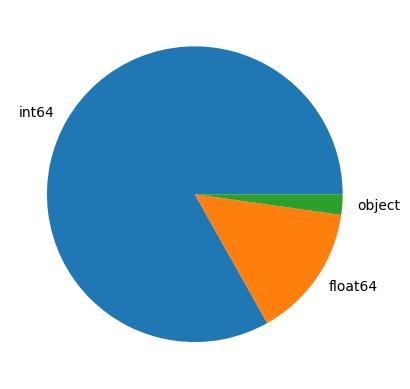

In [12]:
df.dtypes.value_counts().plot.pie()

Detect missing values

<AxesSubplot: >

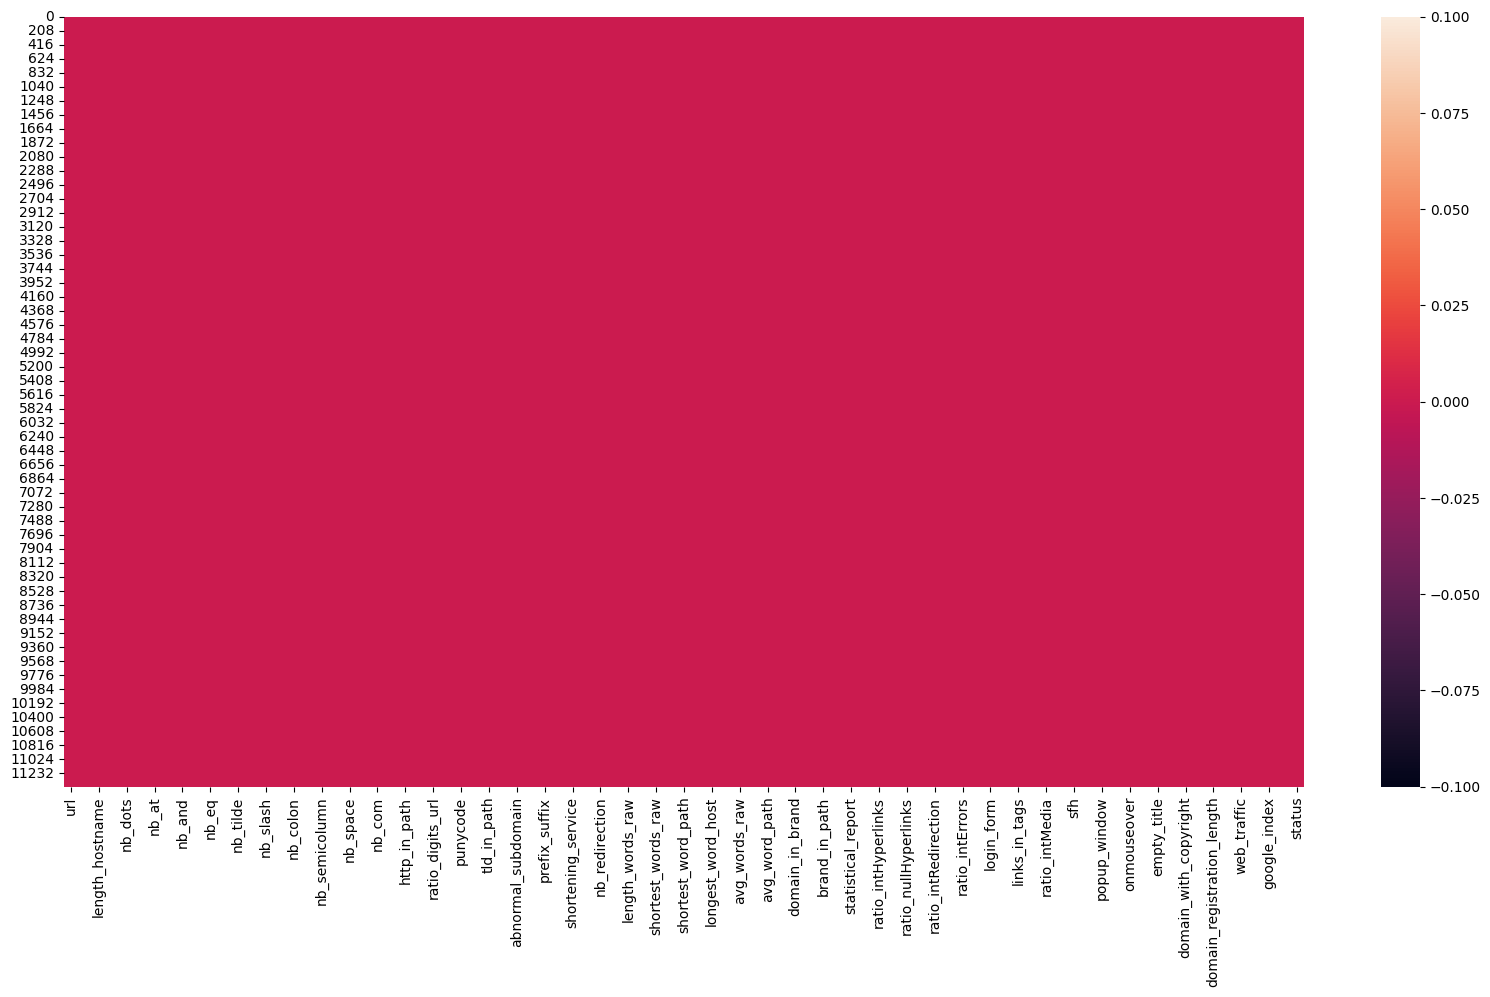

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

Detect numbers missing values forech column

In [14]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

url                     0.0
ratio_extRedirection    0.0
ratio_intRedirection    0.0
nb_extCSS               0.0
ratio_nullHyperlinks    0.0
                       ... 
https_token             0.0
http_in_path            0.0
nb_dslash               0.0
shortest_word_host      0.0
status                  0.0
Length: 89, dtype: float64

bottom analysis
  1-initial visualization :elimination of unnecessary columns


In [15]:
#df=df[df.columns[df.isin().sam()/df.shape[0]<2]]

drop column id url because it is useless

In [16]:
#df.drop("idUrl",axis=1)

target column review

In [17]:
df["status"].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64


histograms of continuous variables

C:\Users\rrbou\AppData\Local\Temp\ipykernel_17128\2636989859.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,10))


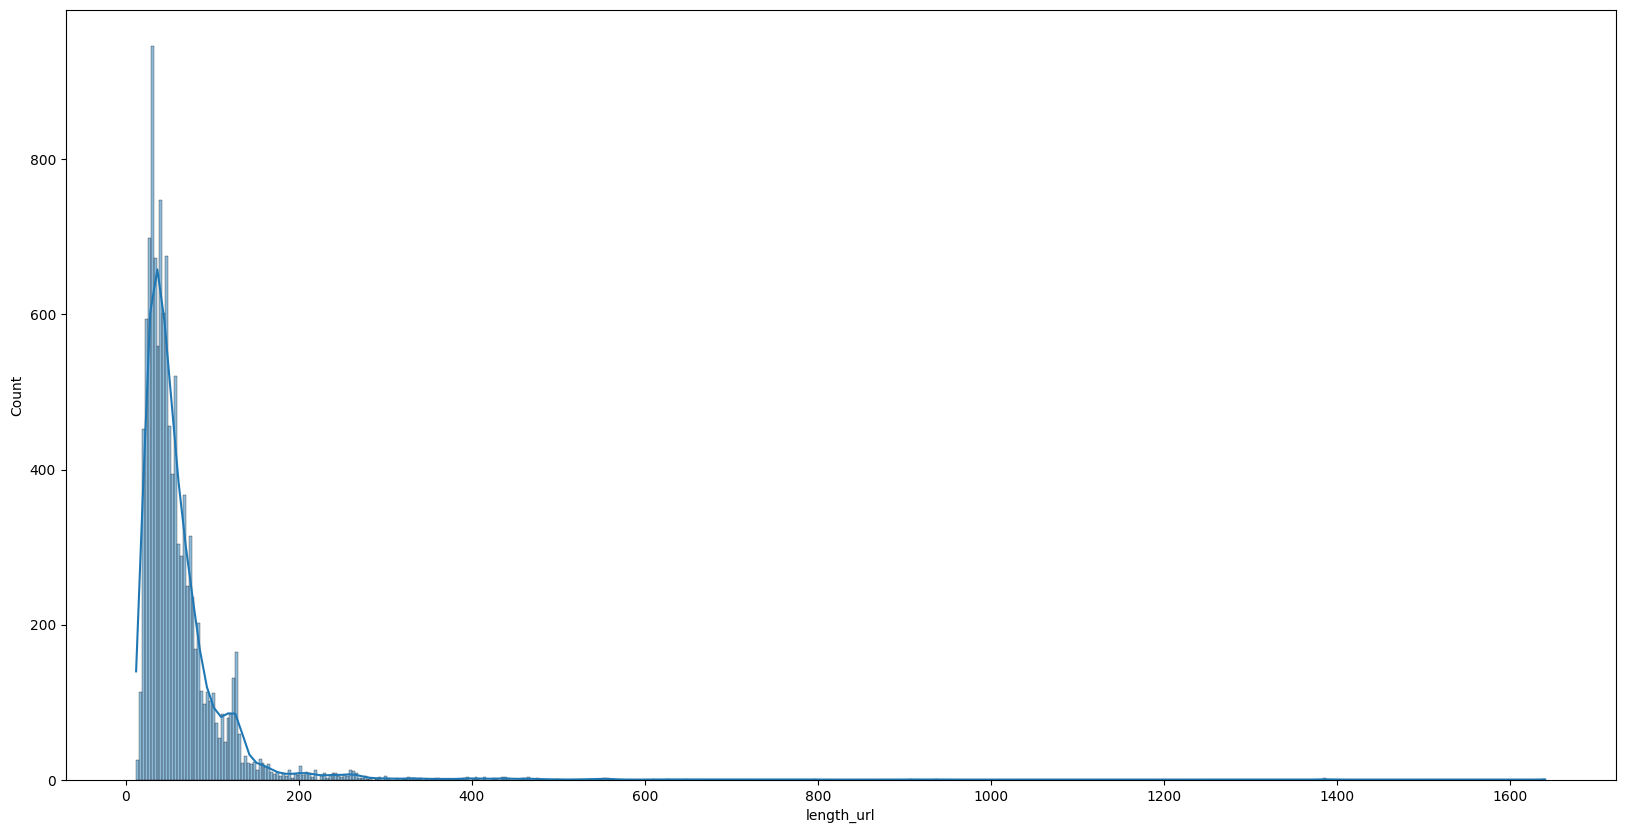

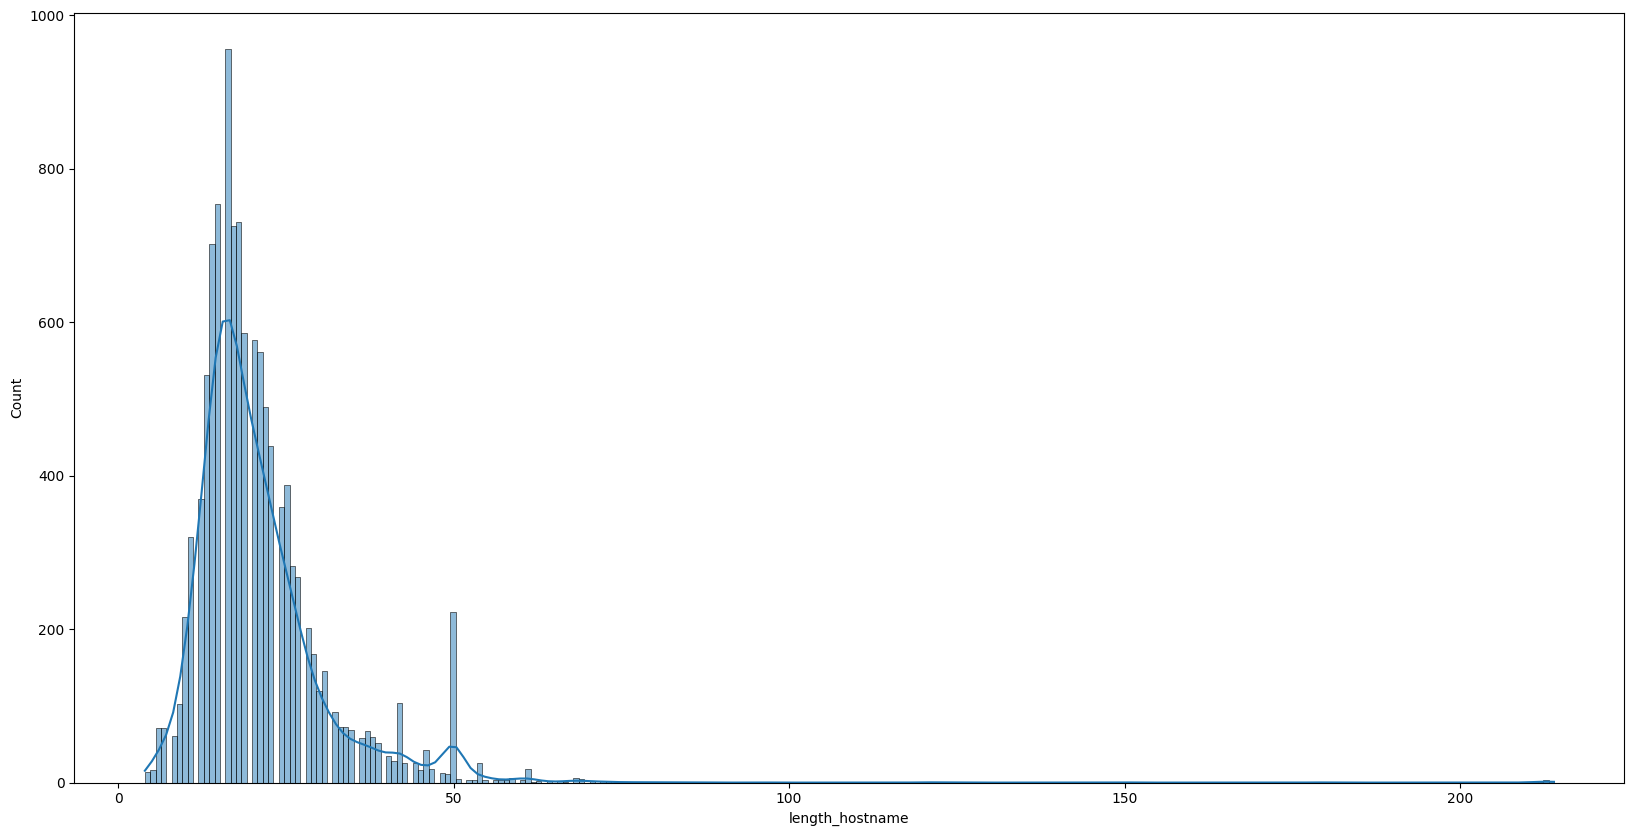

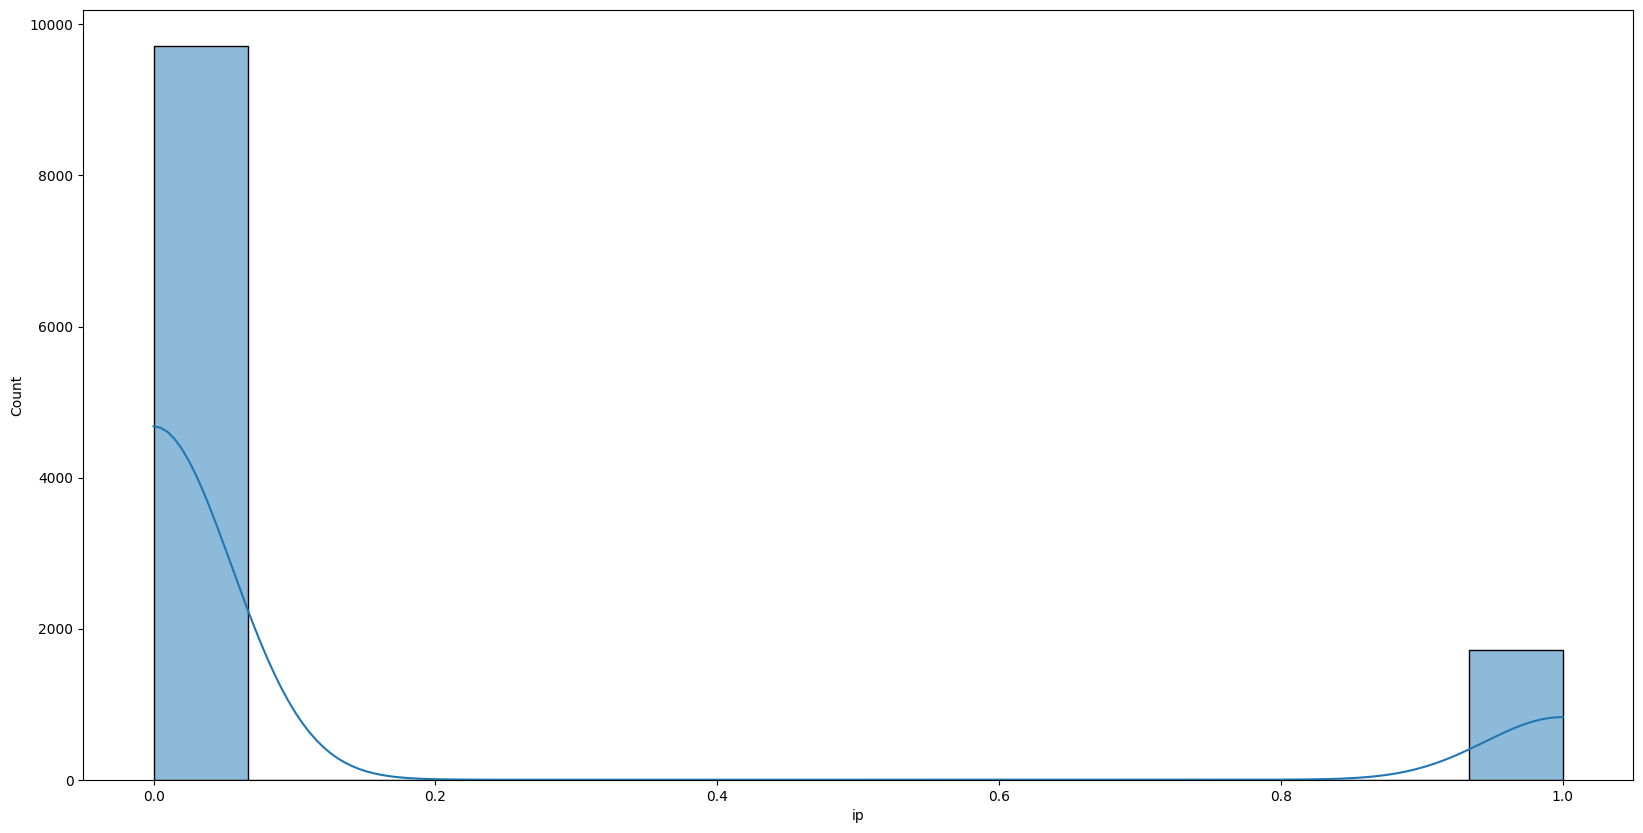

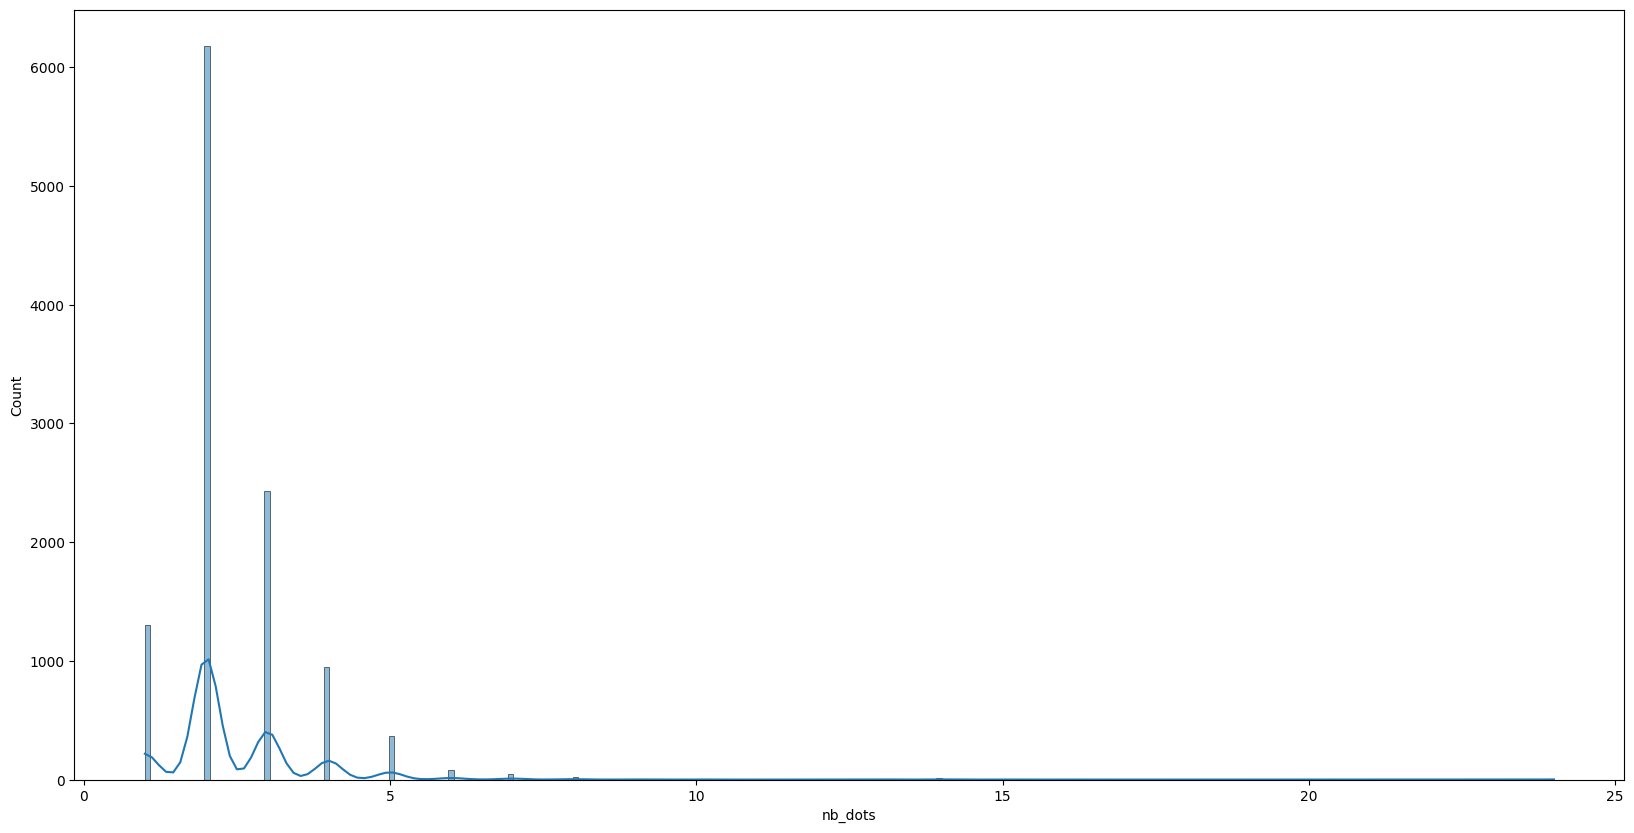

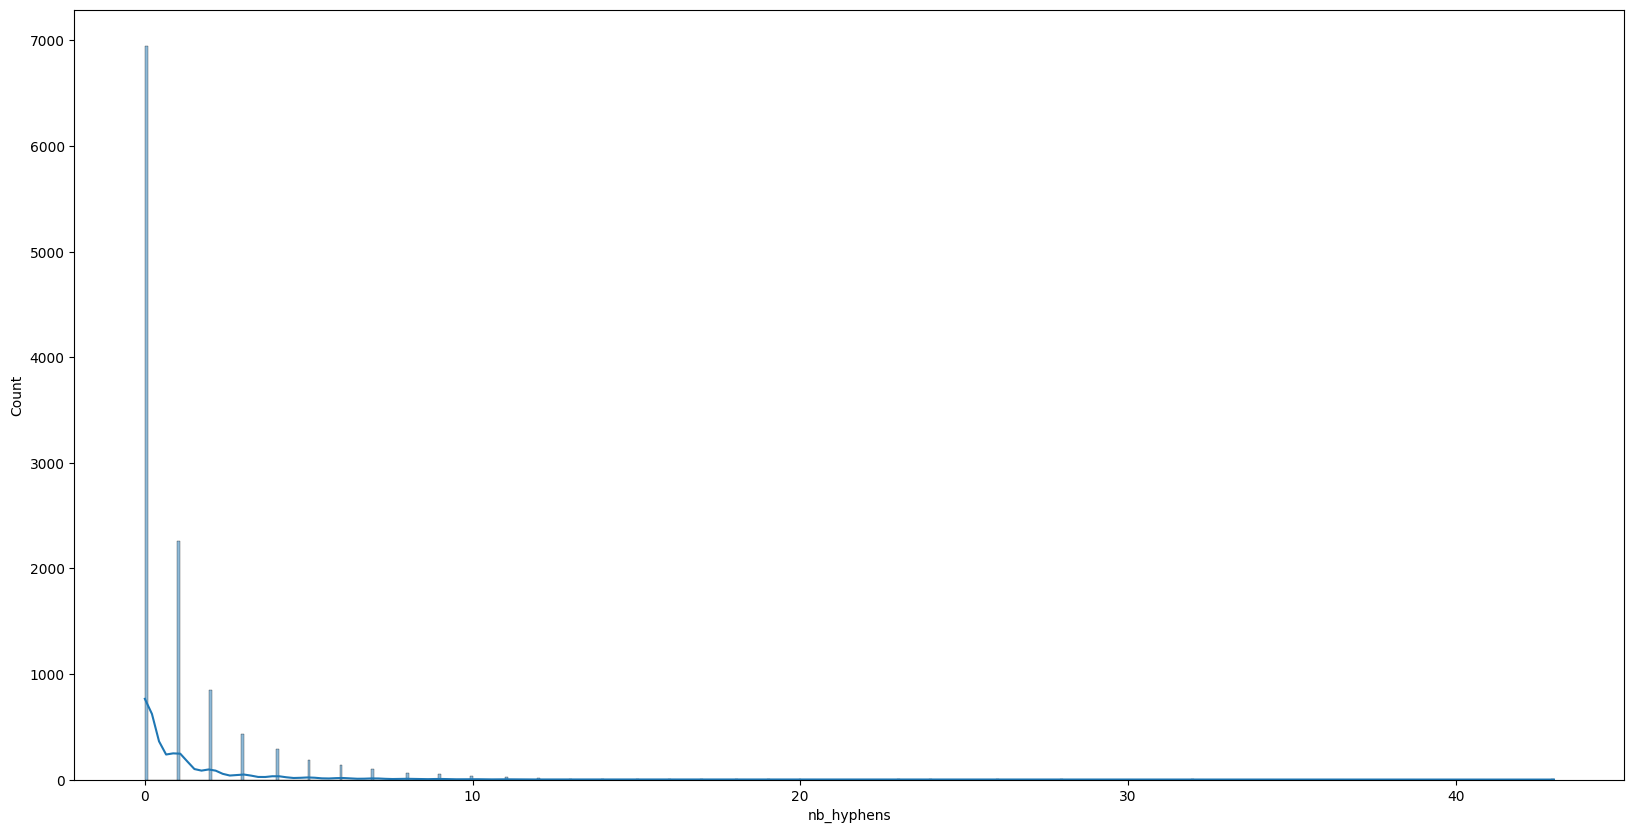

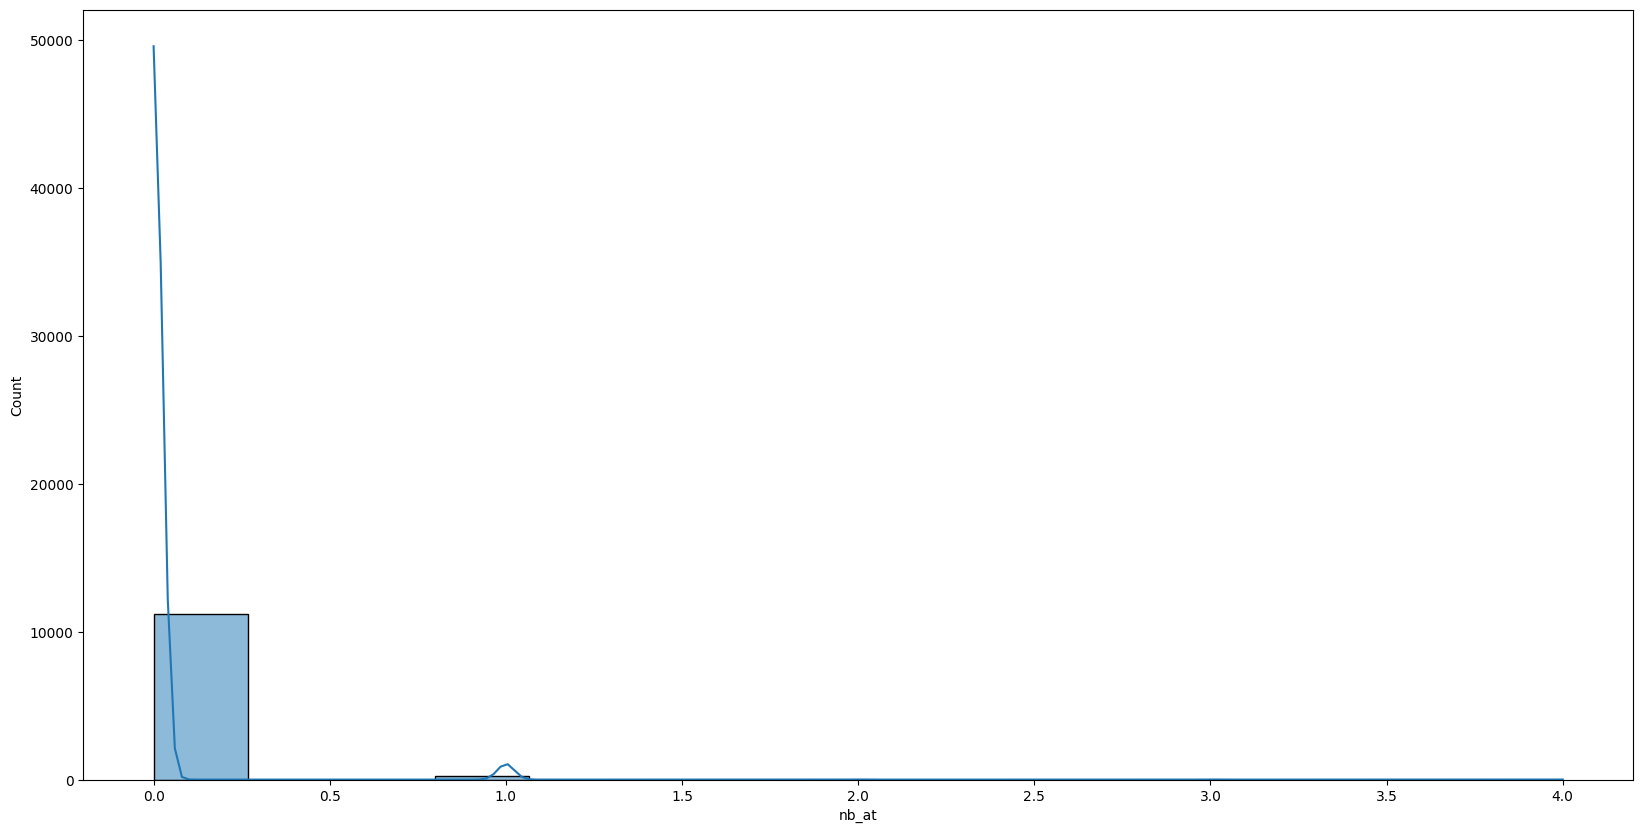

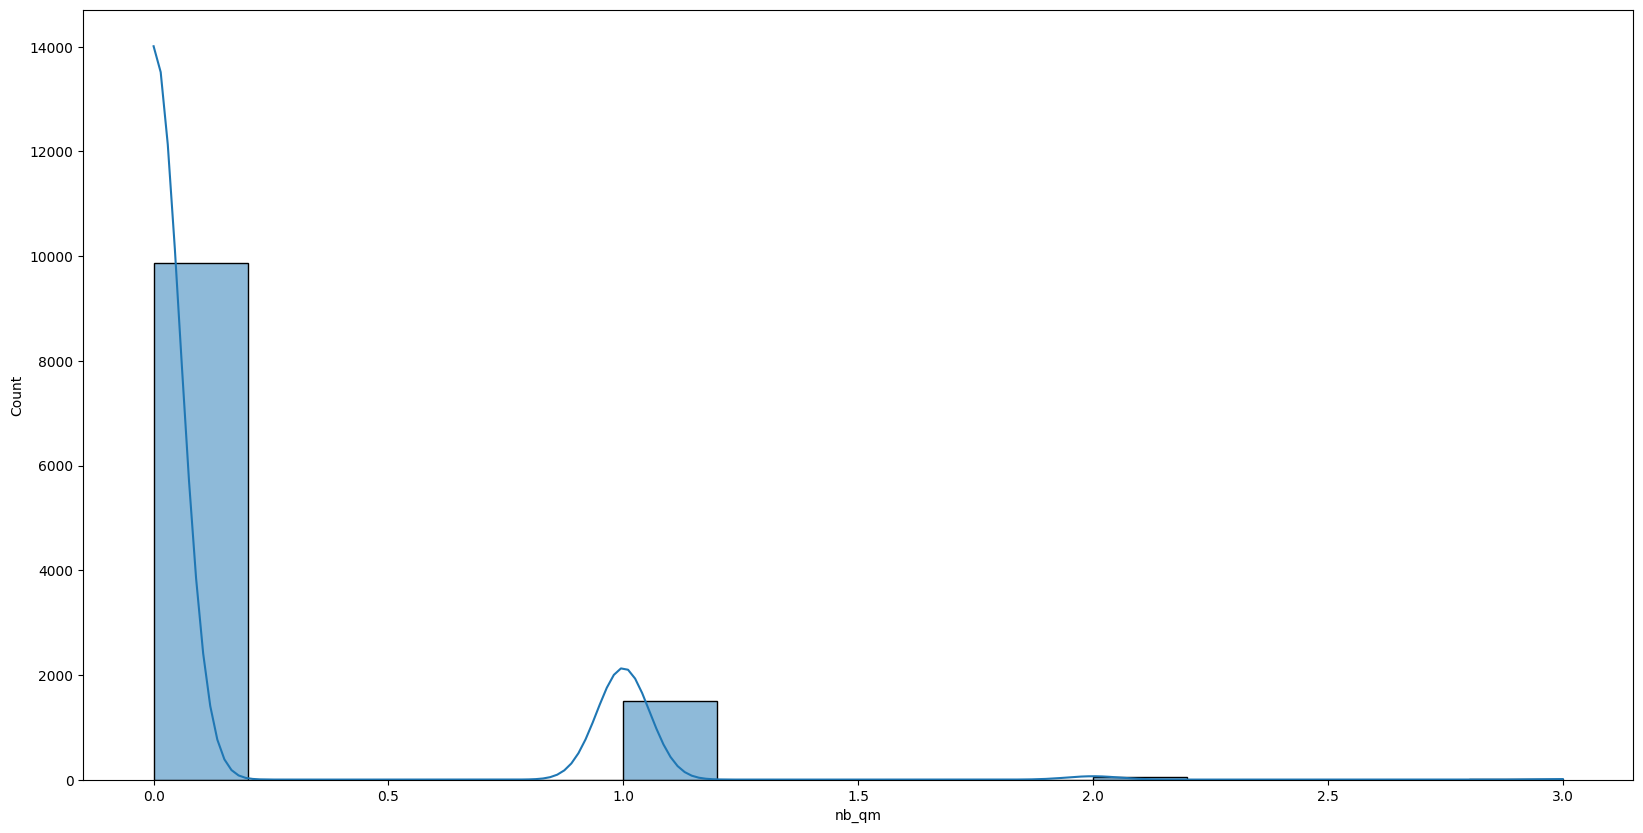

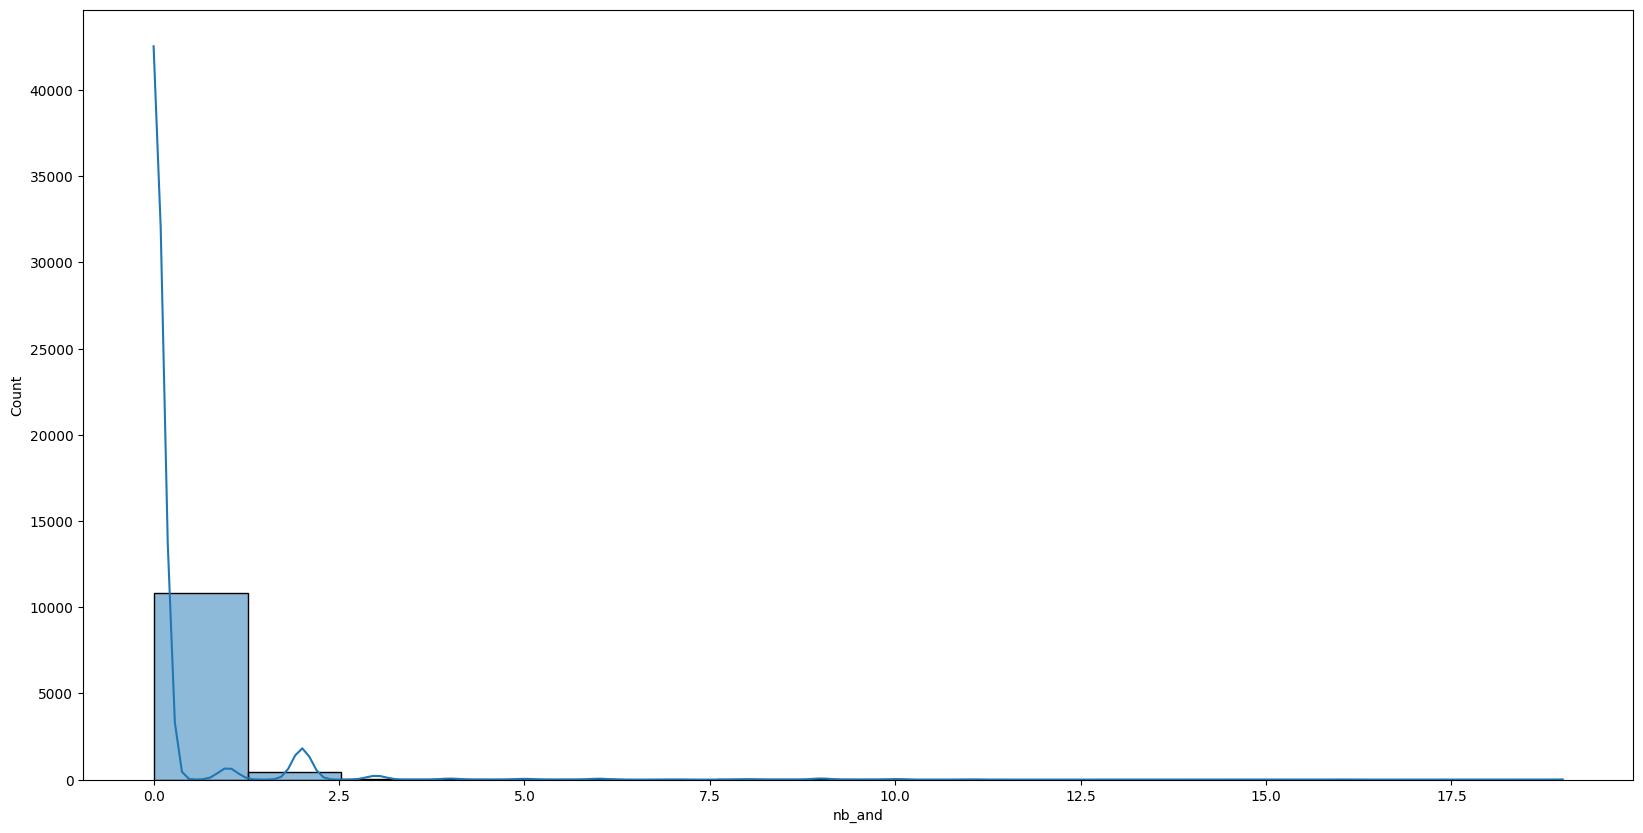

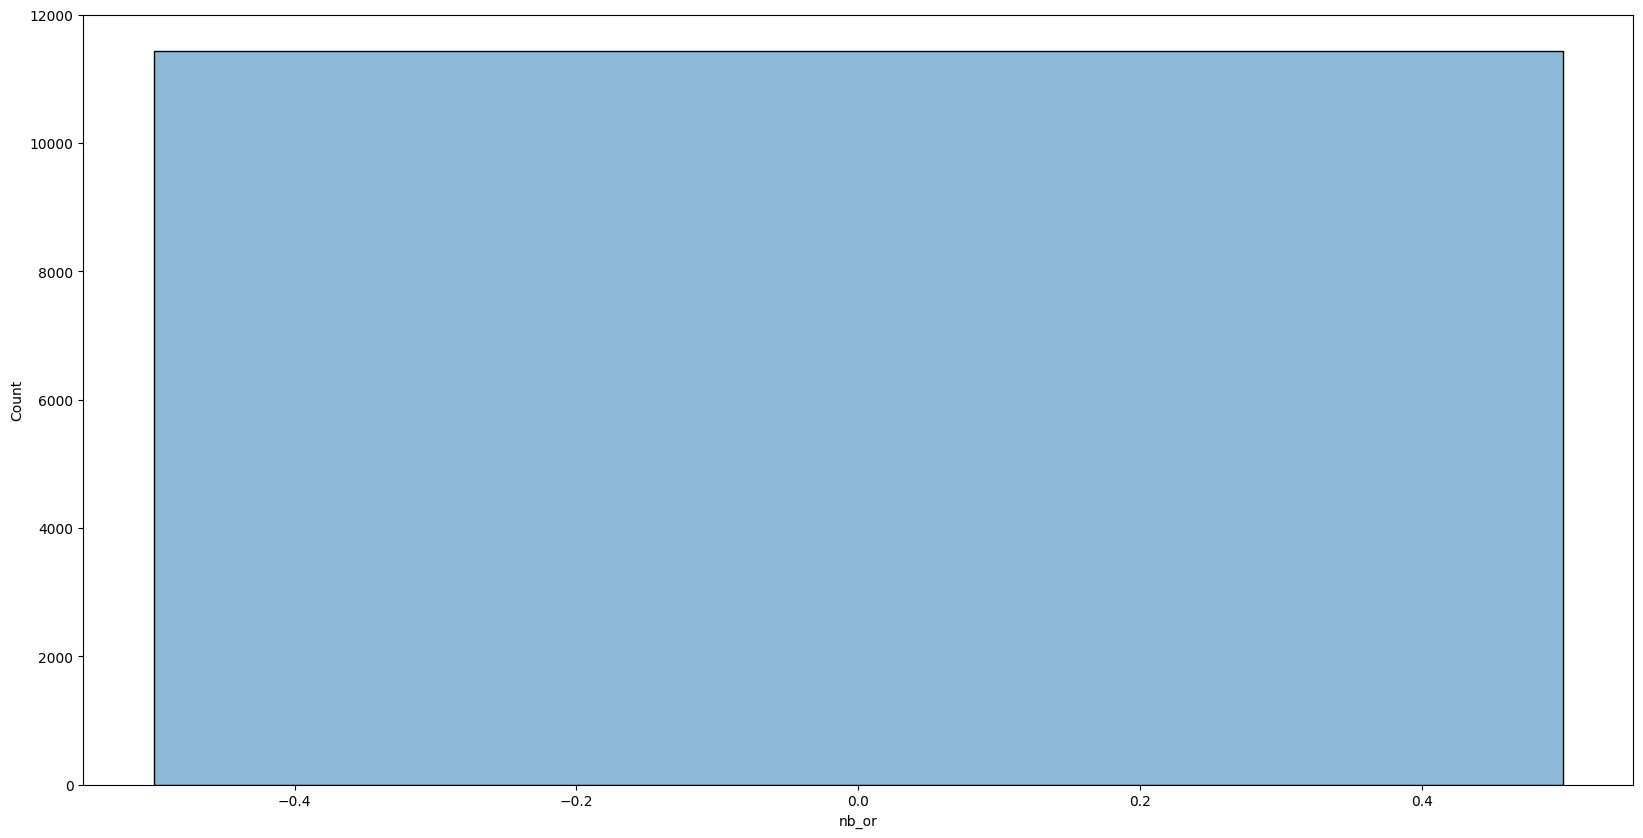

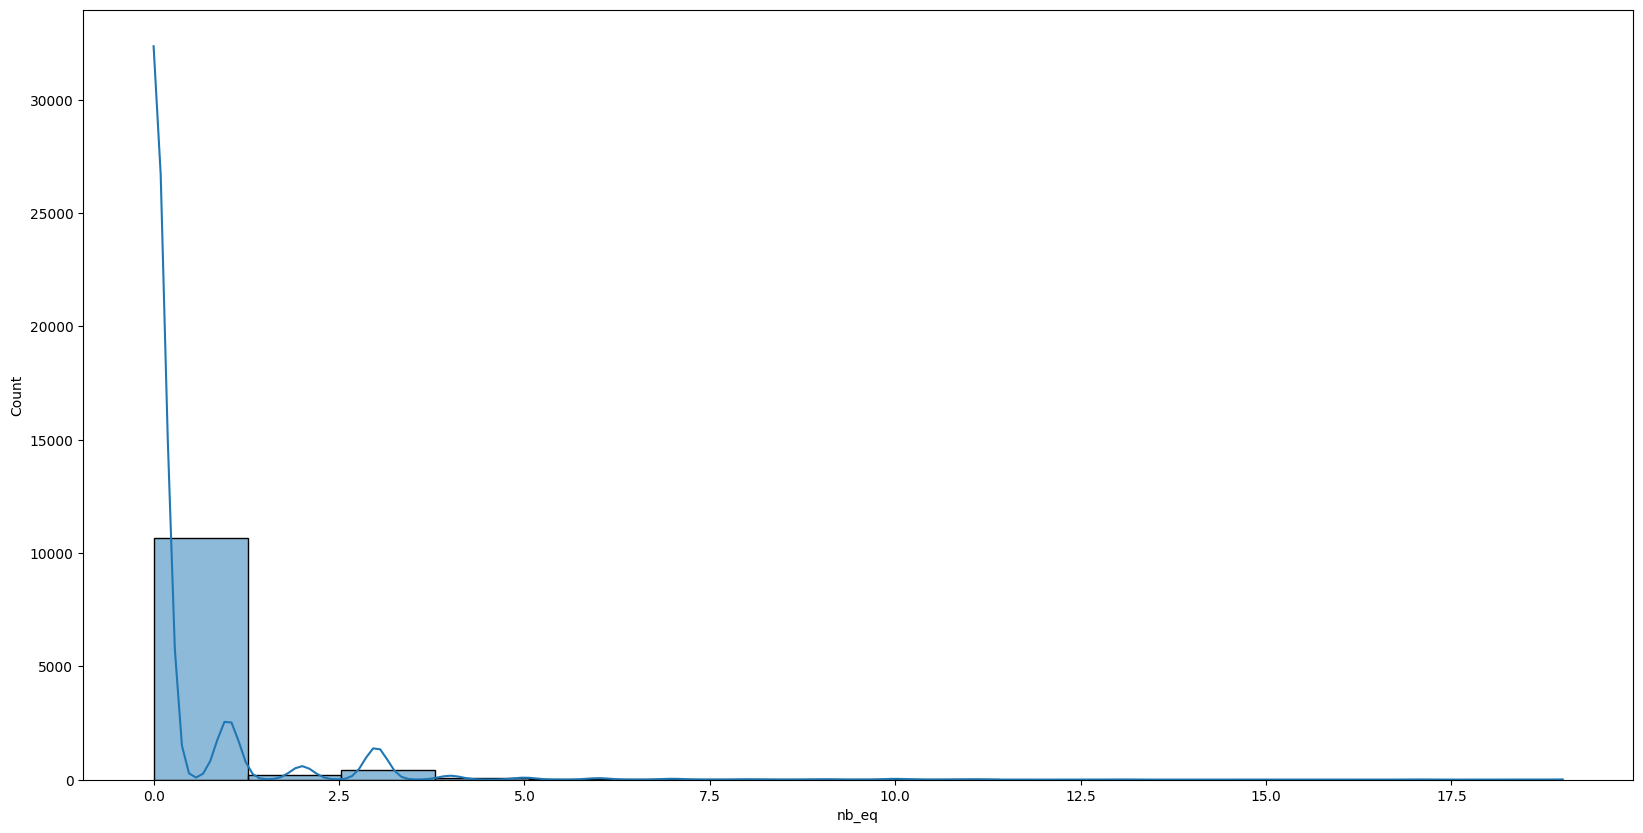

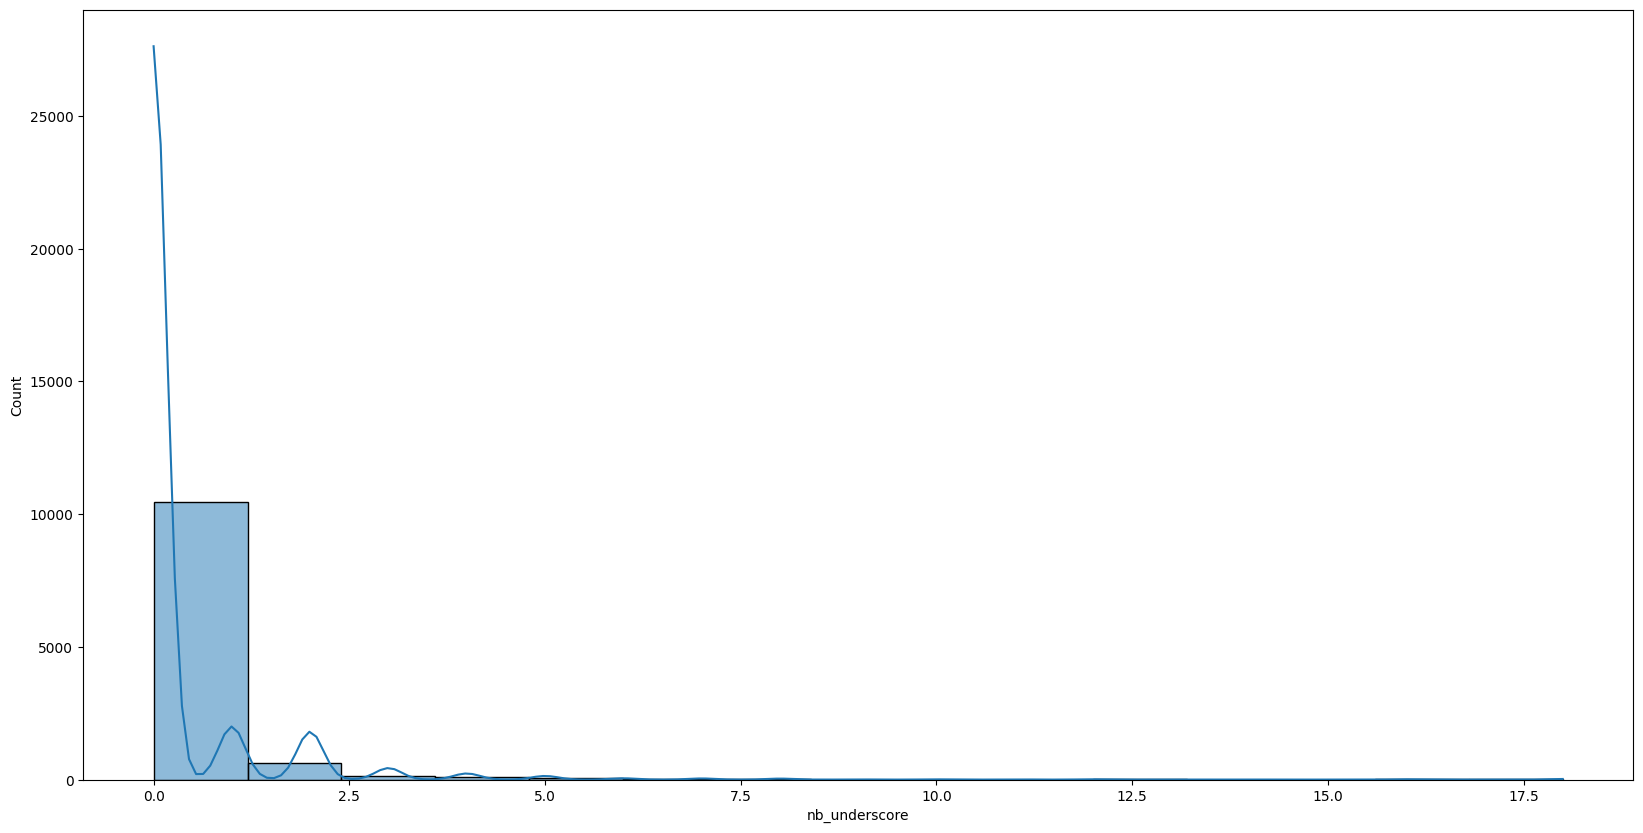

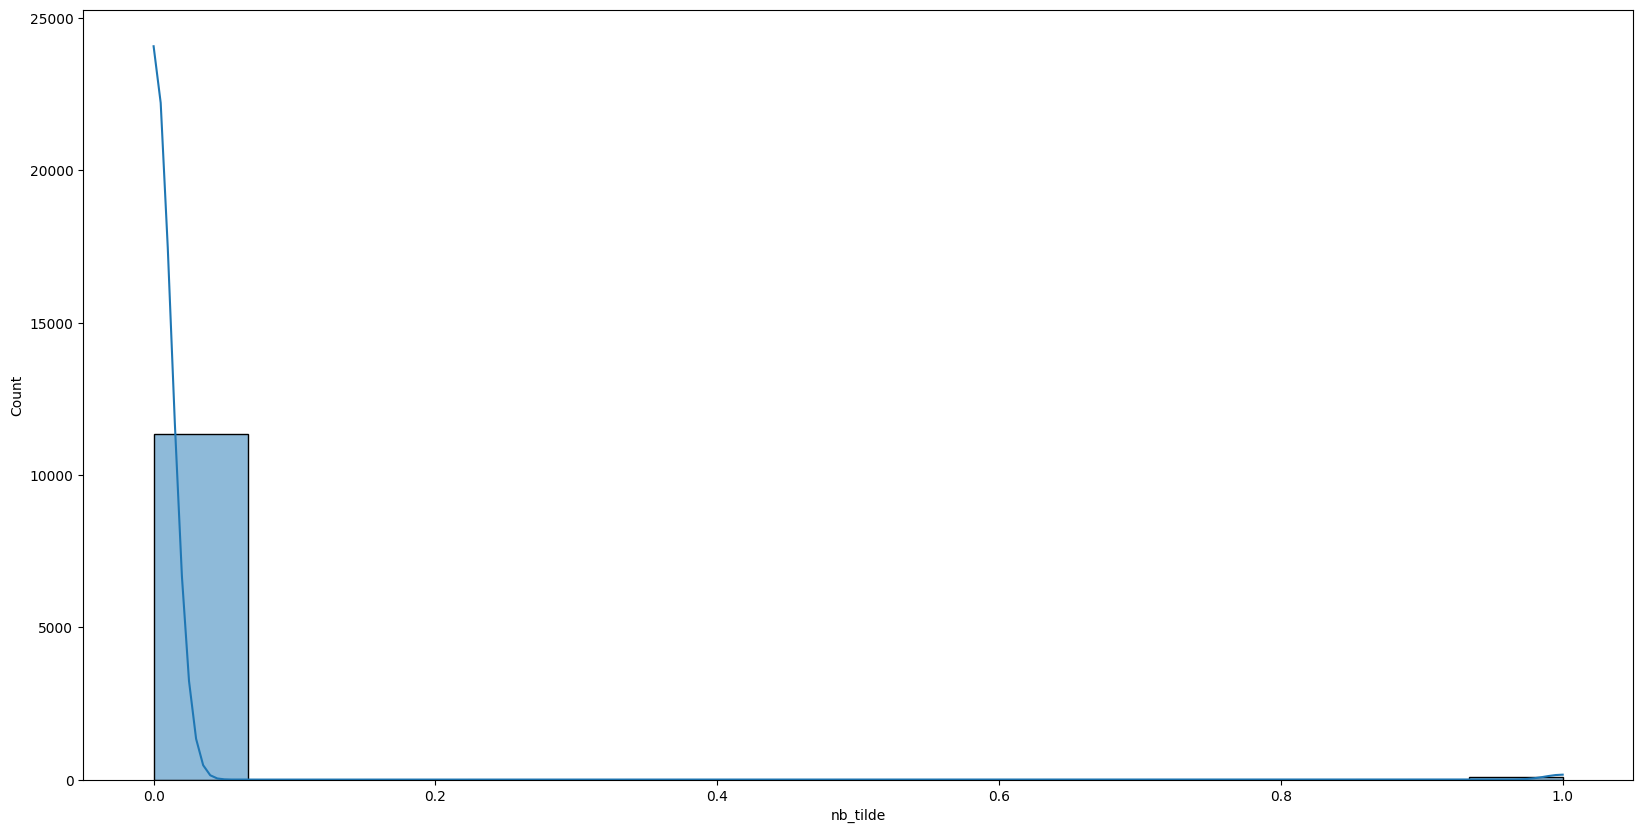

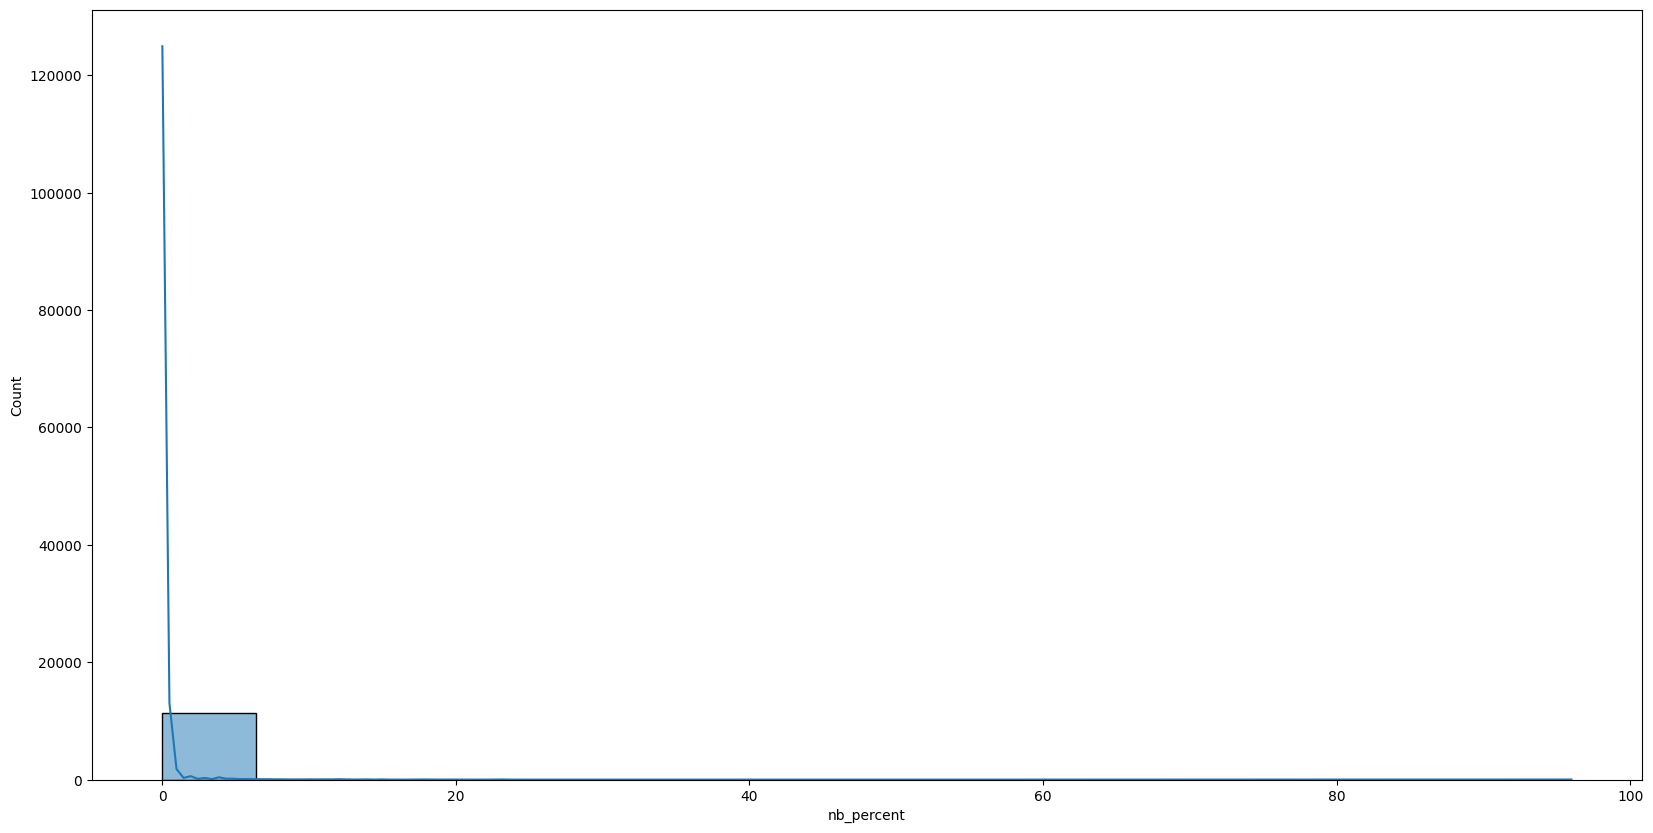

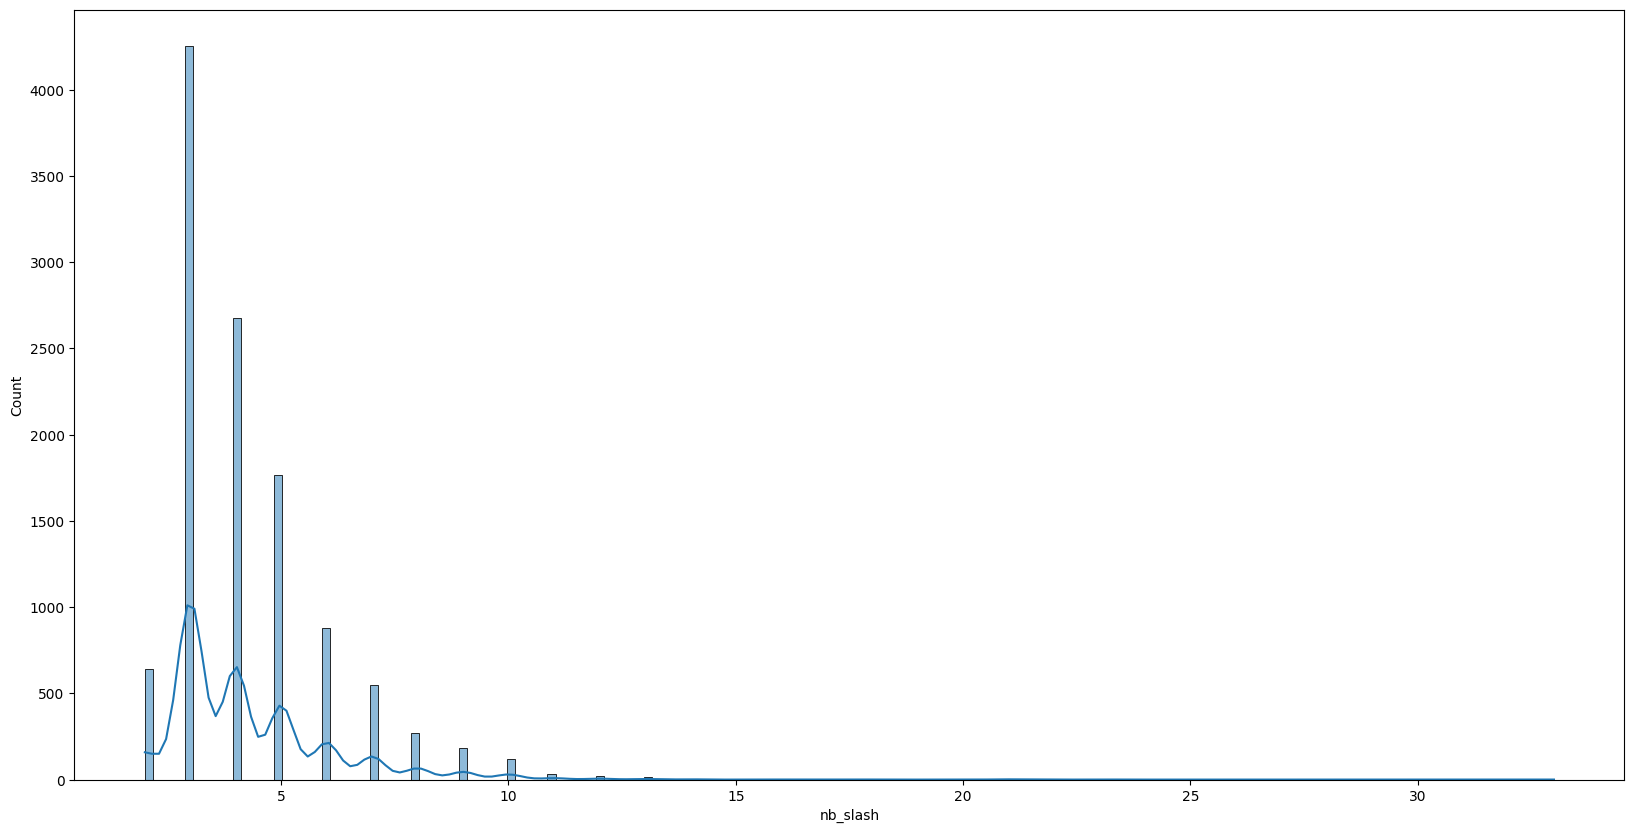

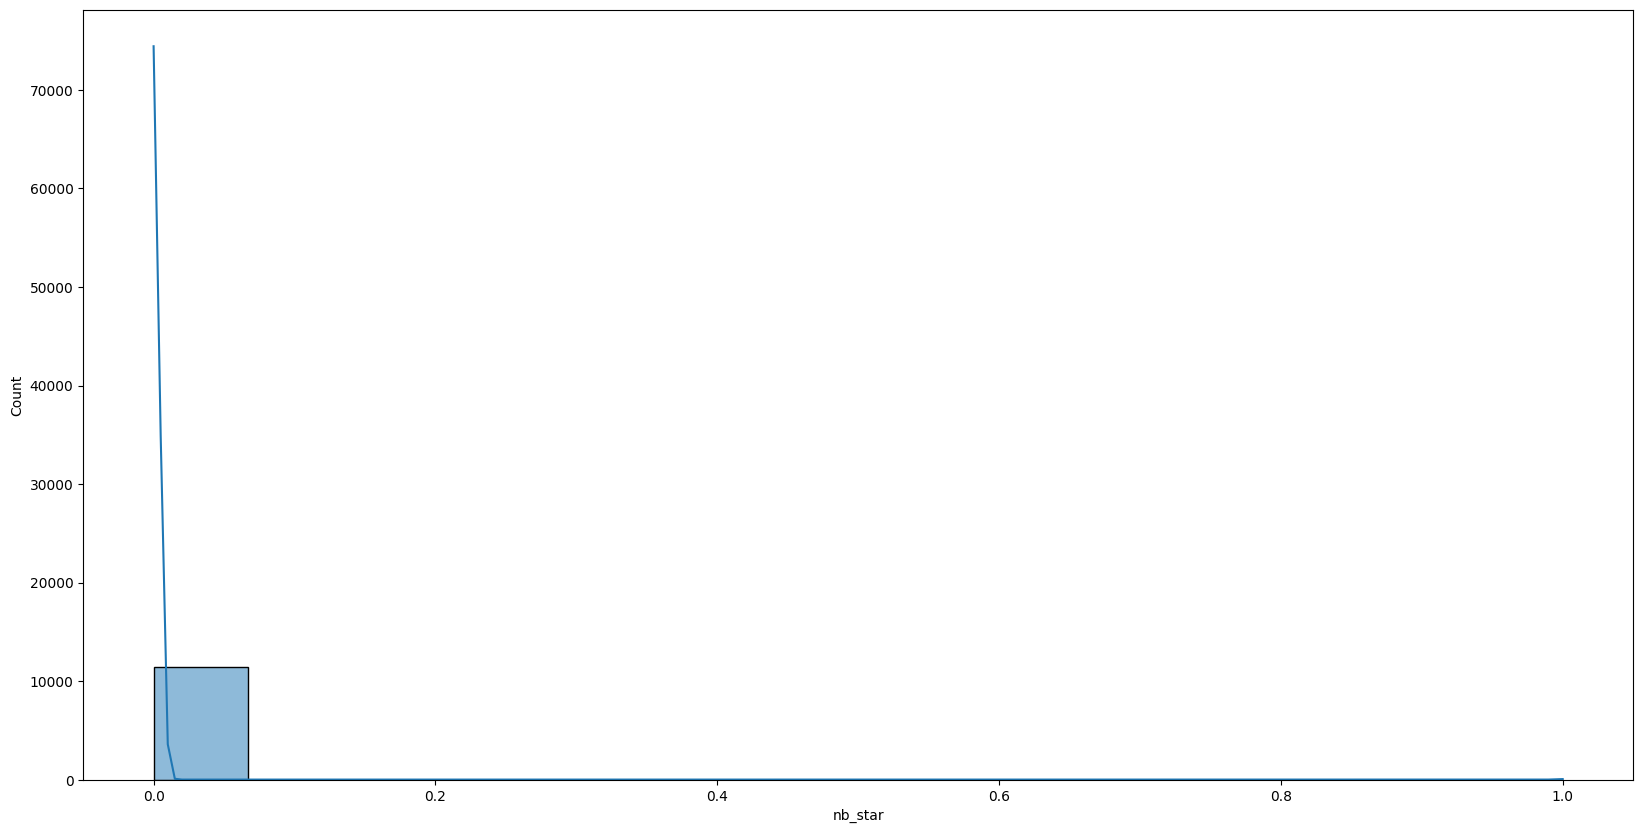

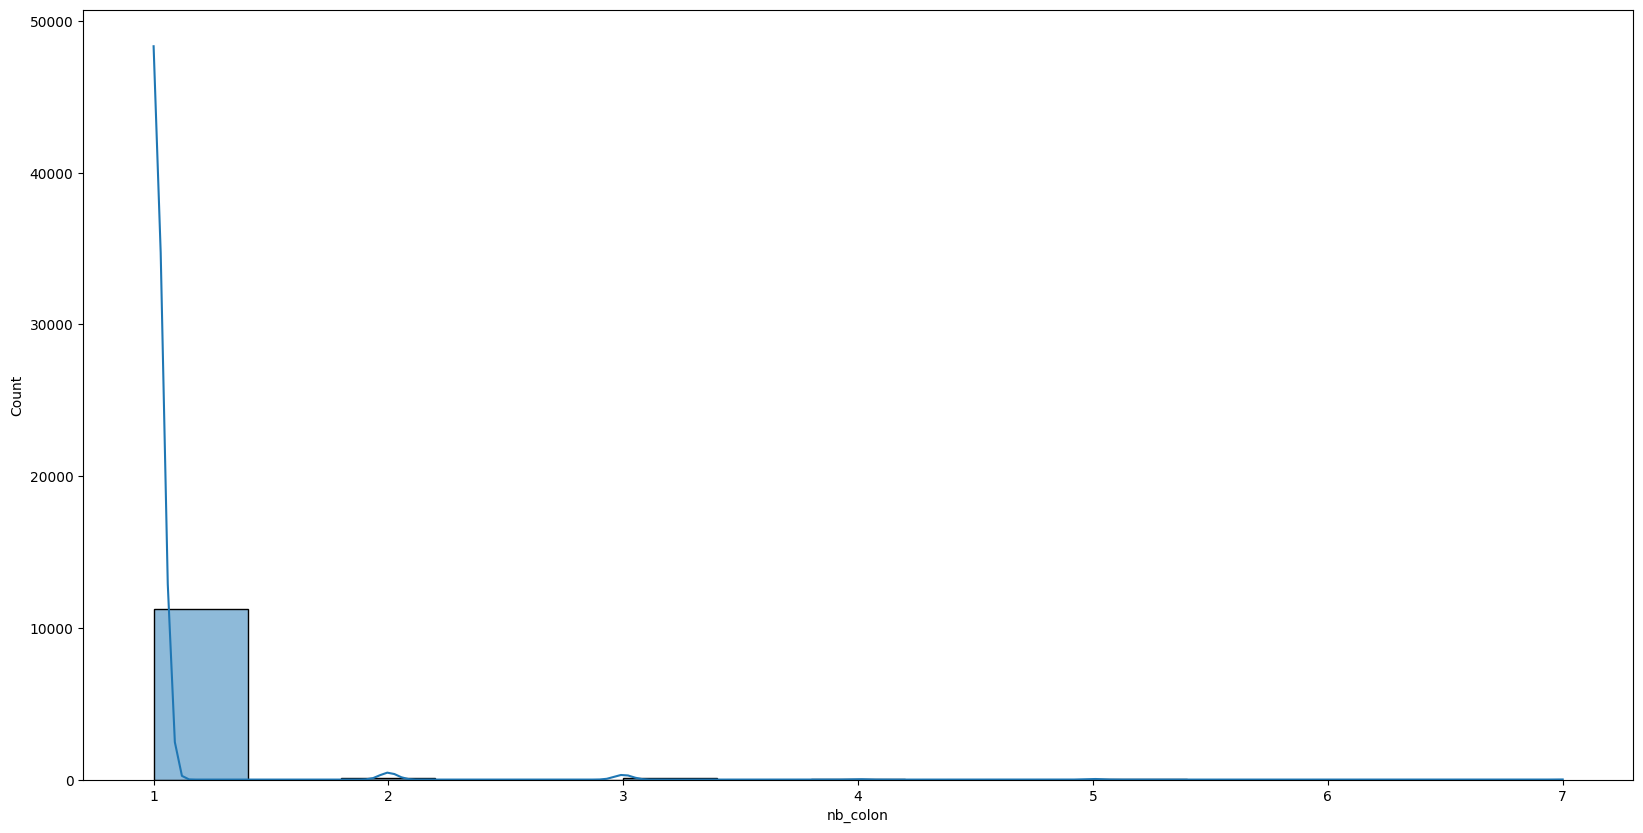

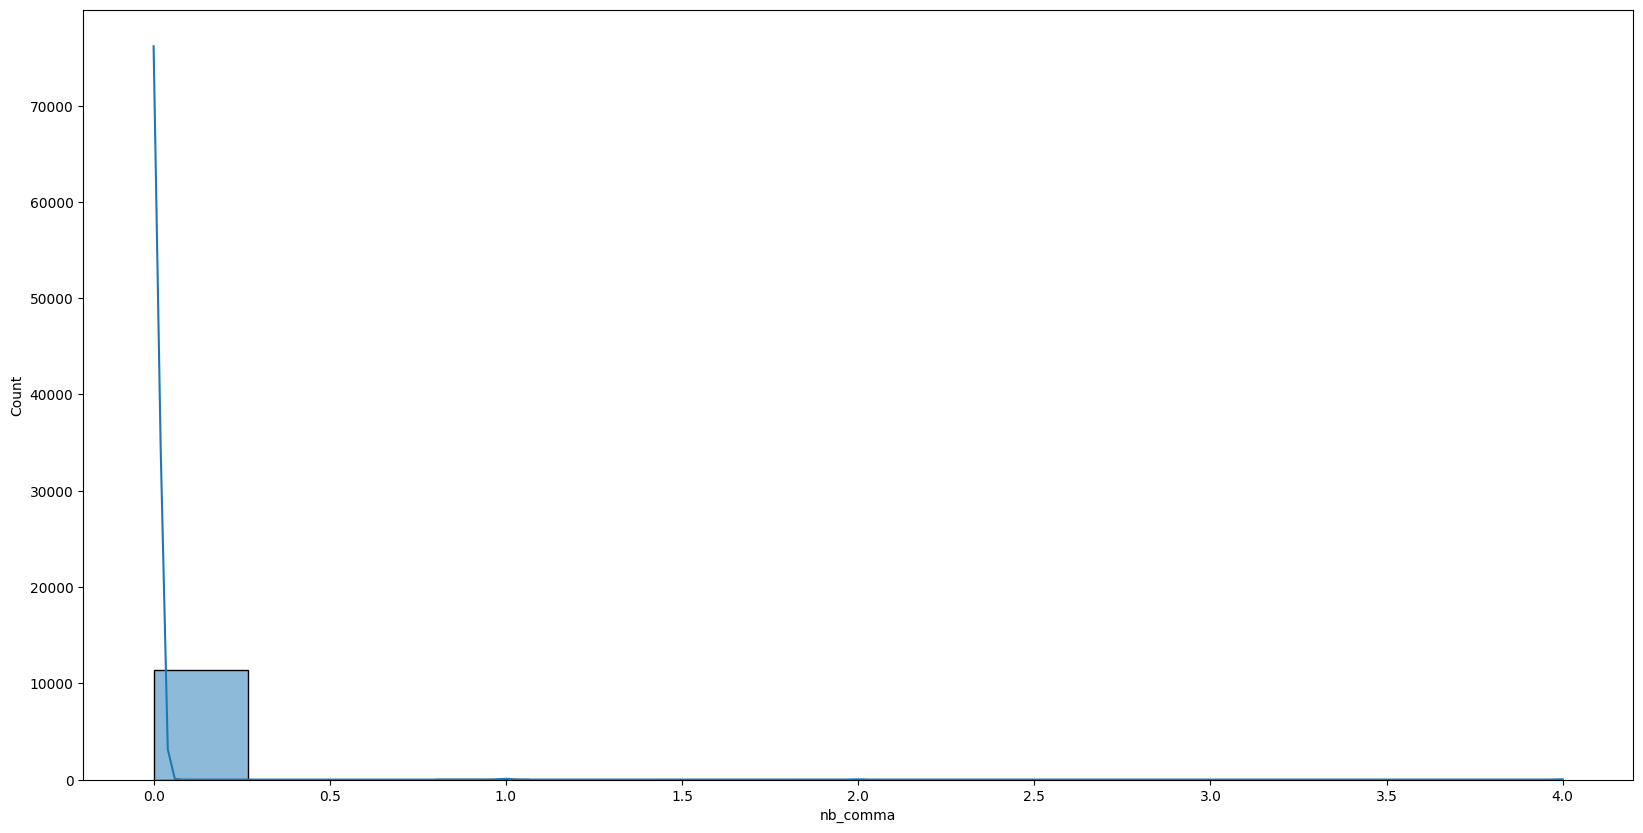

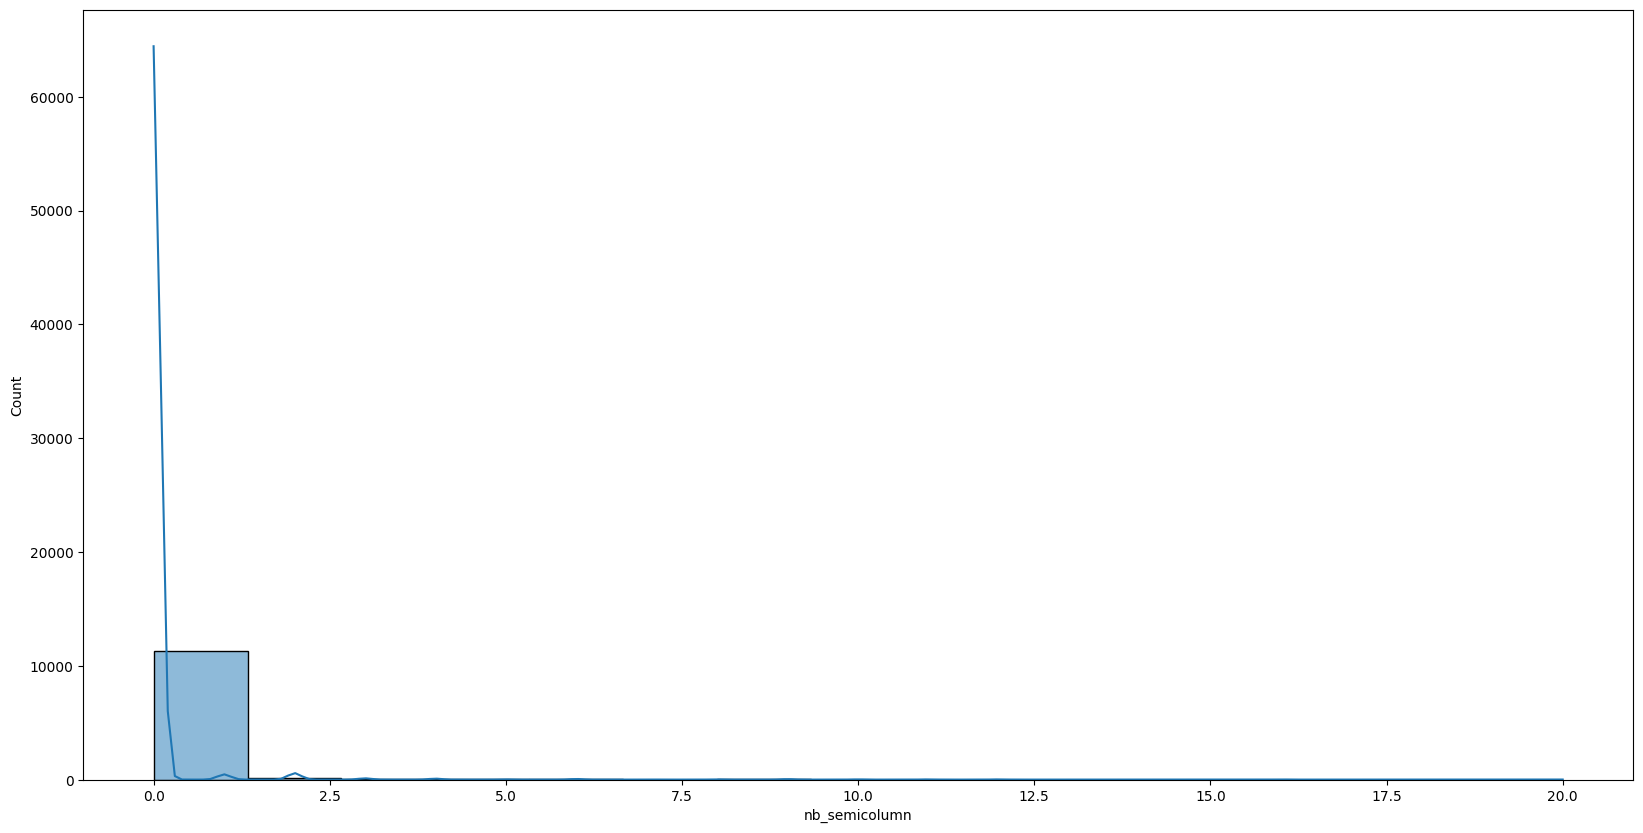

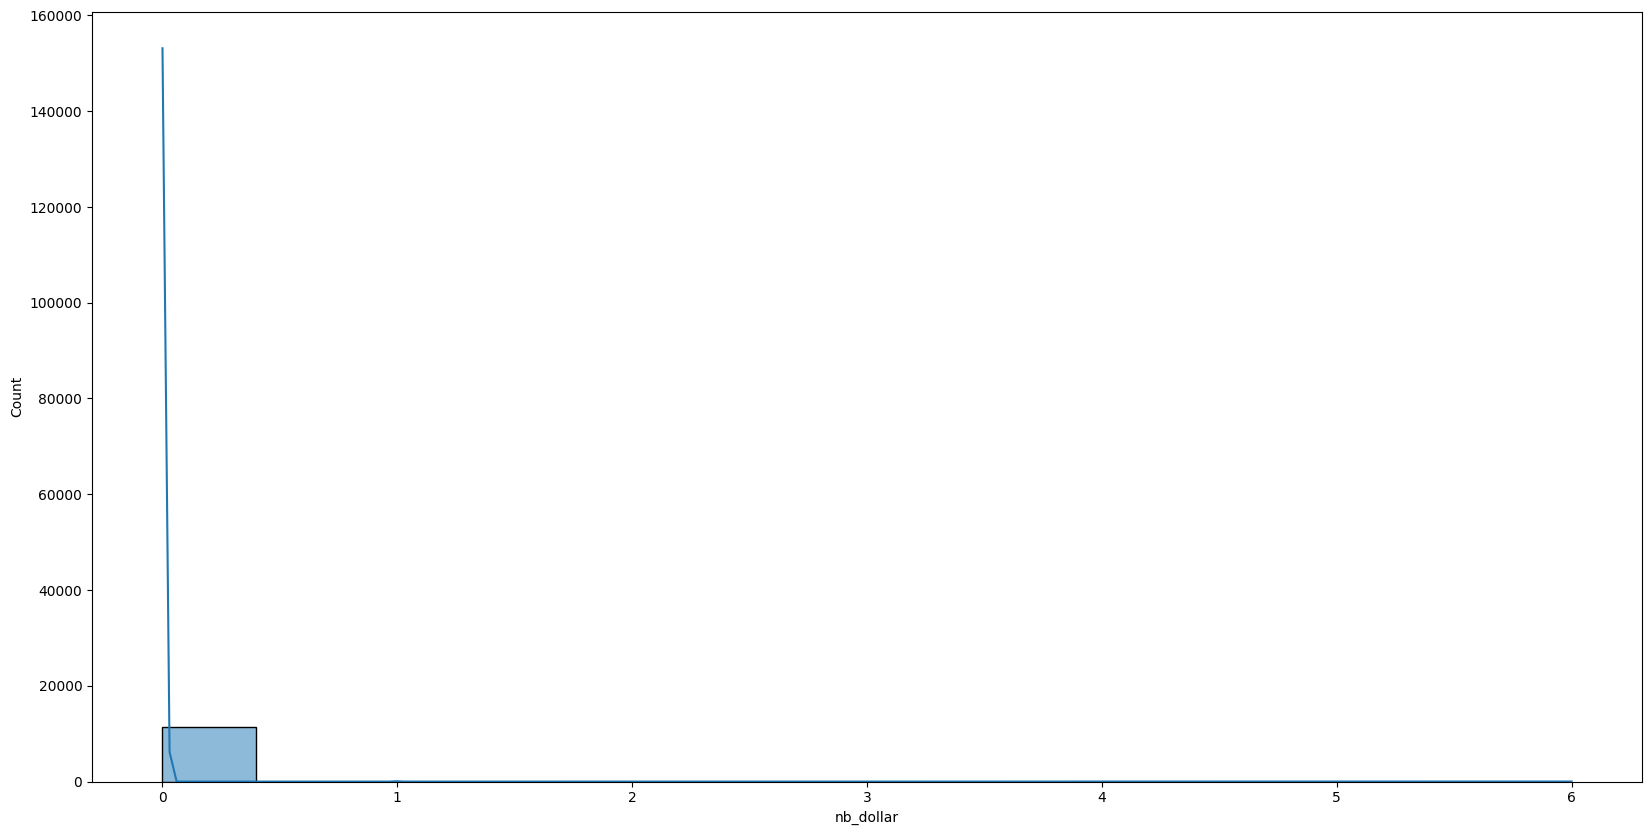

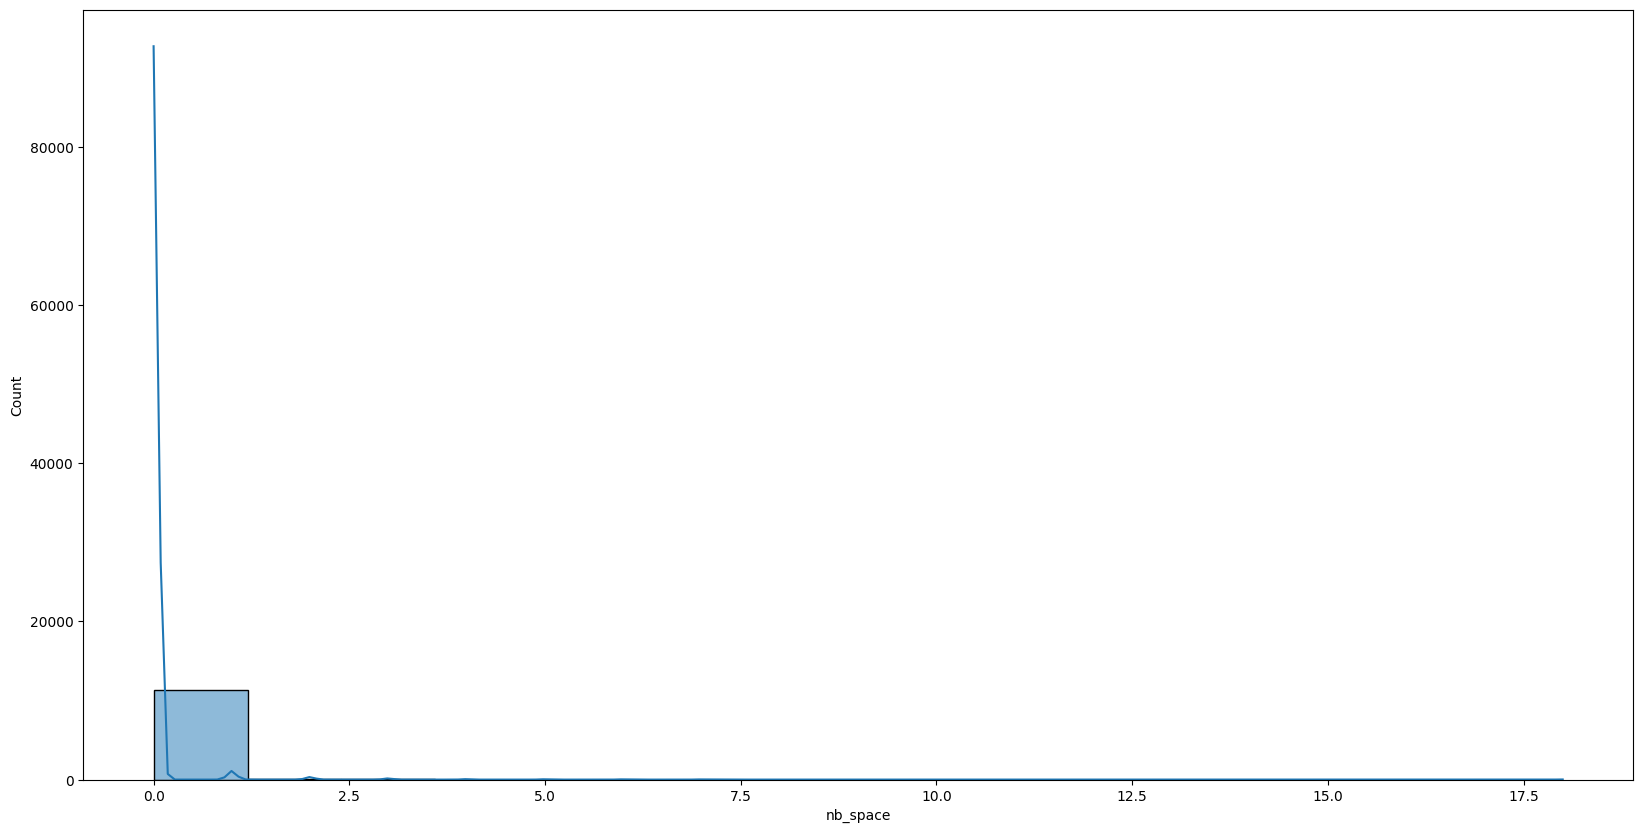

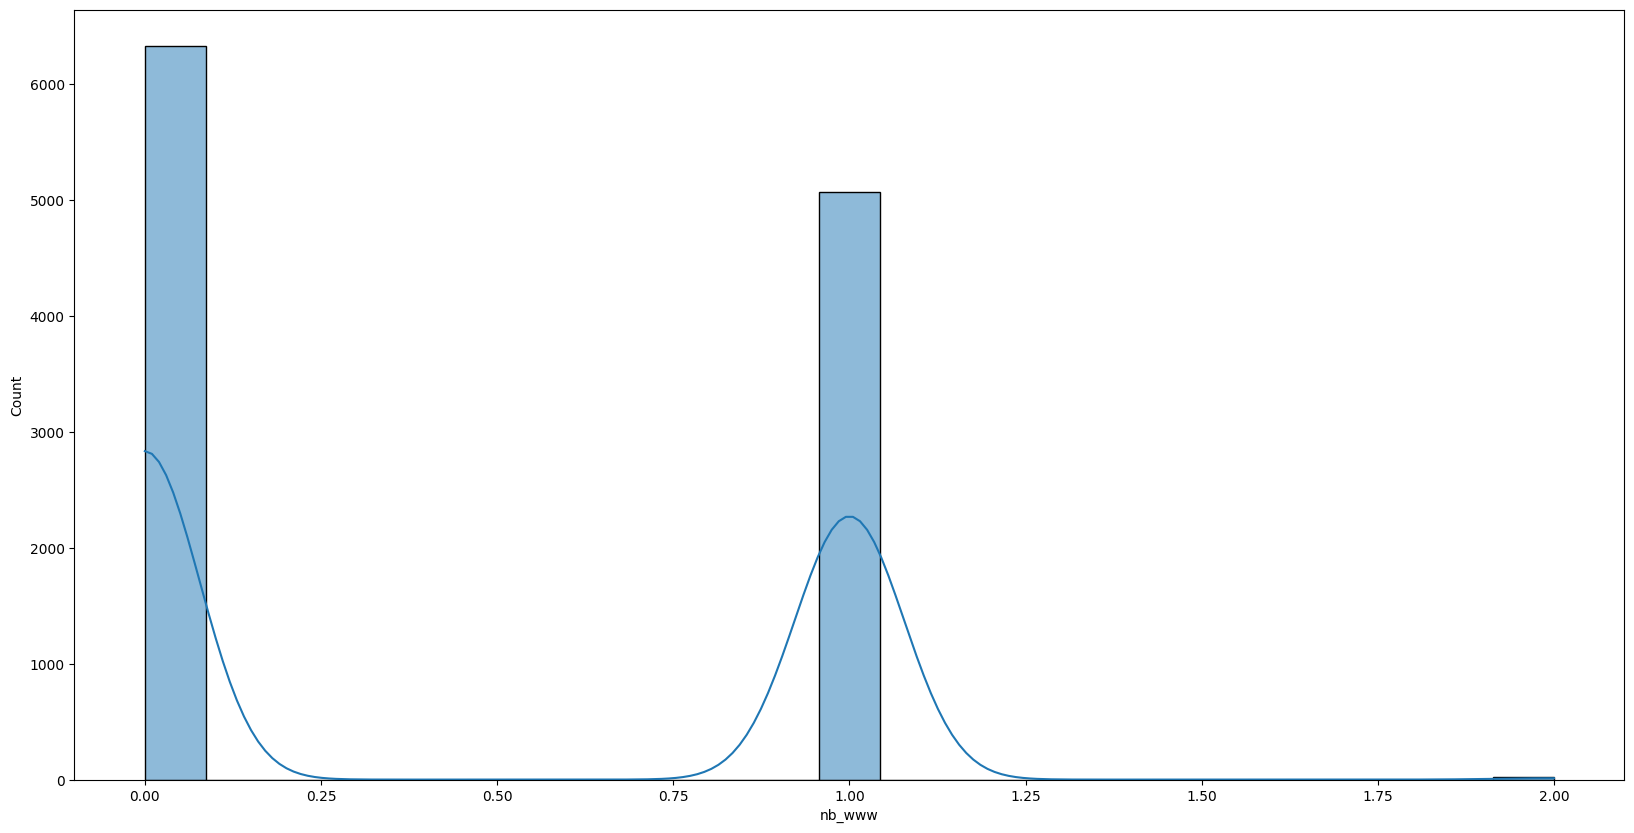

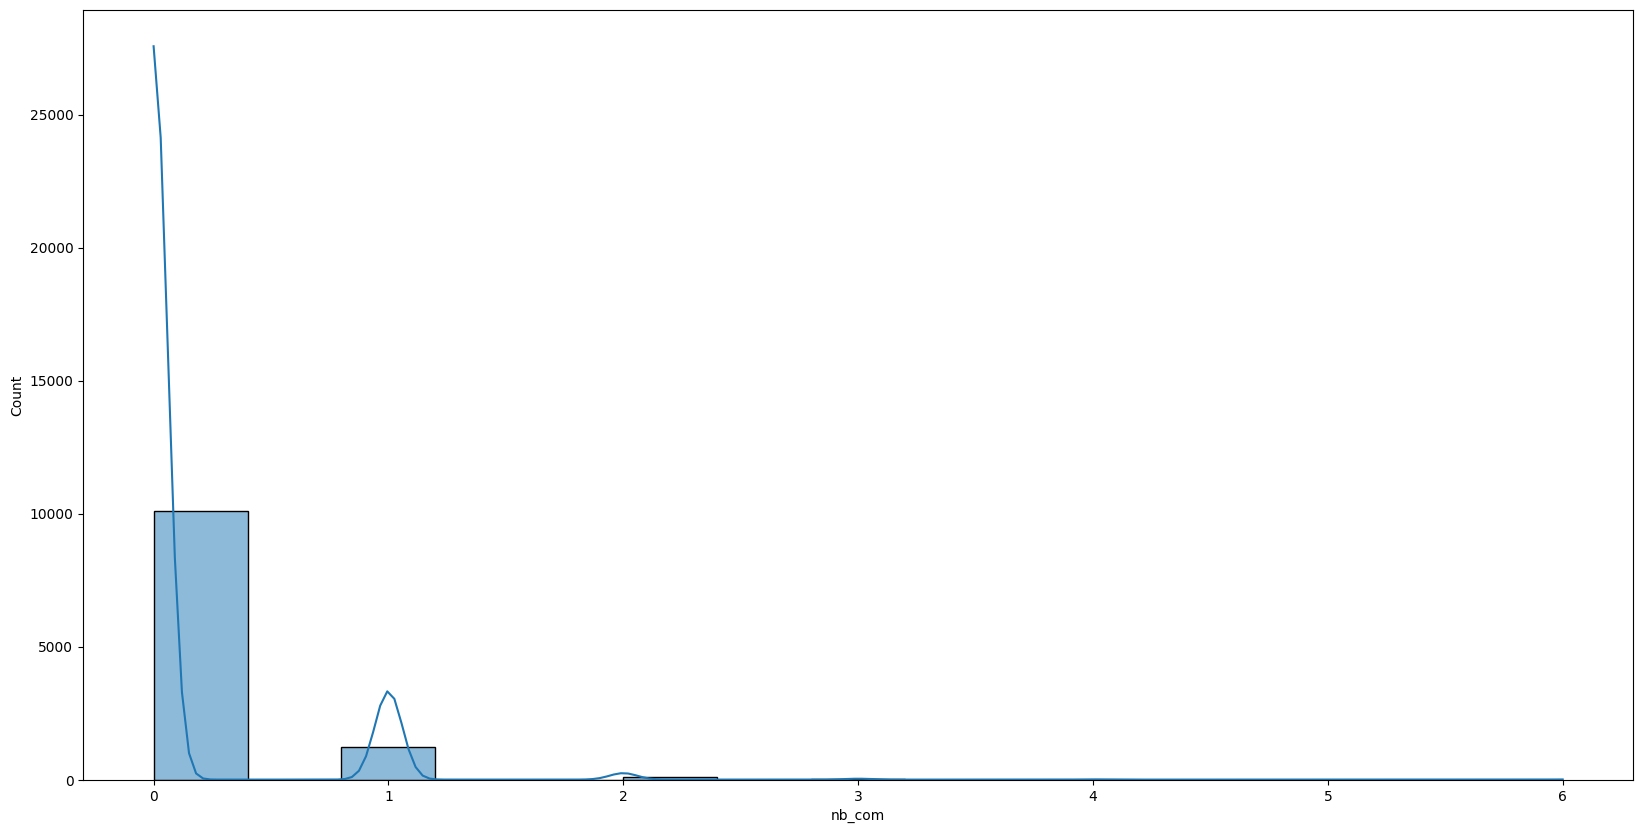

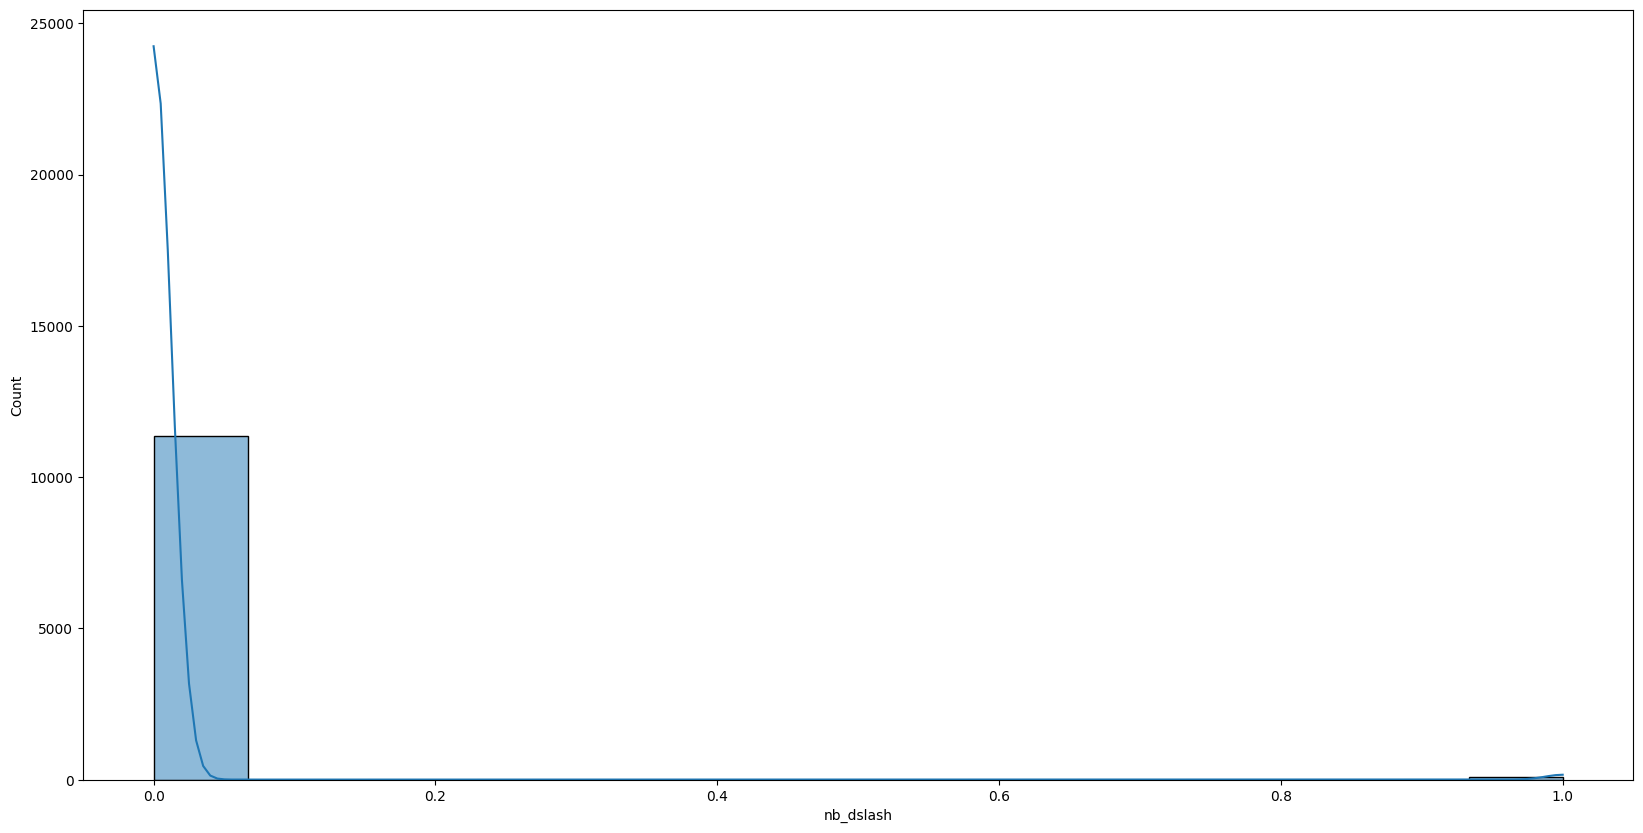

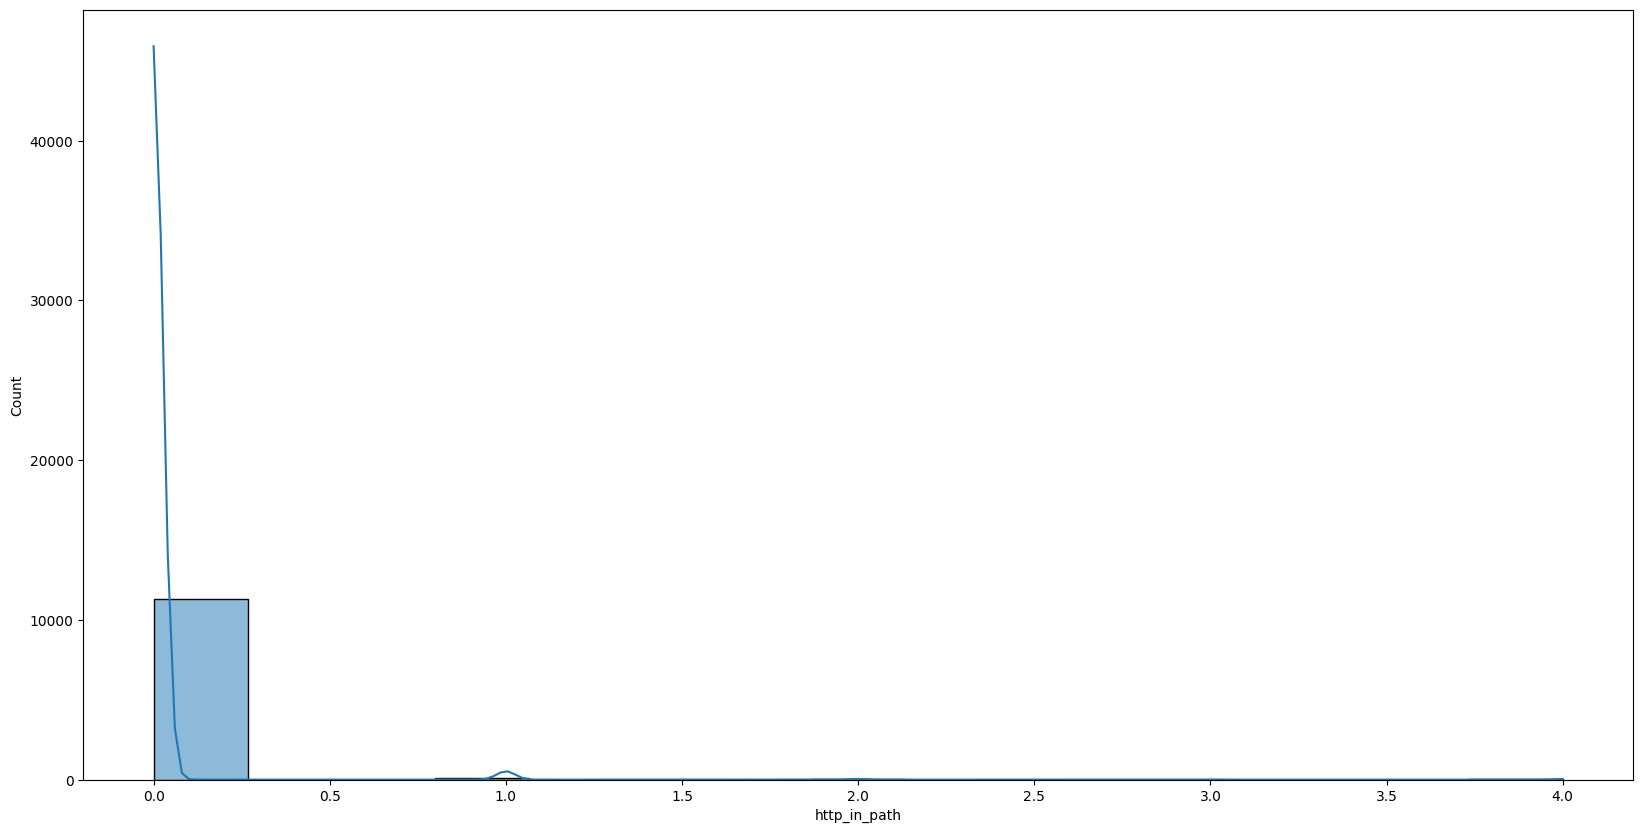

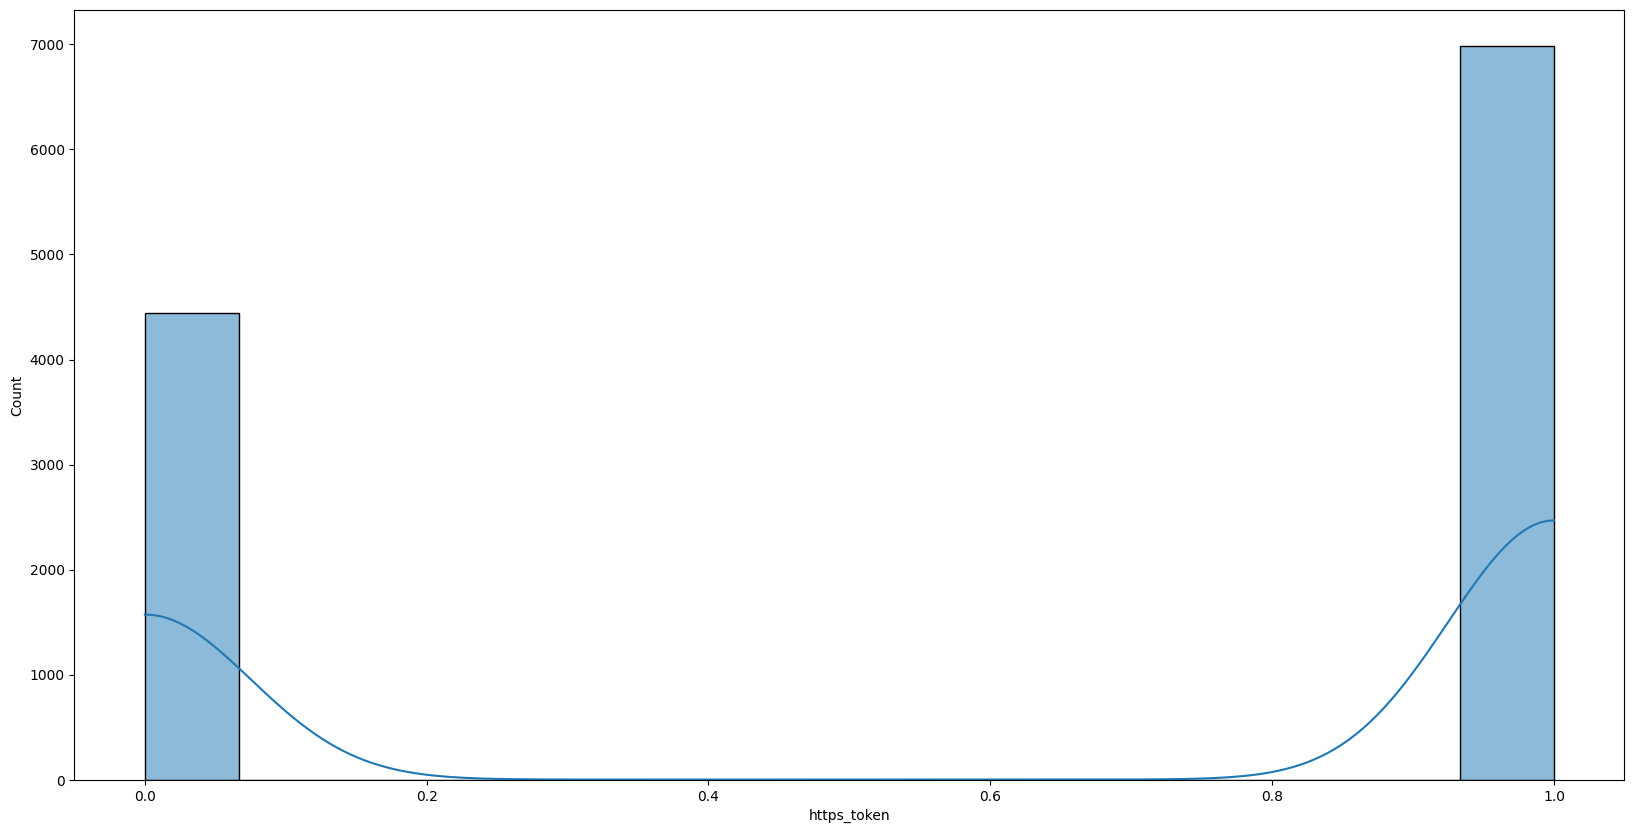

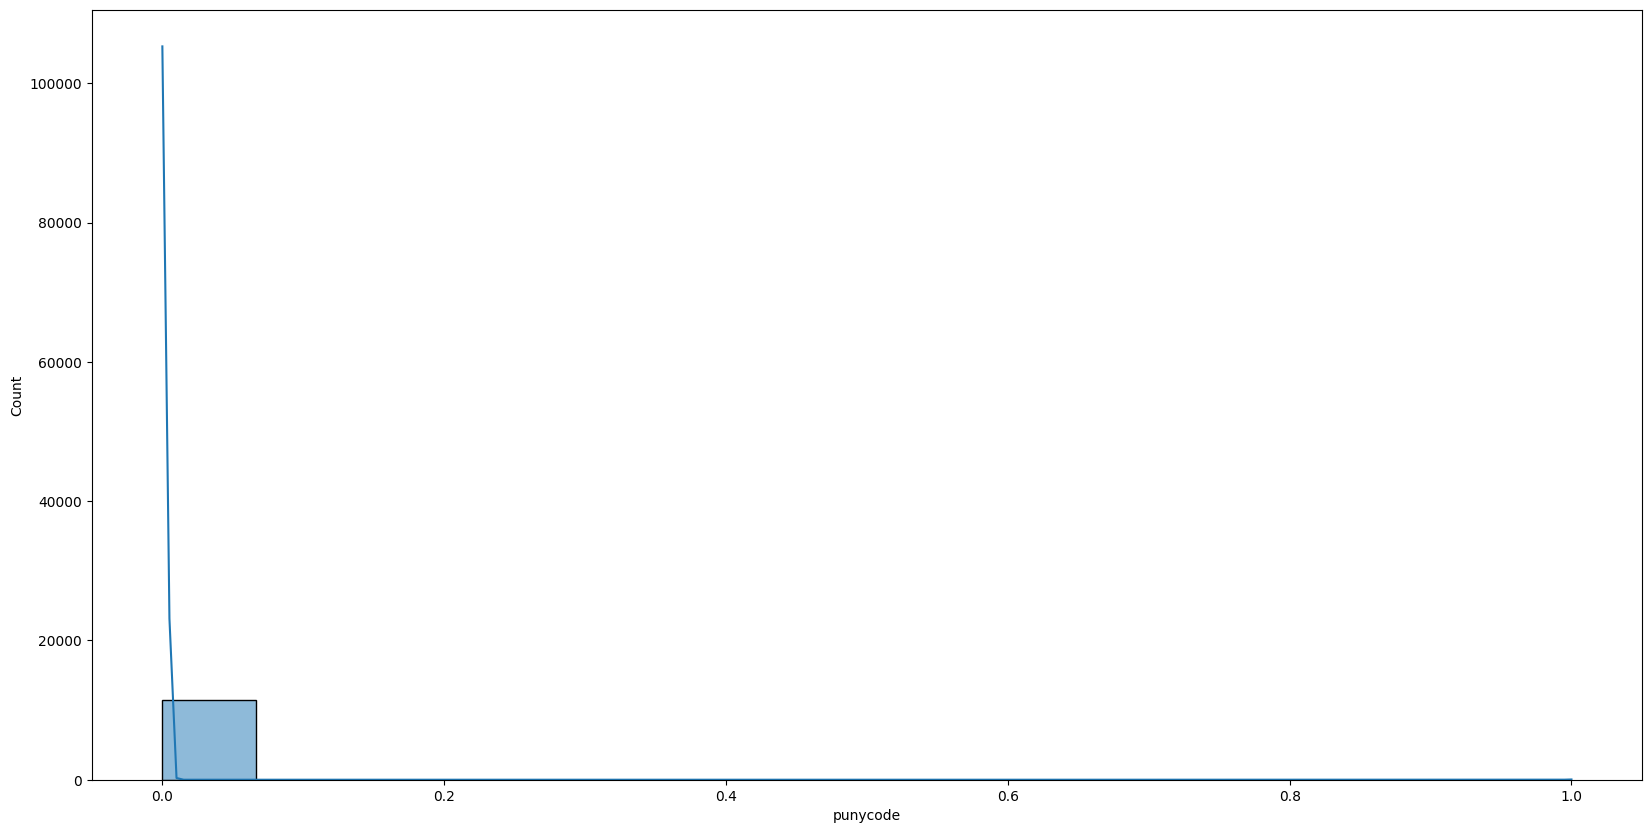

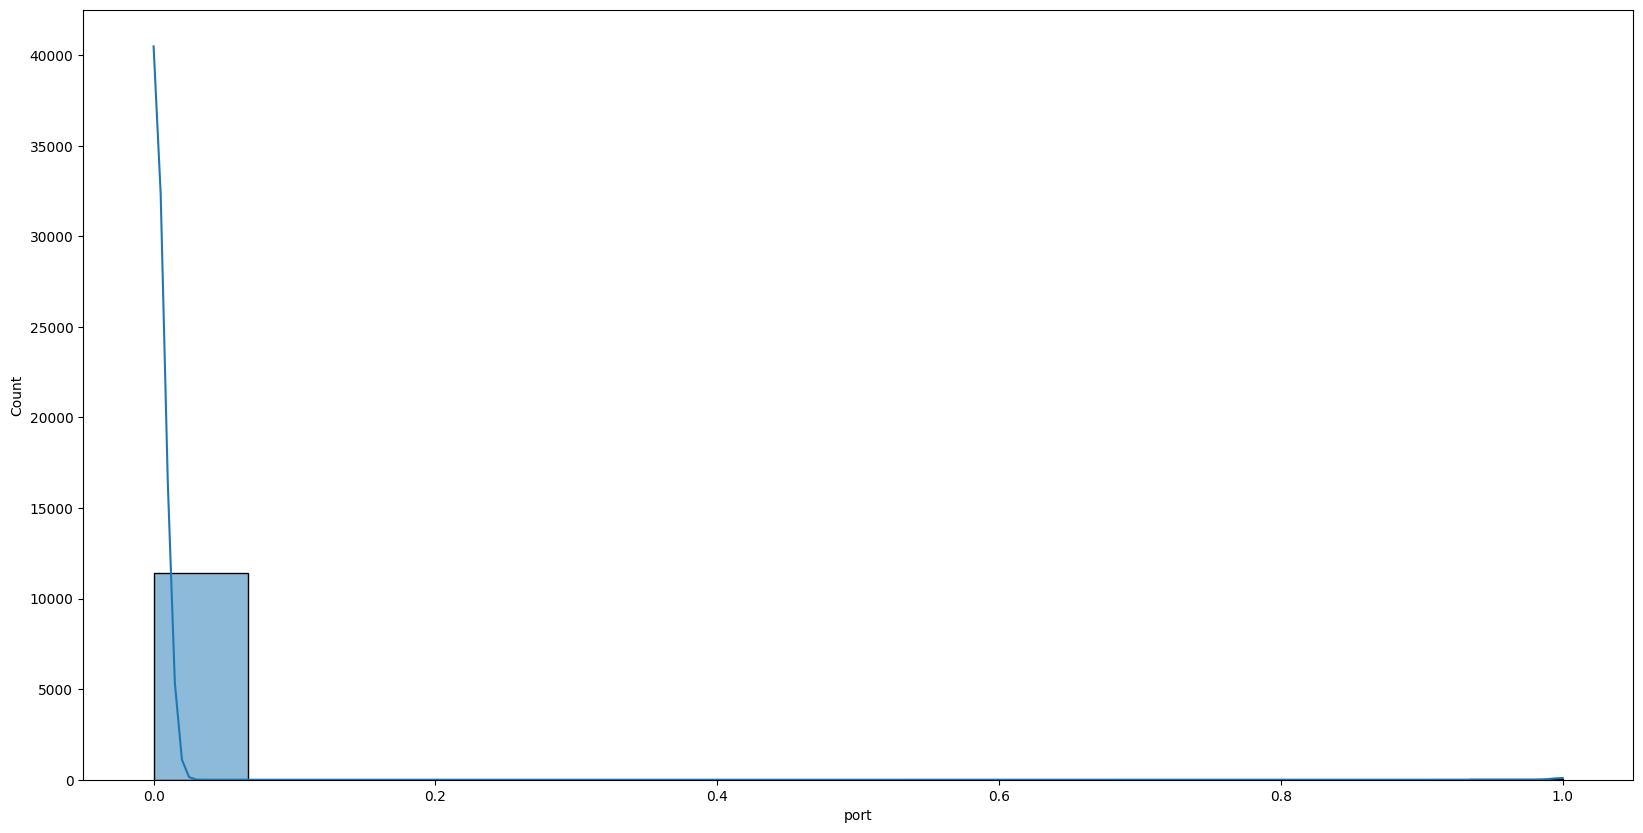

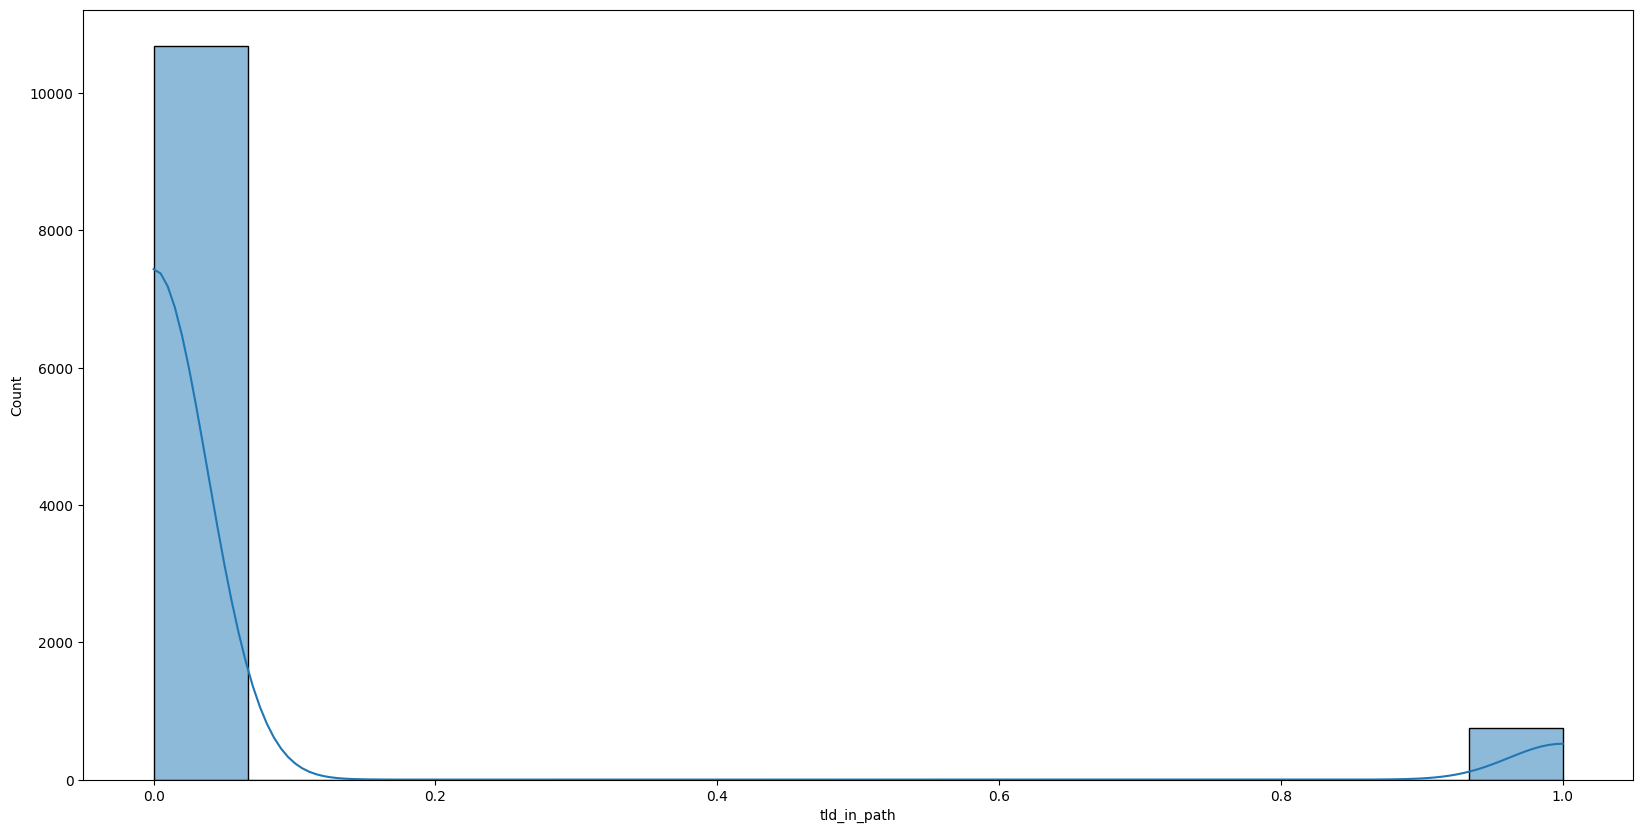

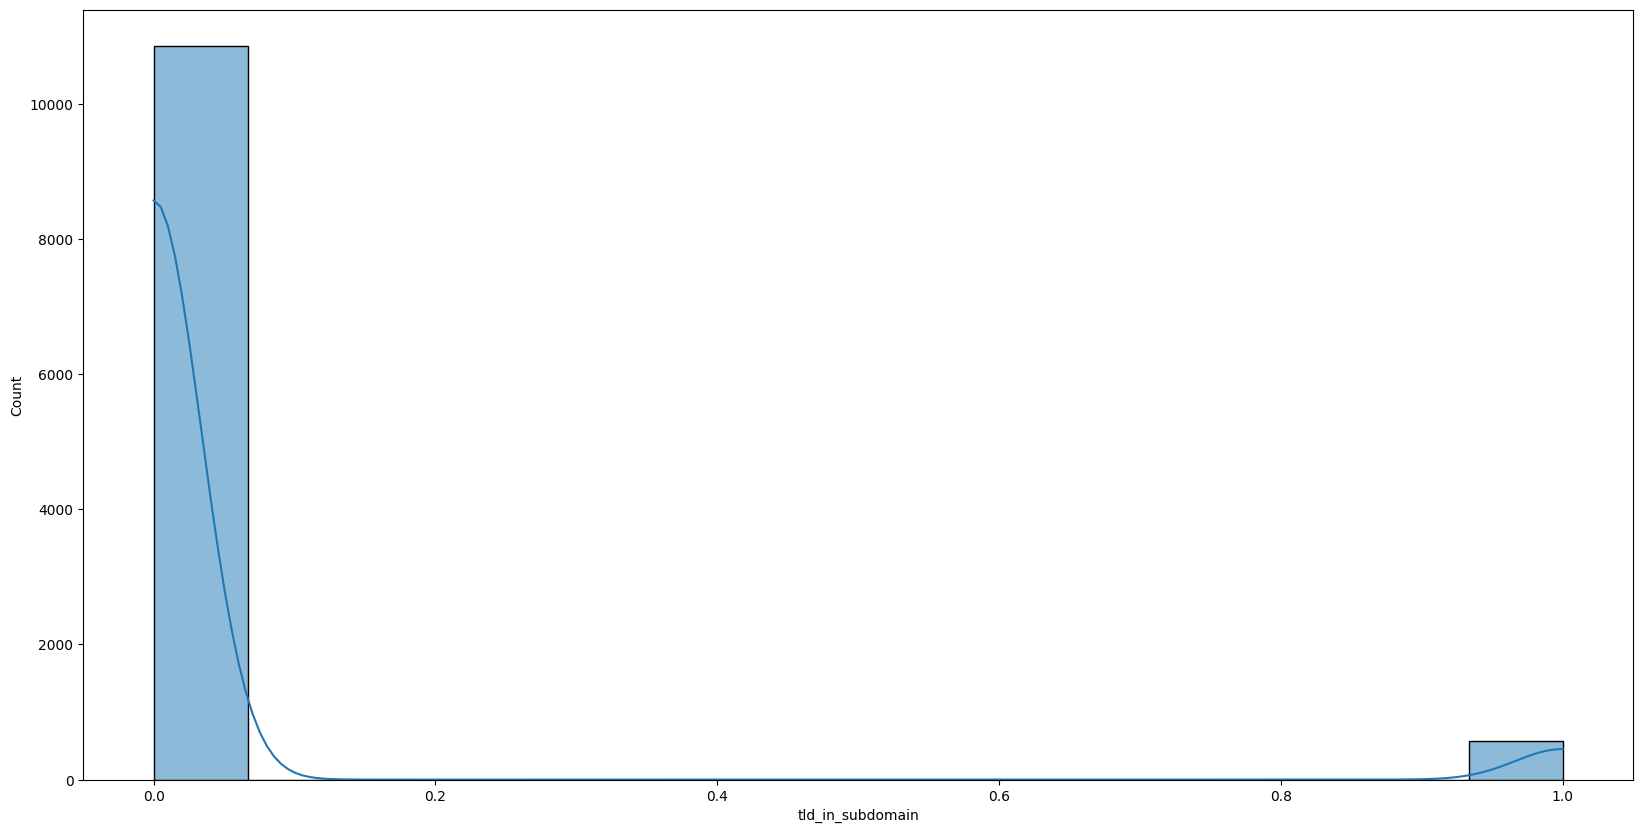

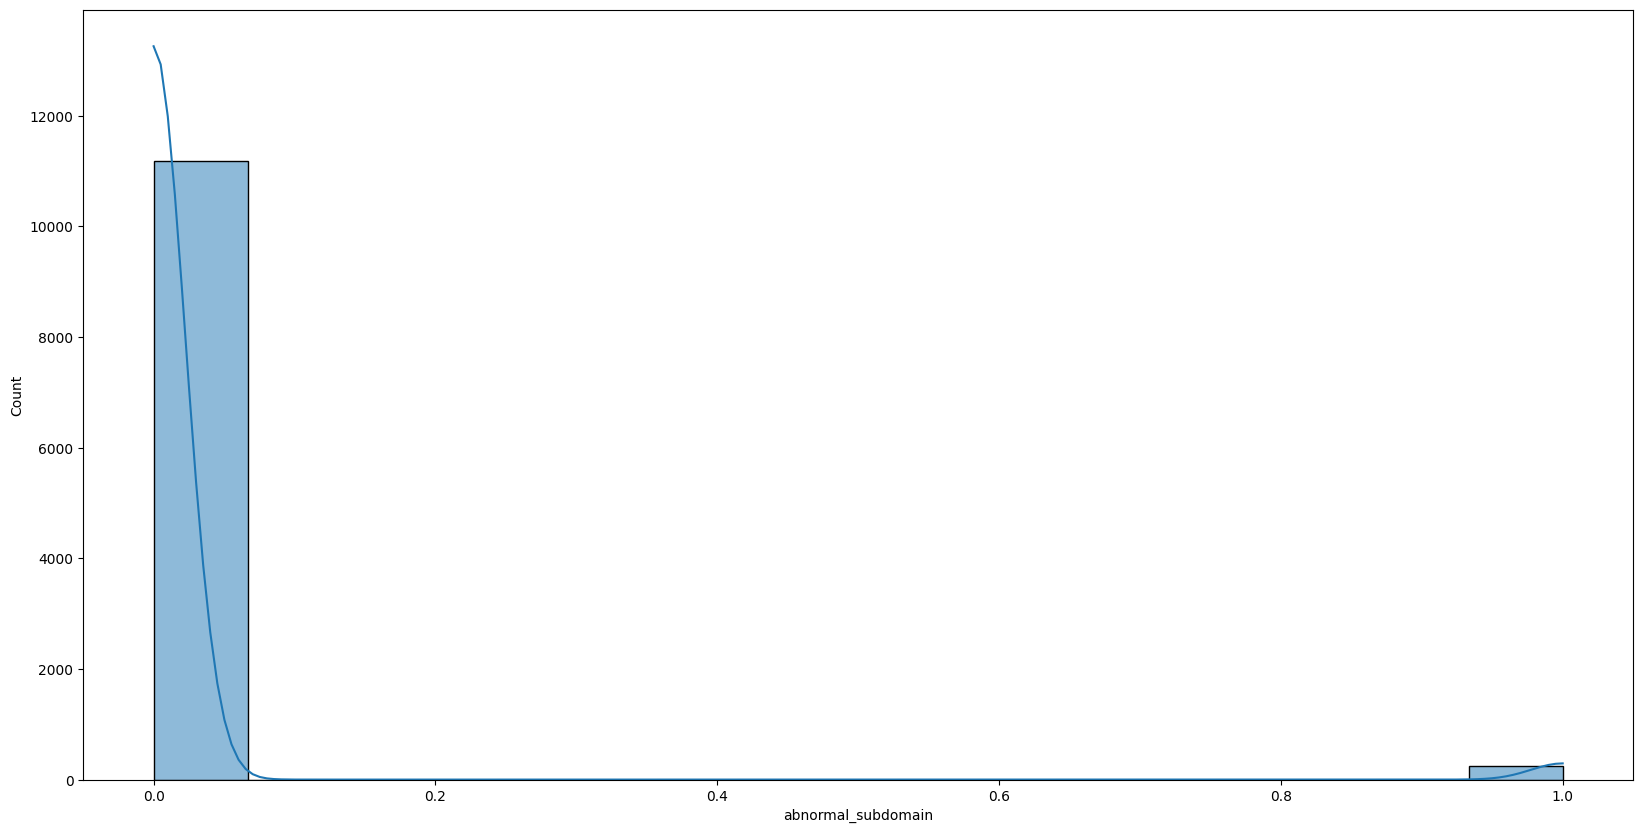

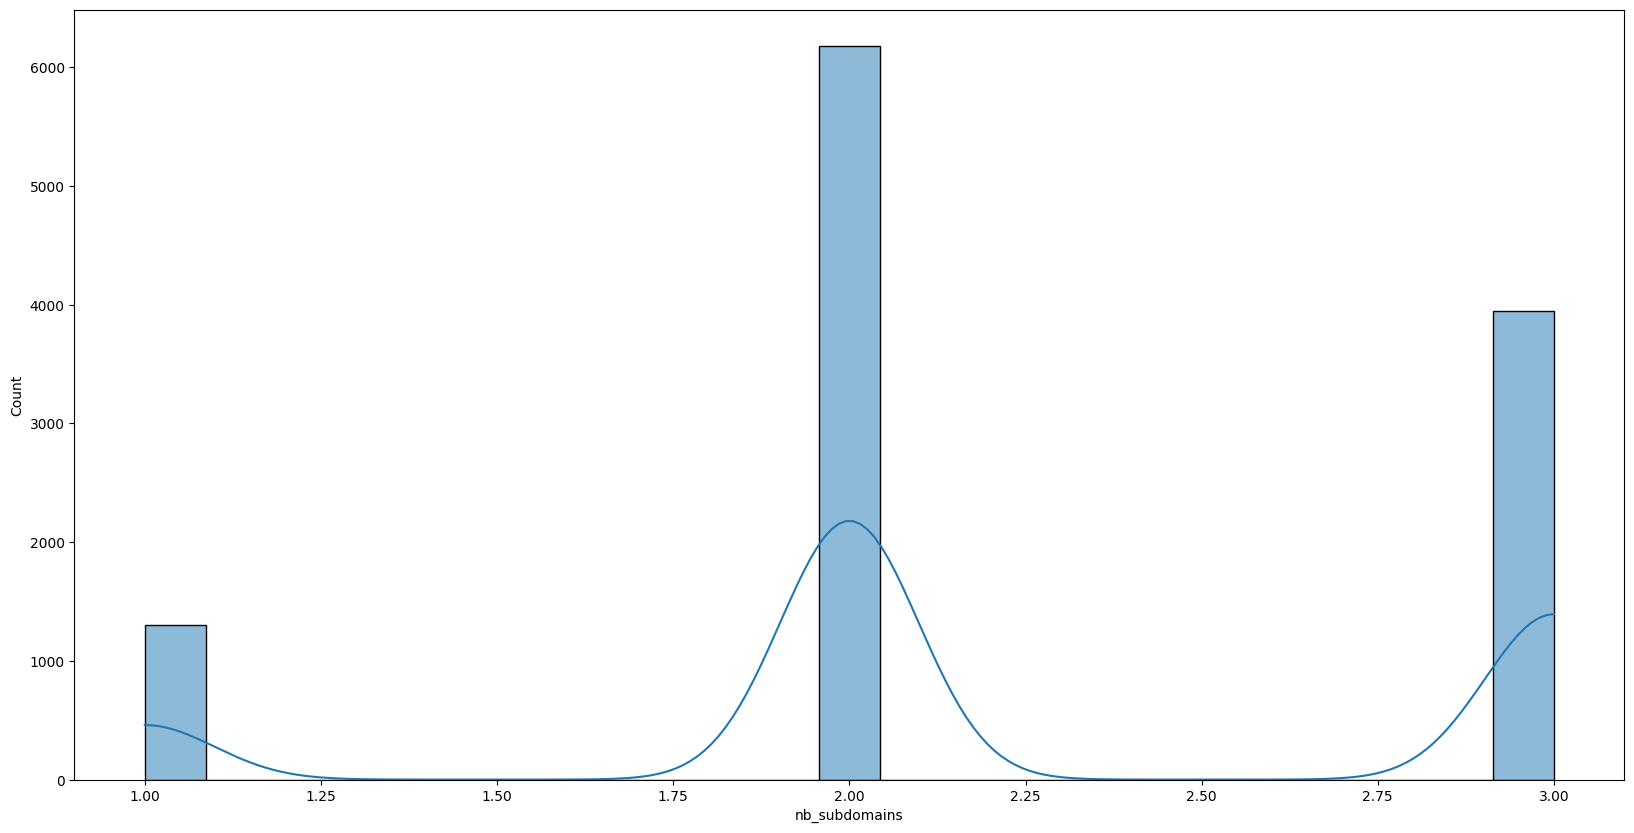

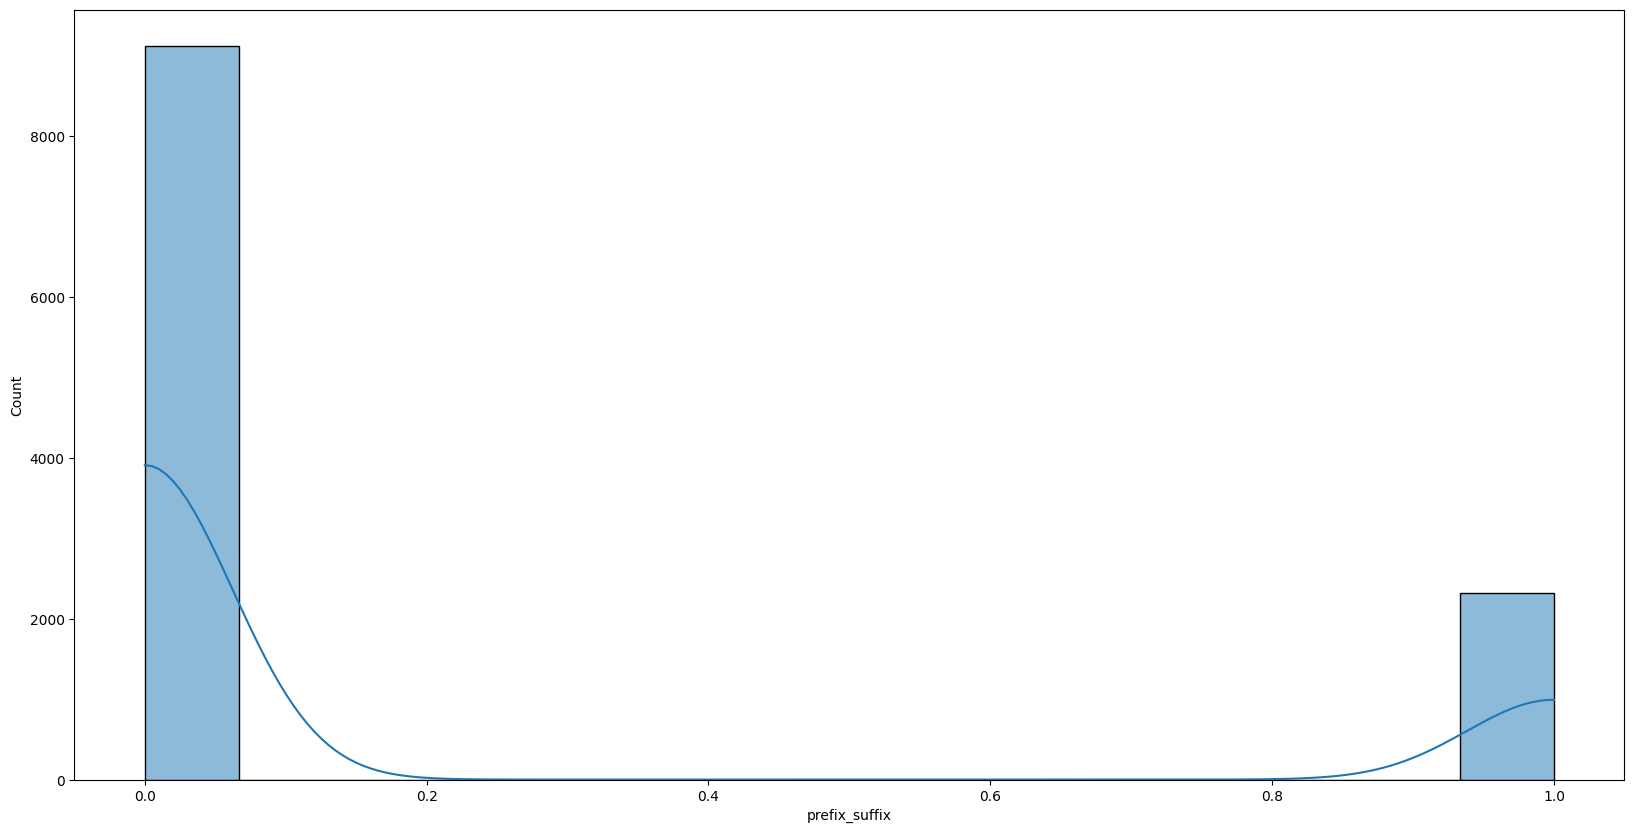

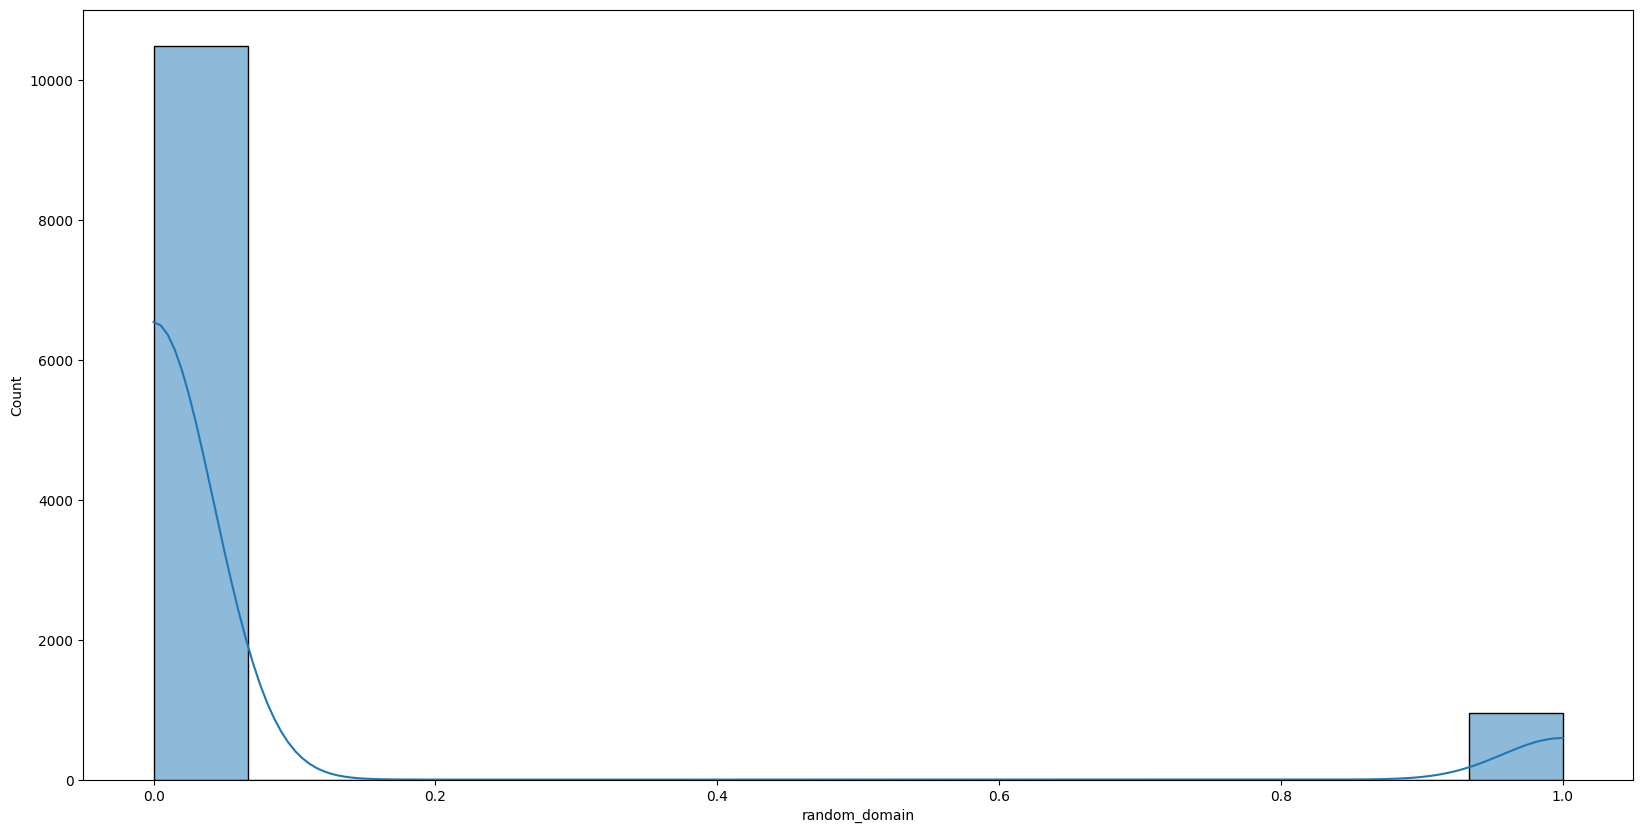

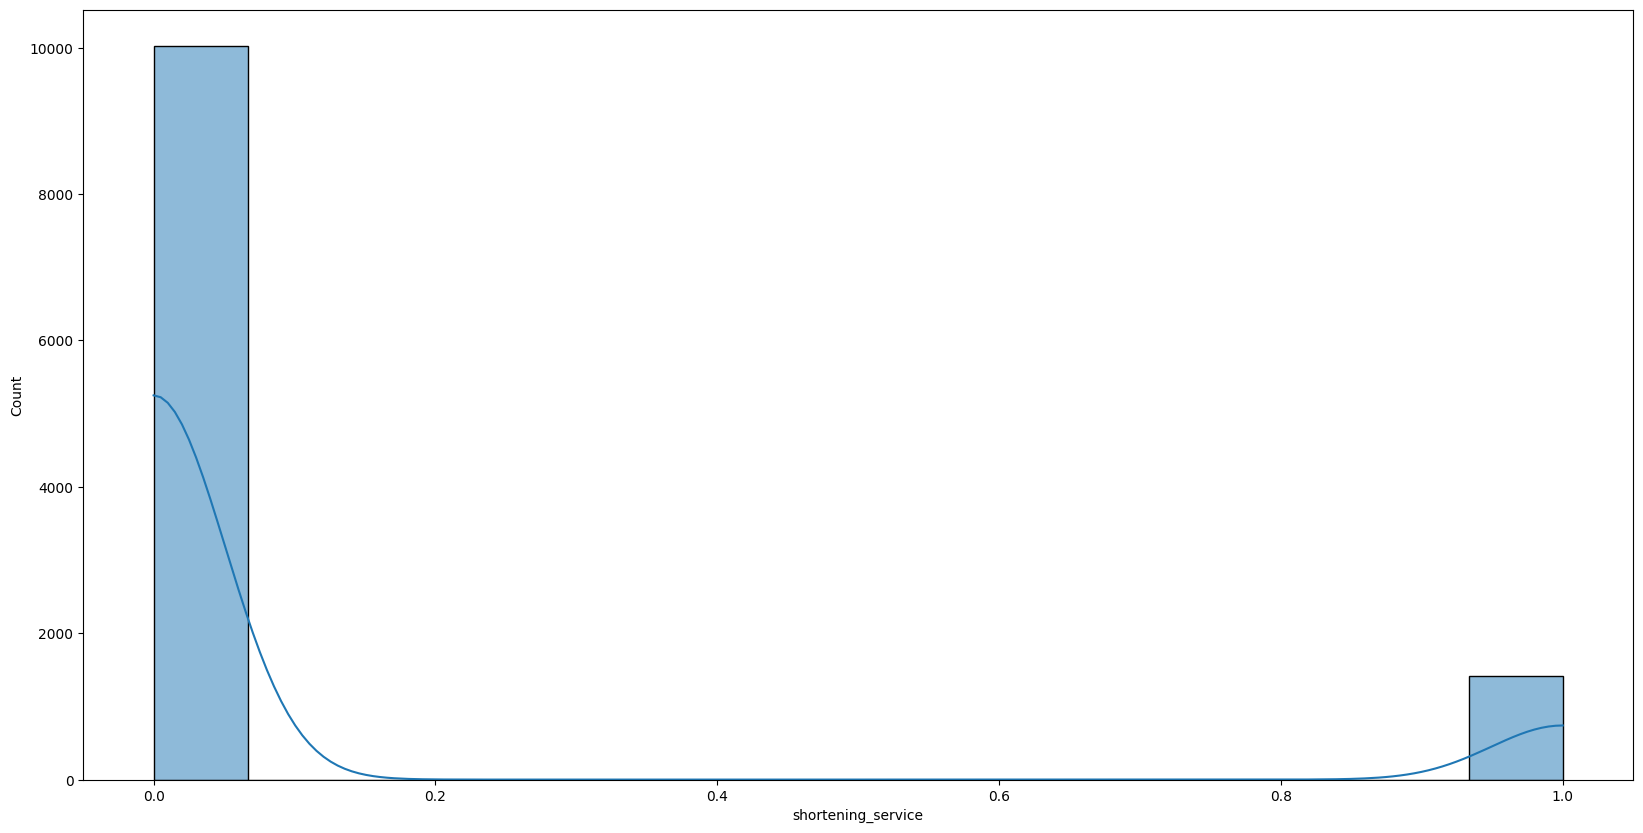

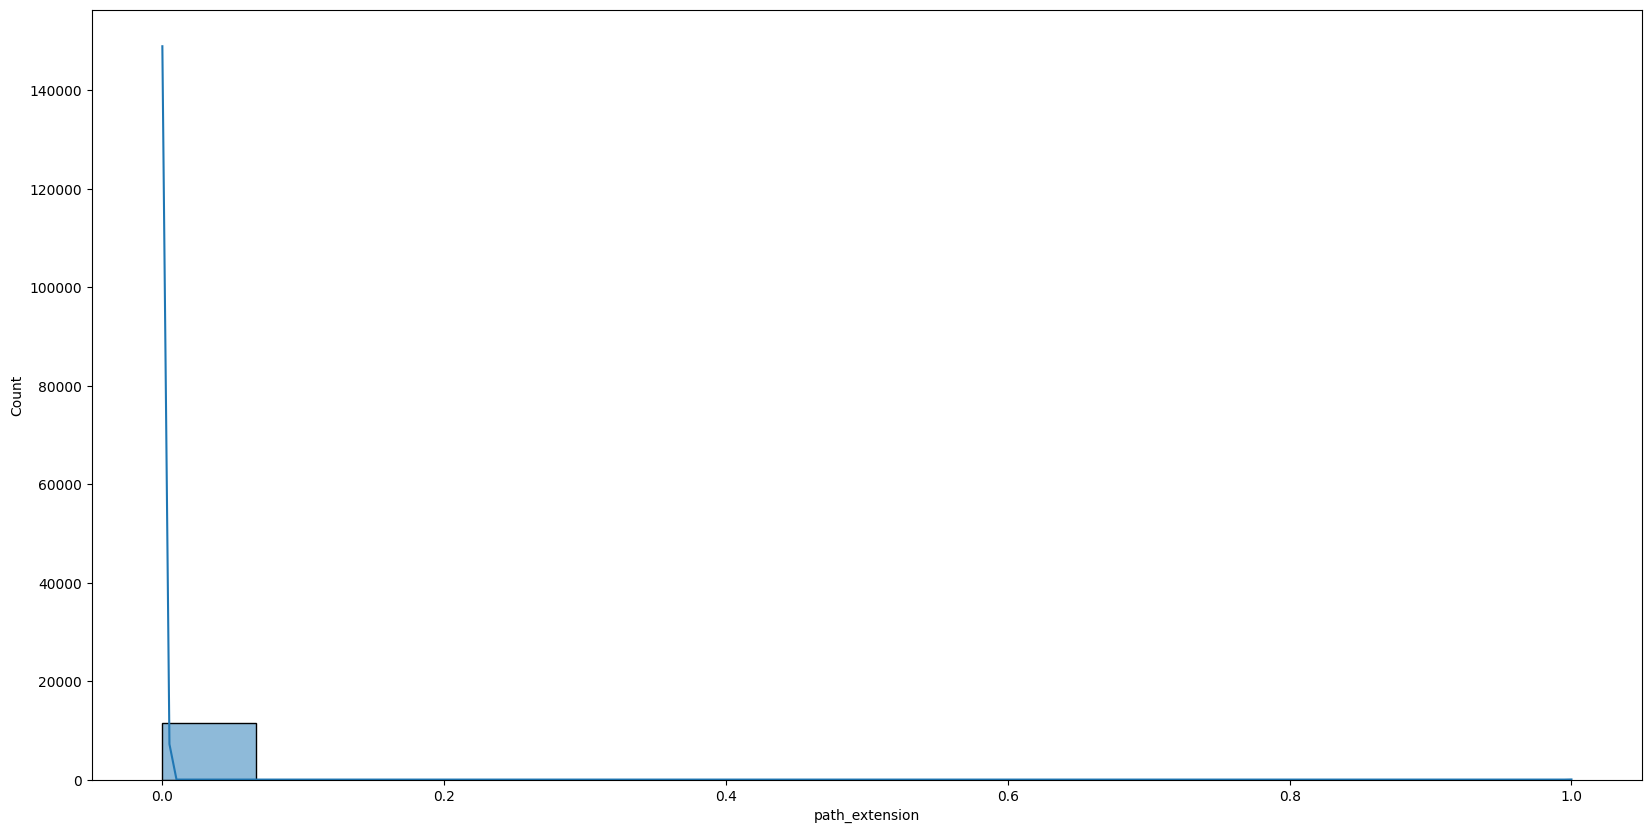

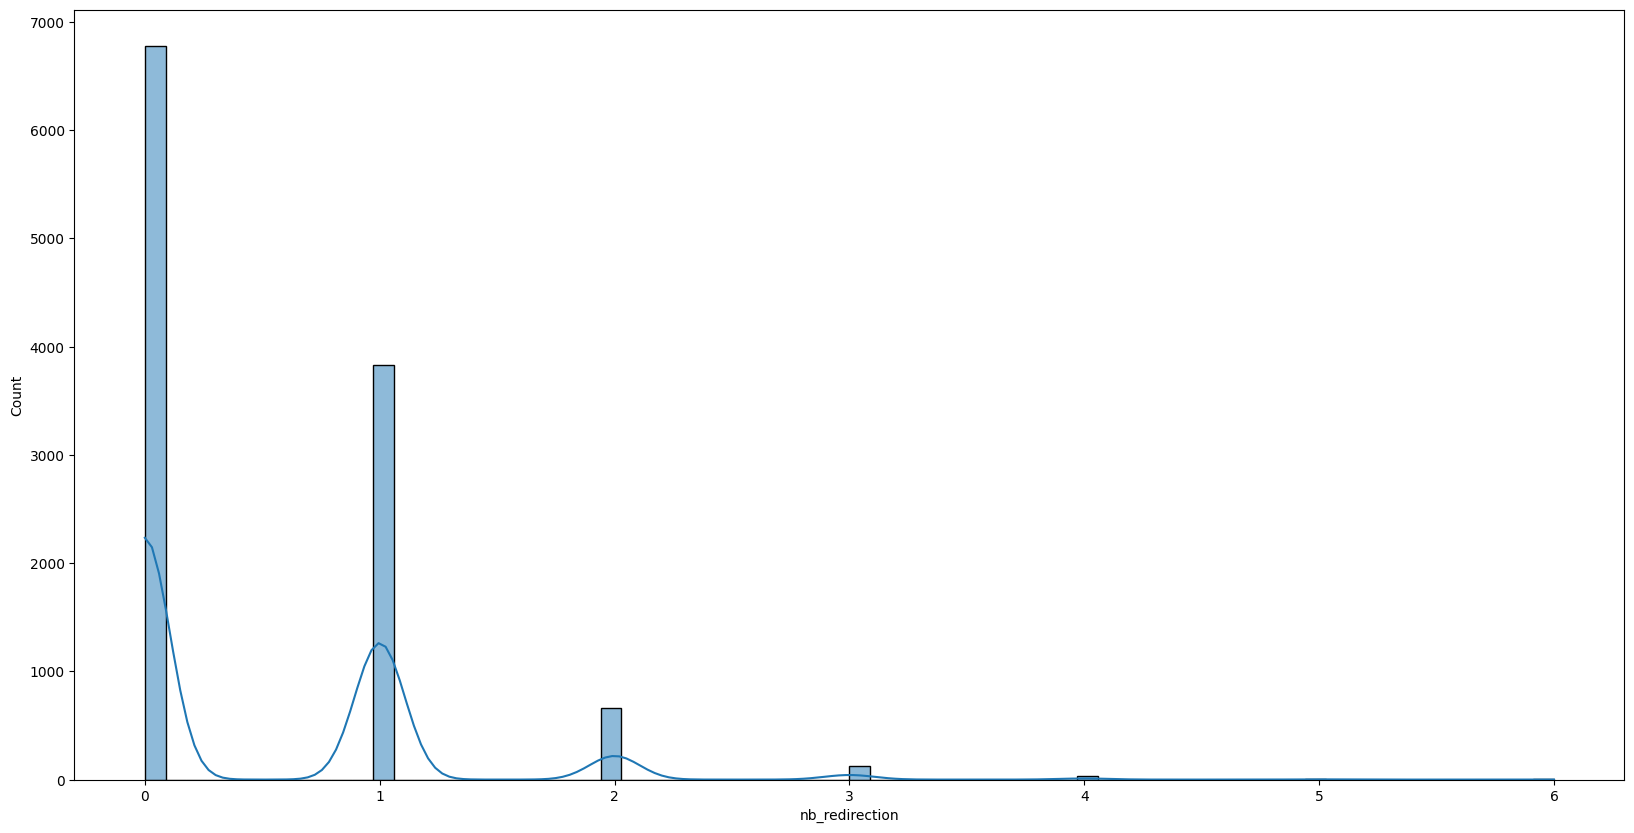

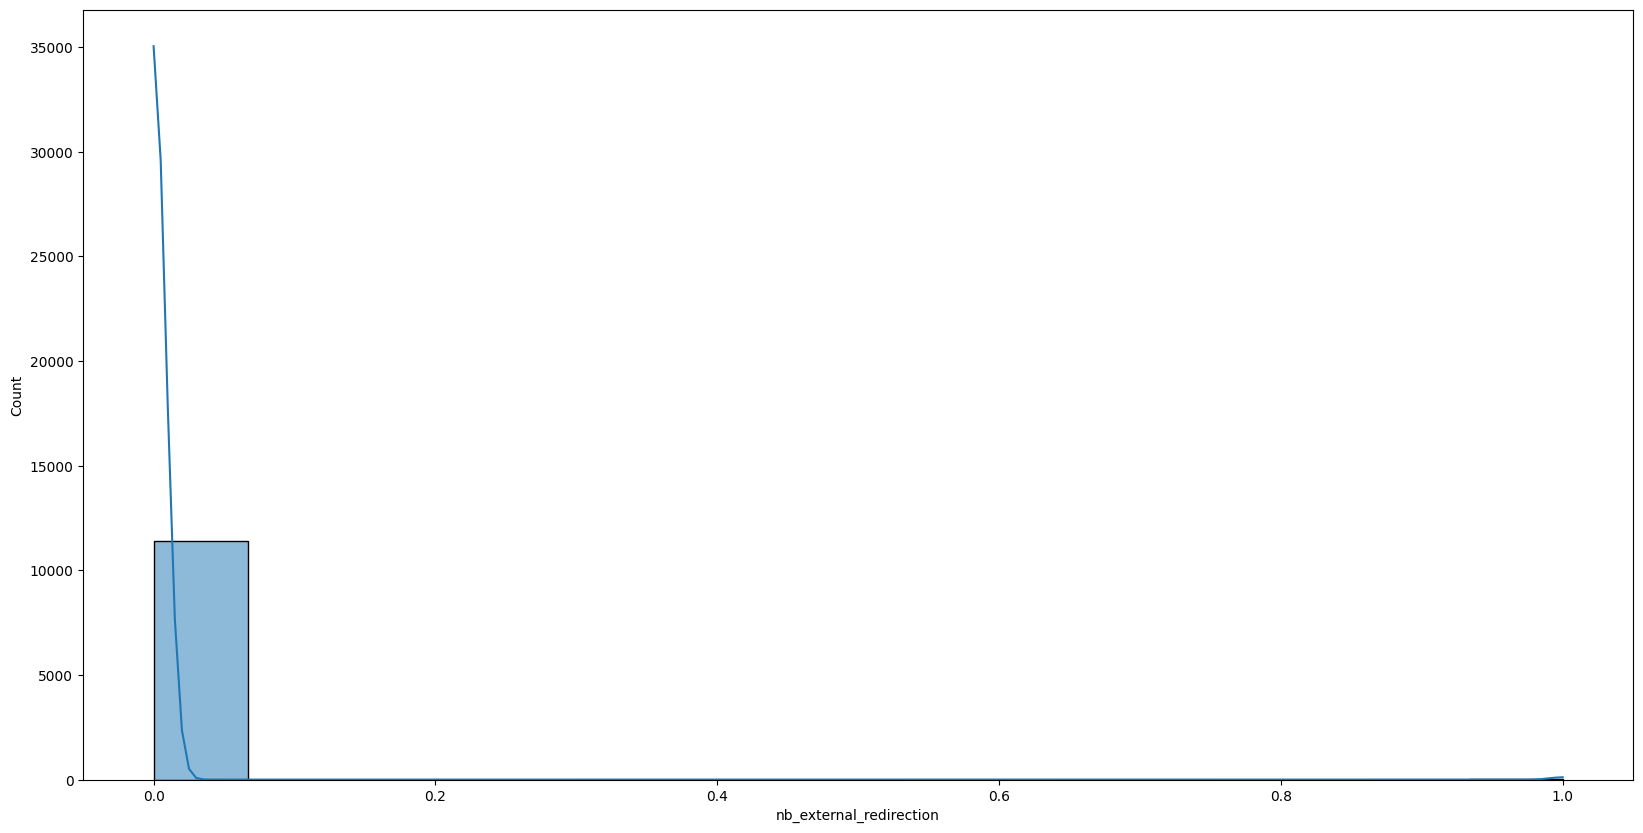

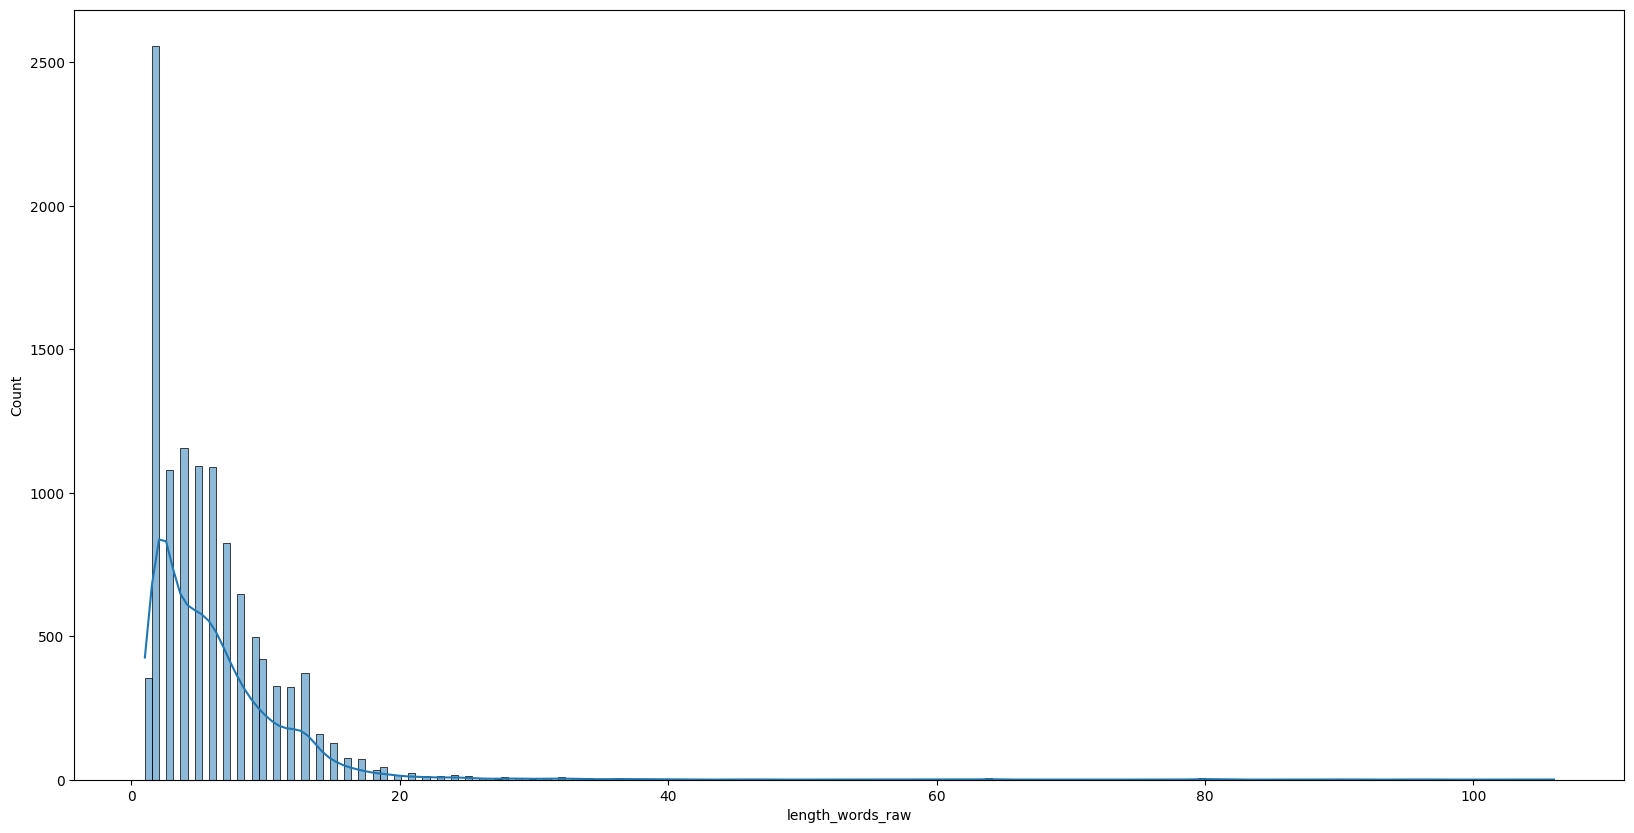

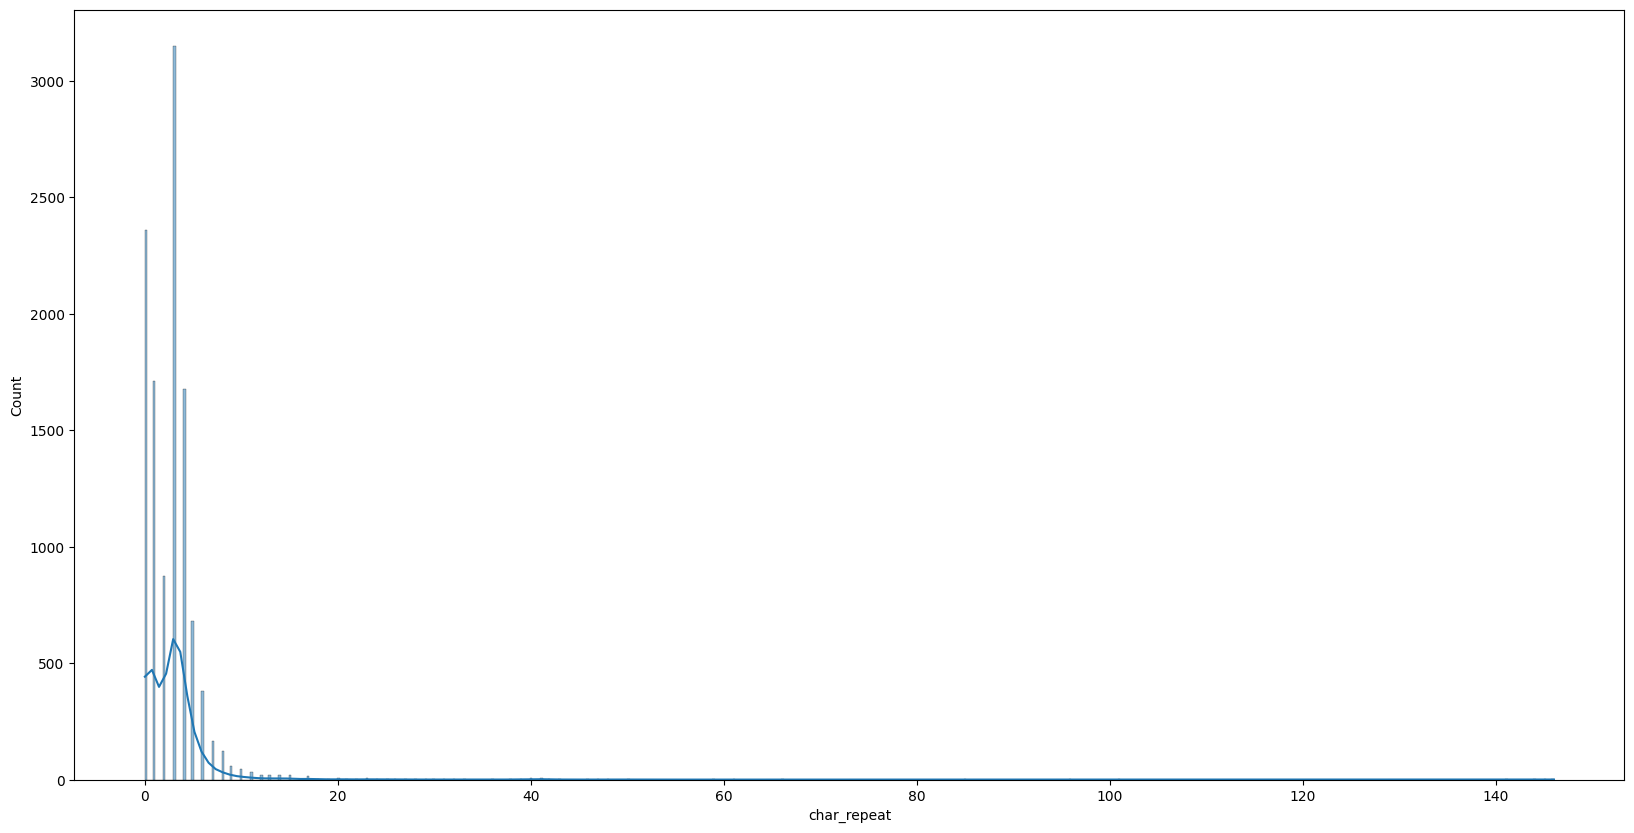

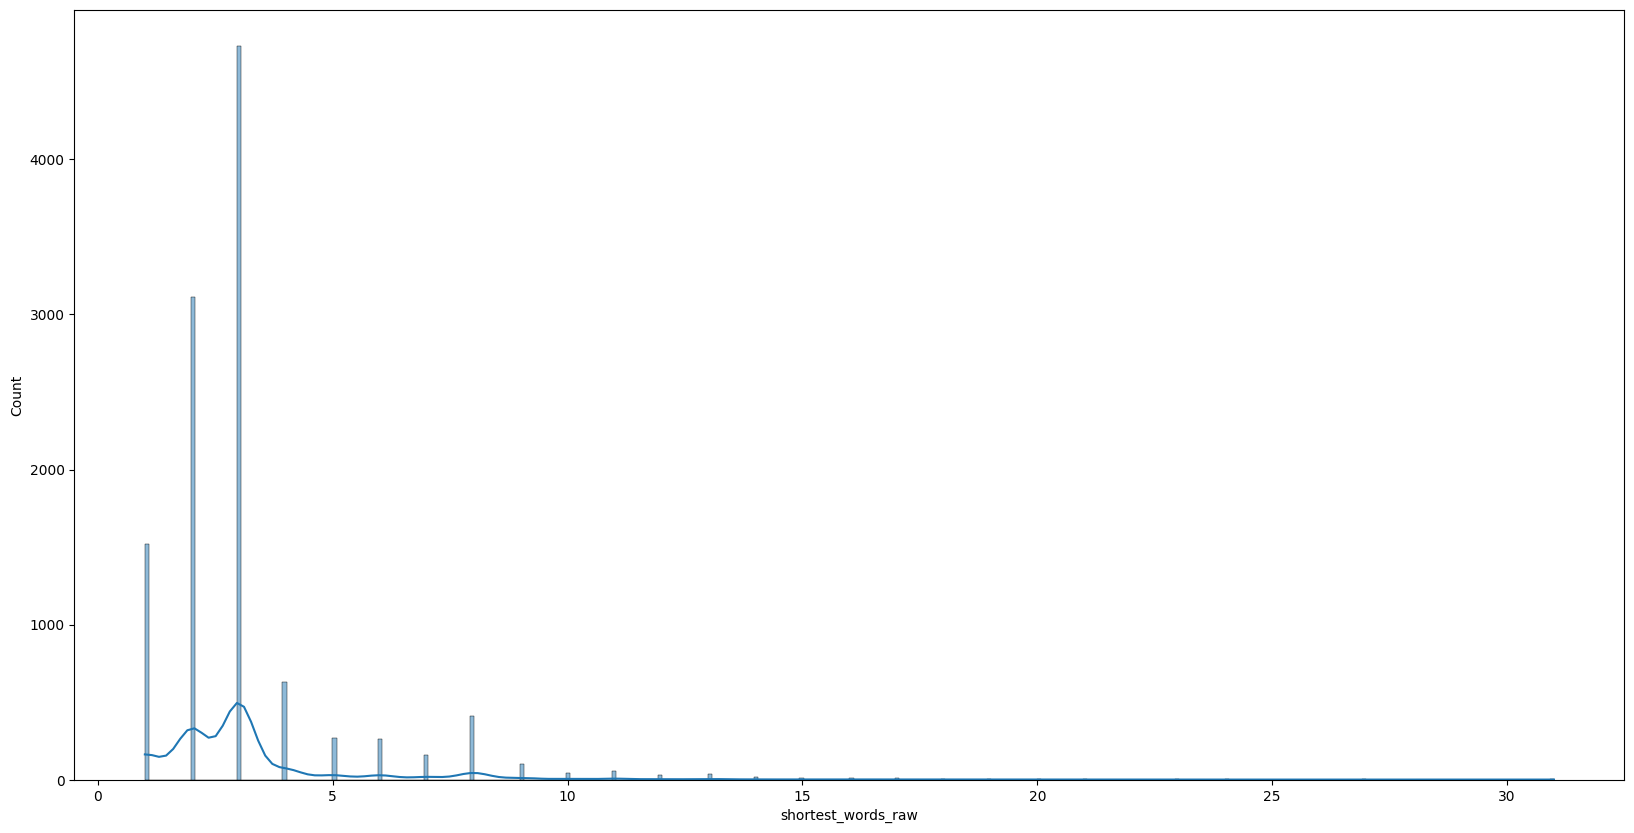

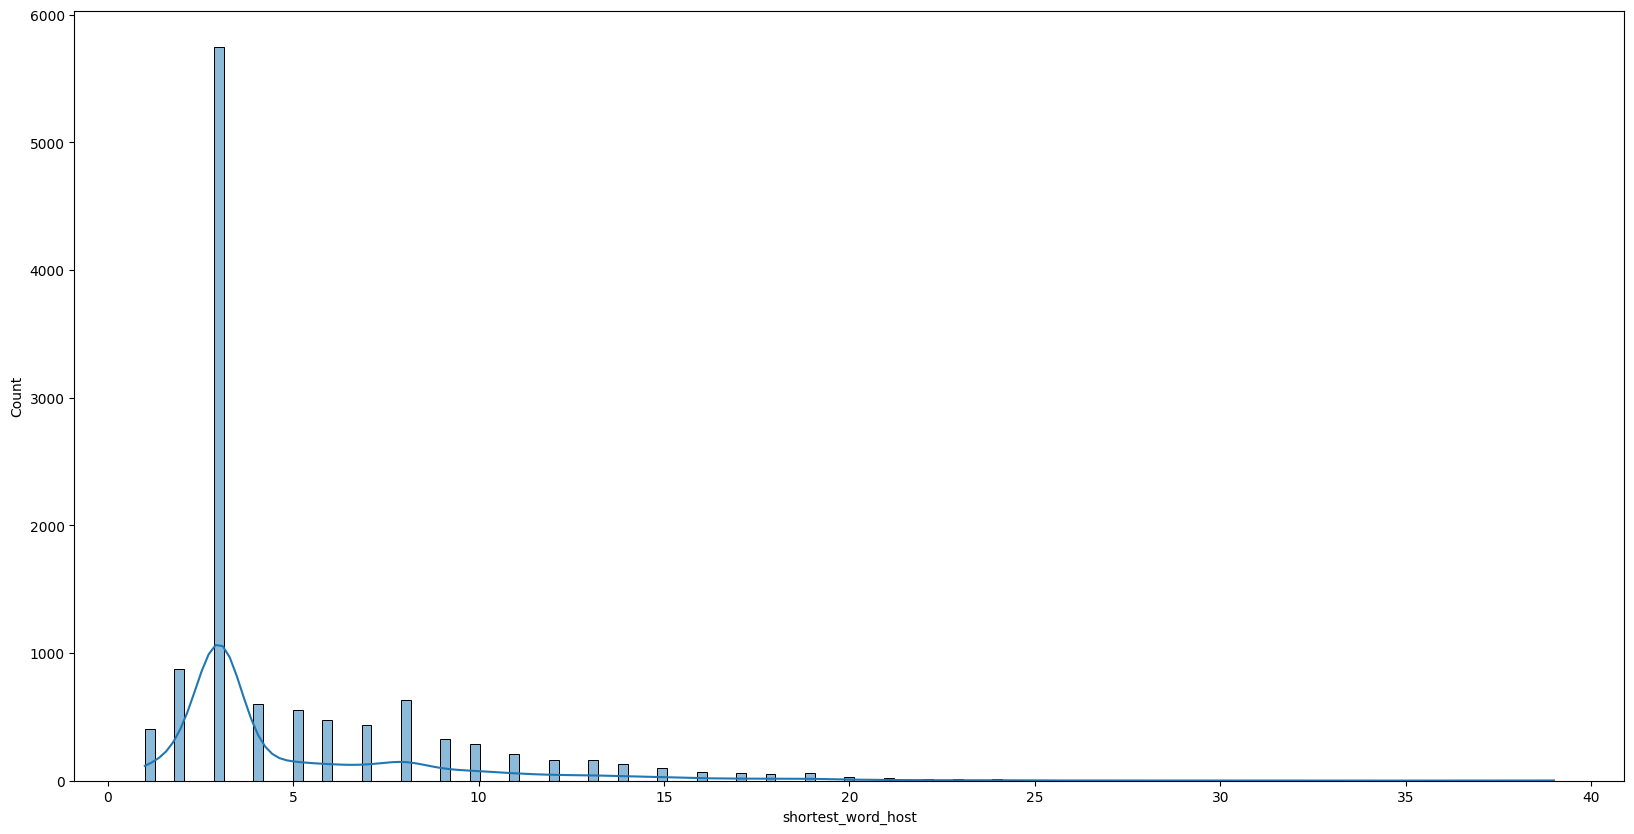

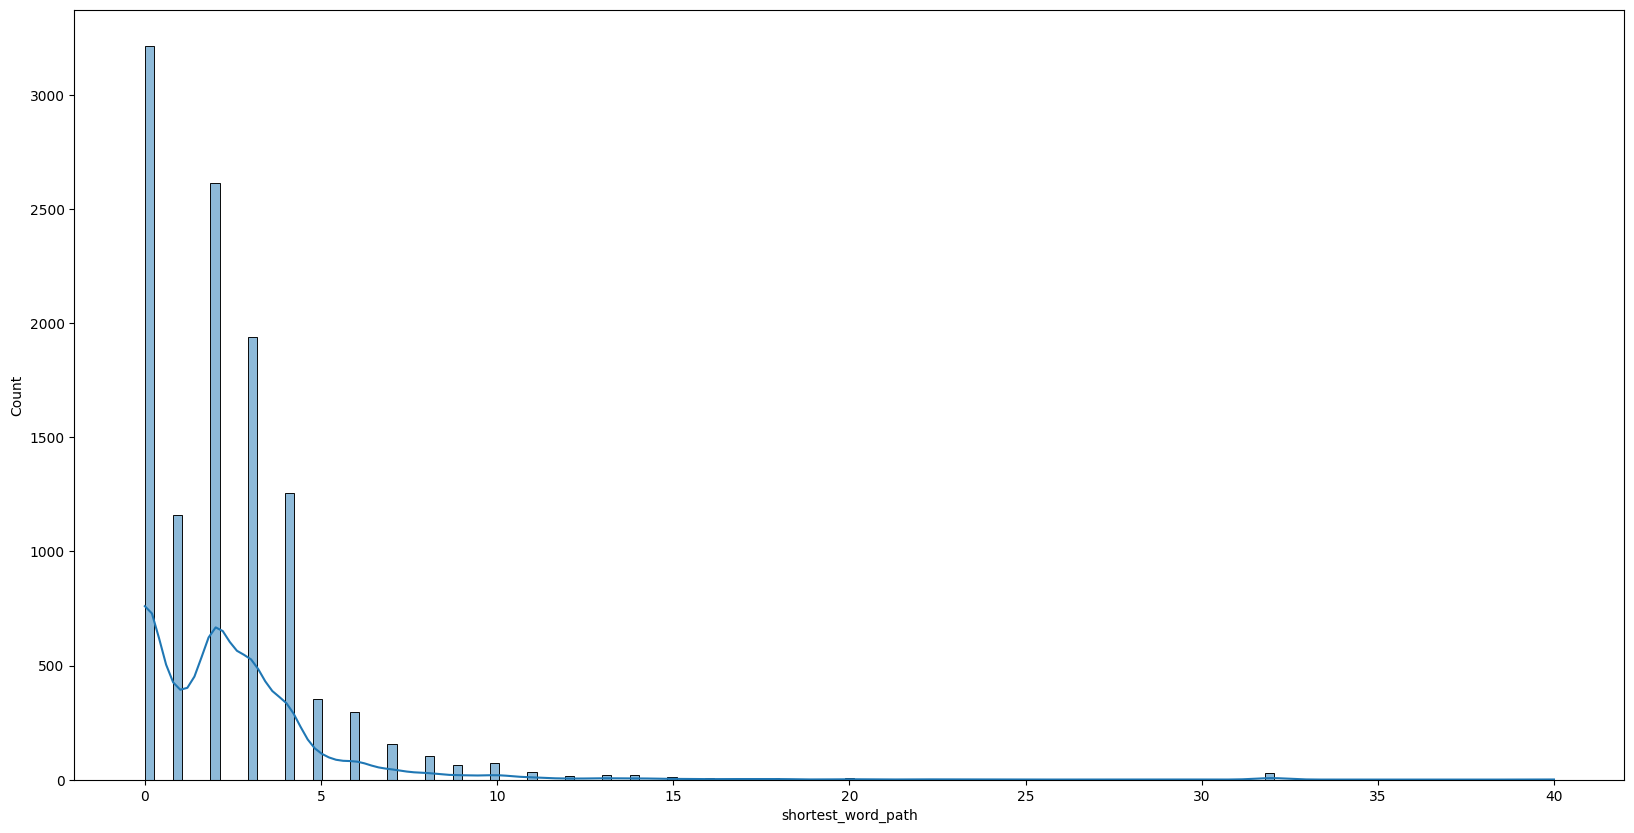

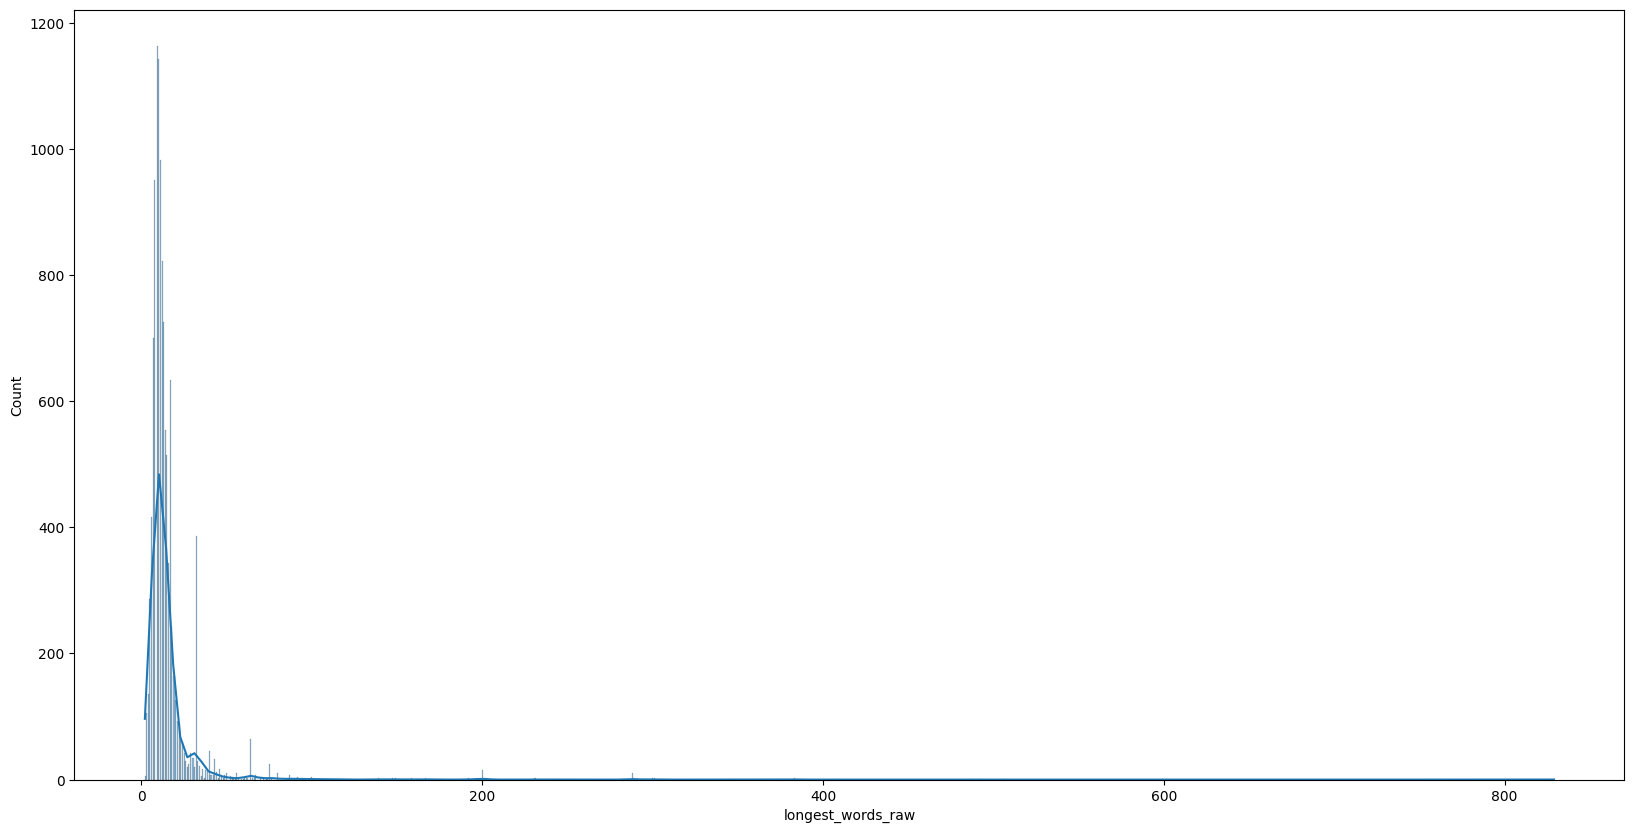

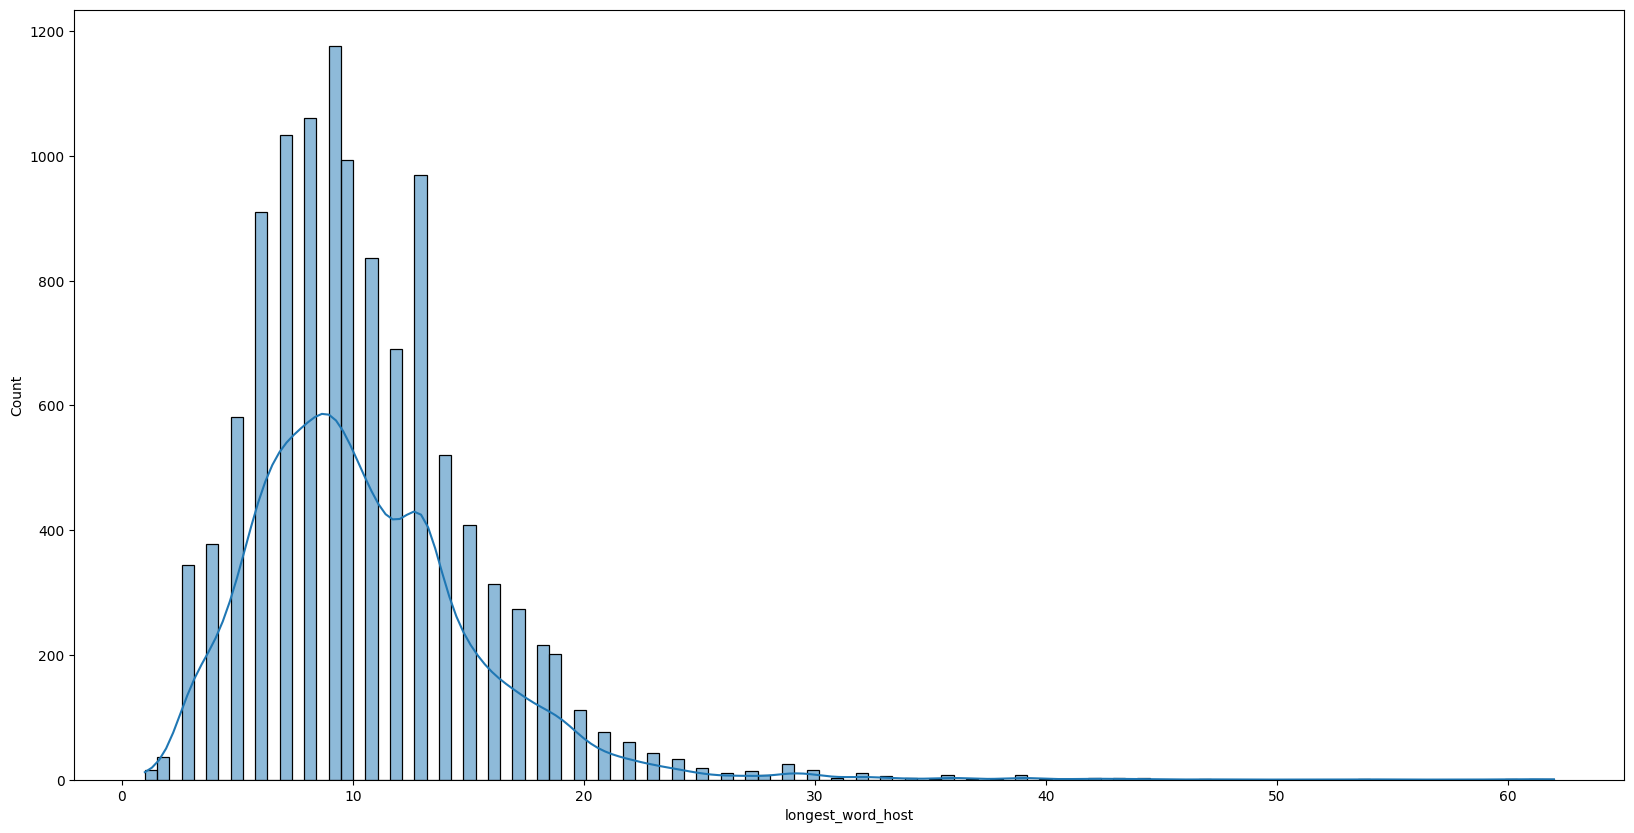

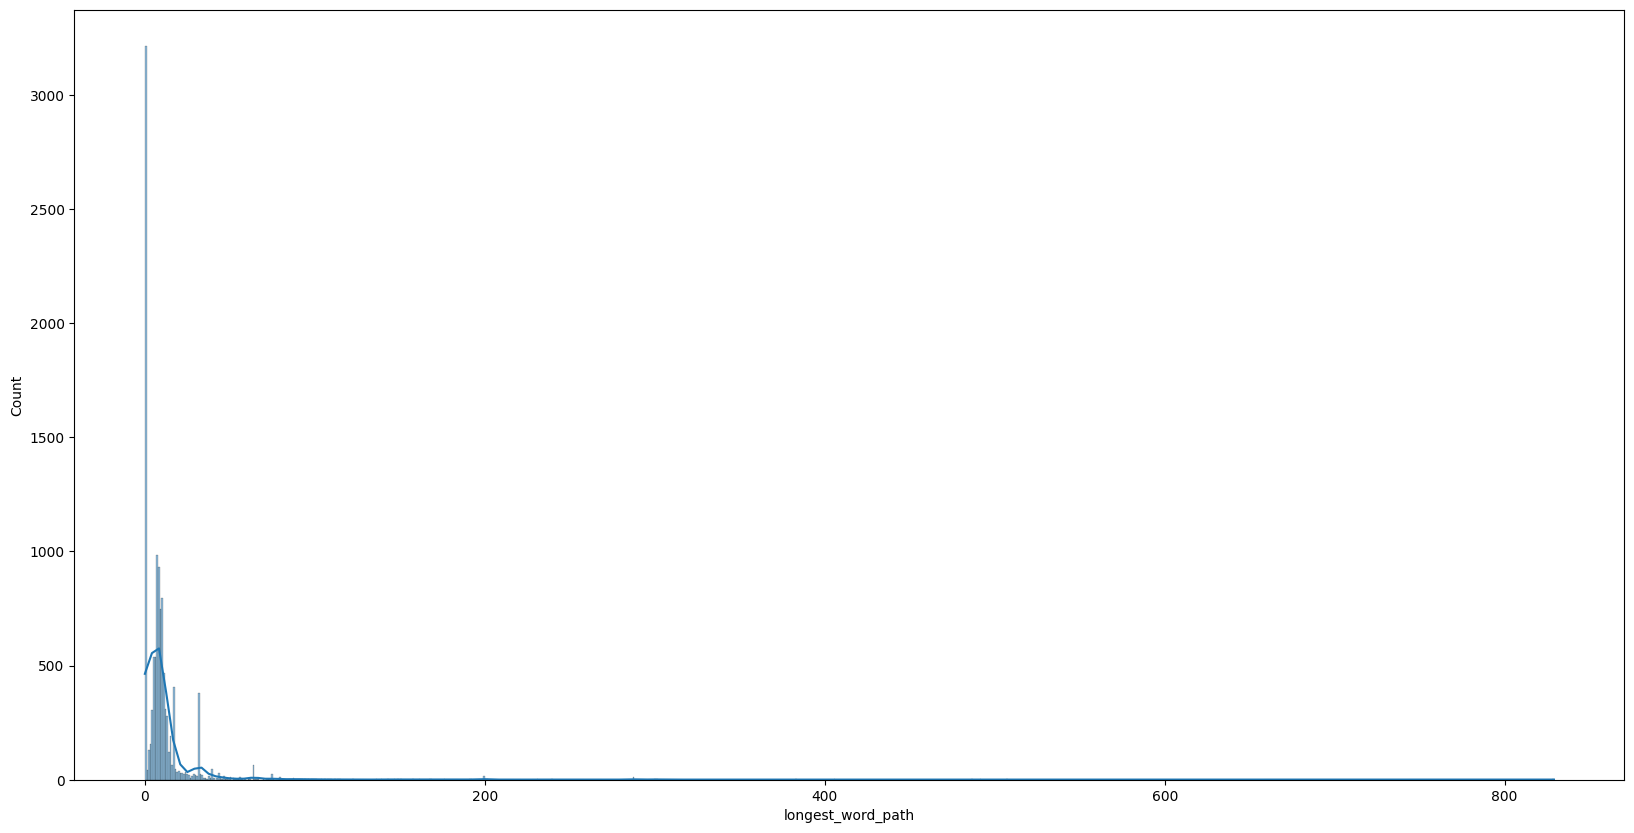

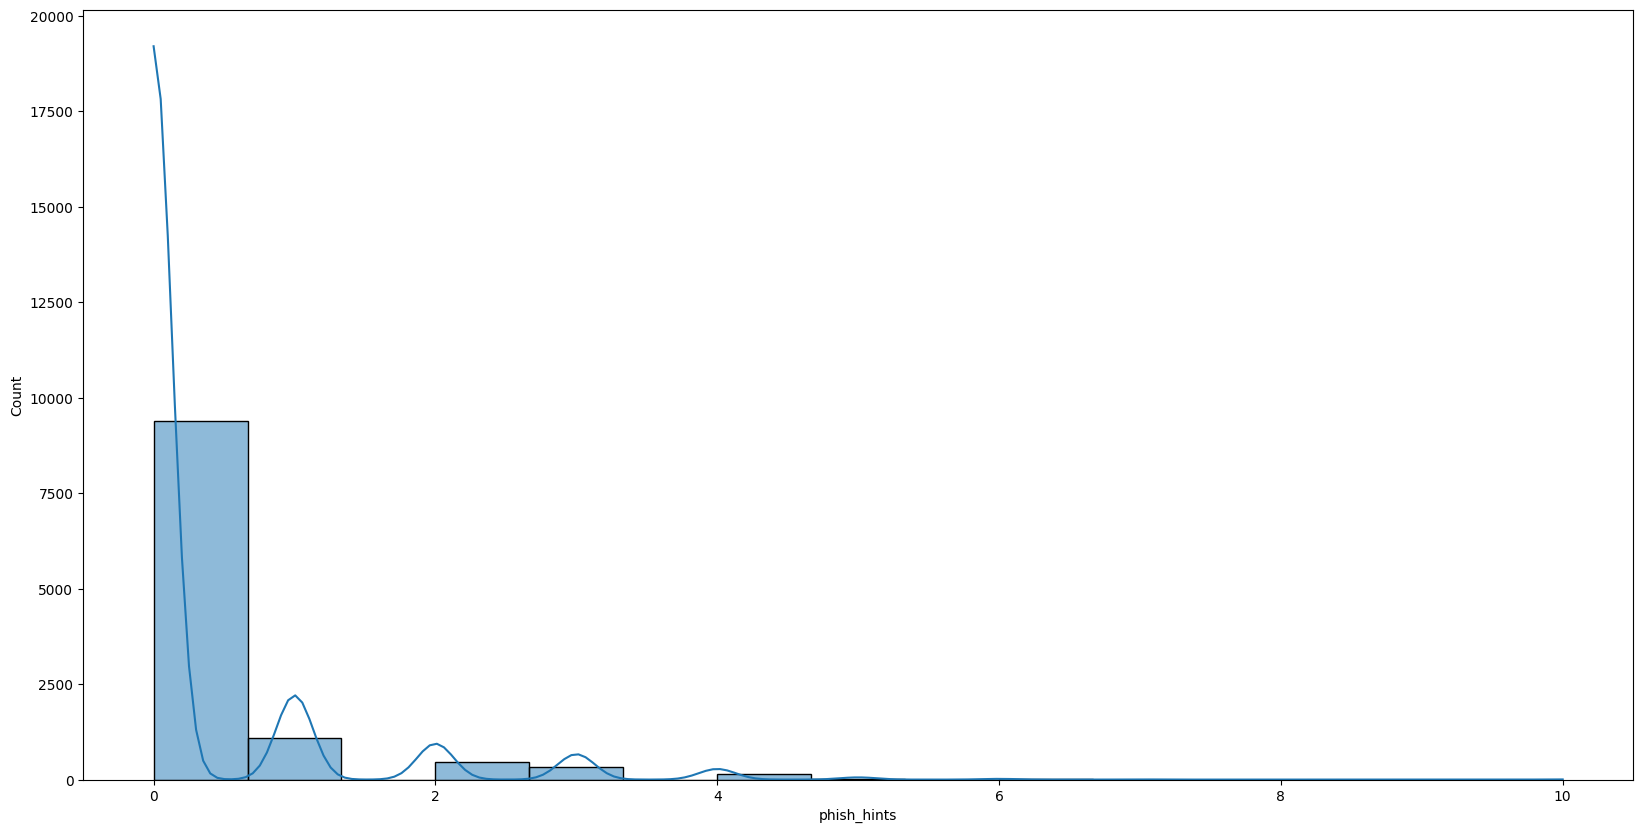

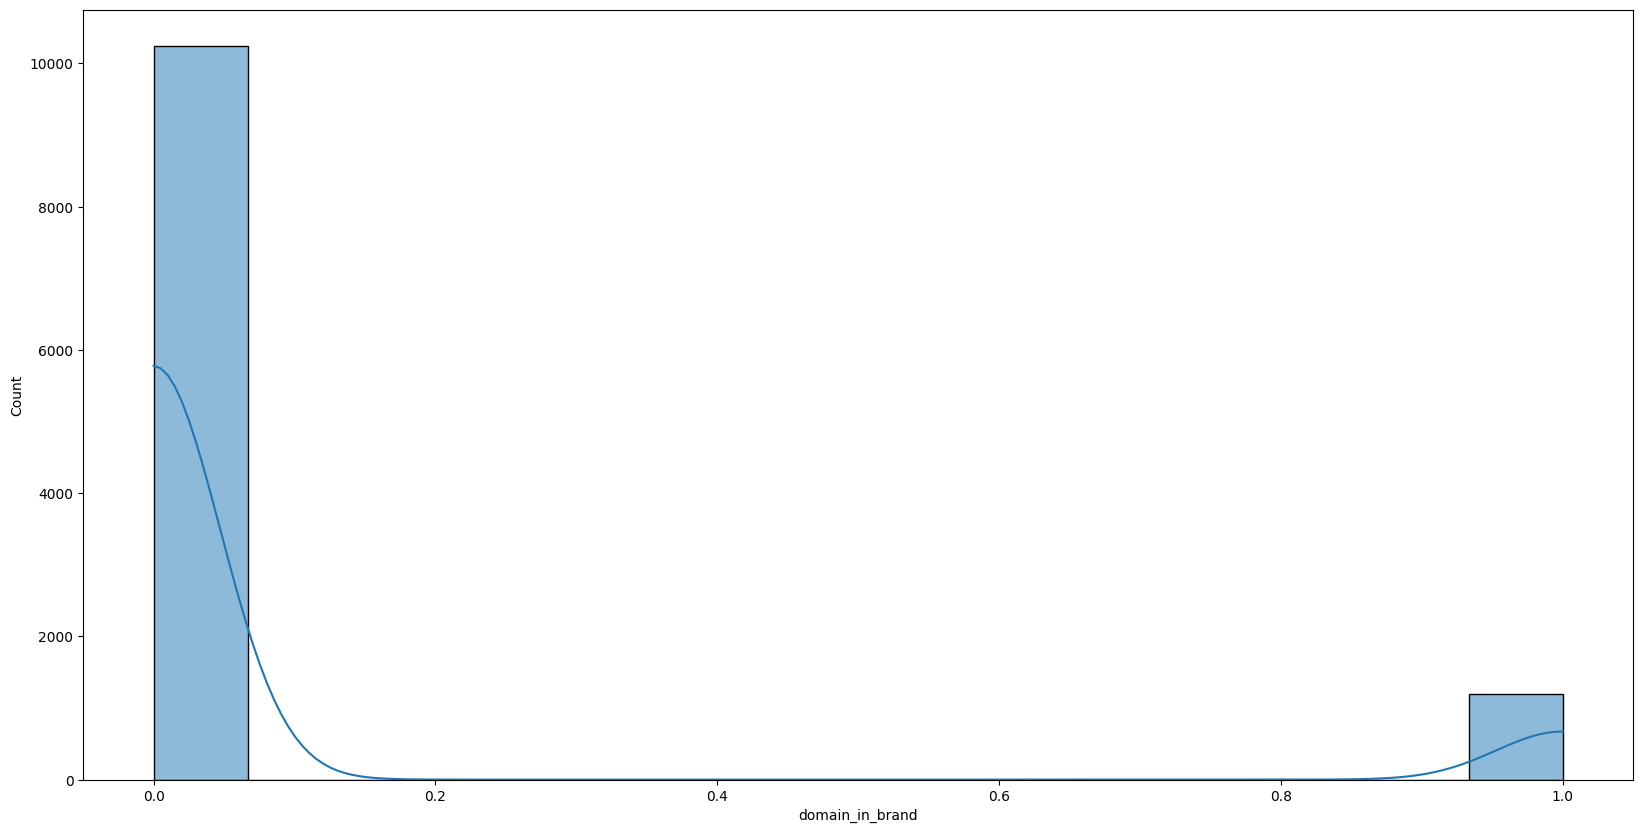

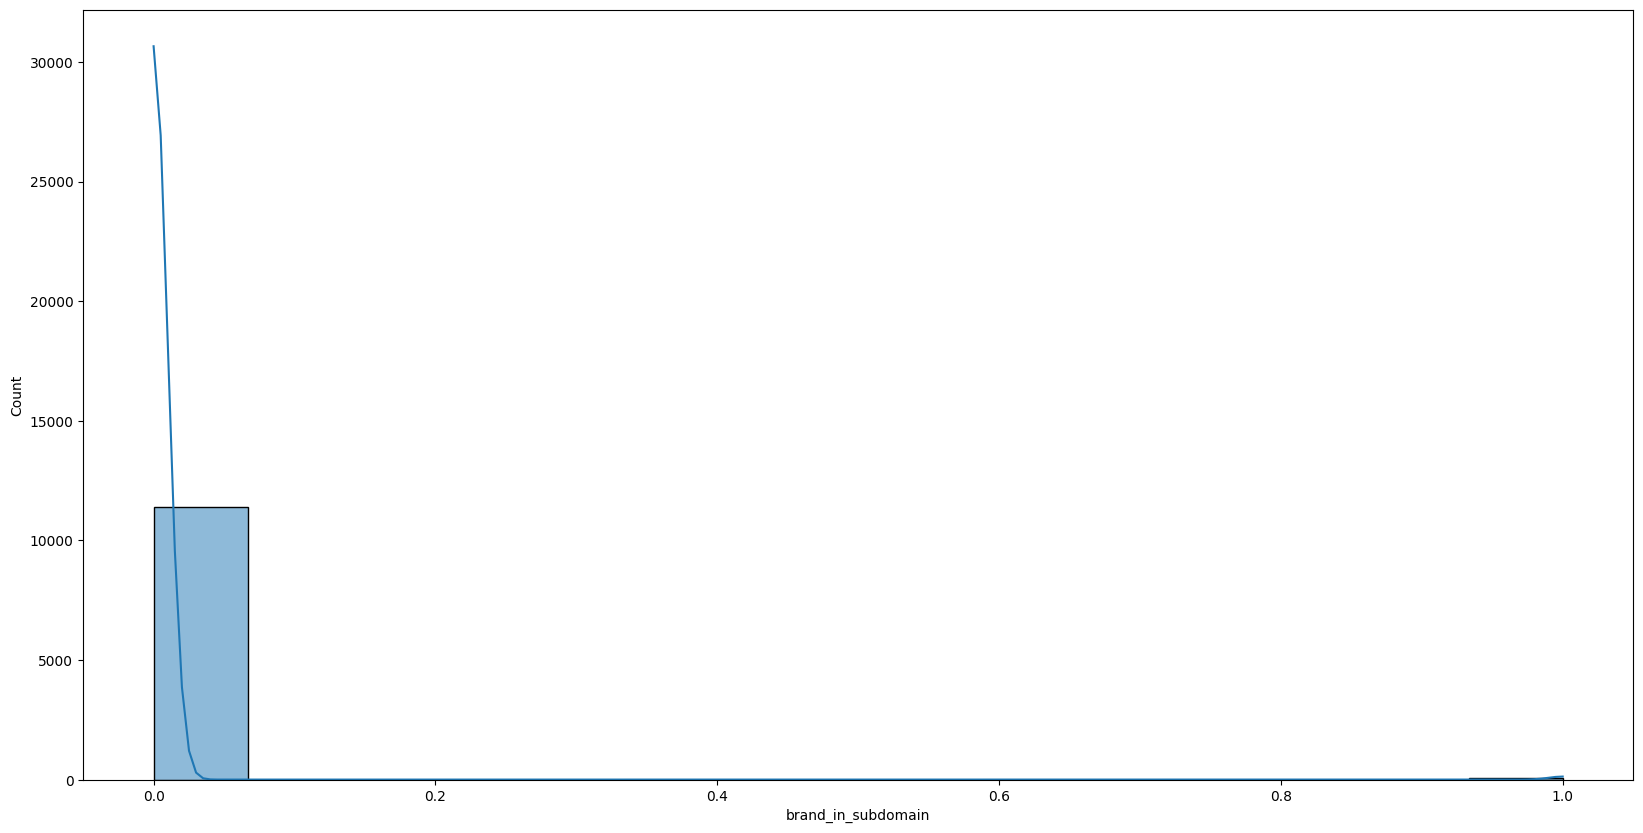

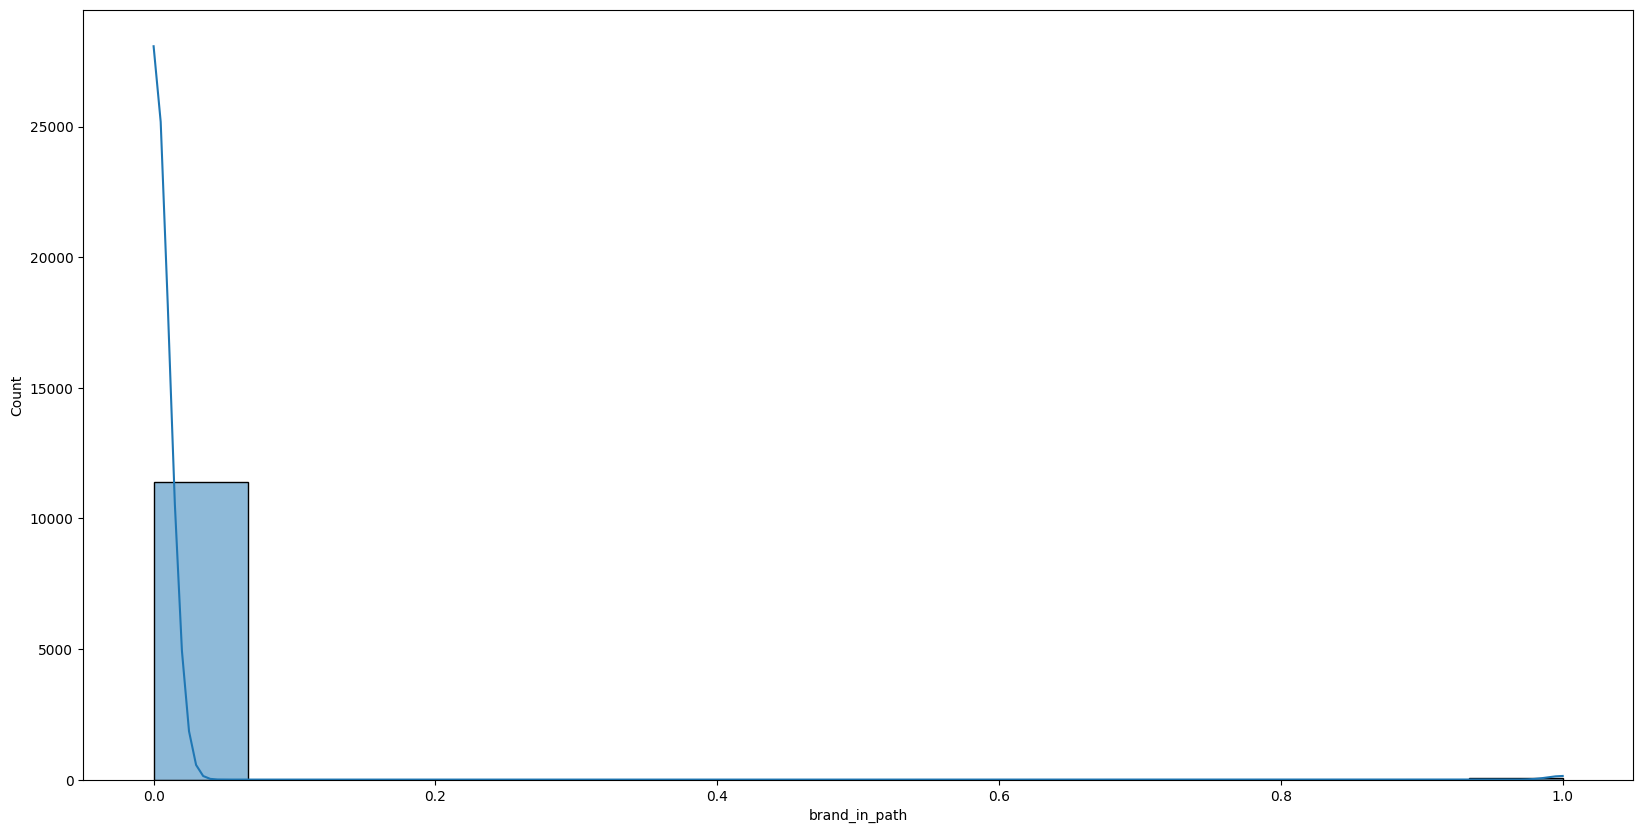

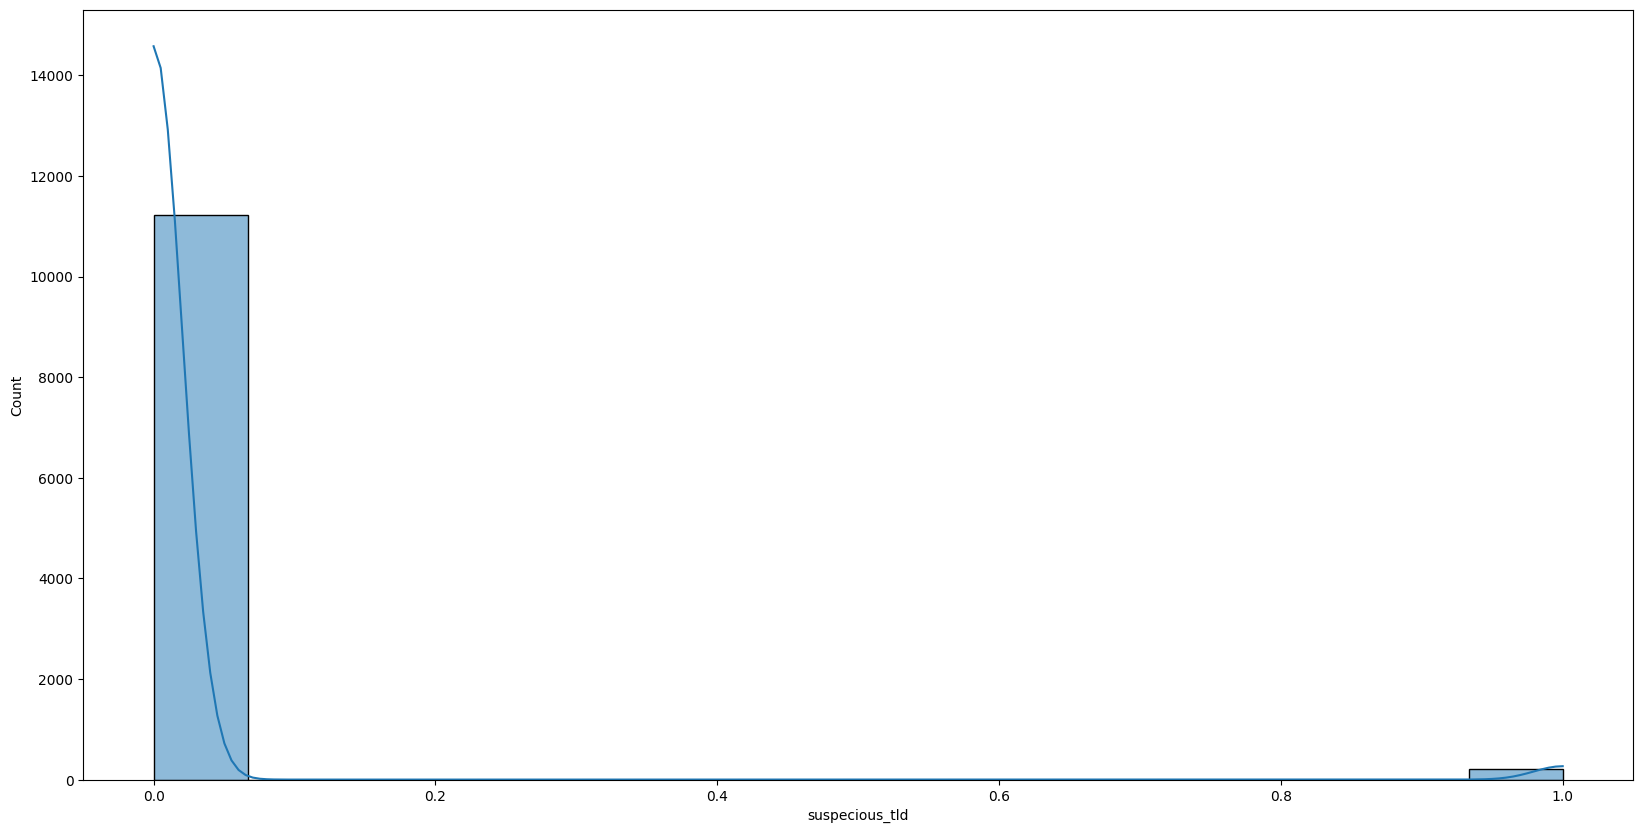

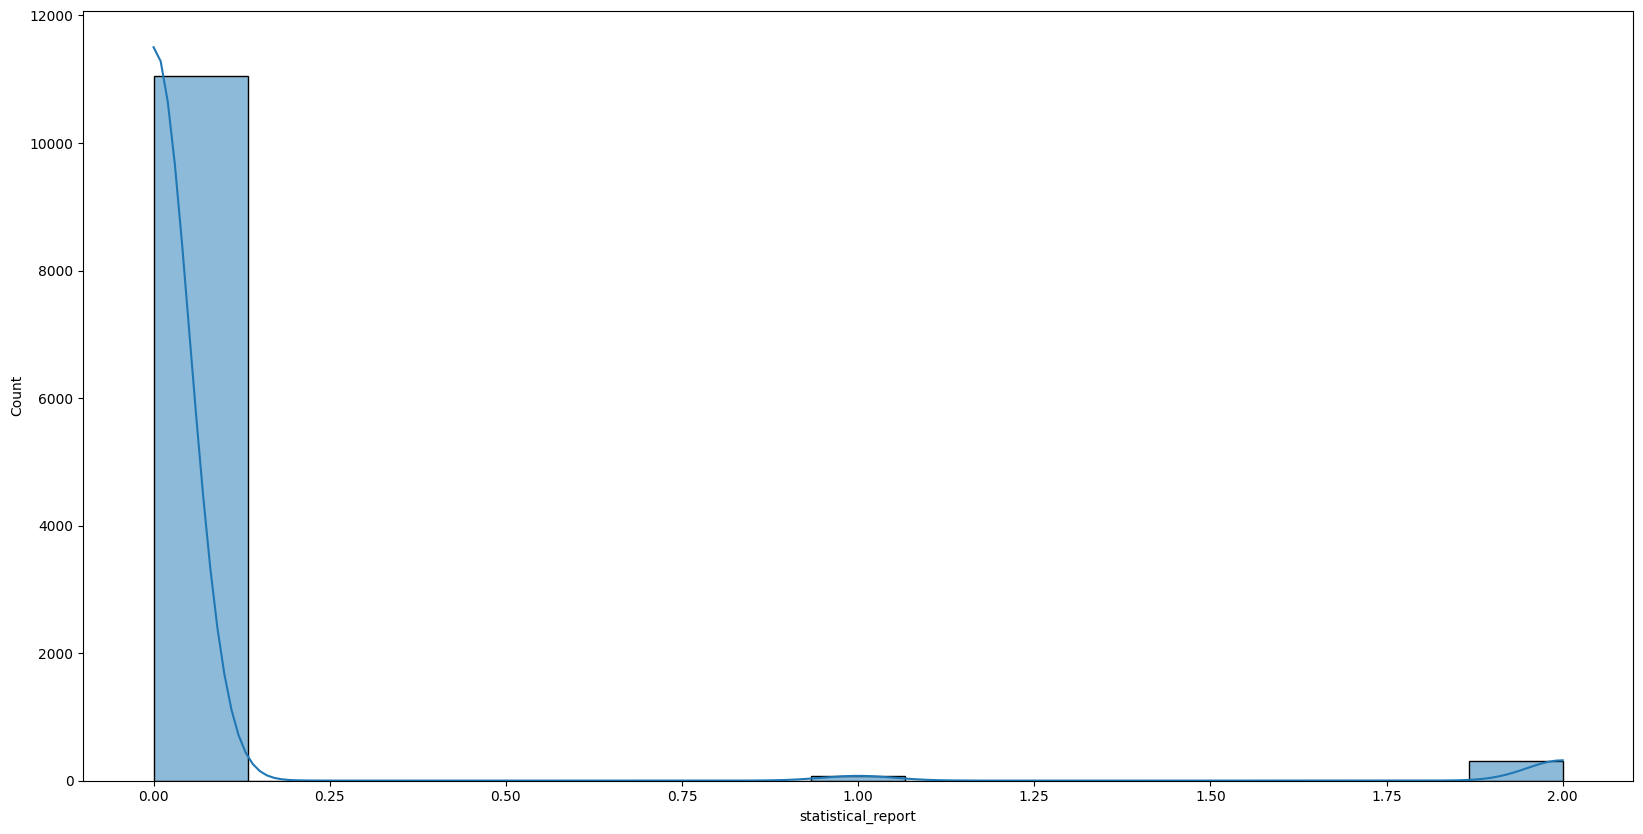

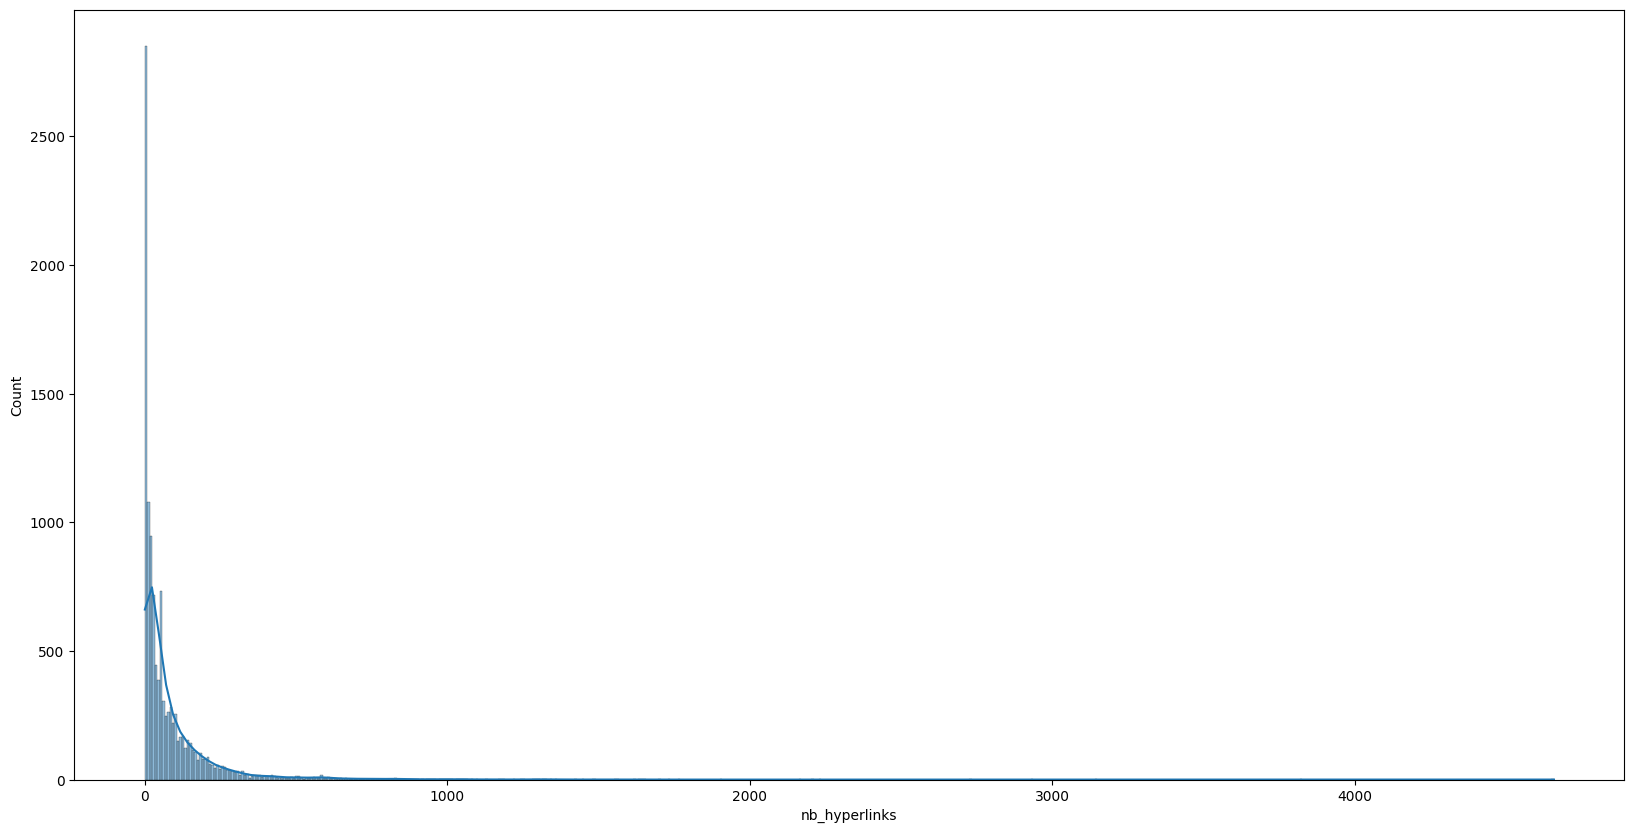

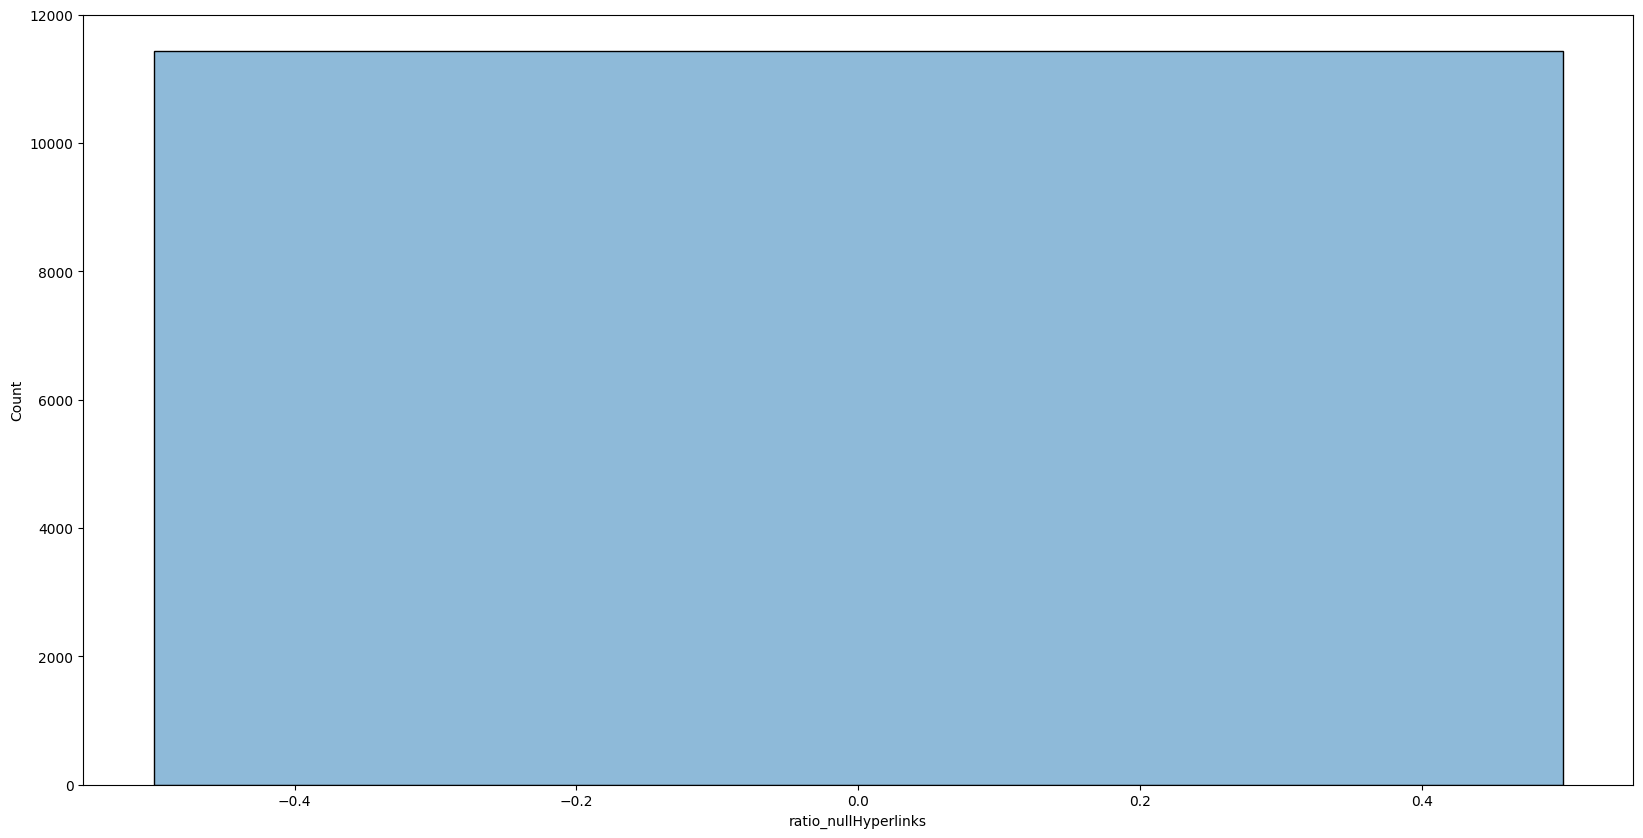

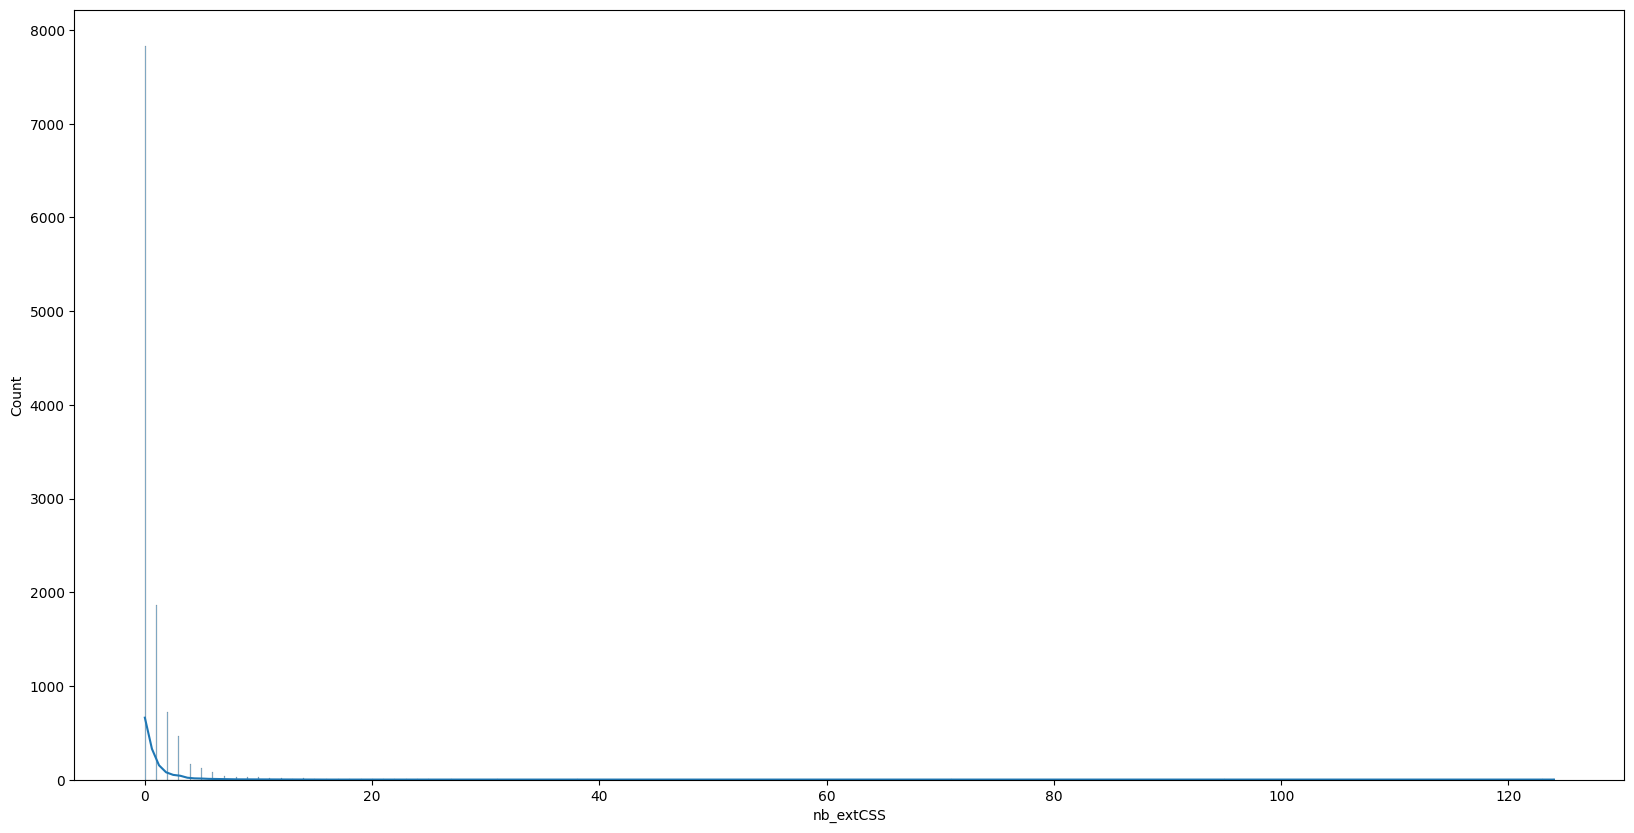

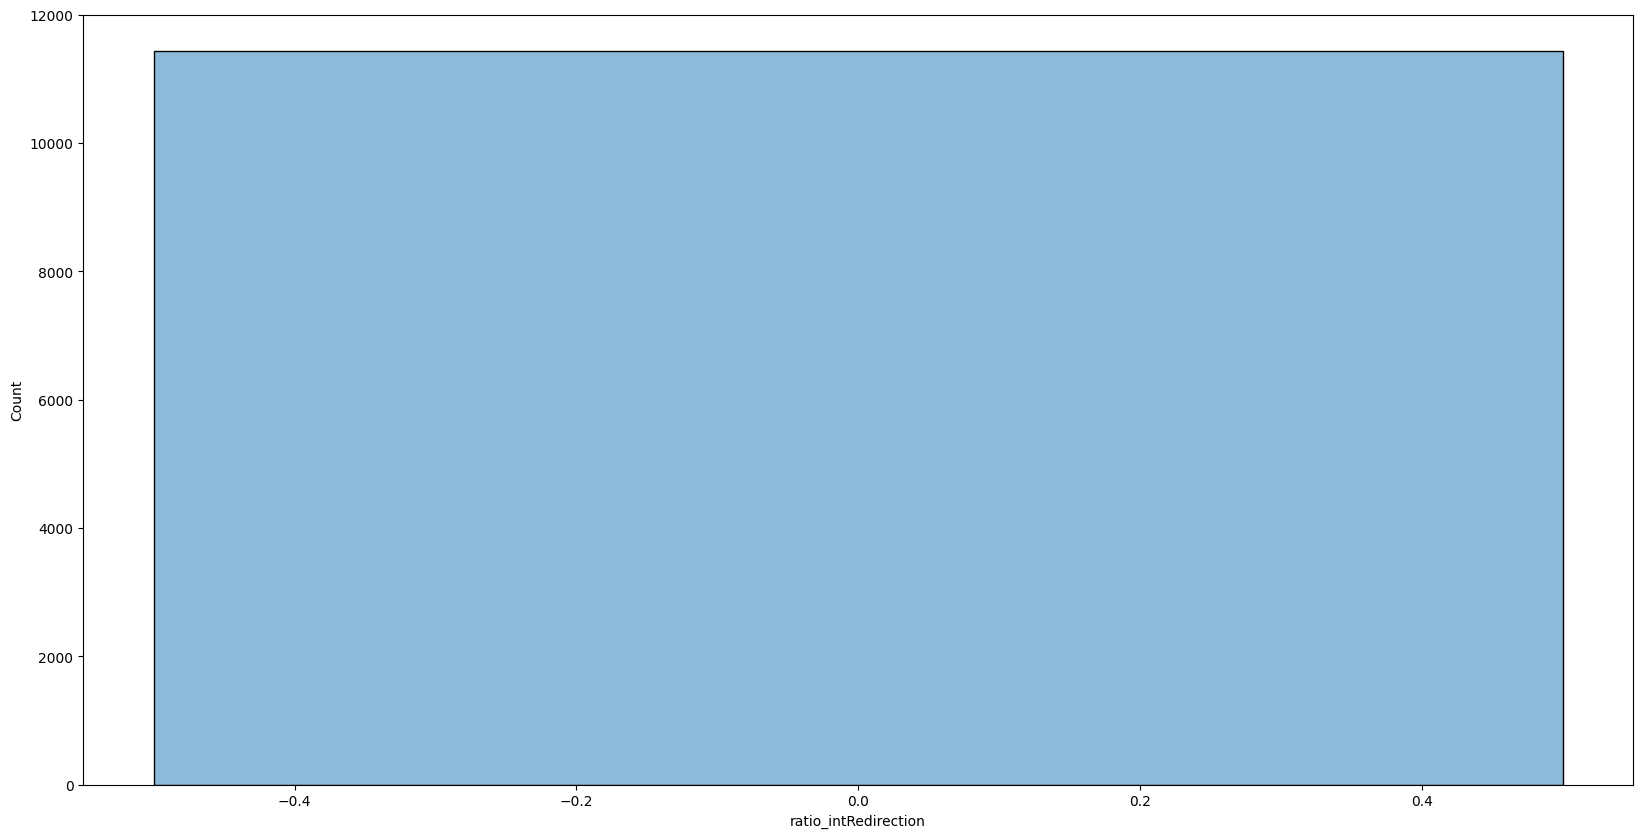

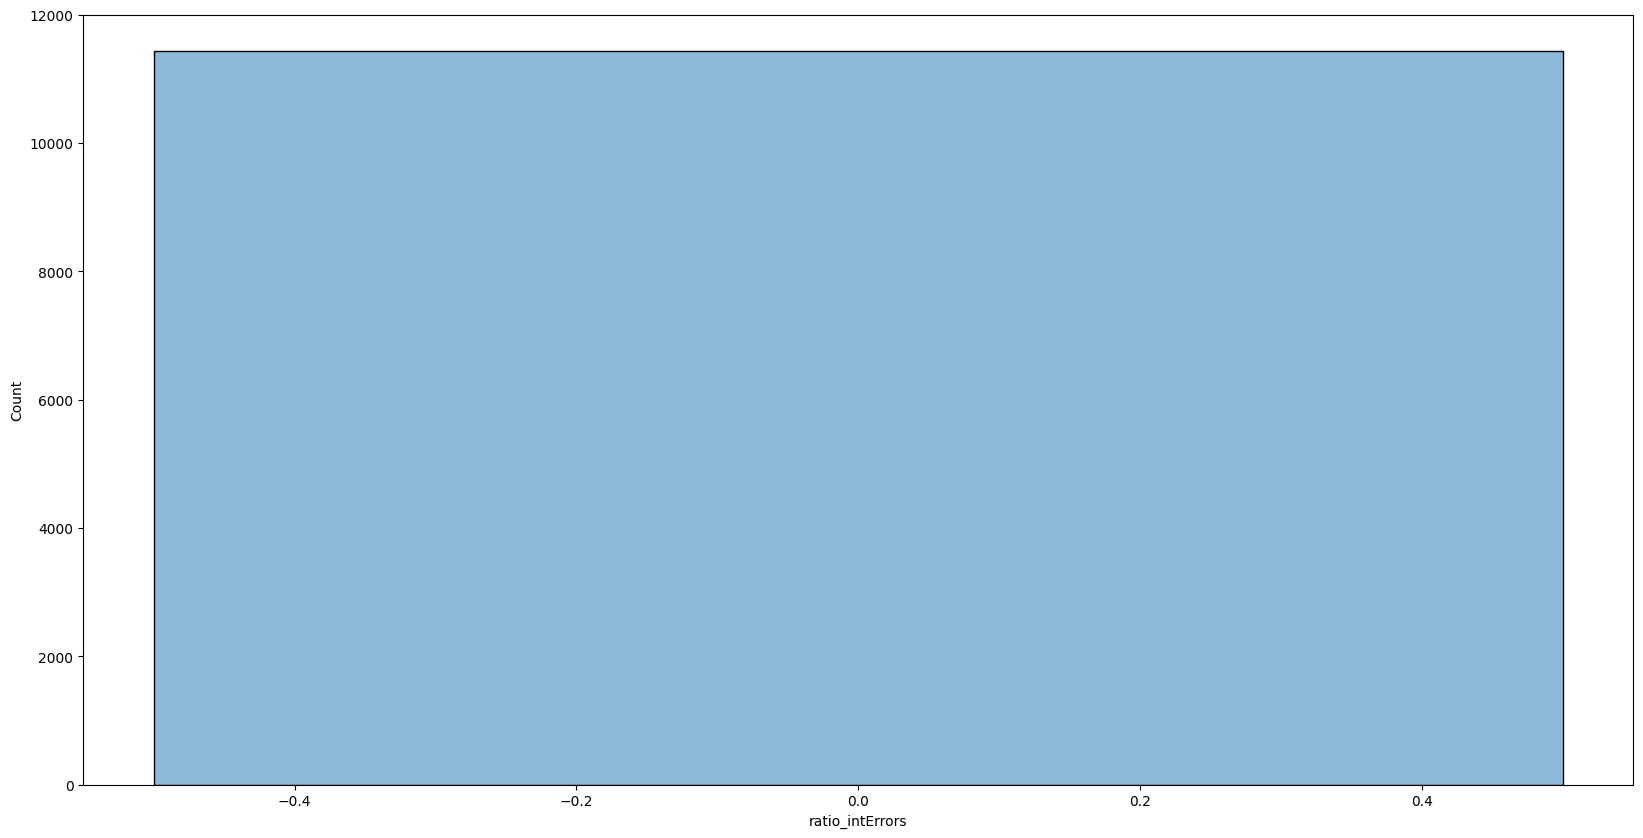

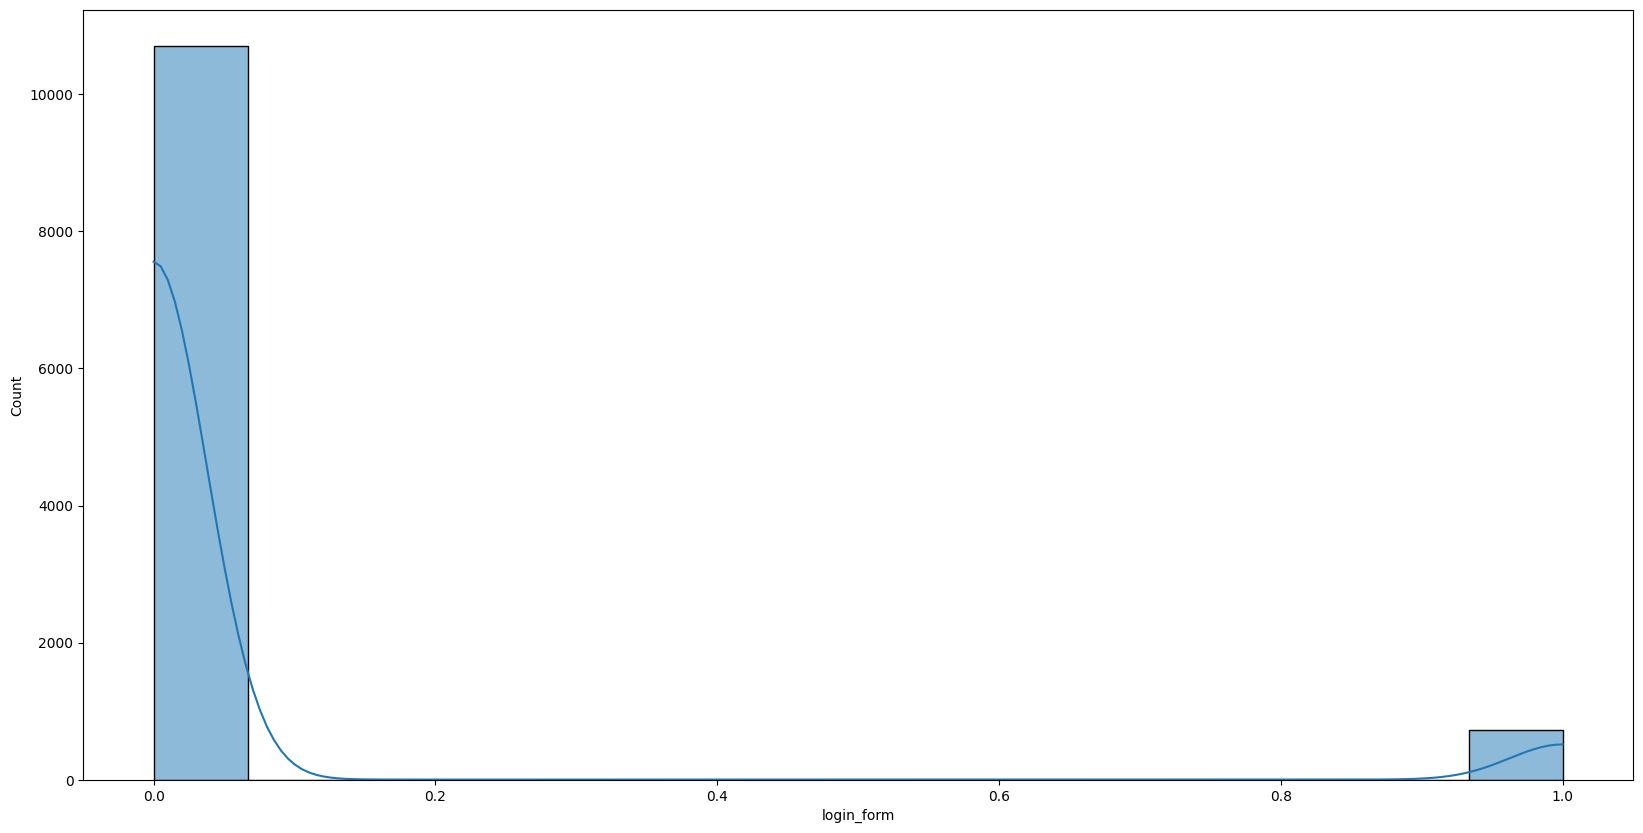

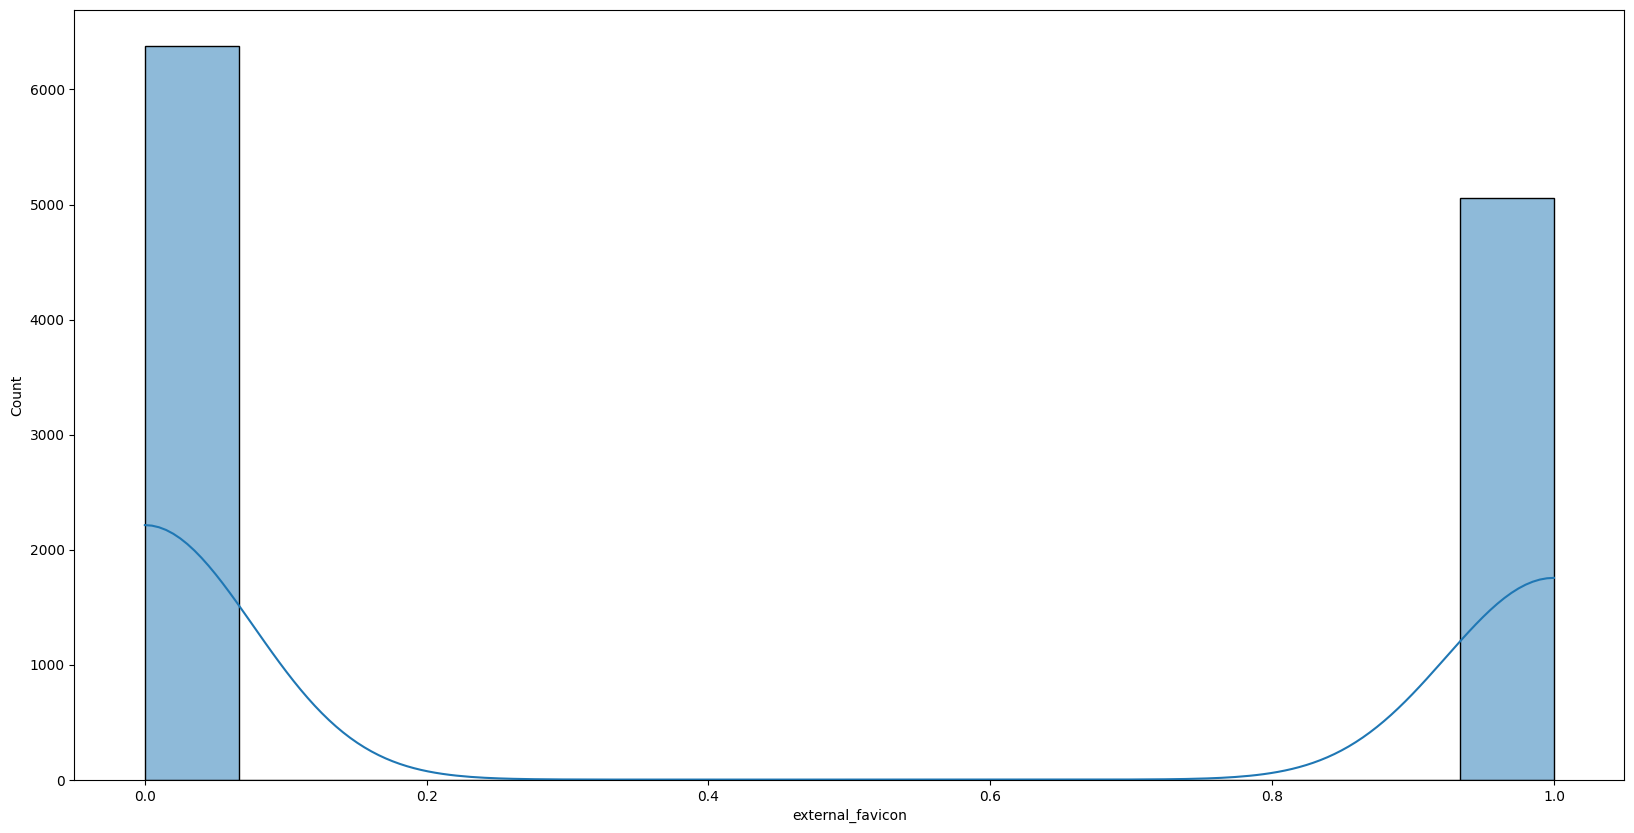

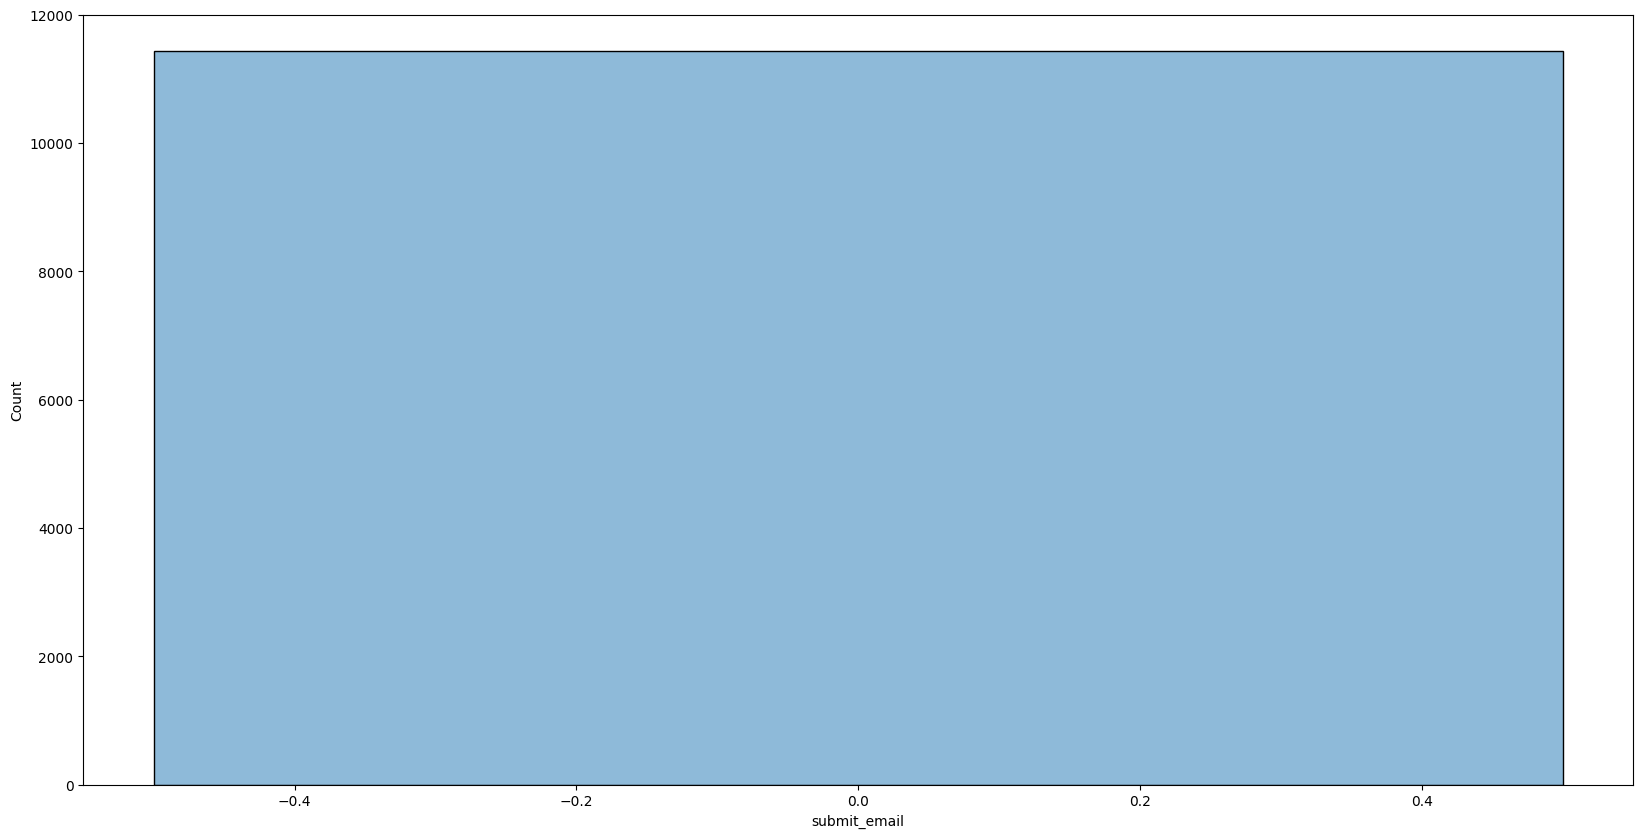

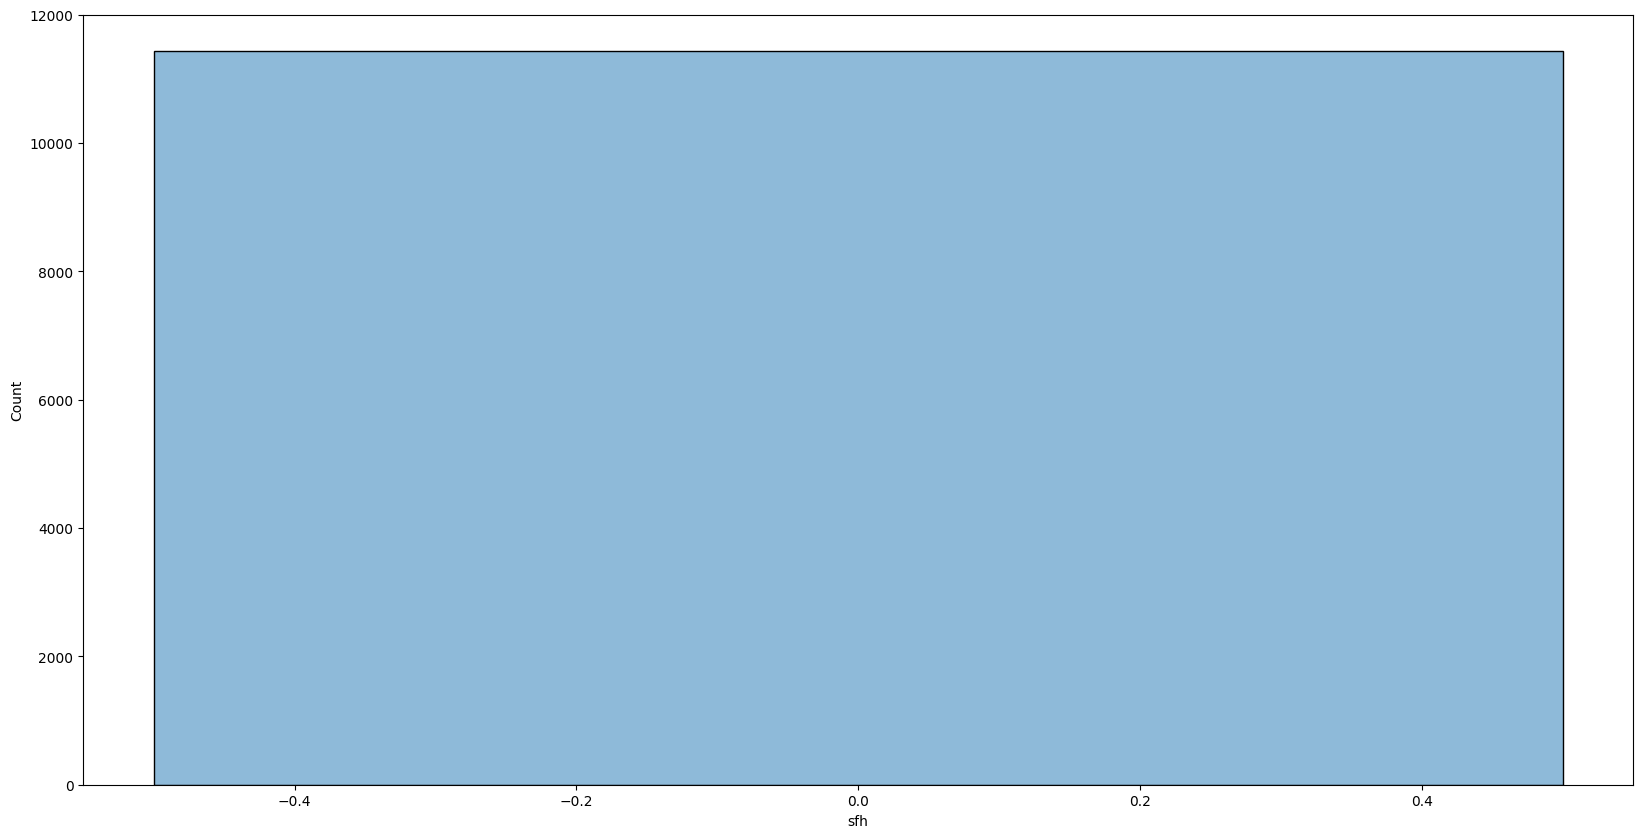

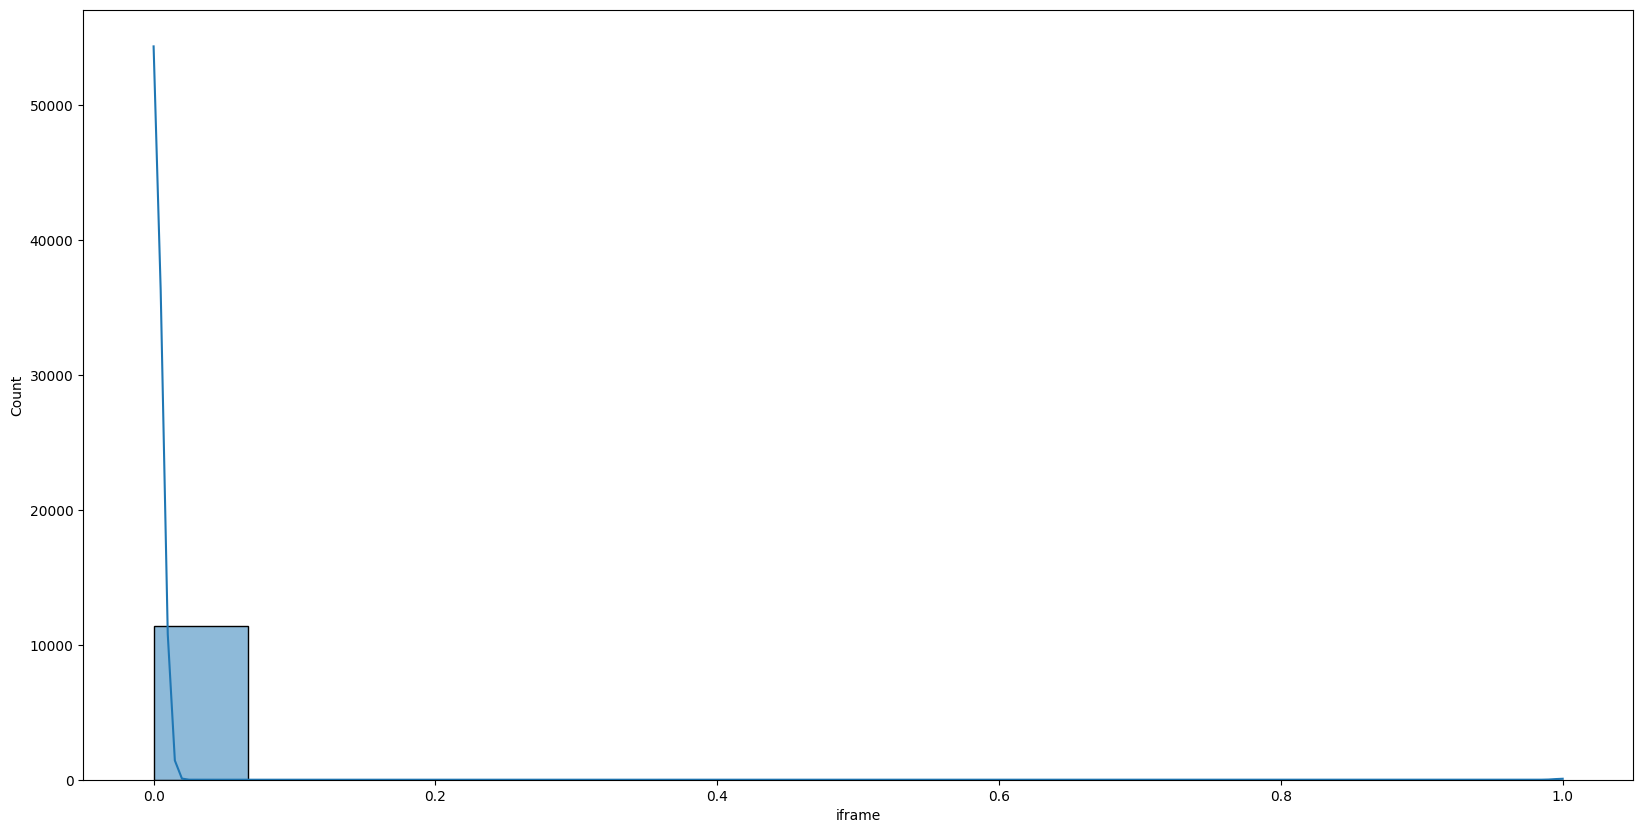

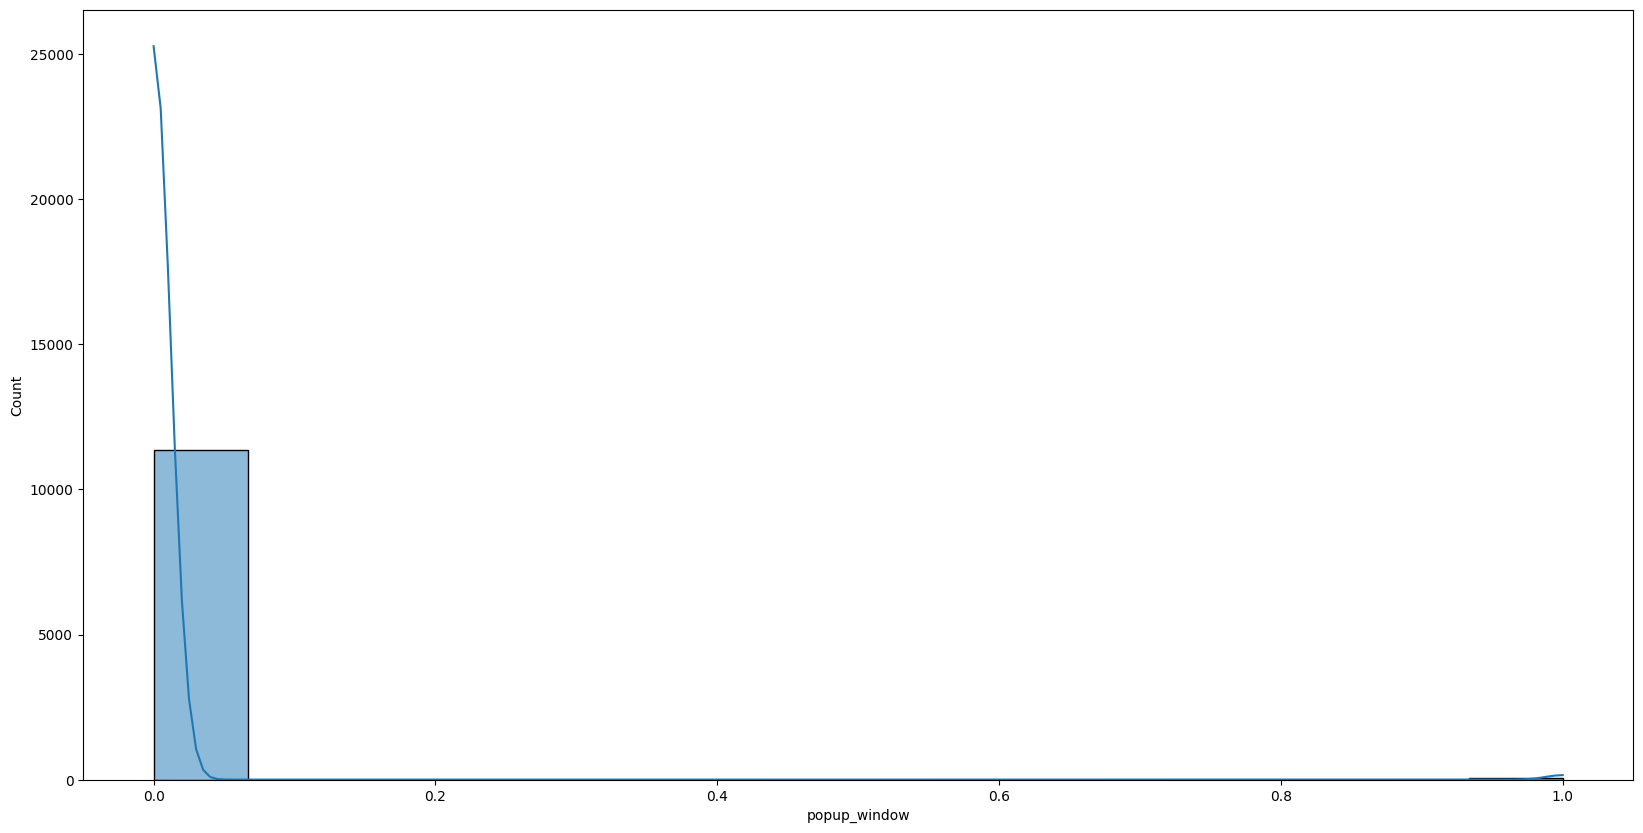

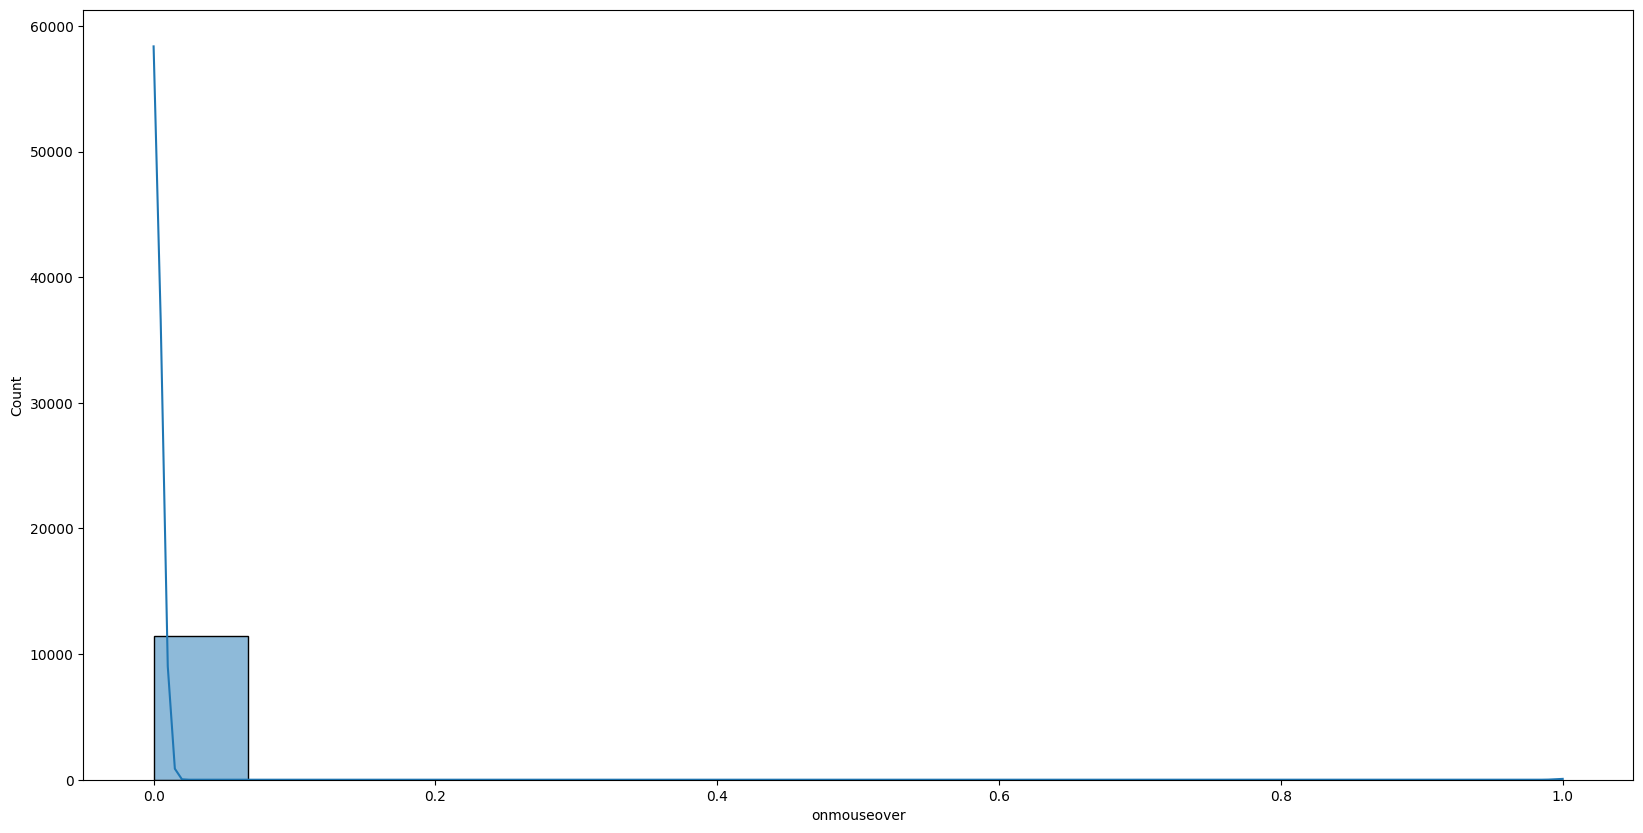

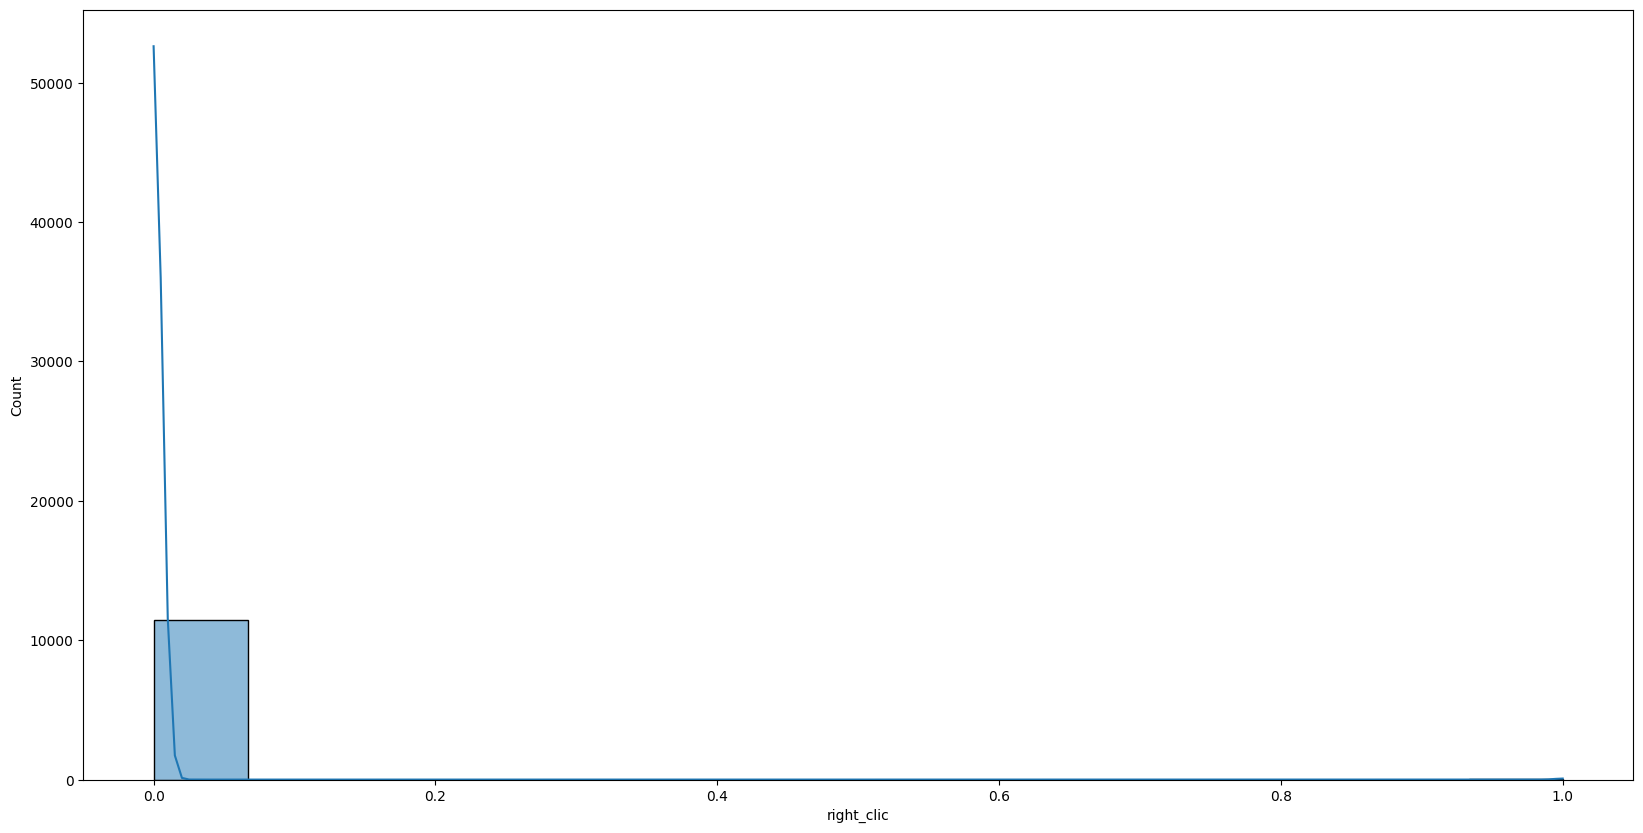

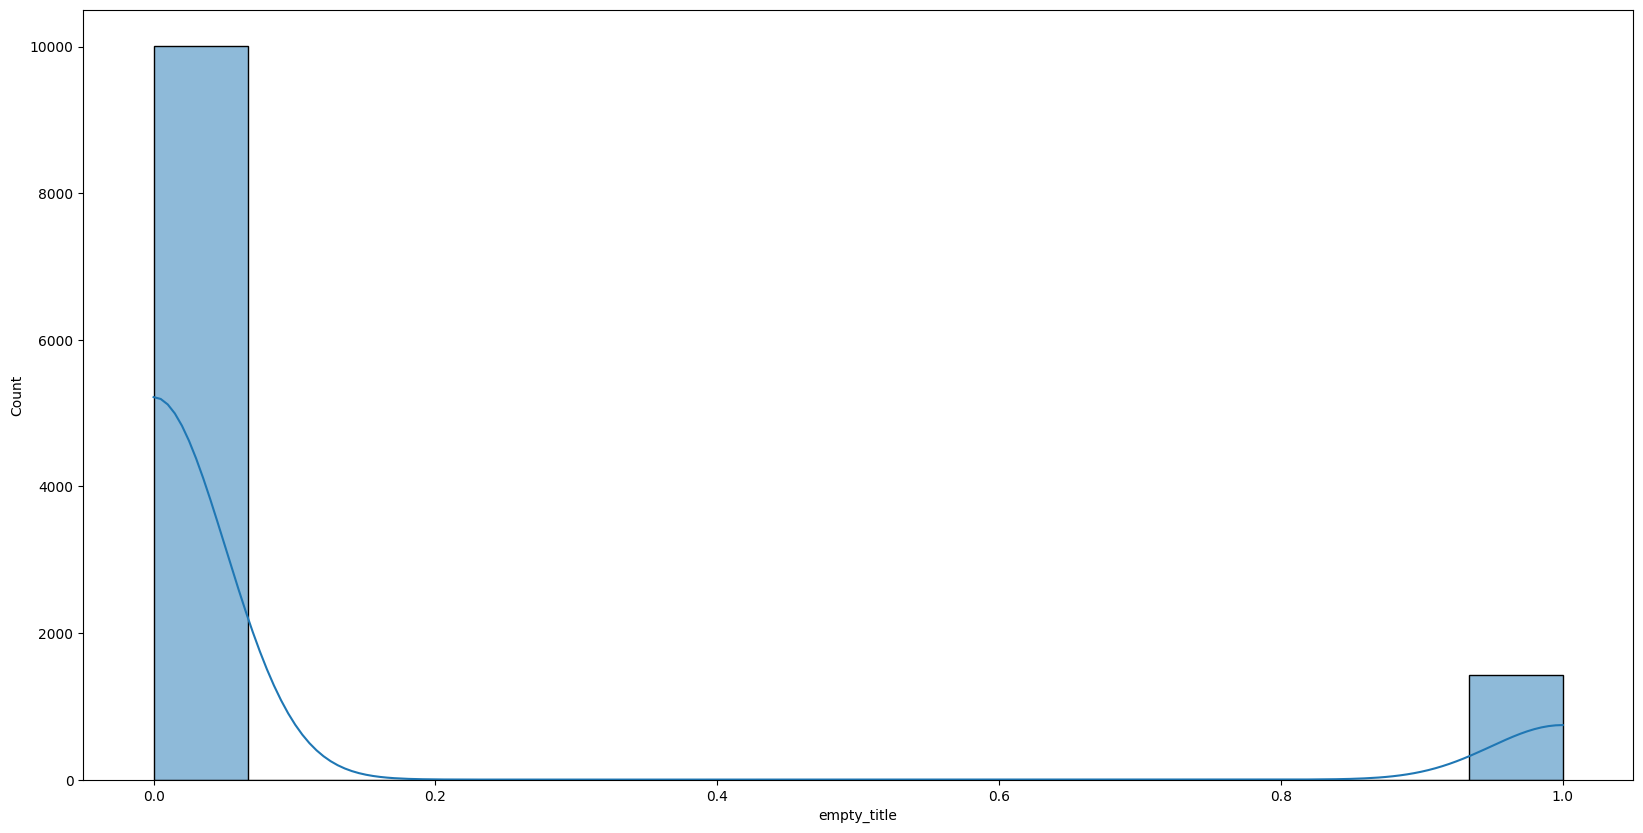

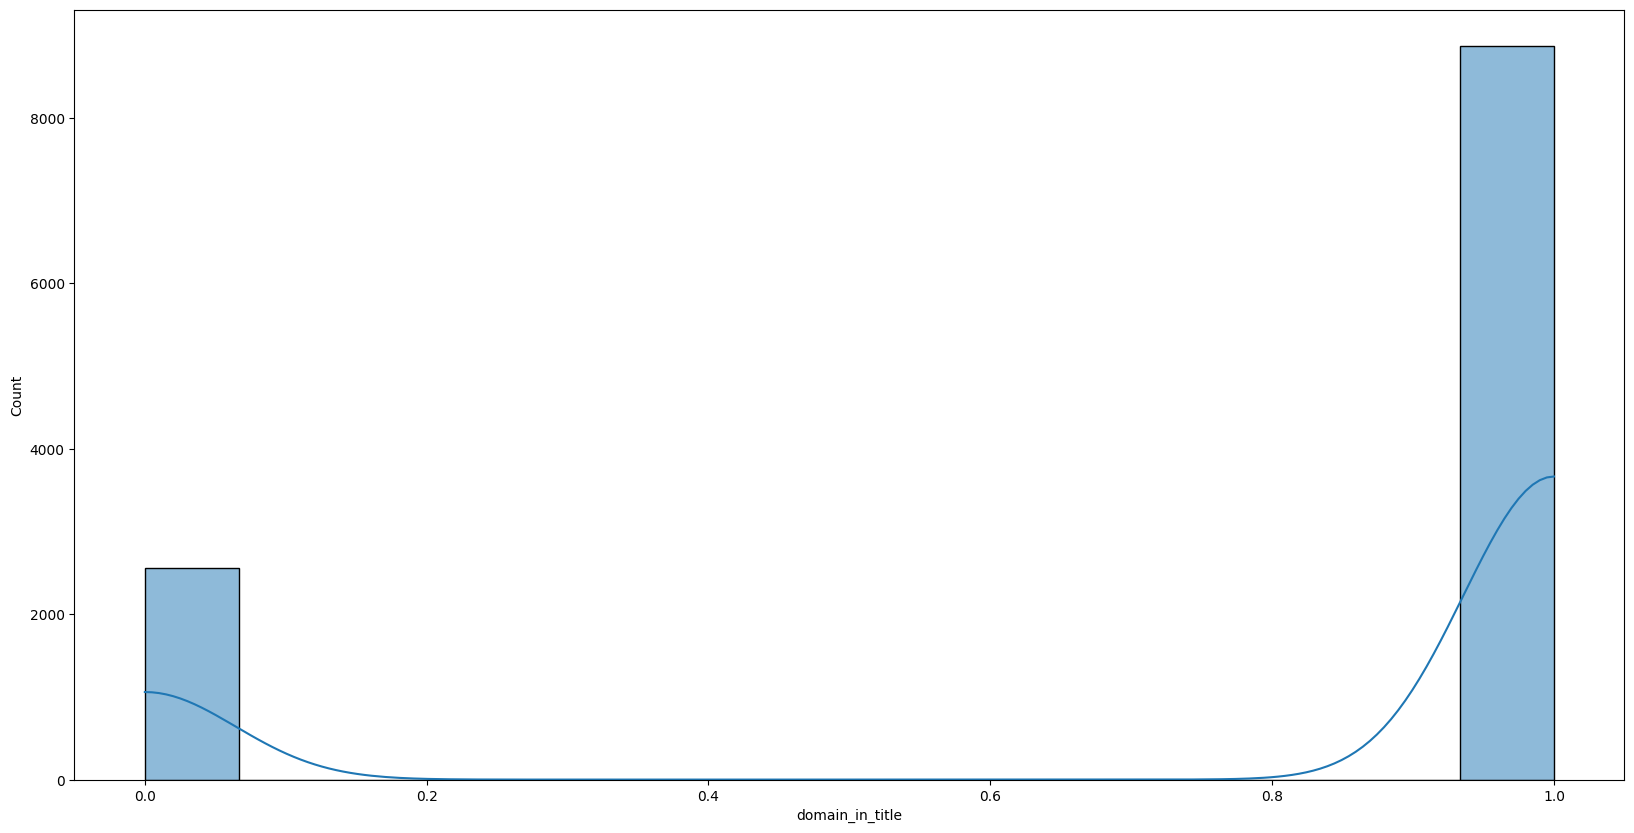

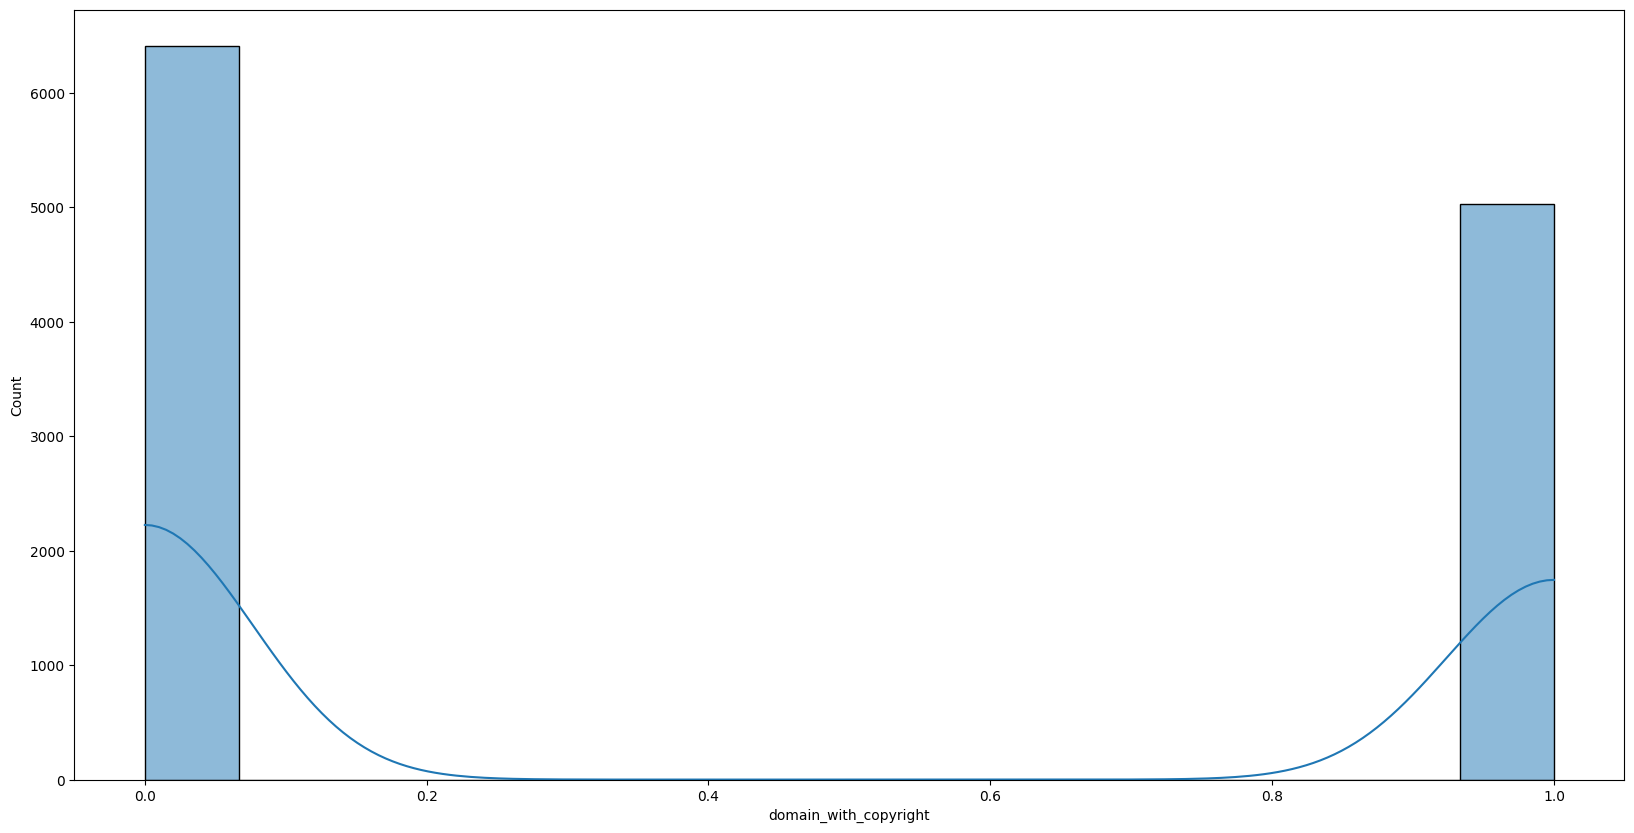

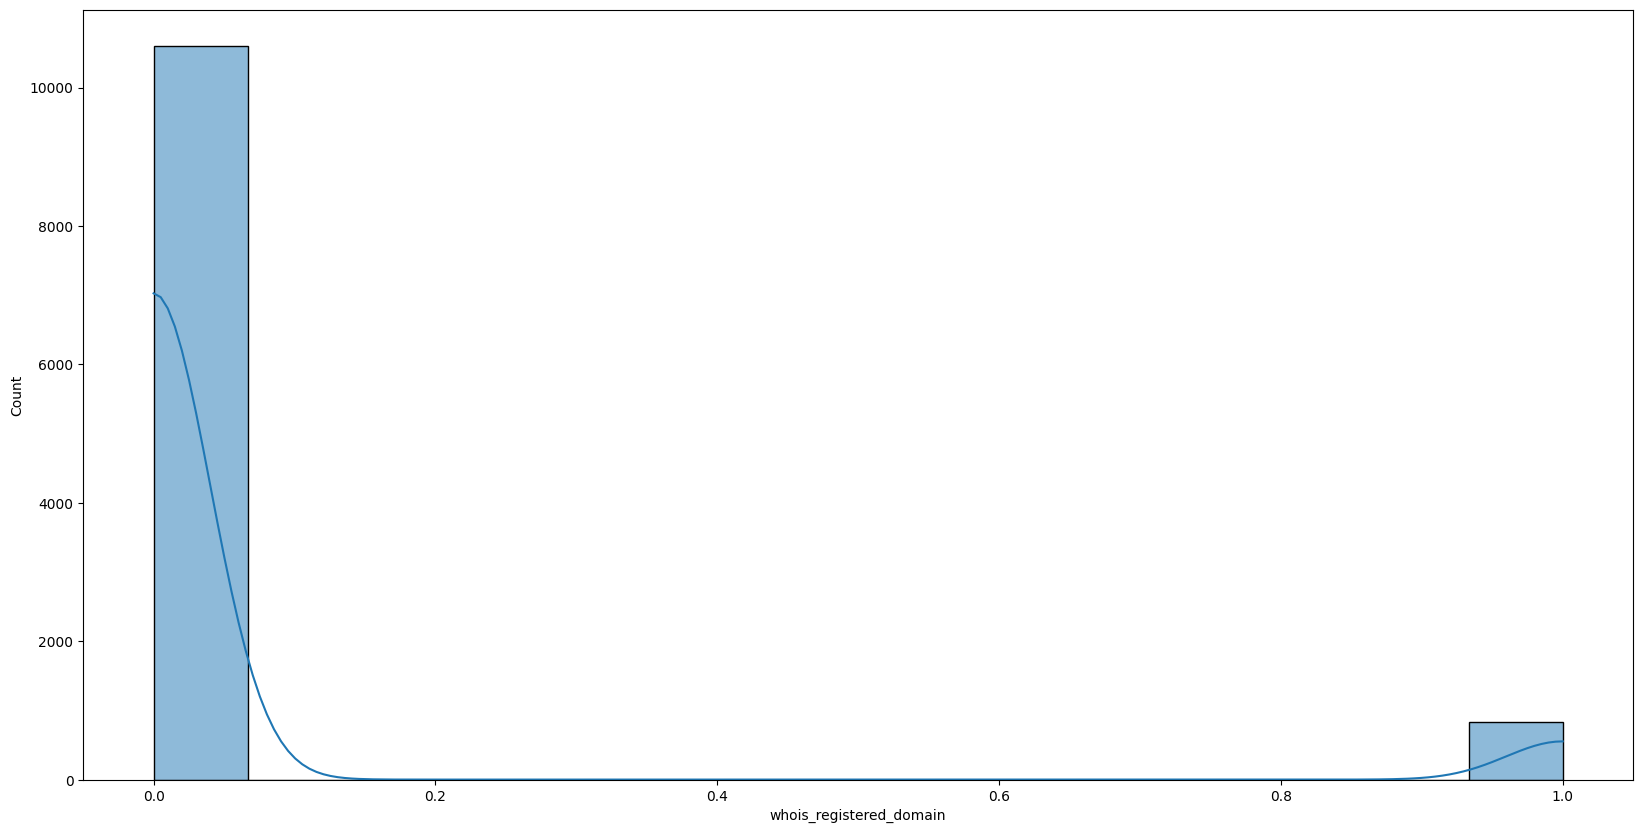

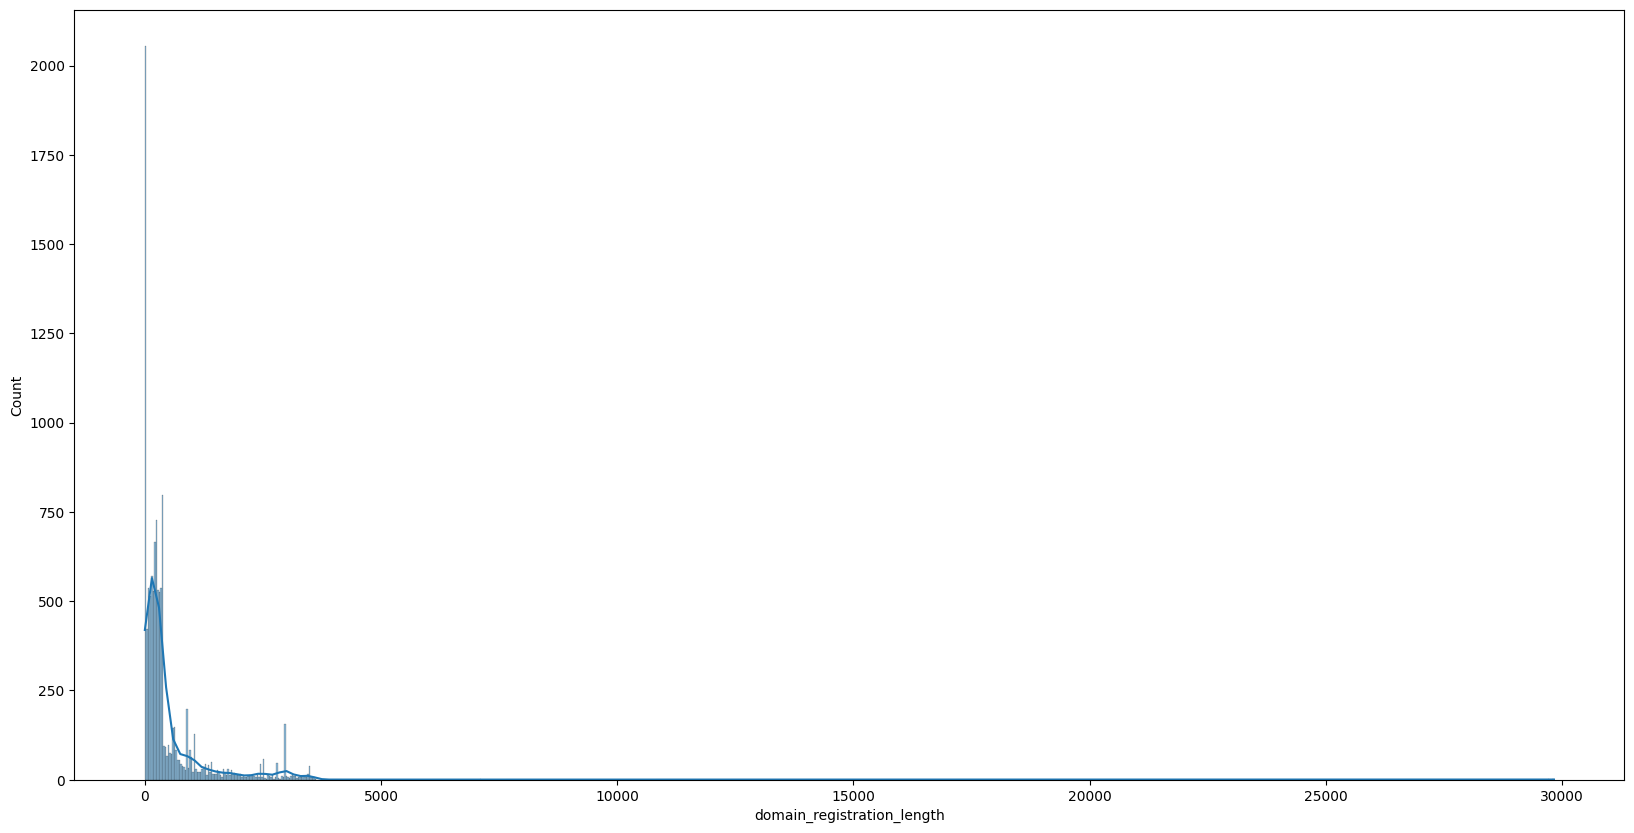

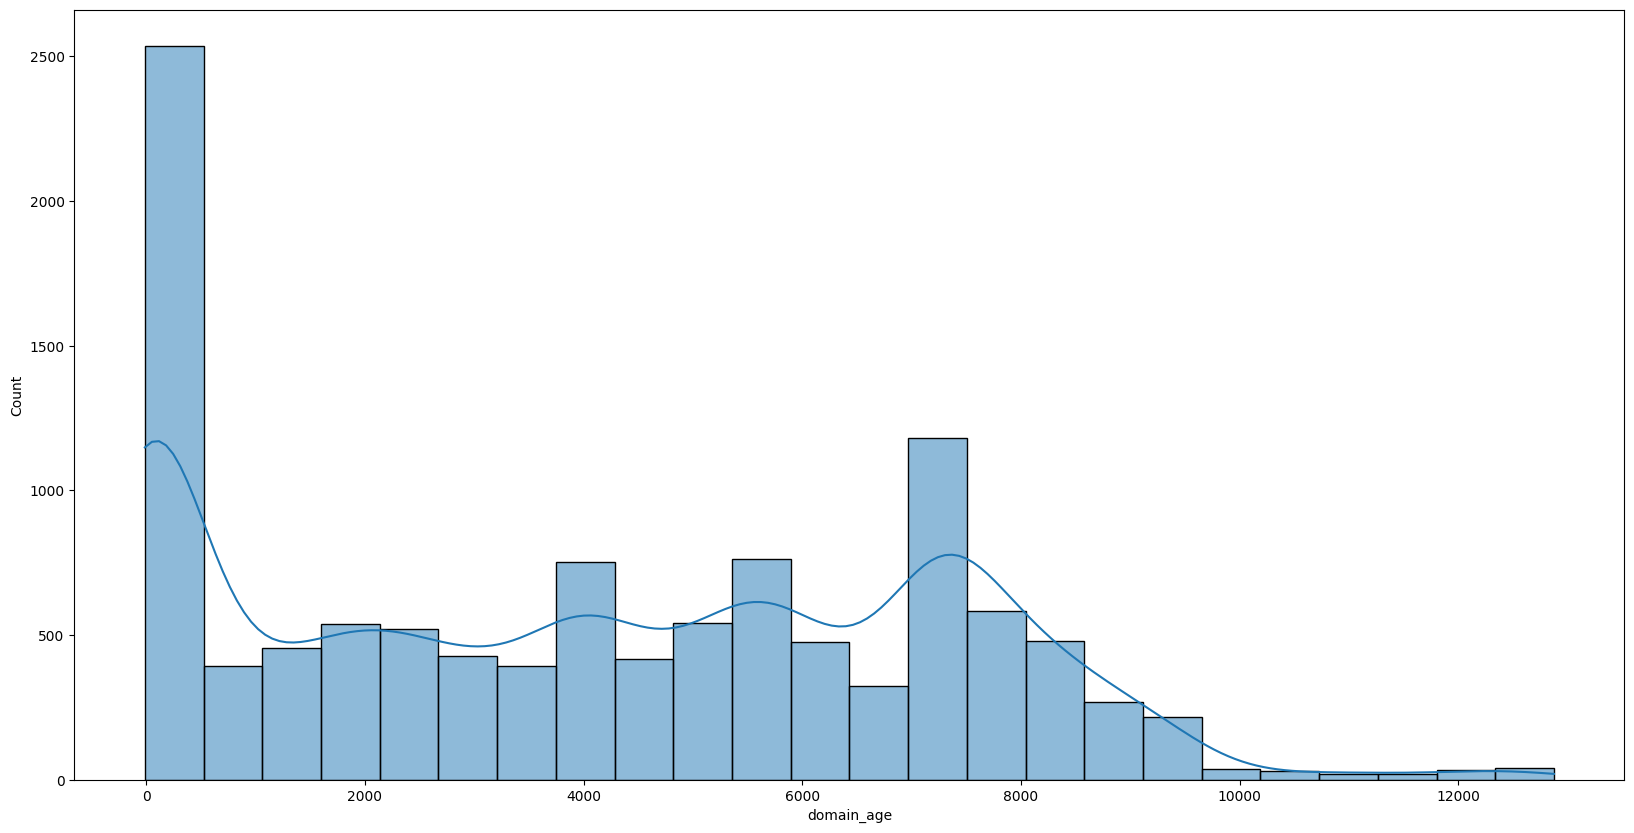

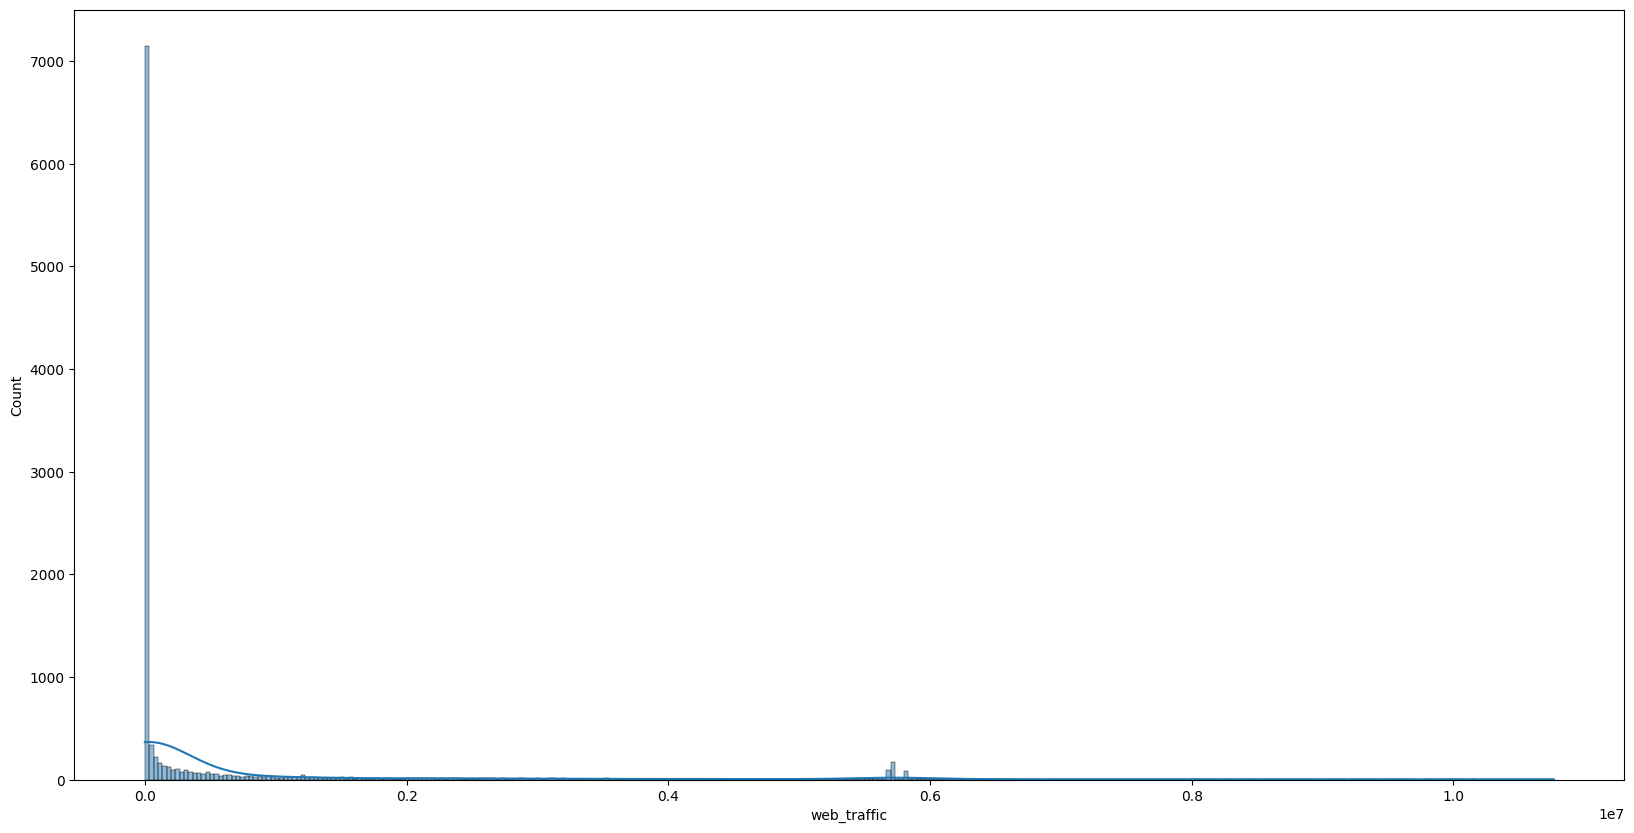

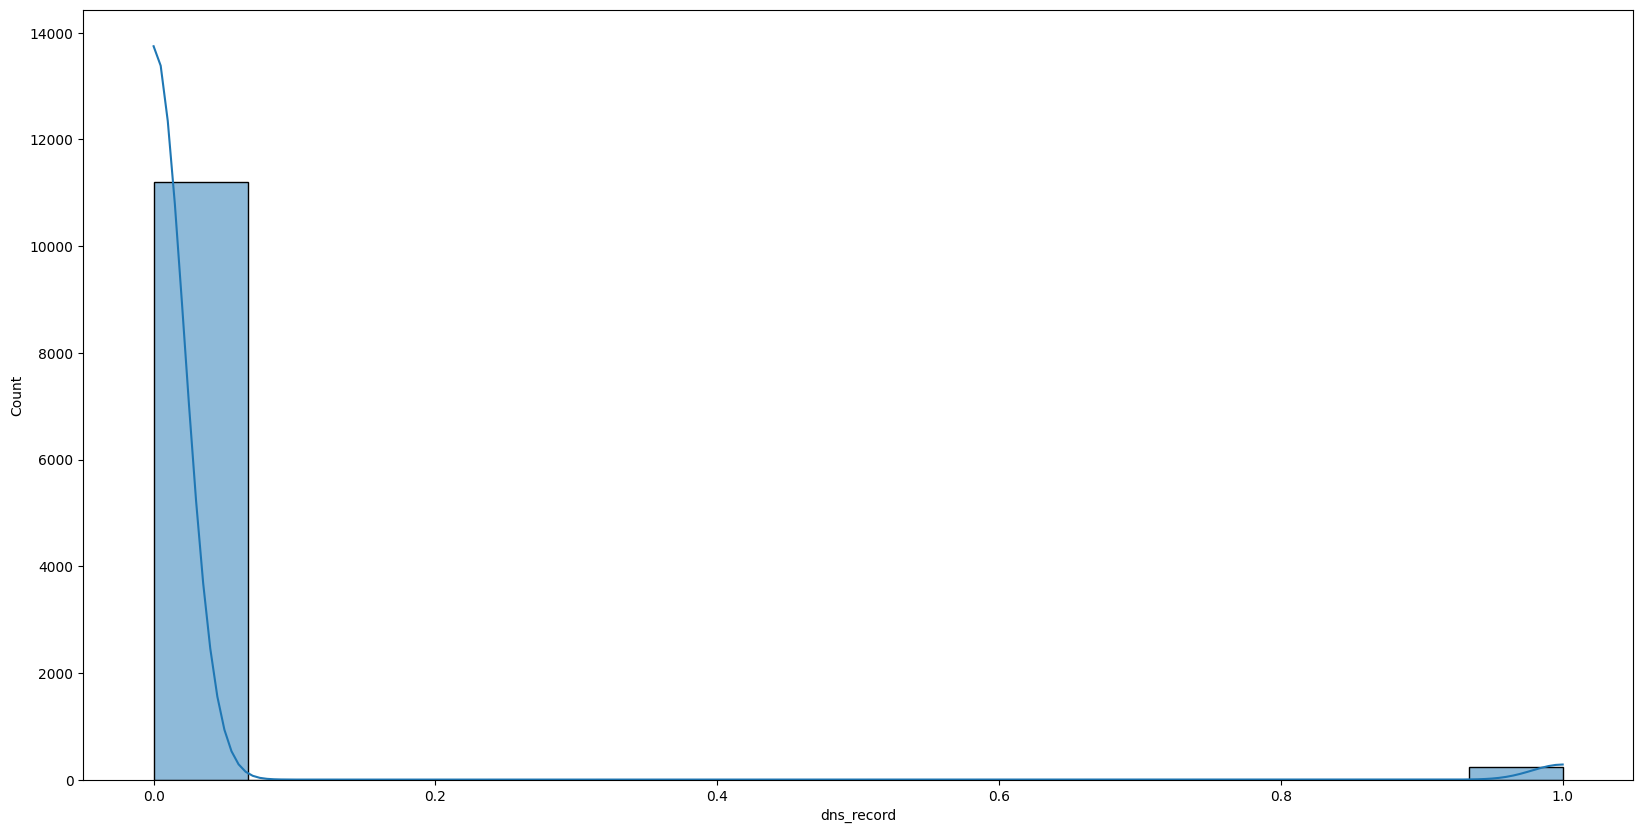

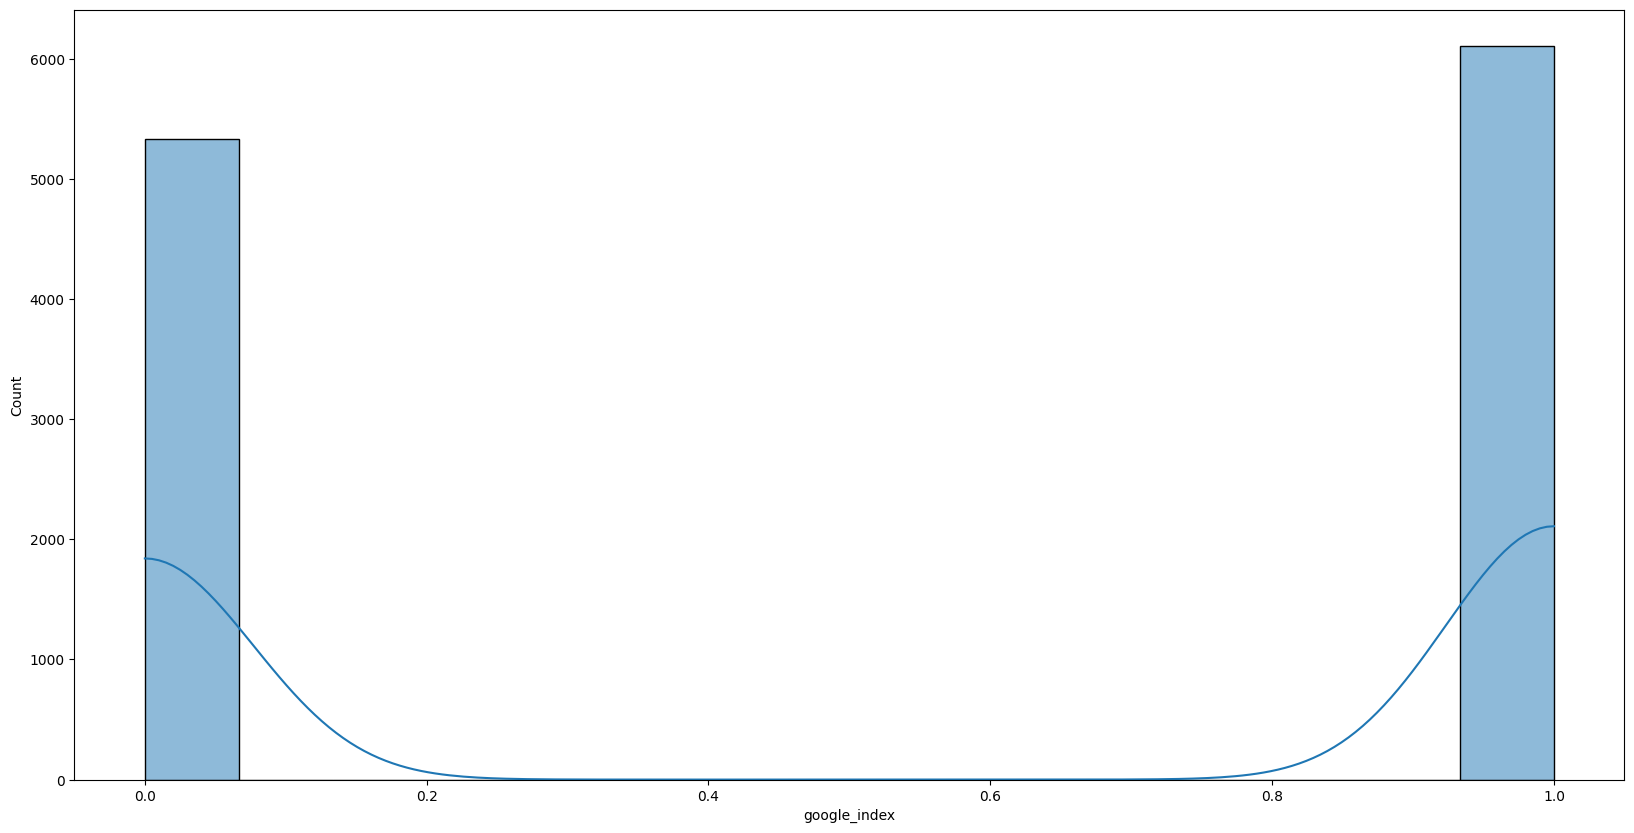

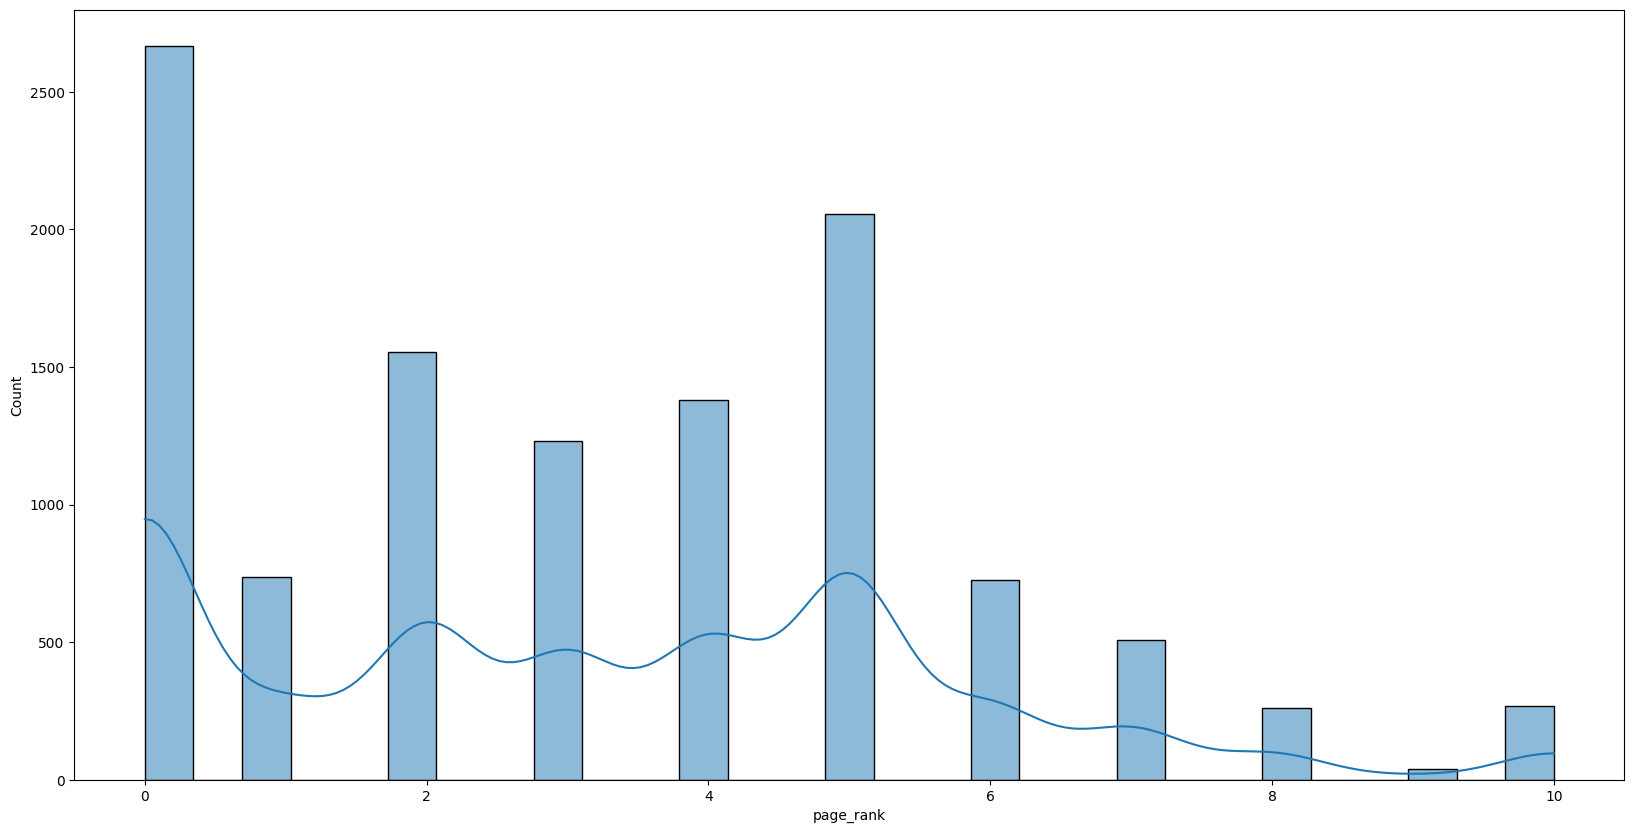

In [49]:
for col in df.select_dtypes("int64"):
    plt.figure(figsize=(20,10))
    sns.histplot(df[col],kde=True)

that is mean the variable page_rank has brobaly 1500 value equale to 4

In [57]:
df["page_rank"][df["page_rank"]==4].value_counts()

4    1380
Name: page_rank, dtype: int64

histograms of continuous variables

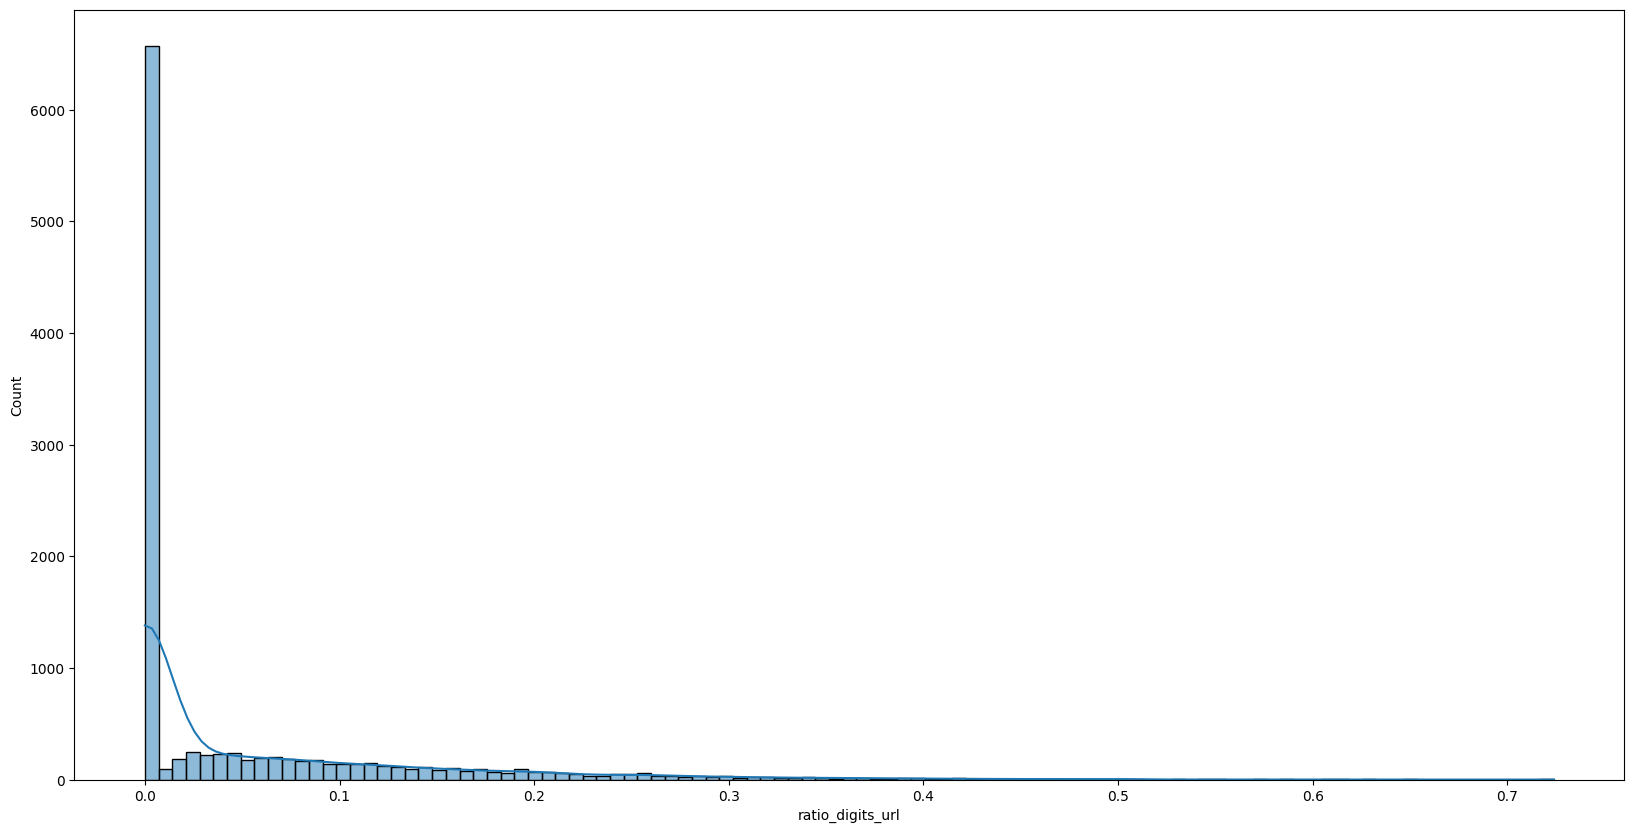

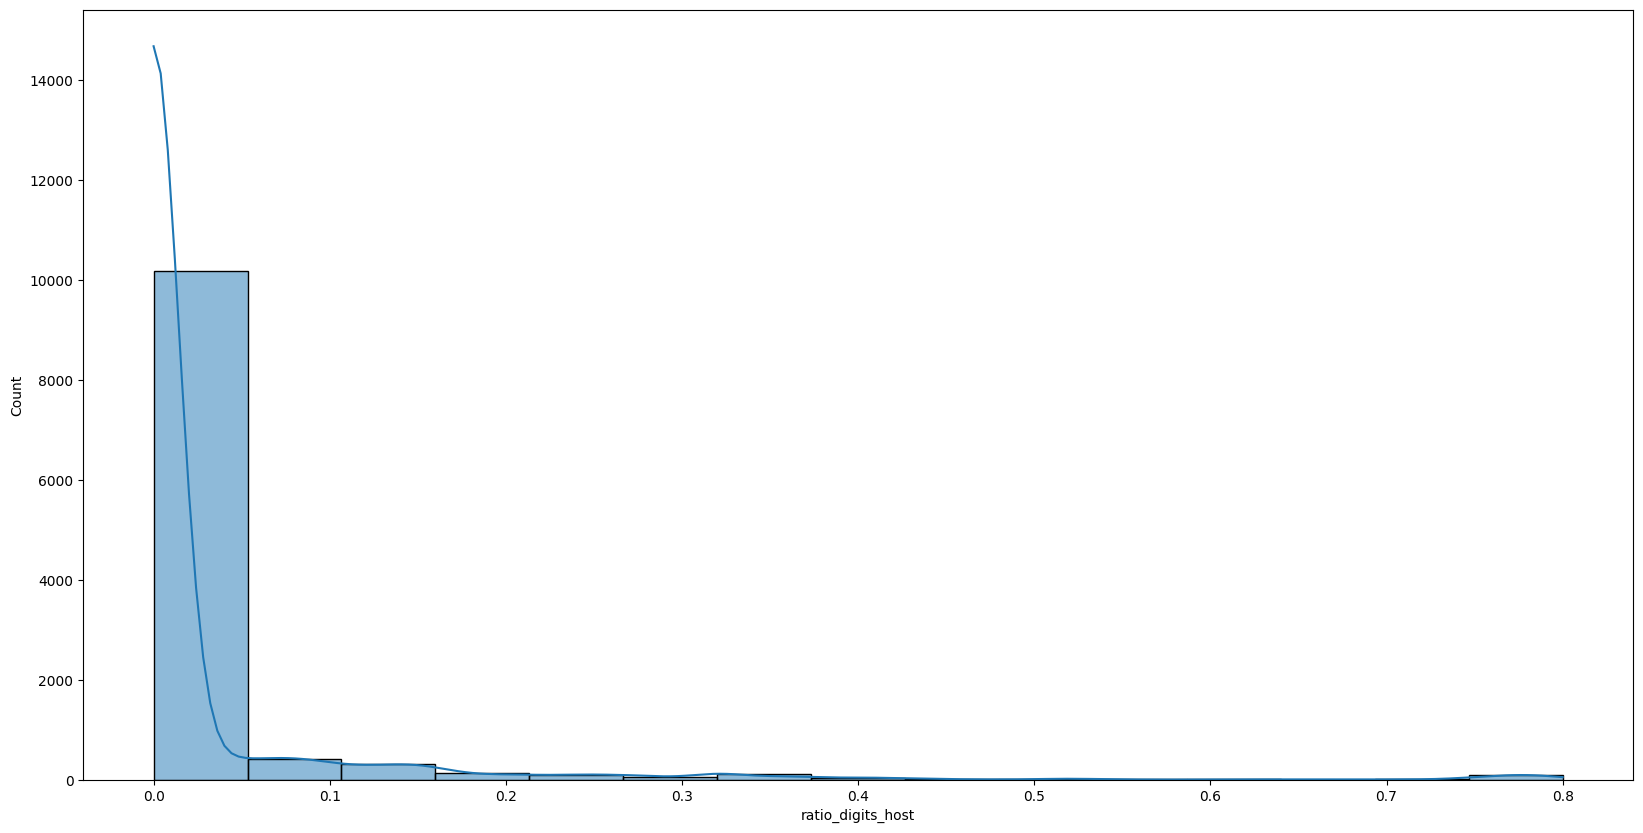

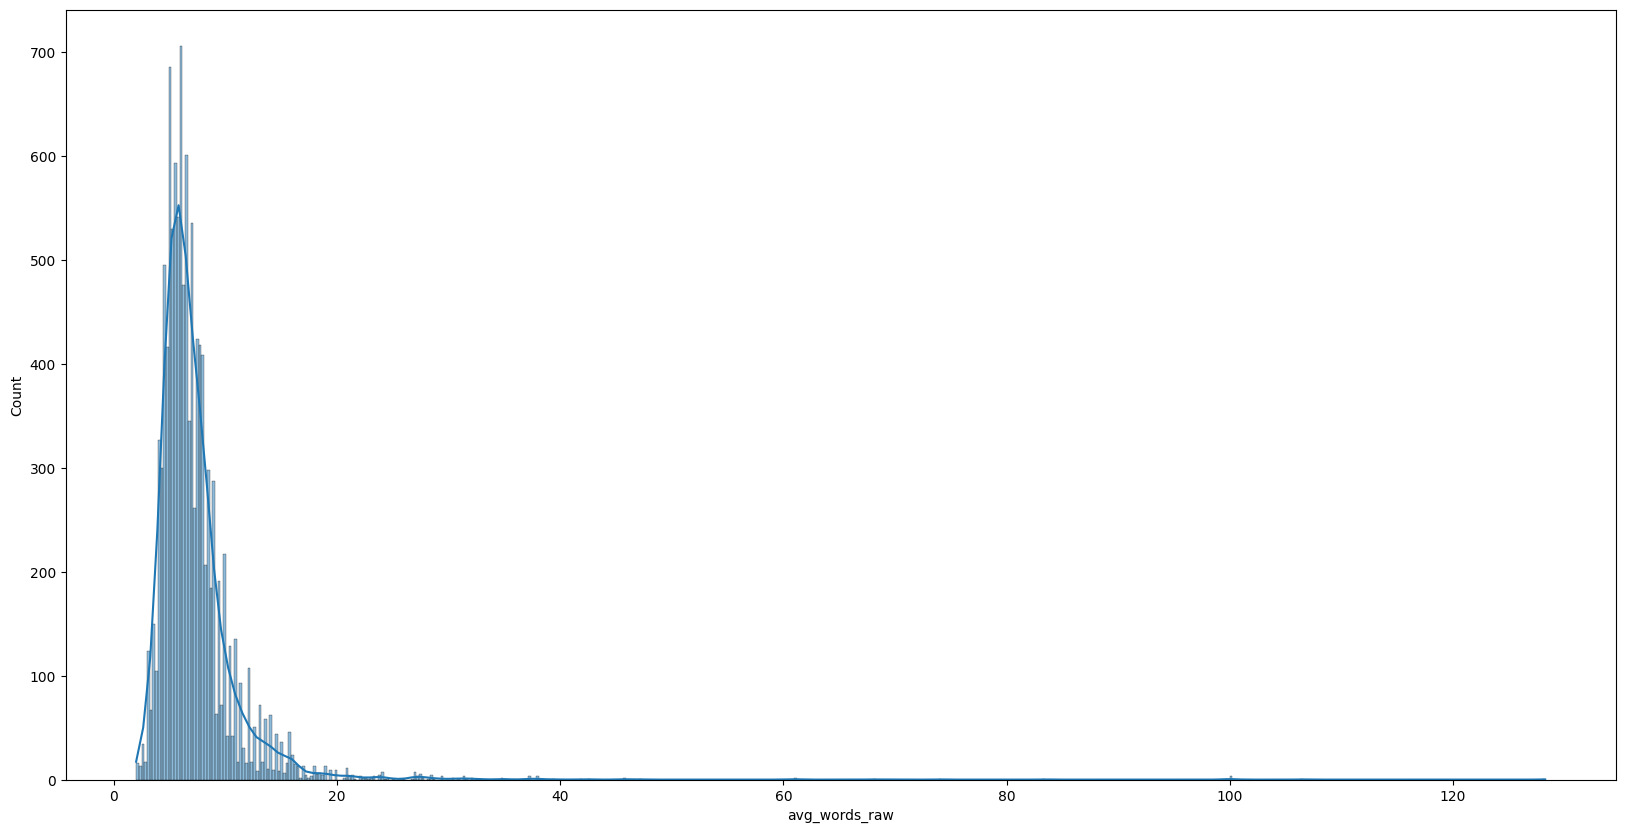

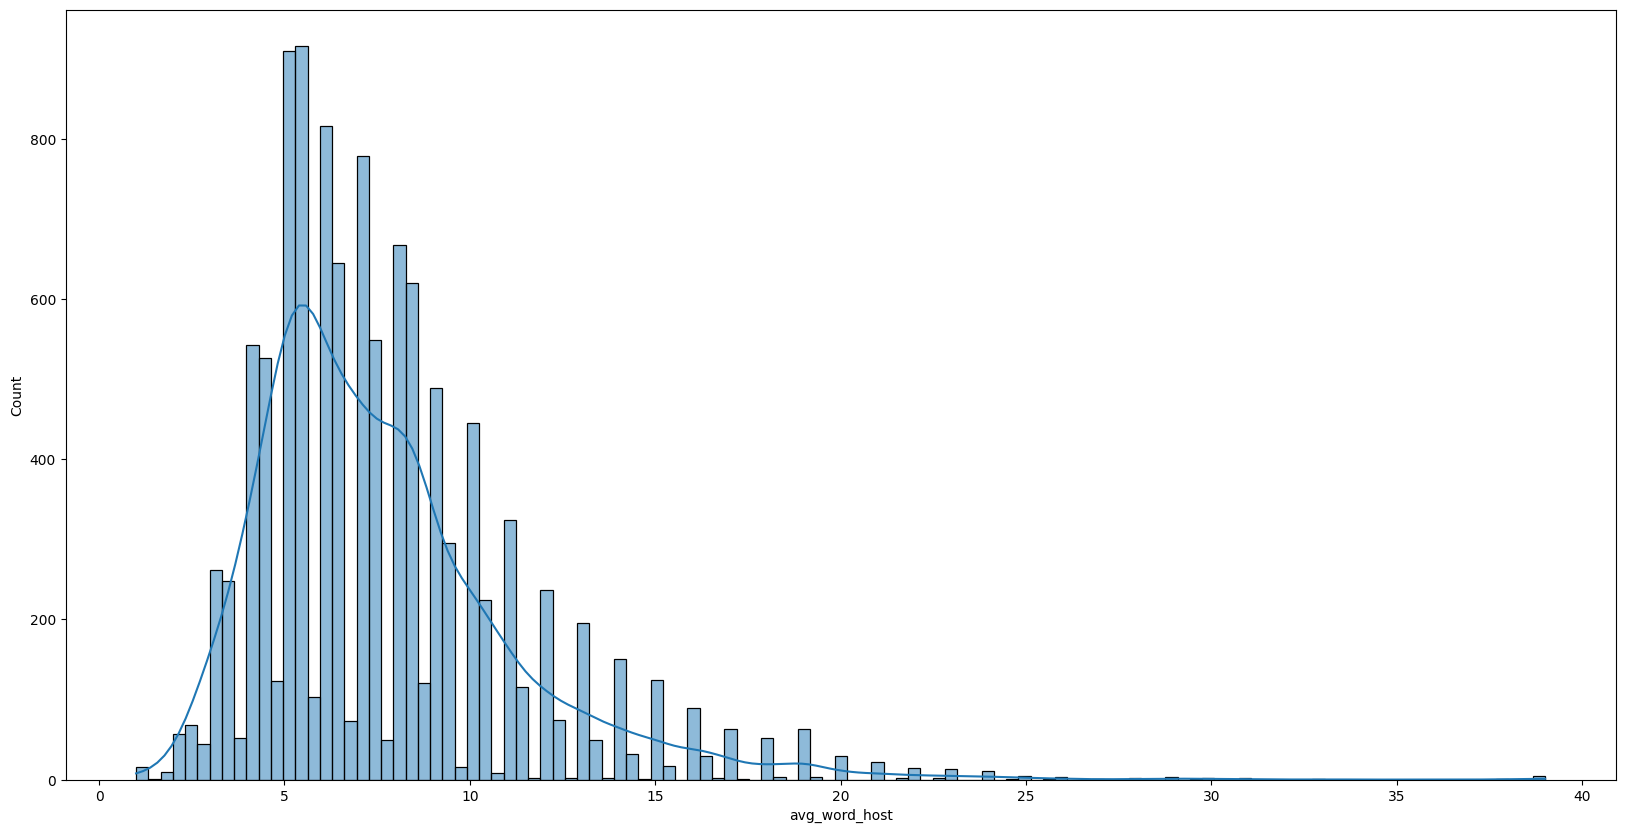

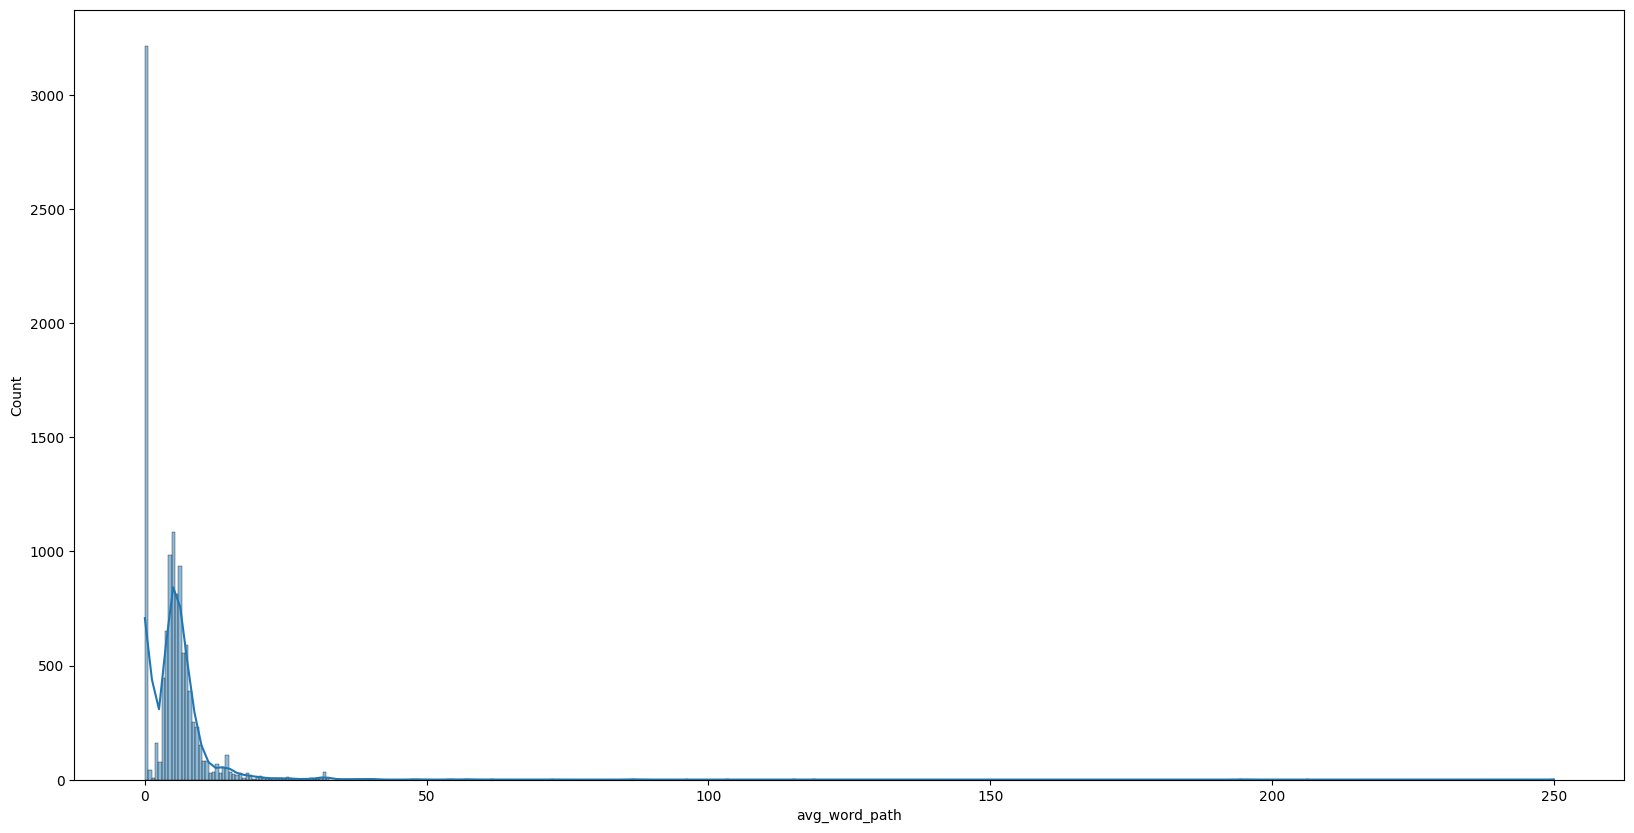

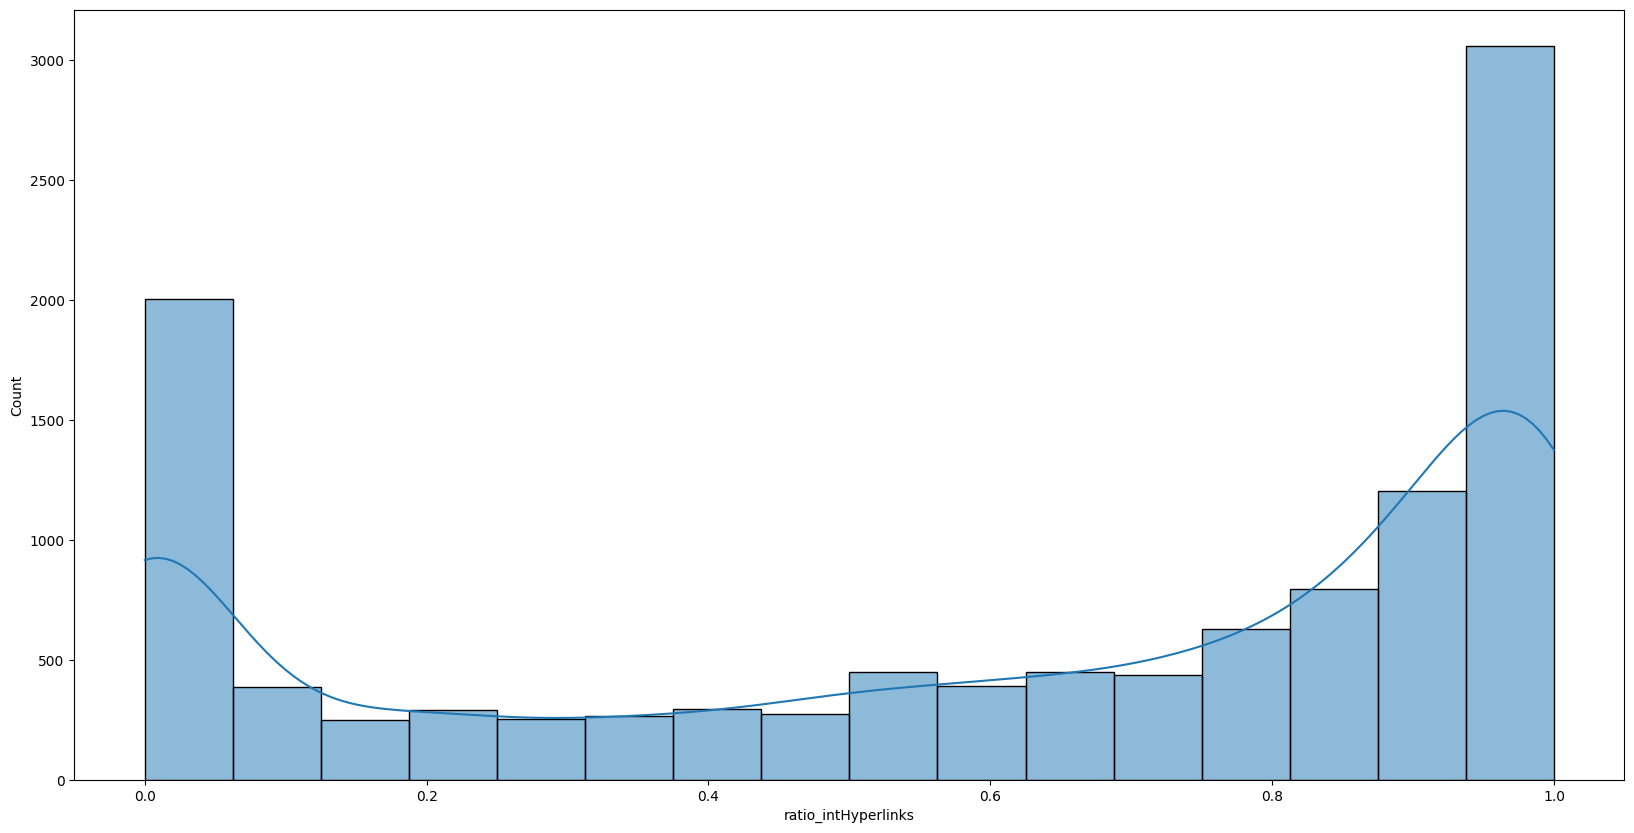

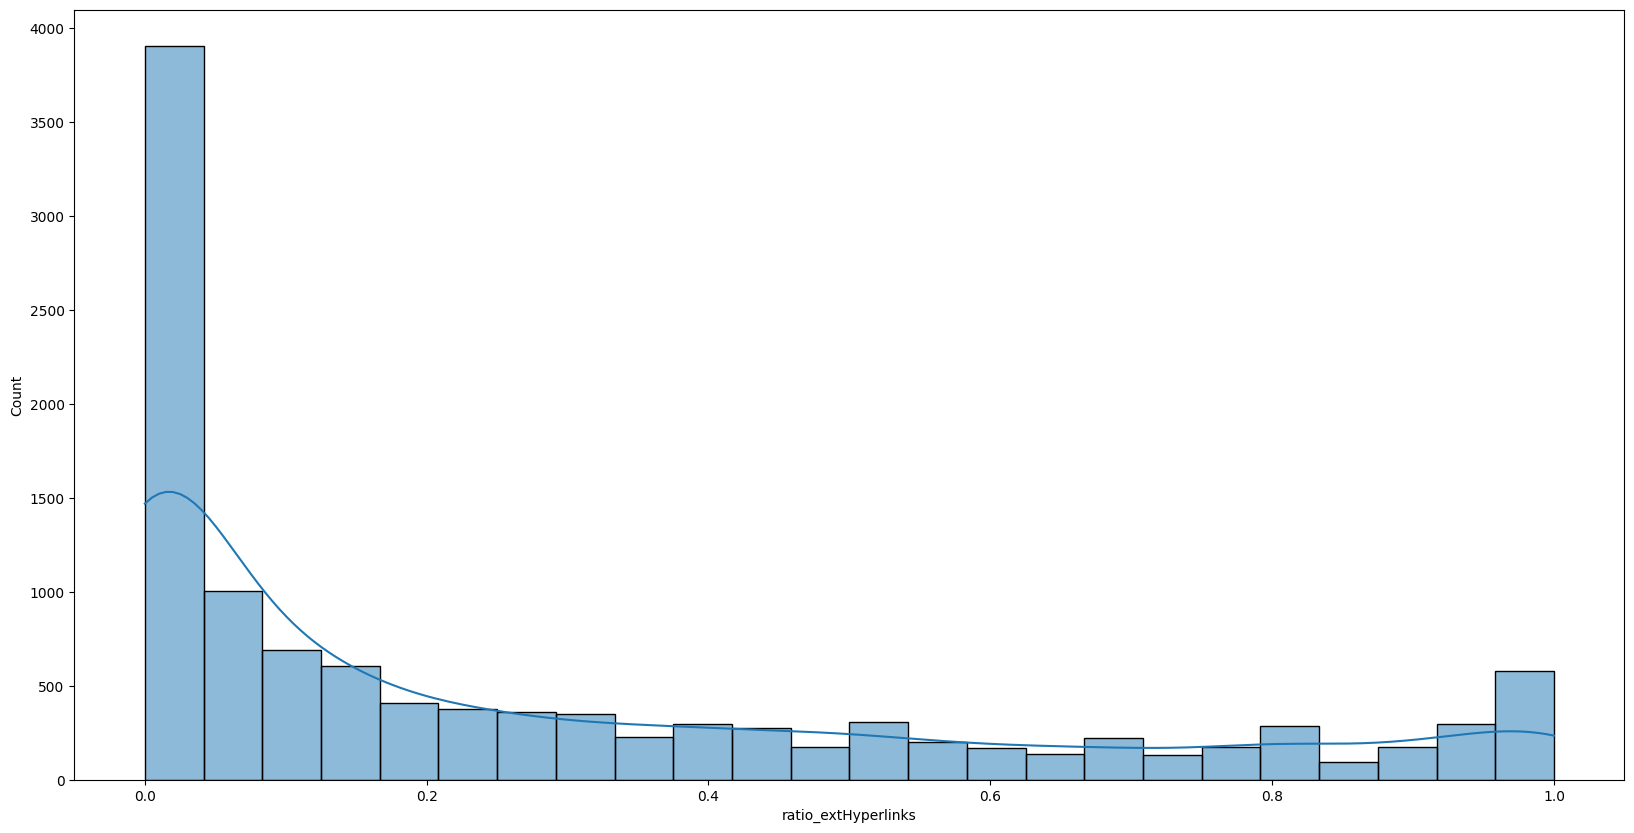

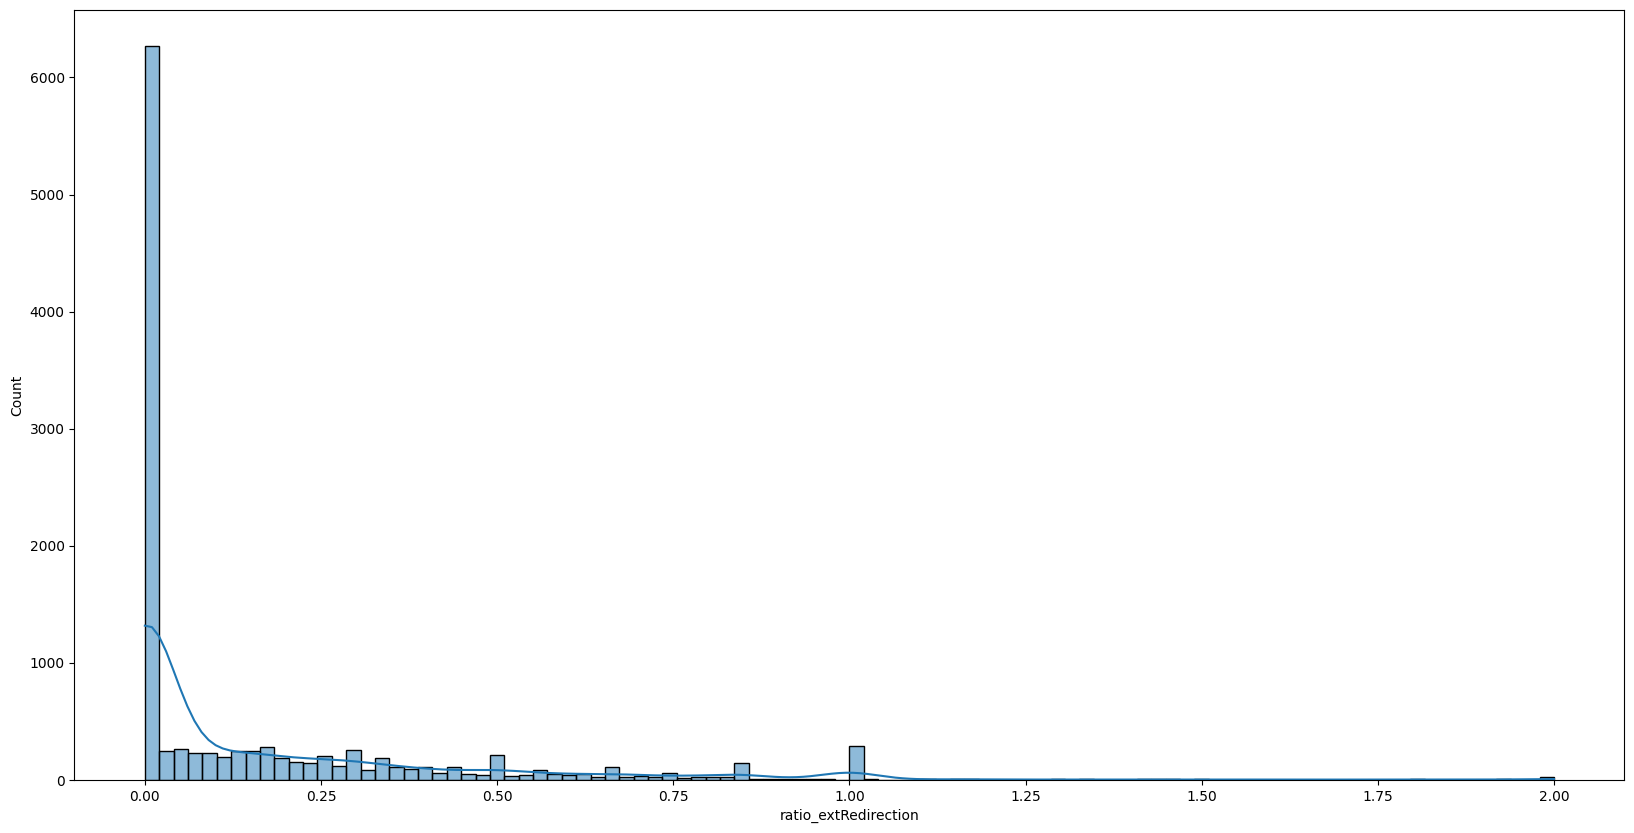

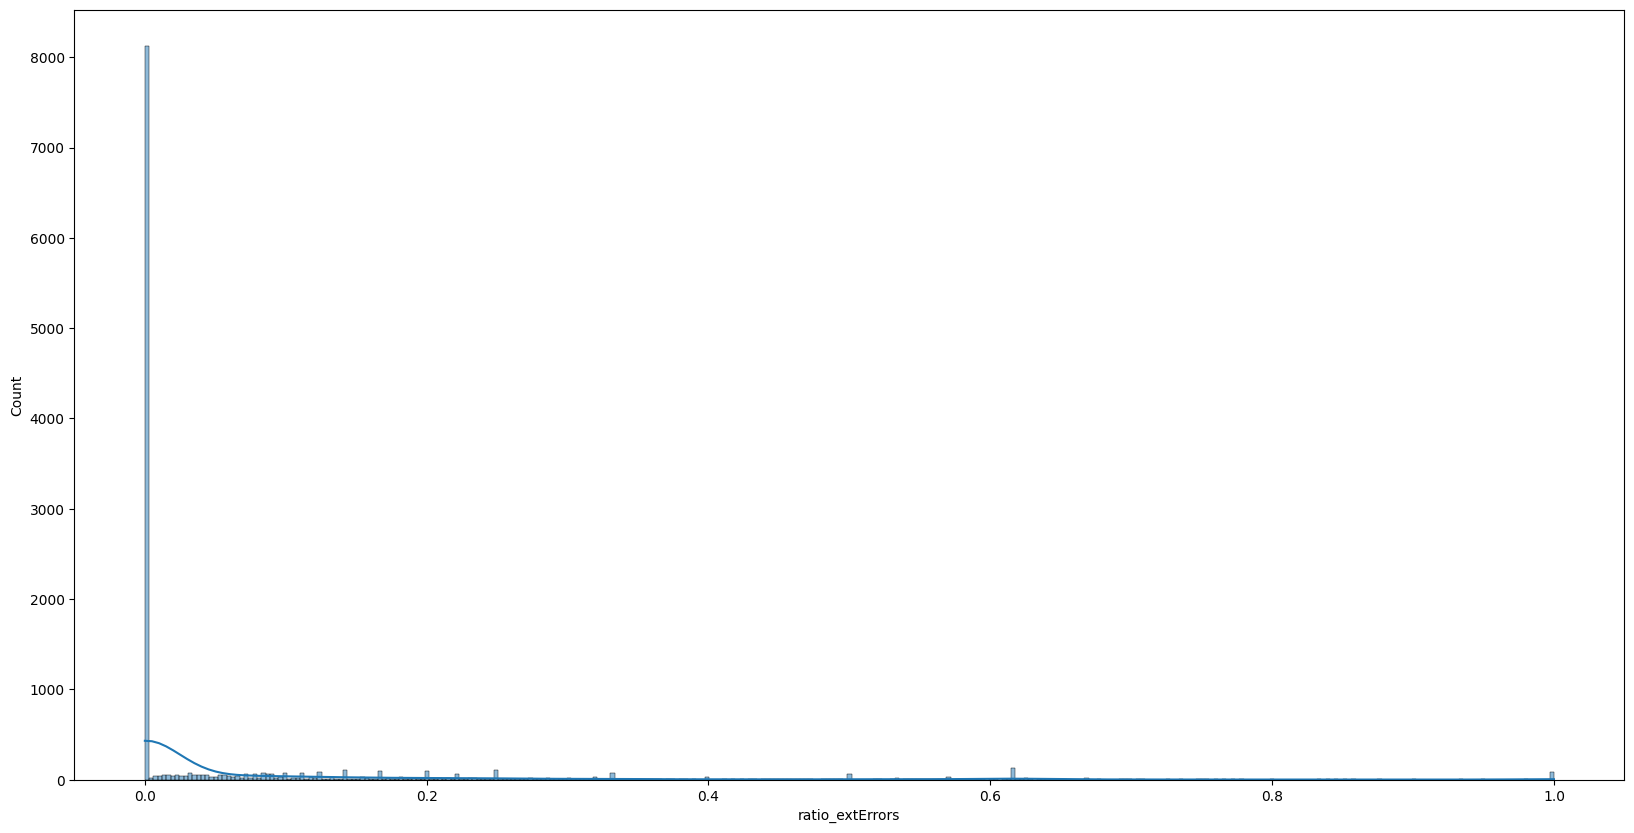

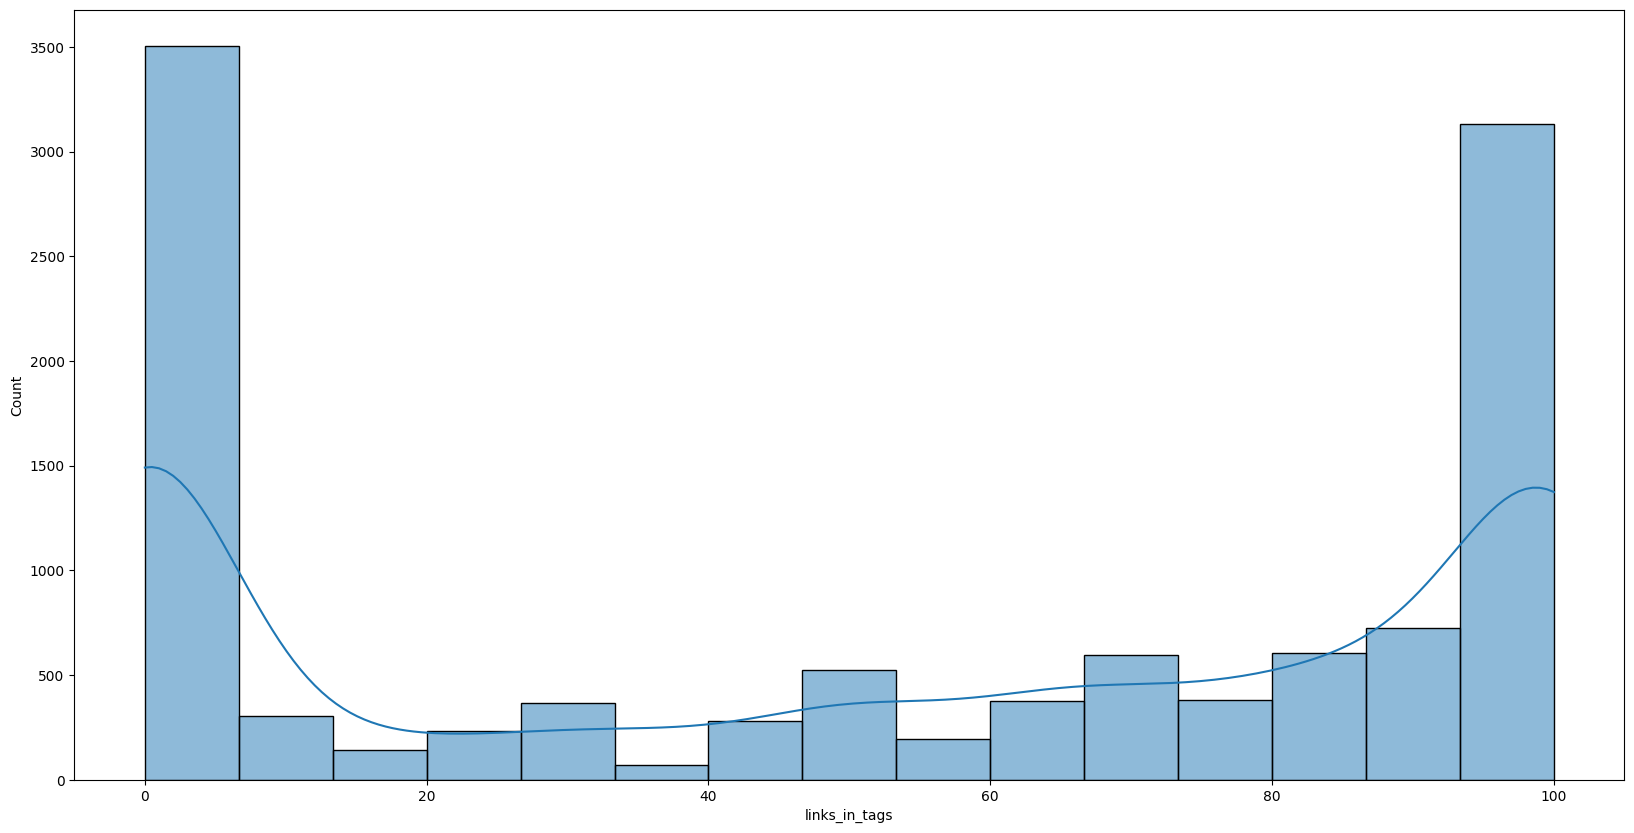

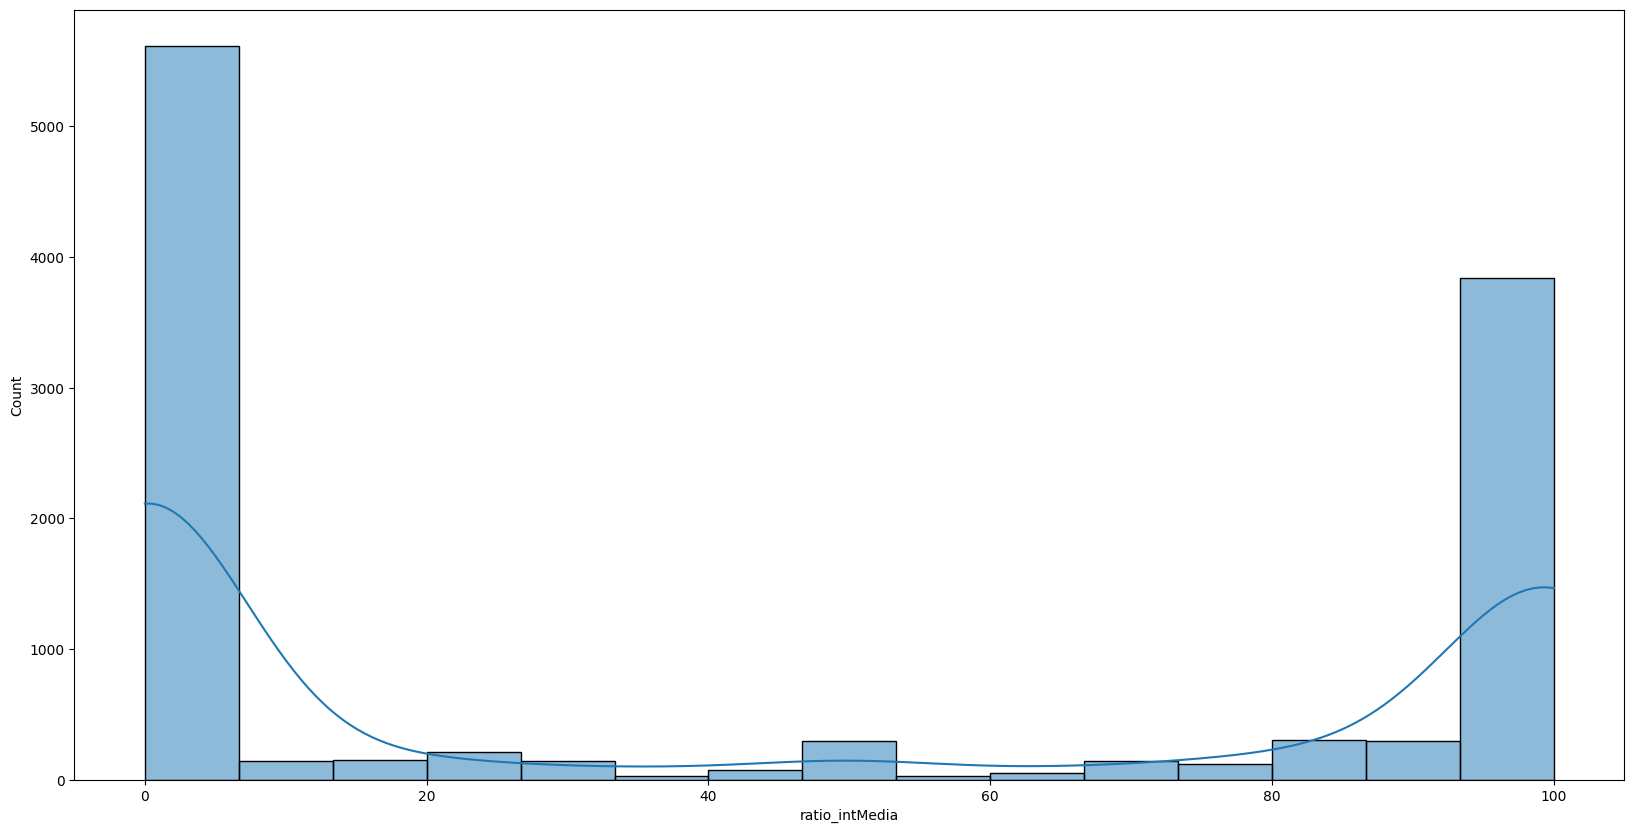

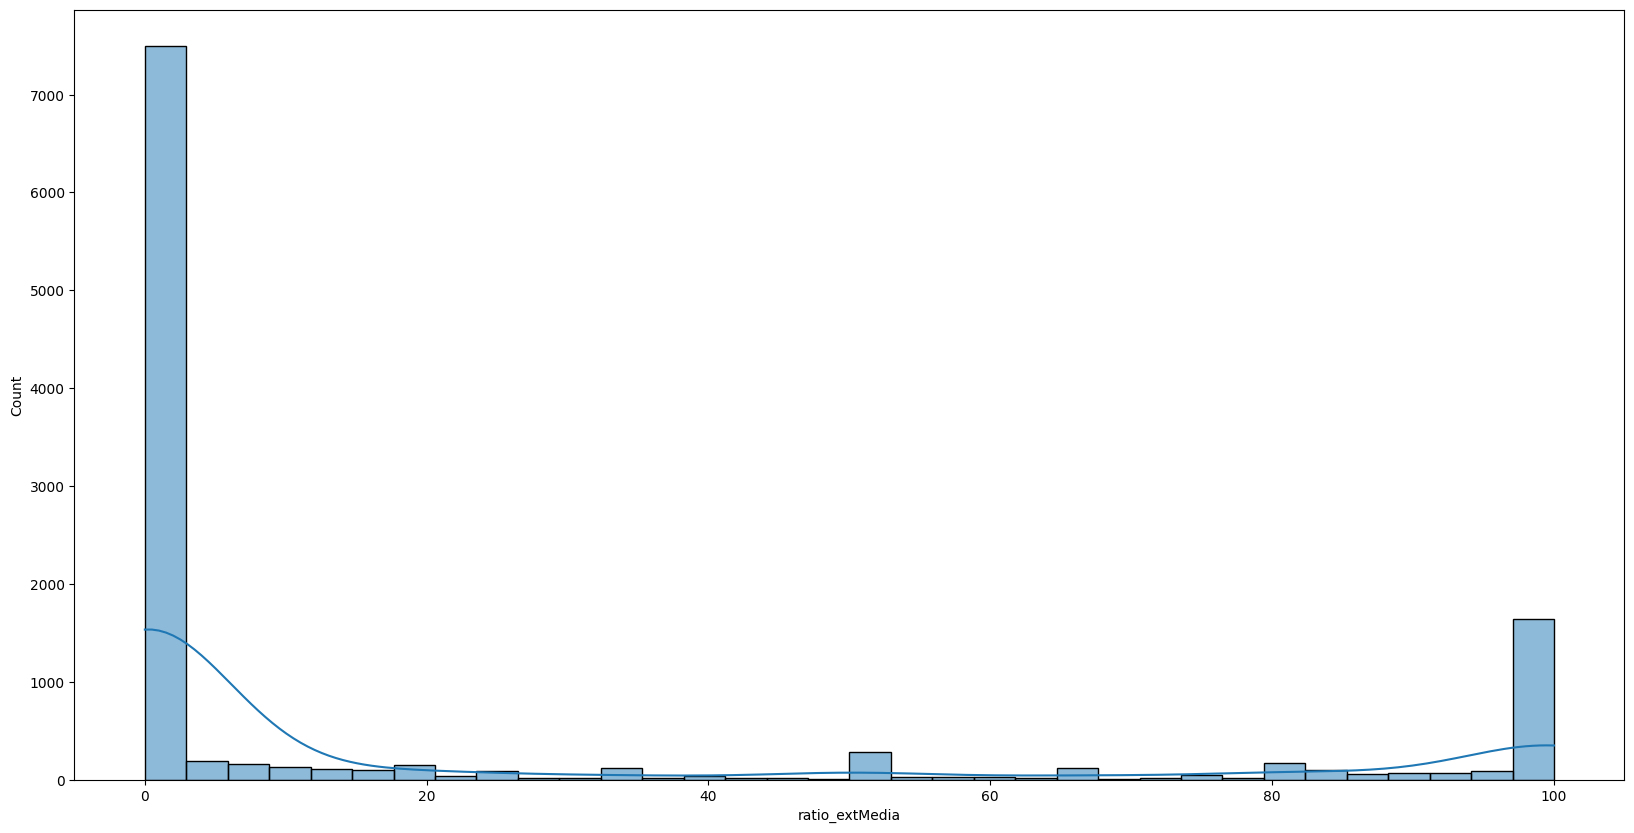

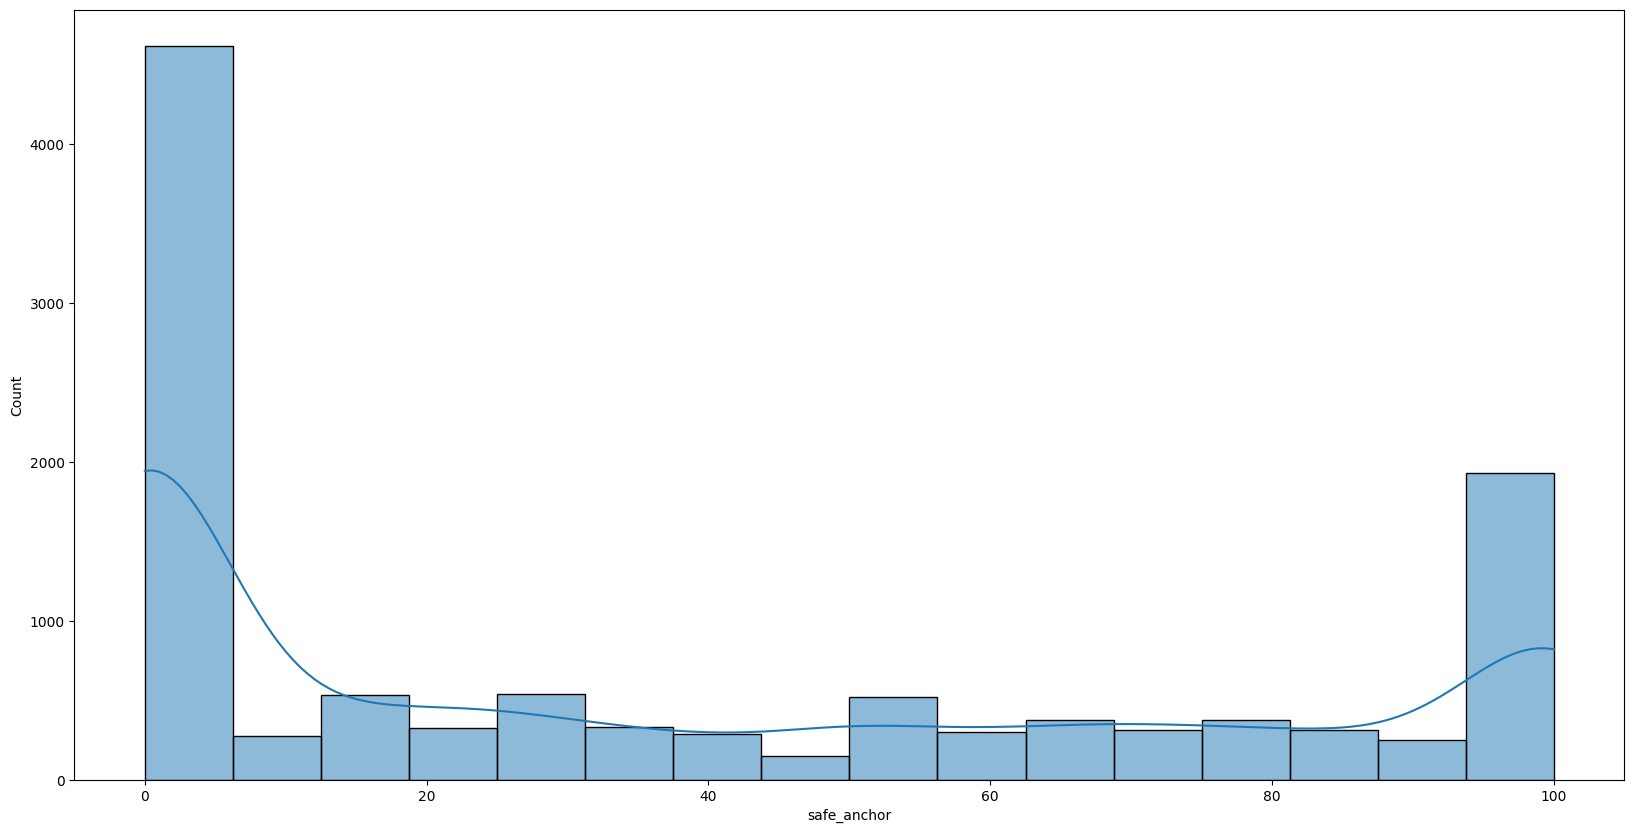

In [58]:
for col in df.select_dtypes("float"):
    plt.figure(figsize=(20,10))
    sns.histplot(df[col],kde=True)

histograms of object 

In [19]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50}{df[col].unique()}')

url-----------------------------------------------['http://www.crestonwood.com/router.php'
 'http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4'
 'https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_'
 ...
 'https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal'
 'http://www.mypublicdomainpictures.com/'
 'http://174.139.46.123/ap/signin?openid.pape.max_auth_age=0&amp;openid.return_to=https%3A%2F%2Fwww.amazon.co.jp%2F%3Fref_%3Dnav_em_hd_re_signin&amp;openid.identity=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&amp;openid.assoc_handle=jpflex&amp;openid.mode=checkid_setup&amp;key=a@b.c&amp;openid.claimed_id=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&amp;openid.ns=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0&amp;&amp;ref_=nav_em_hd_clc_signin']http://e710z0ear.du.r.appspot.com/c:/users/user/downlo       


variable target relationship

create tow group  legitimate and phishing

In [8]:
legitimate_df=df[df["status"]=="legitimate"]
phishing_df=df[df["status"]=="phishing"]
df_column=df.columns




Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

<AxesSubplot: xlabel='ip', ylabel='count'>

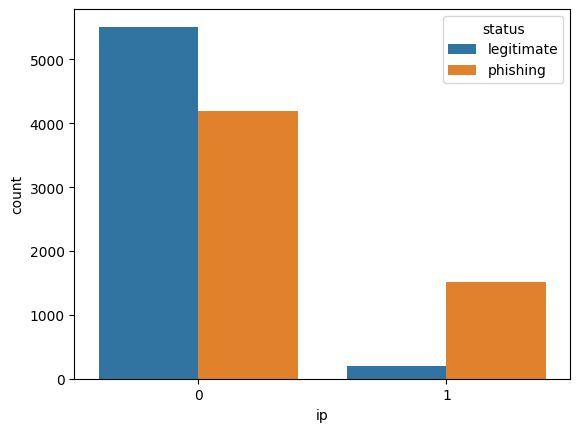

In [23]:
sns.countplot(x="ip",hue="status",data=df)

In [24]:
pd.crosstab(df["status"],df["ip"])

ip             0     1
status                
legitimate  5512   203
phishing    4197  1518

C:\Users\rrbou\AppData\Local\Temp\ipykernel_15948\1211516561.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


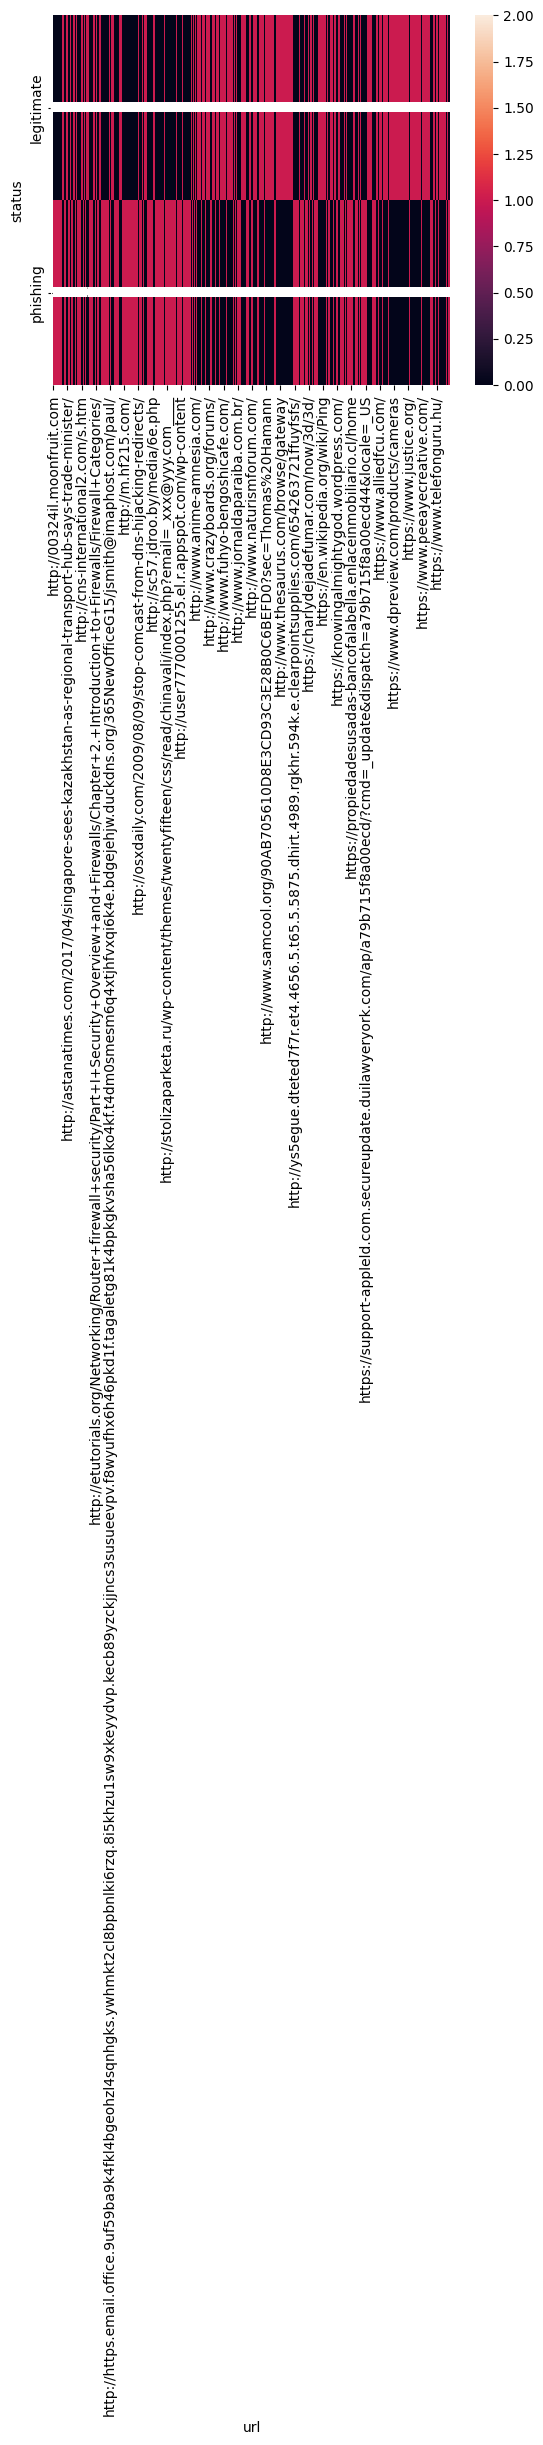

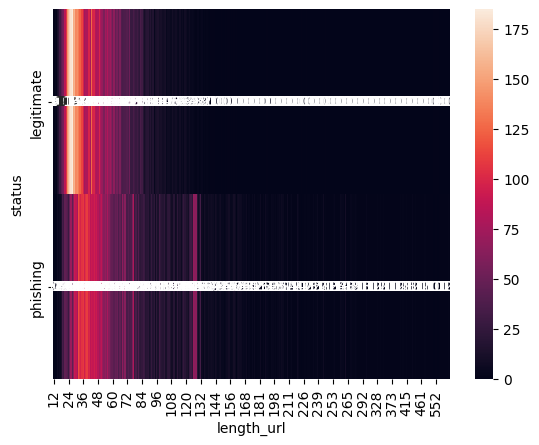

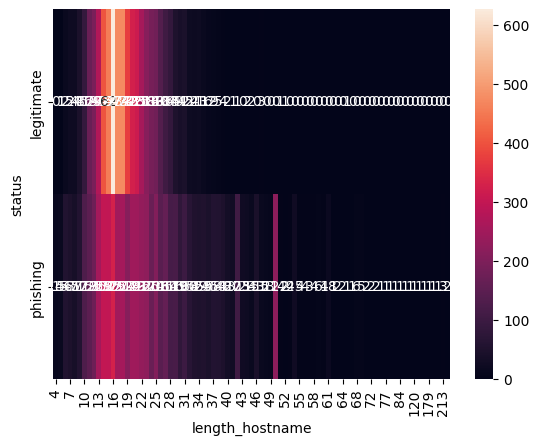

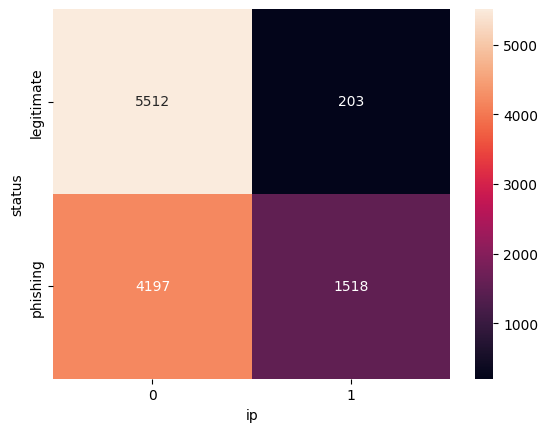

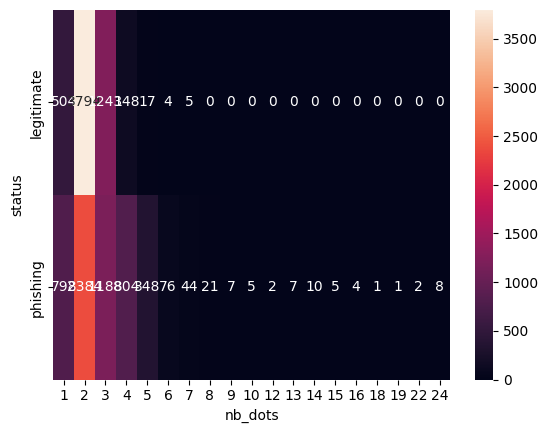

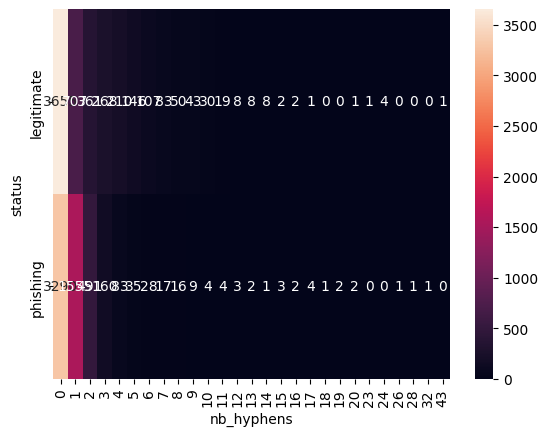

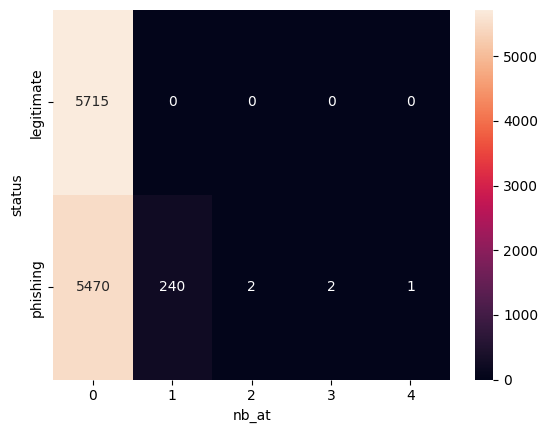

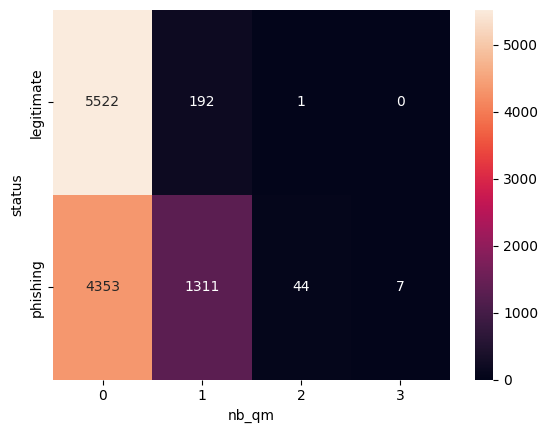

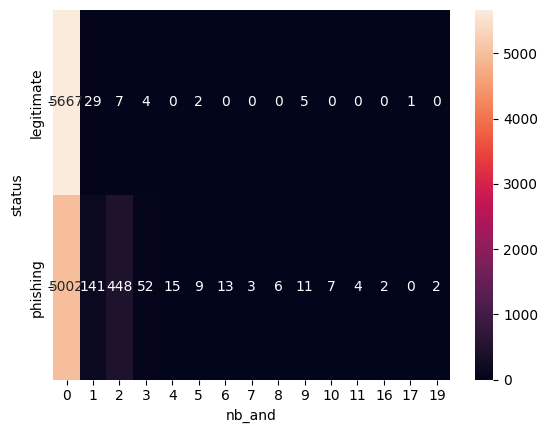

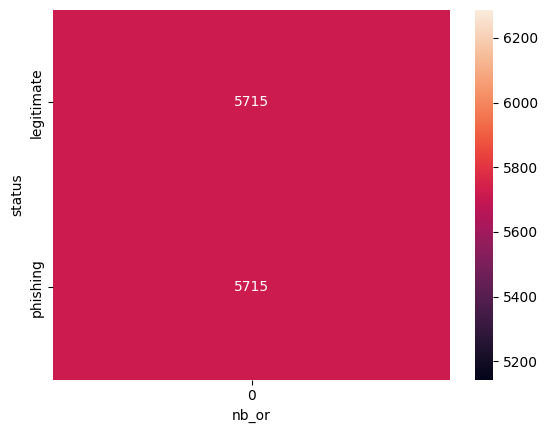

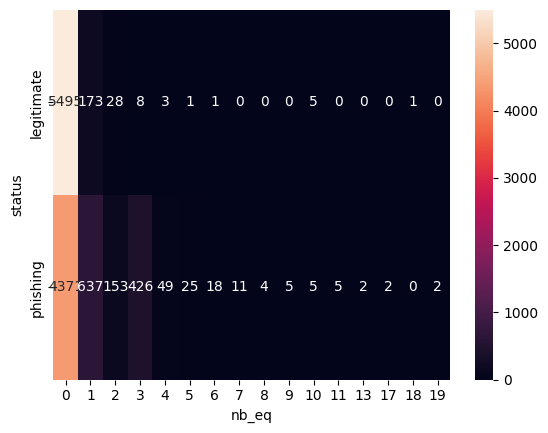

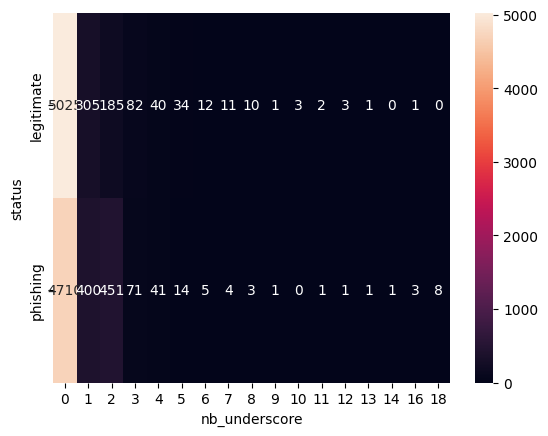

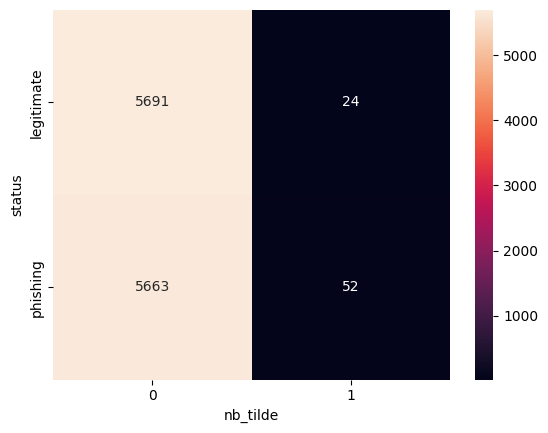

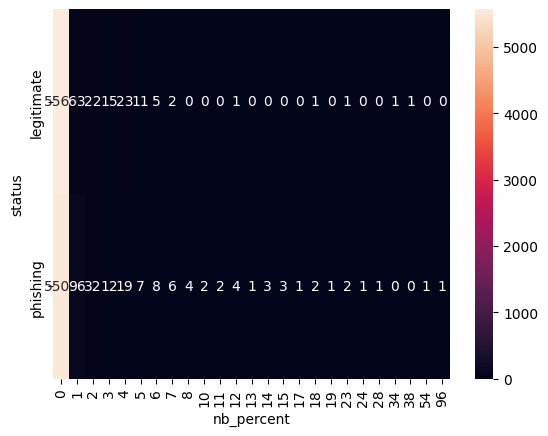

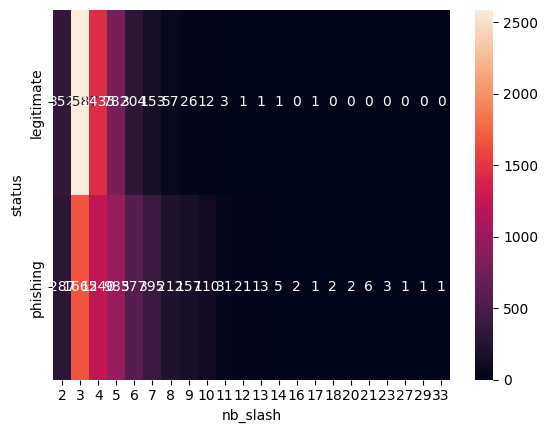

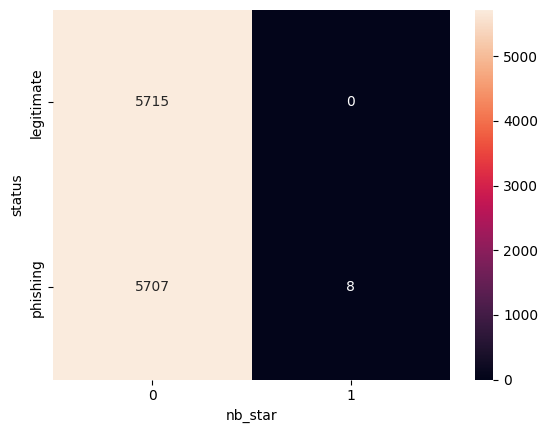

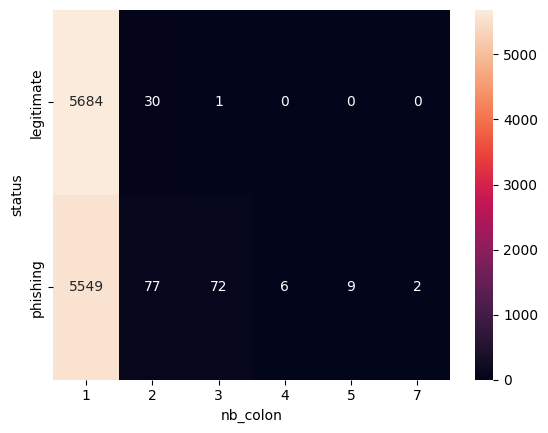

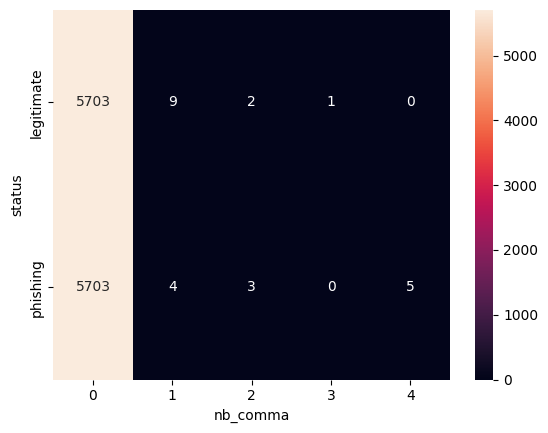

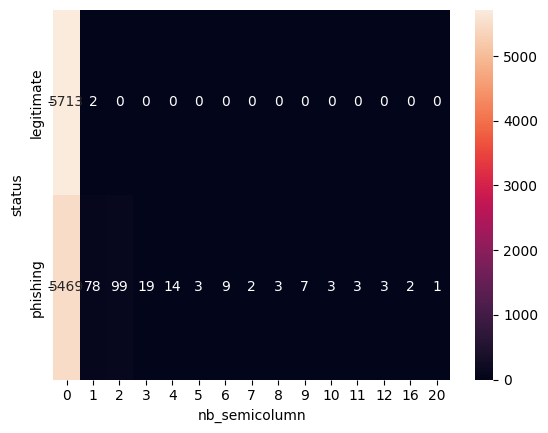

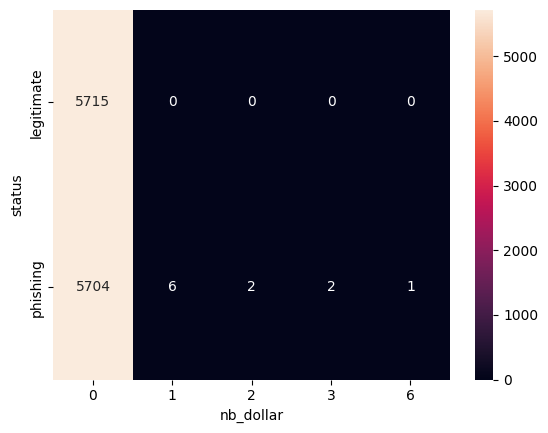

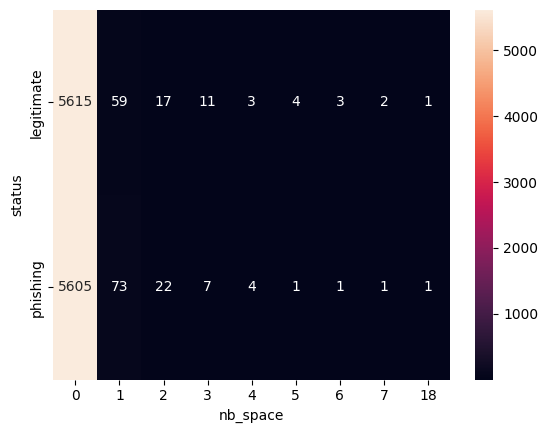

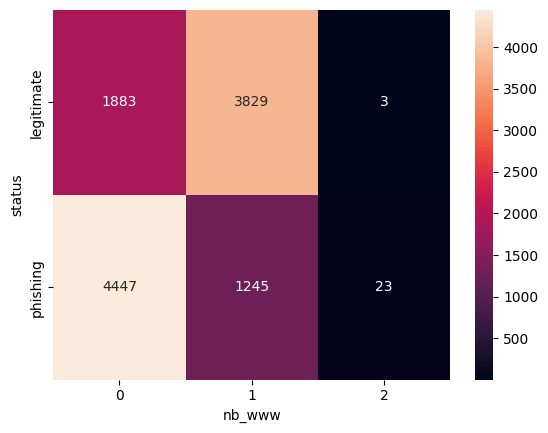

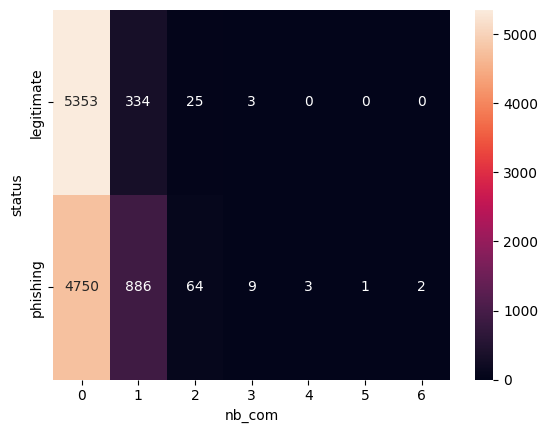

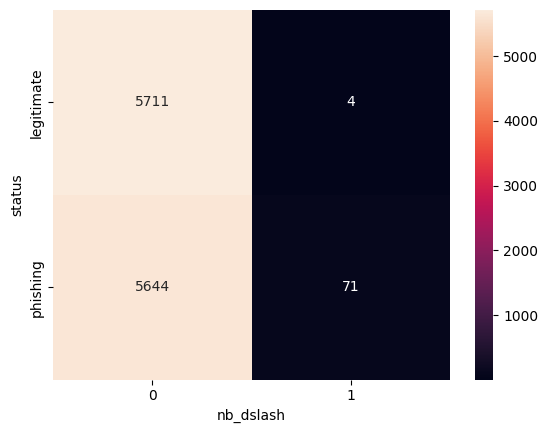

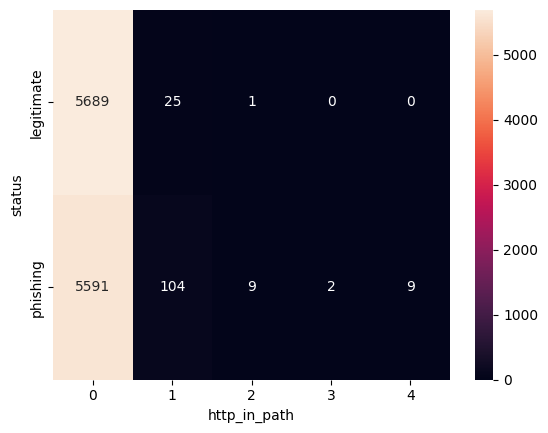

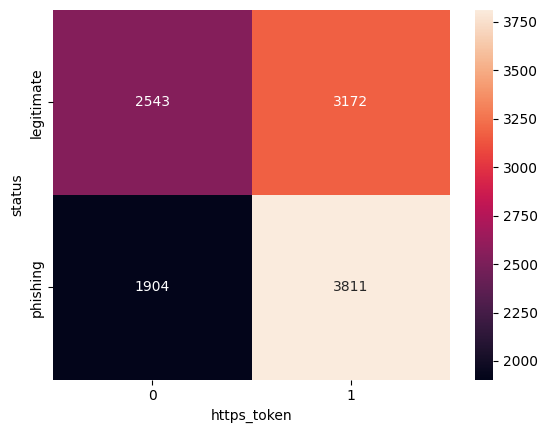

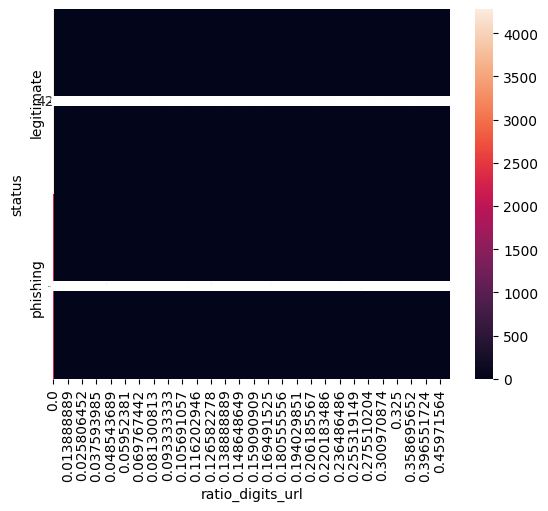

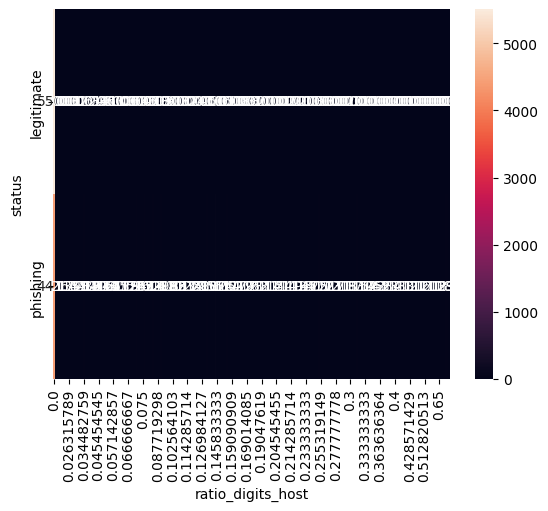

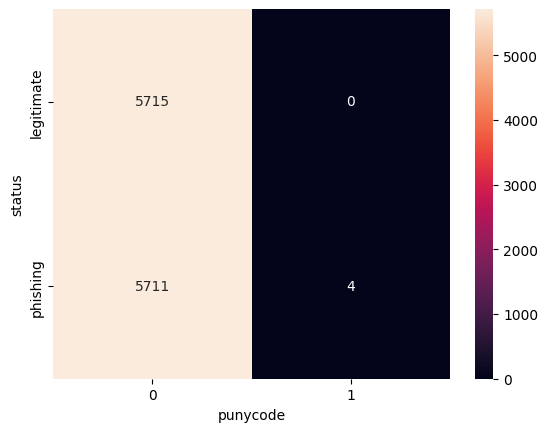

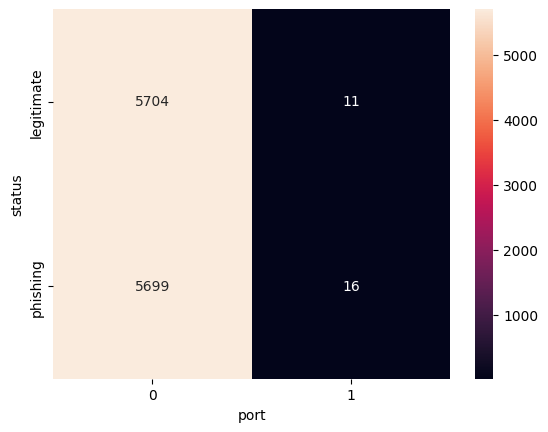

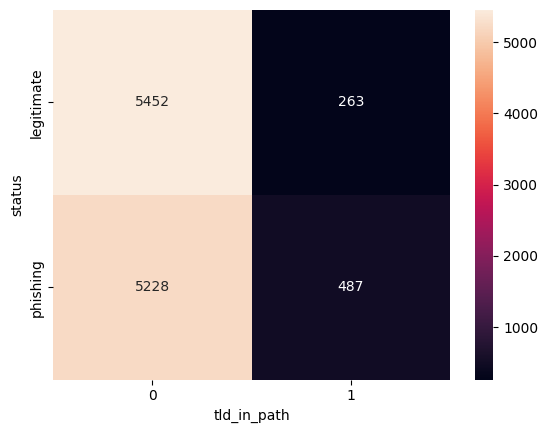

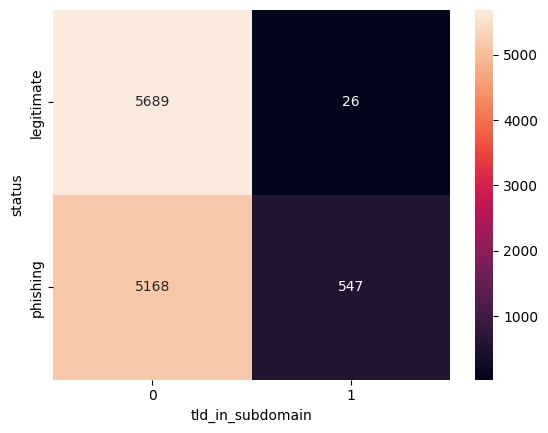

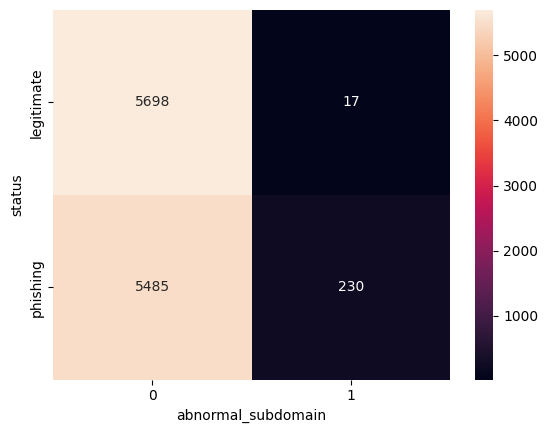

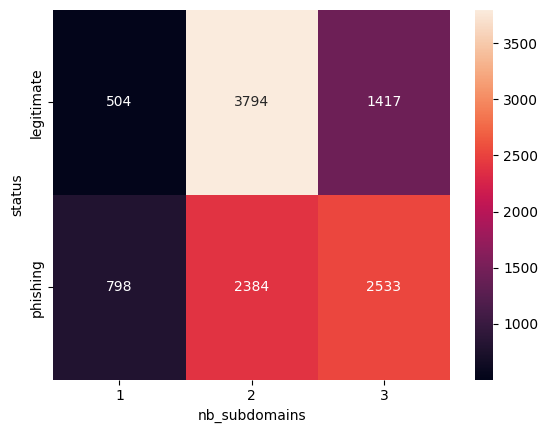

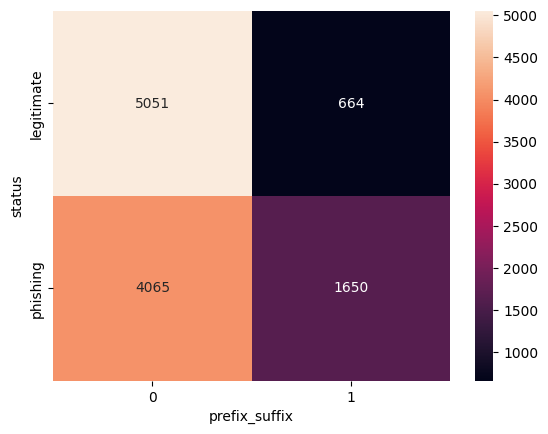

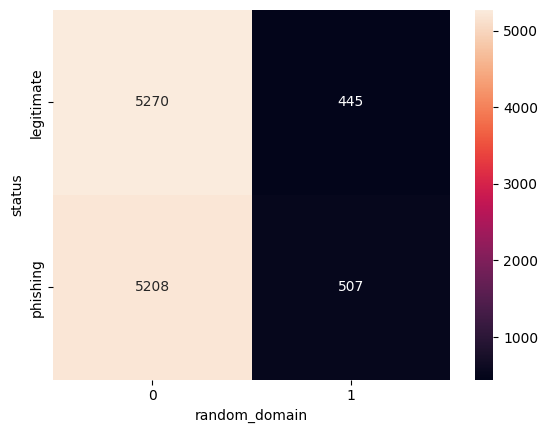

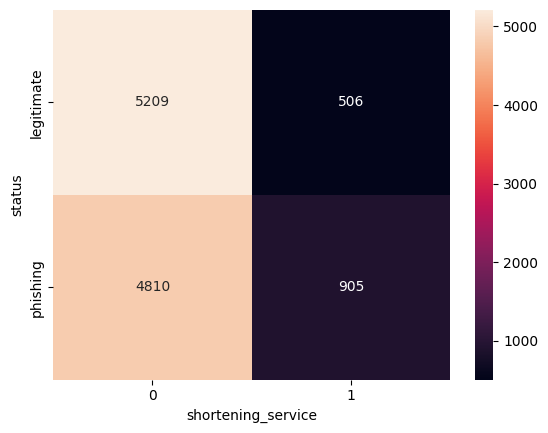

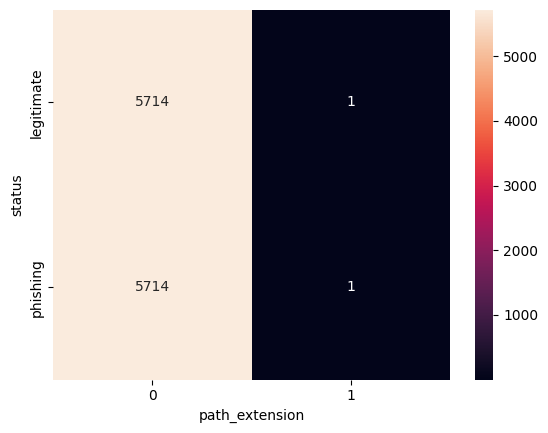

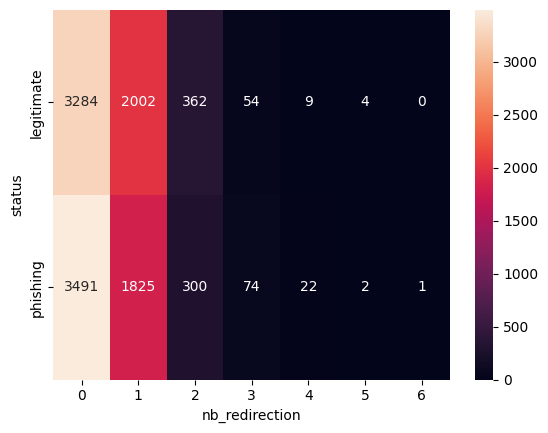

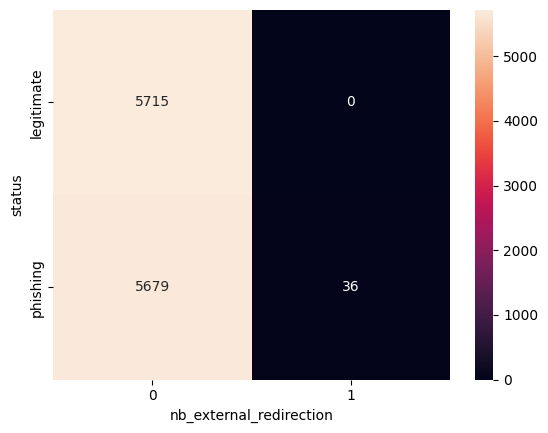

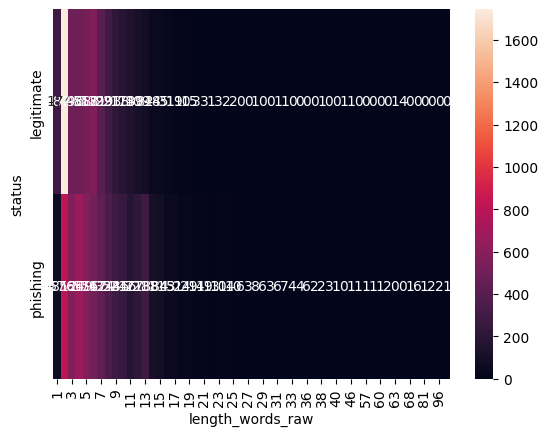

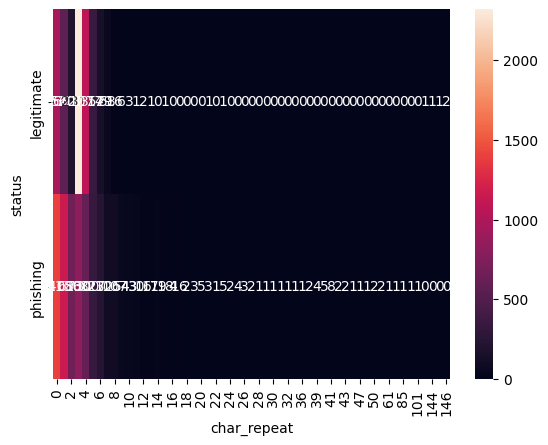

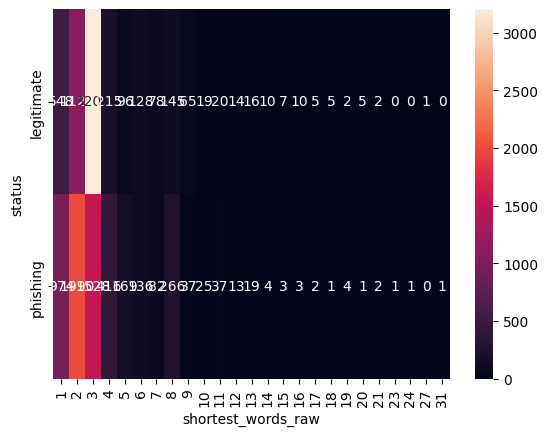

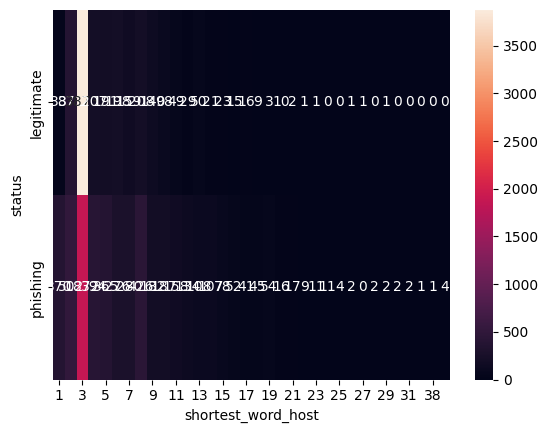

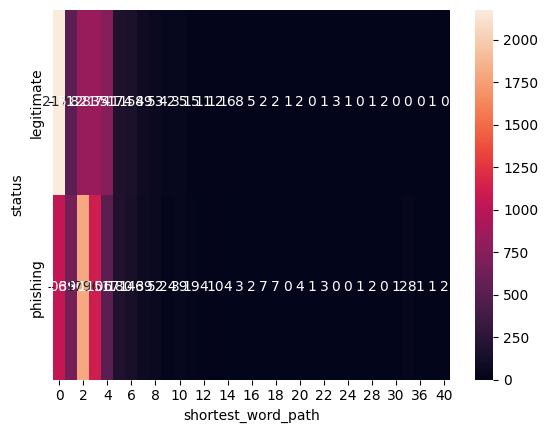

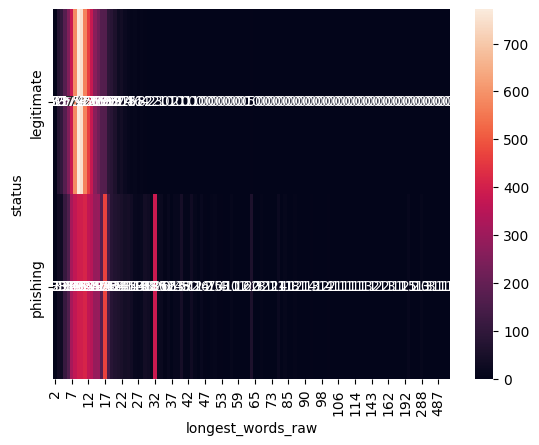

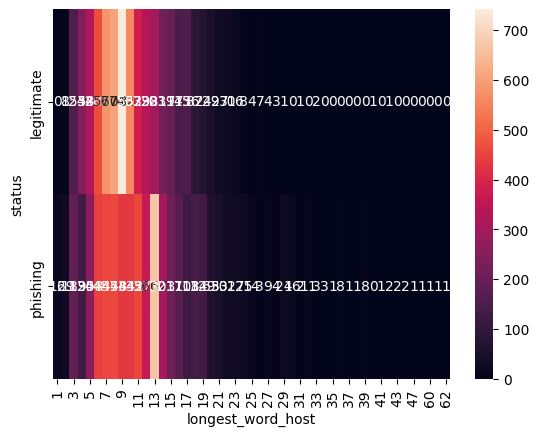

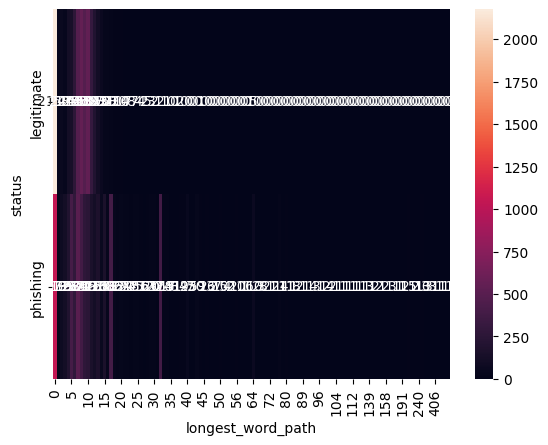

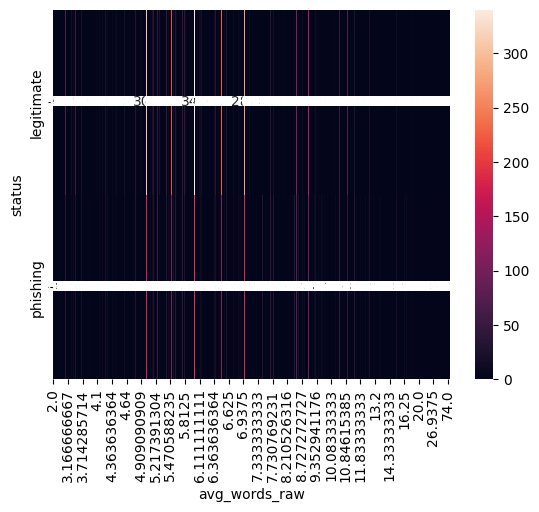

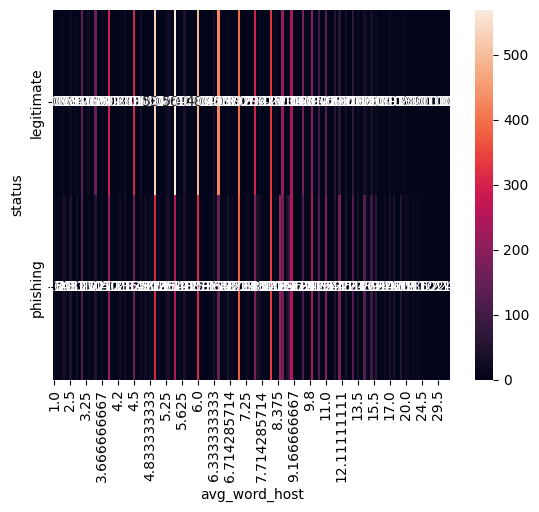

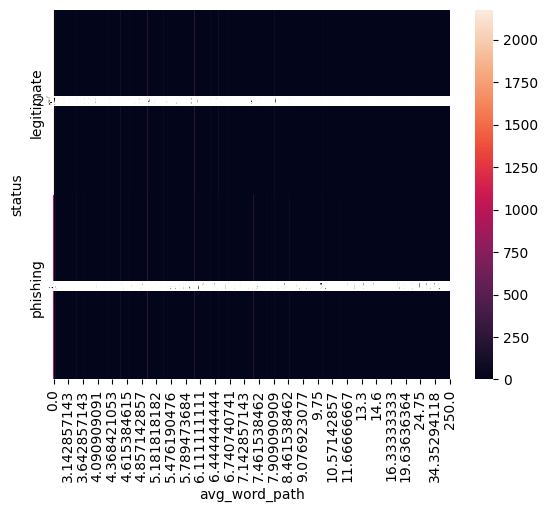

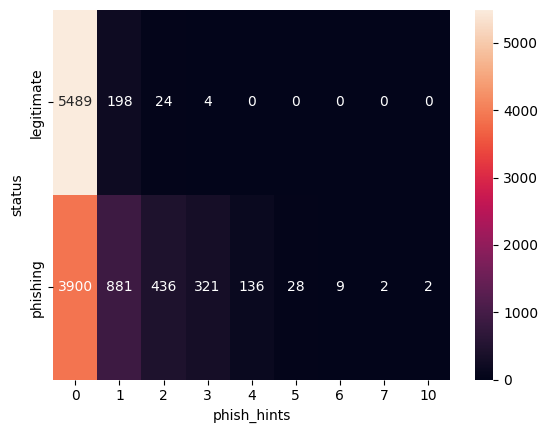

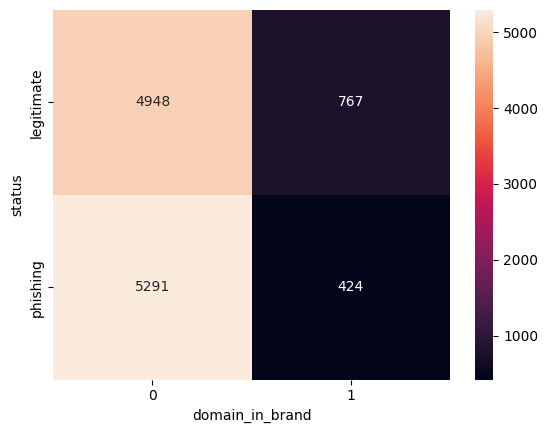

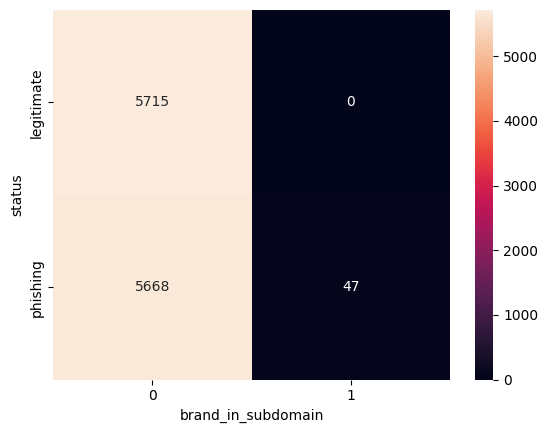

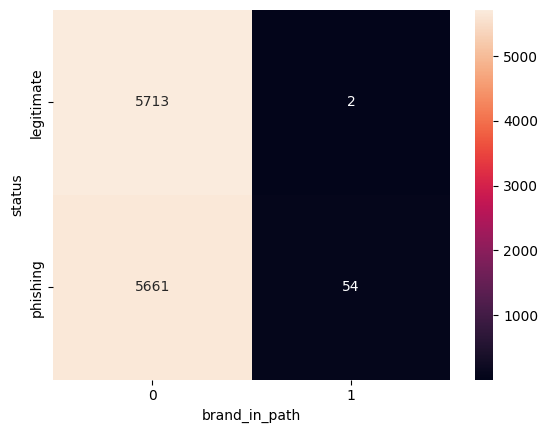

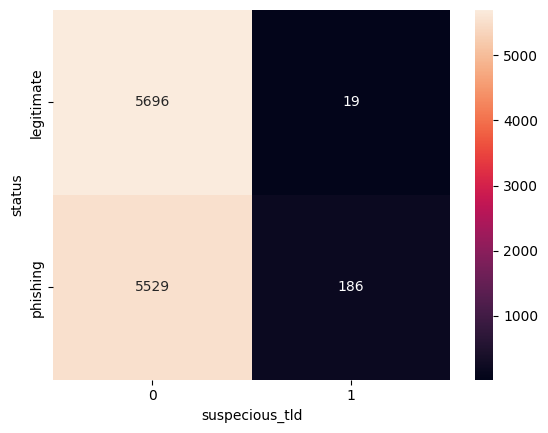

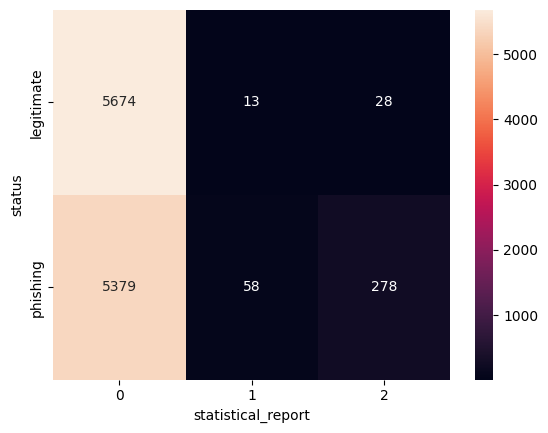

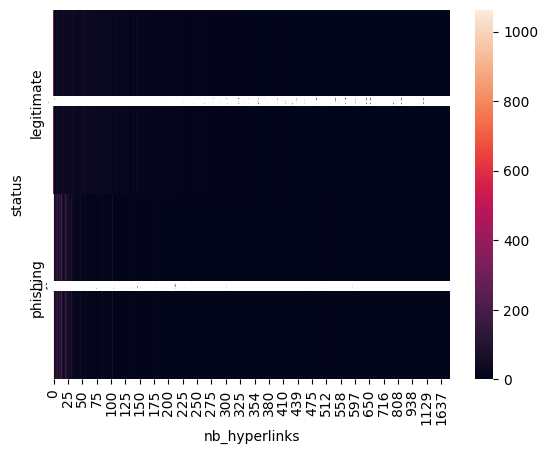

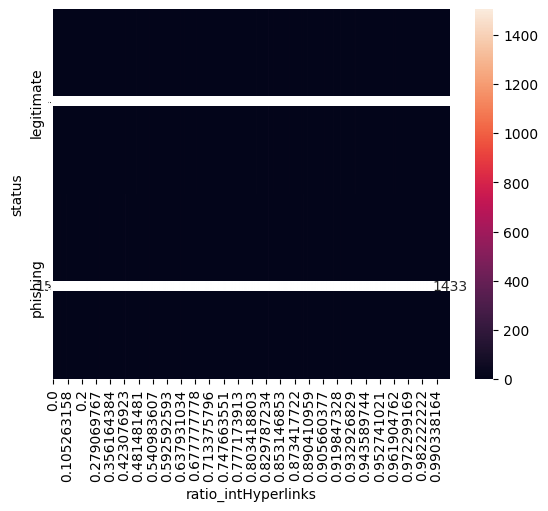

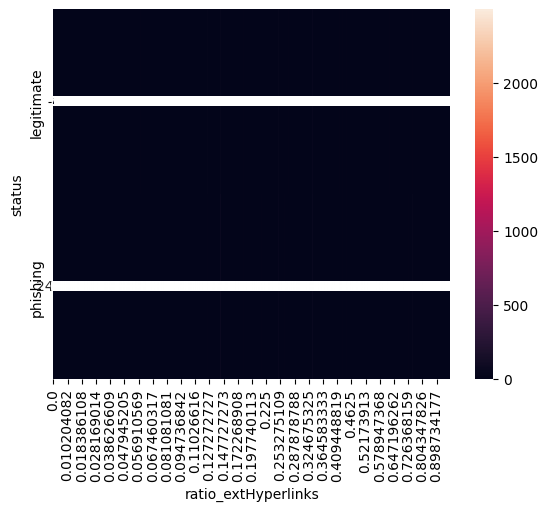

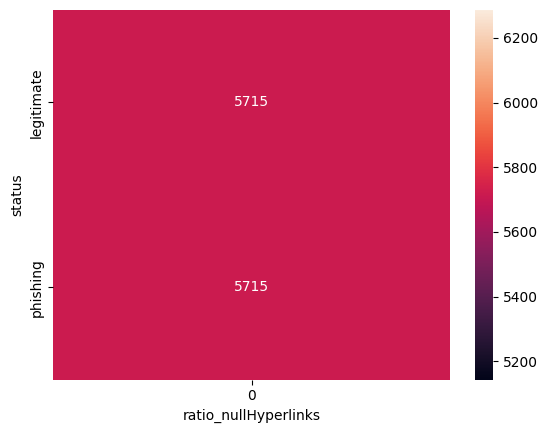

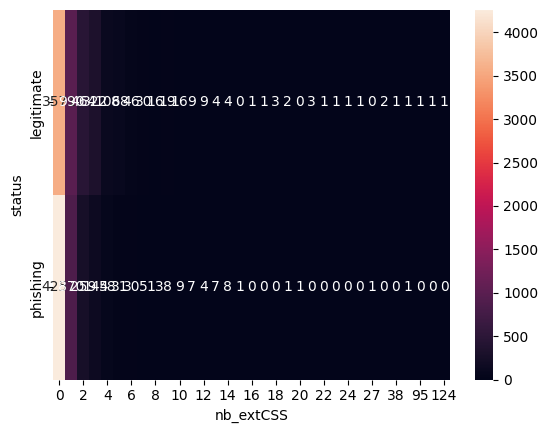

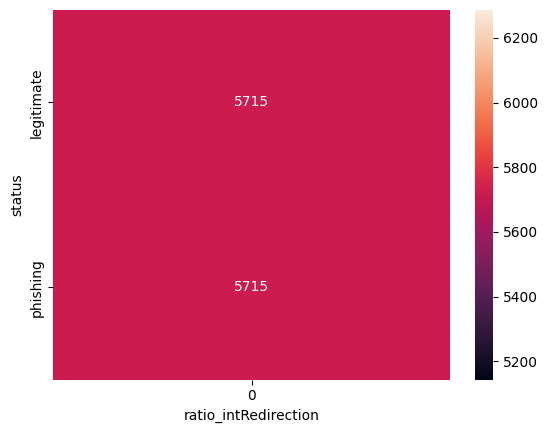

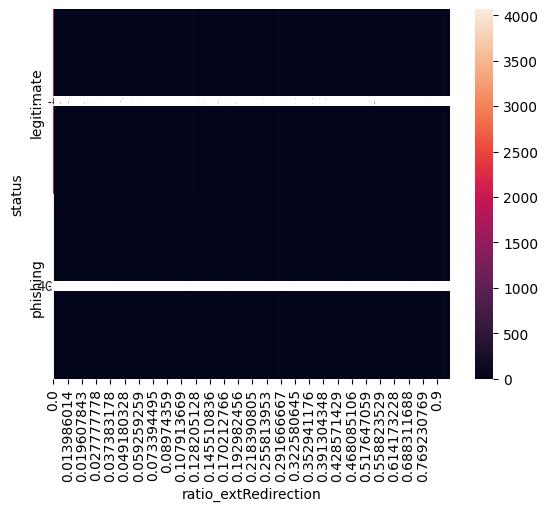

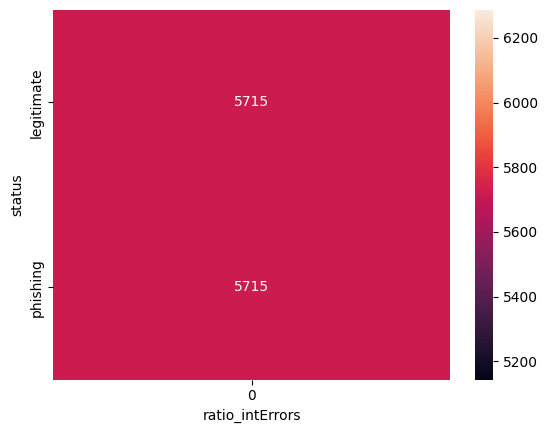

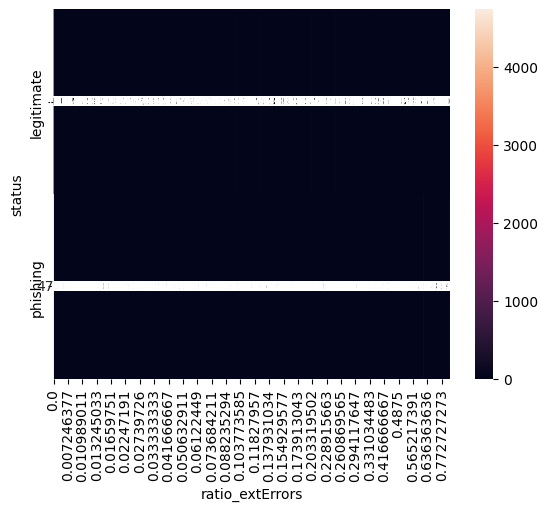

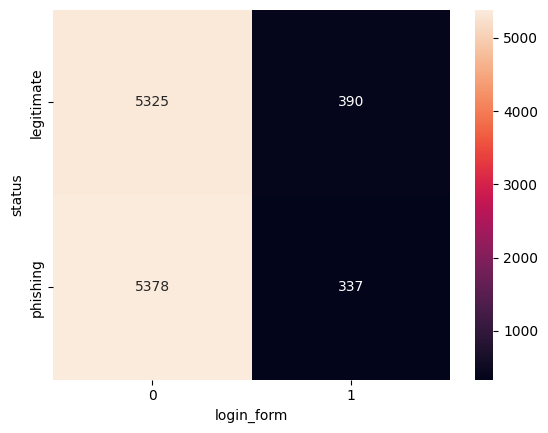

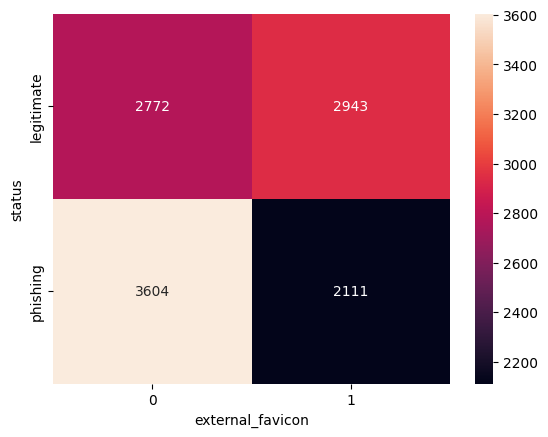

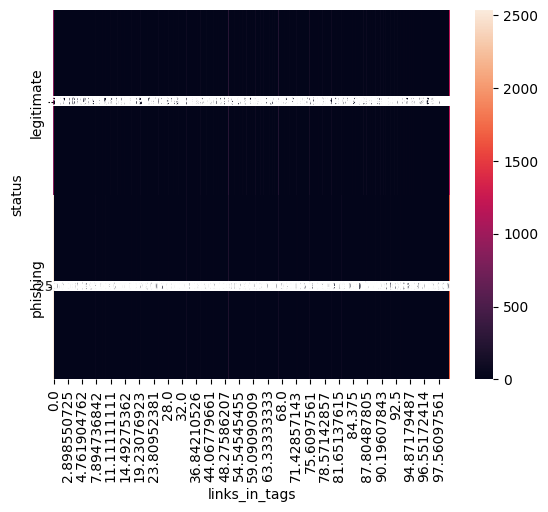

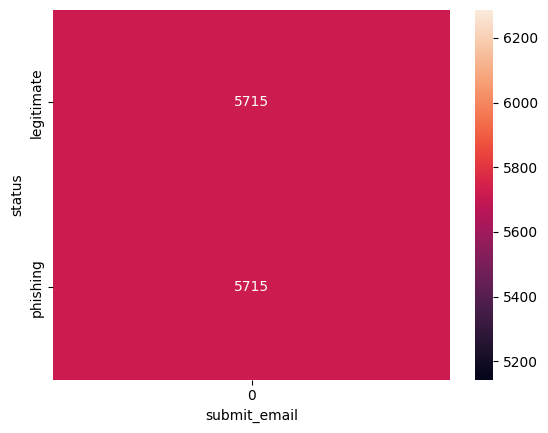

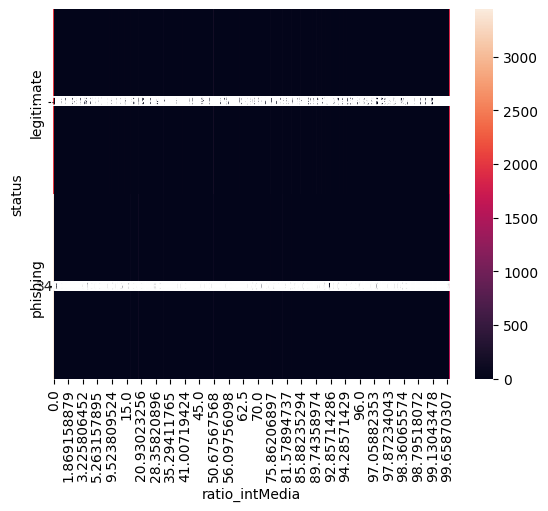

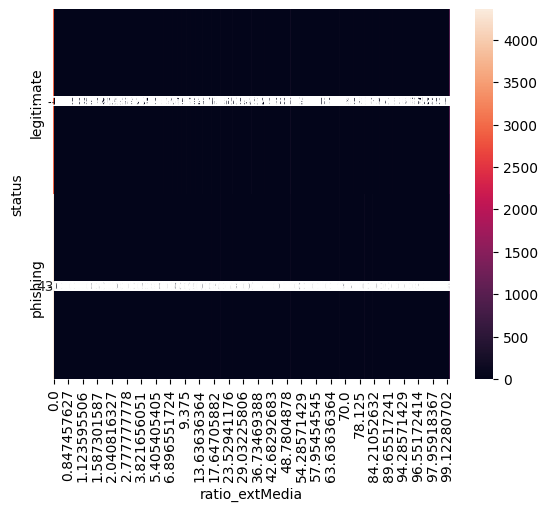

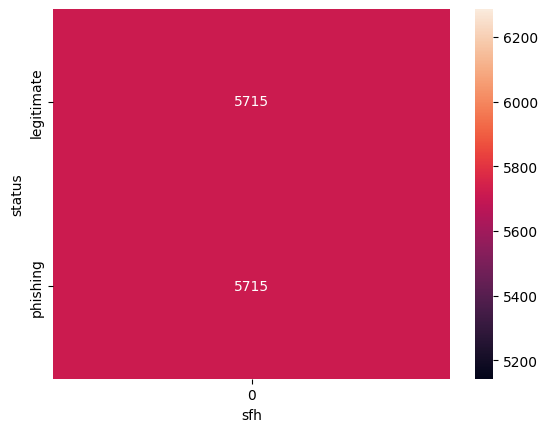

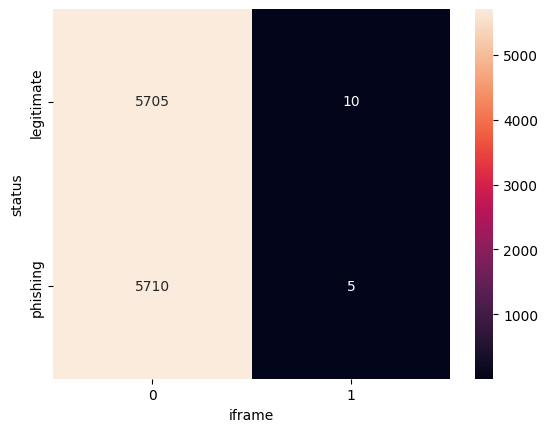

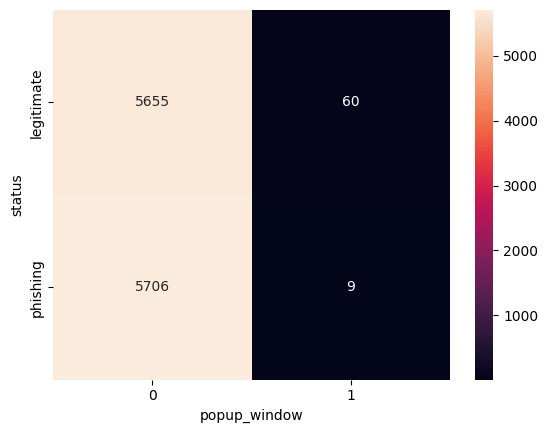

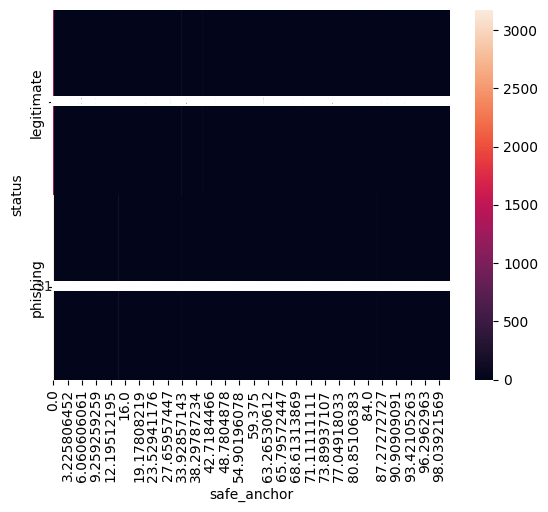

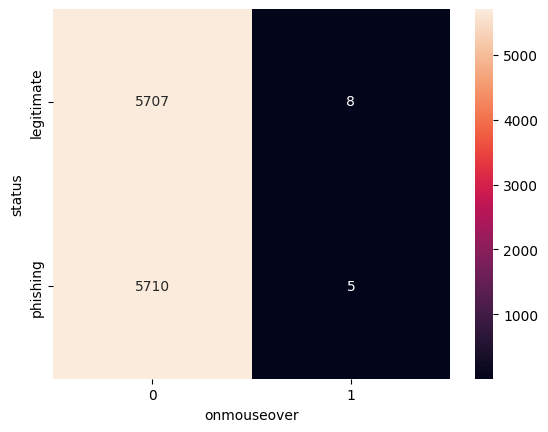

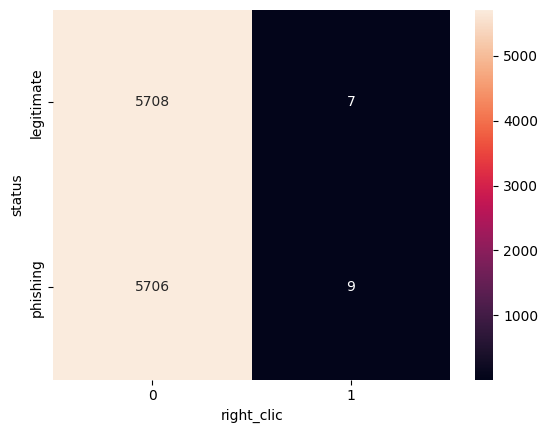

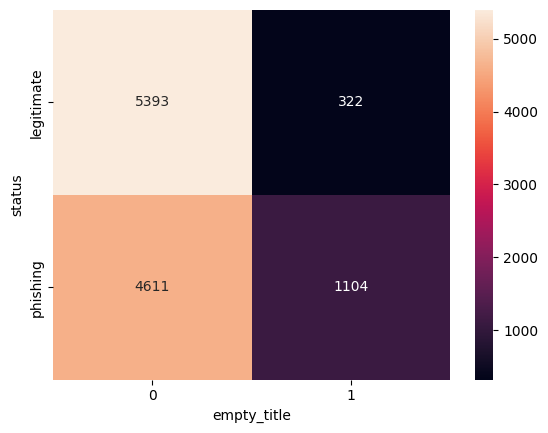

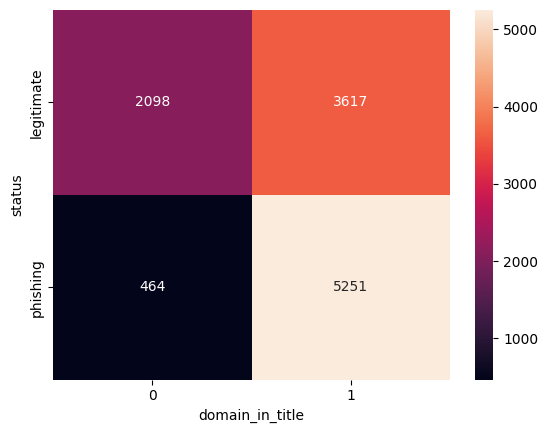

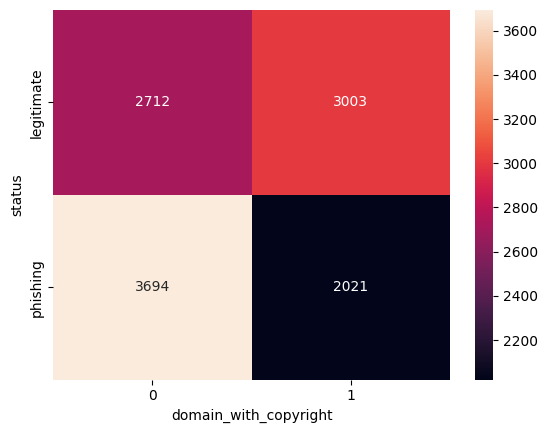

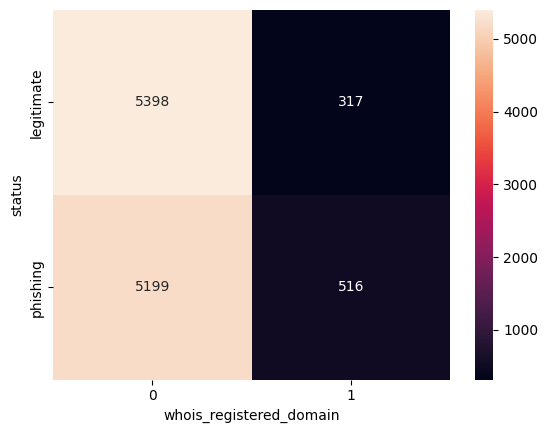

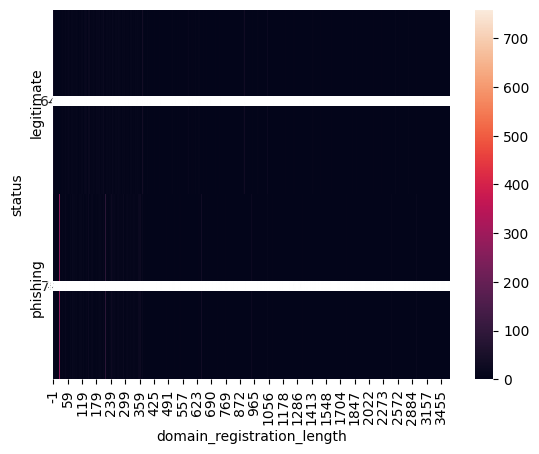

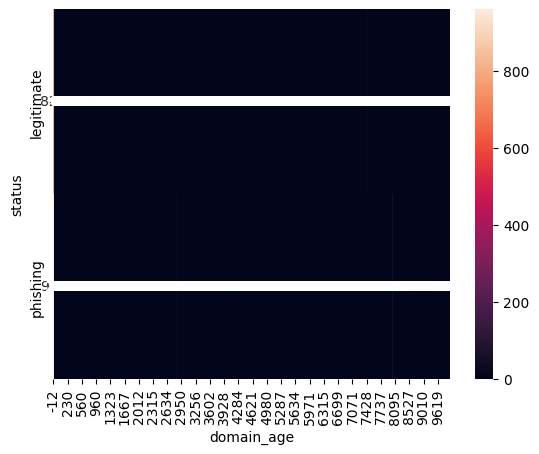

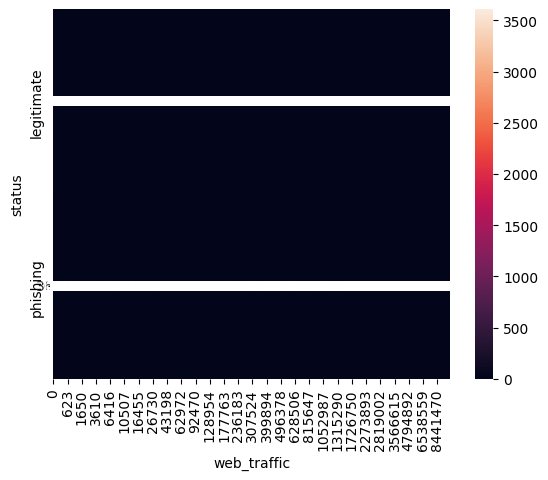

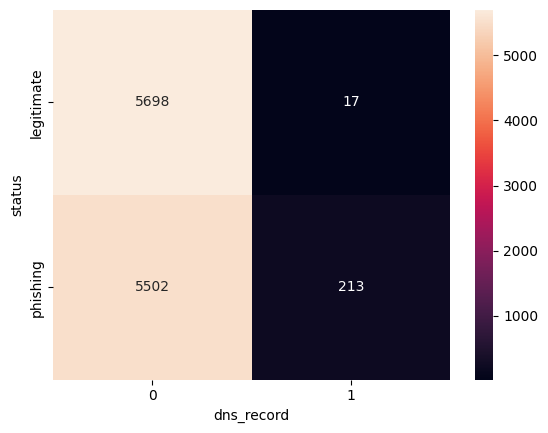

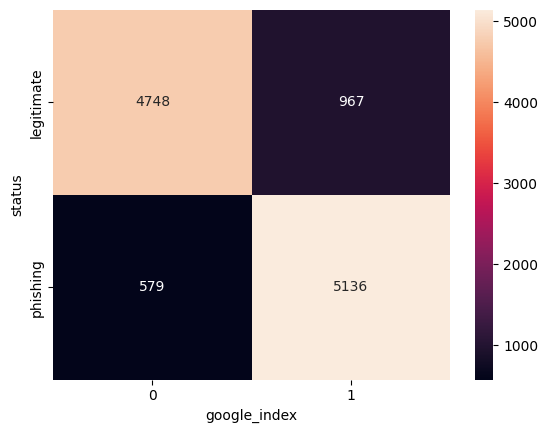

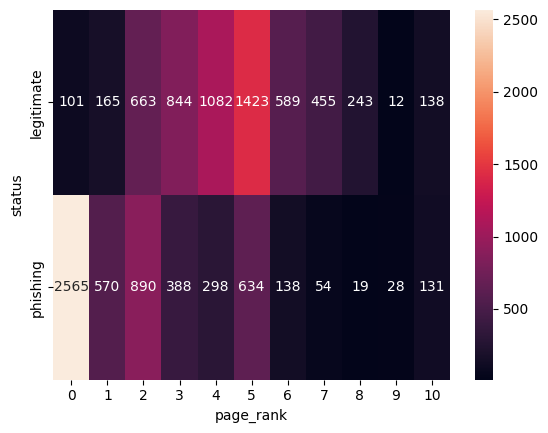

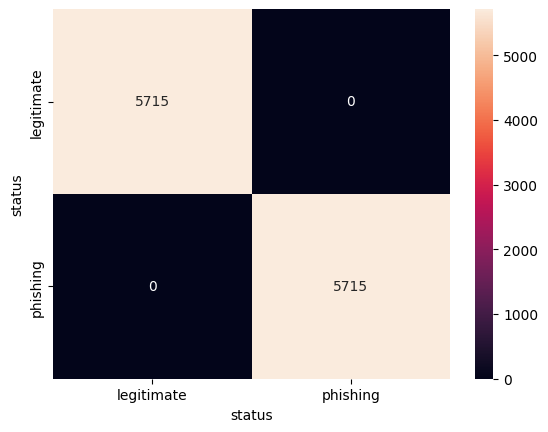

In [10]:
for col in df_column:
    plt.figure()
    sns.heatmap(pd.crosstab(df["status"],df[col]),annot=True,fmt="d")

Relationship variable with variable

In [ ]:
#sns.pairplot(df)

In [30]:
df.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [31]:

for col in df_column:
    plt.figure()
    sns.lmplot(x="ip",y=col,hue="status",data=df)

KeyError: "['url'] not in index"

<Figure size 640x480 with 0 Axes>

relationship length_url

sns.heatmap()

In [27]:
df.corr()["length_url"].sort_values(ascending=False).head(10)

C:\Users\rrbou\AppData\Local\Temp\ipykernel_15948\623676424.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["length_url"].sort_values(ascending=False).head(10)


length_url           1.000000
length_words_raw     0.794710
longest_word_path    0.680274
longest_words_raw    0.634467
nb_eq                0.621745
nb_and               0.576268
nb_qm                0.520930
char_repeat          0.515108
avg_word_path        0.494144
nb_slash             0.484768
Name: length_url, dtype: float64

47 min https://www.youtube.com/watch?v=u64sWJEP4S0&ab_channel=MachineLearnia